In [28]:
%matplotlib inline
# plot the molecule in 3D in an interactive window
# %matplotlib widget
%config InlineBackend.figure_format = 'retina'

In [29]:
# get current working directory
import os, sys
pwd = os.getcwd()
# append ../ to the sys path to access the coarsegraining package
sys.path.append(pwd + '/src/')

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from coarsegrainer.plotting import plot_line_3D, plot_graph
from experimentlogger import ExperimentLogger

In [31]:
ls -lh results

total 728K
-rw-rw-r--  1 nima nima  188 Feb  9 21:44 CG_Bond_LJ_experiment2024-02-09-21.csv
-rw-rw-r--  1 nima nima  14K Feb 10 02:59 CG_Bond_LJ_experiment2024-02-10-02.csv
-rw-rw-r--  1 nima nima  20K Feb 10 03:16 CG_Bond_LJ_experiment2024-02-10-03.csv
-rw-rw-r--  1 nima nima  30K Feb 10 03:59 CG_Bond_LJ_experiments2024-02-10-03.csv
-rw-rw-r--  1 nima nima  35K Feb 10 04:07 CG_Bond_LJ_experiments2024-02-10-04.csv
-rw-rw-r--  1 nima nima  40K Feb 10 16:59 CG_Bond_LJ_experiments_2024-02-10-16.csv
-rw-rw-r--  1 nima nima  88K Feb 10 17:59 CG_Bond_LJ_experiments_2024-02-10-17.csv
-rw-rw-r--  1 nima nima 111K Feb 10 18:25 CG_Bond_LJ_experiments_2024-02-10-18.csv
-rw-rw-r--  1 nima nima  18K Feb 10 22:59 CG_Bond_LJ_experiments_2024-02-10-22.csv
-rw-rw-r--  1 nima nima  59K Feb 10 23:52 CG_Bond_LJ_experiments_2024-02-10-23.csv
-rw-rw-r--  1 nima nima  17K Feb 10 04:29 CG_LJ2_experiments_2024-02-10-04.csv
-rw-rw-r--  1 nima nima  30K Feb 10 04:59 CG_LJ2_experiments_2scale_2024-02-10-04.csv
-r

# LJ loop n=1000
Define an energy function which uses LJ for forming a loop. 
It consists of:
1. a strong backbone line graph where every node is attracted to the next
2. a weaker loop LJ, where every l-th pair of nodes are attracted 

In [87]:
exp_logger = ExperimentLogger(previous_results_csv='./results/CG_LJ2_experiments_2scale_2024-02-11-00.csv')
# exp_logger = ExperimentLogger(save_prefix='../results/CG_Bond_LJ_experiment') 
df = exp_logger.to_dataframe()
df

energy_function            model_name    energy       time    lr  \
0    Energy_LJ_2scale       GD_2LJ_n1000_d3 -0.001144   2.478410  0.05   
1    Energy_LJ_2scale   CG_2LJ0.33_n1000_d3  0.137294  11.926820  0.05   
2    Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3  0.031429   4.540107  0.05   
3    Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3 -0.027884   4.763441  0.05   
4    Energy_LJ_2scale   CG_2LJ0.25_n1000_d3  0.473414  16.559235  0.05   
..                ...                   ...       ...        ...   ...   
173  Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3  0.139270  18.782341  0.02   
174  Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3 -0.045641   5.235641  0.02   
175  Energy_LJ_2scale   CG_2LJ0.25_n1000_d3  0.465091  39.175357  0.02   
176  Energy_LJ_2scale  GNN_2LJ0.25_n1000_d3  0.105854  17.726619  0.02   
177  Energy_LJ_2scale  GNN_2LJ0.25_n1000_d3 -0.048548  14.489161  0.02   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  2.530359       1000    NaN   
1            0.1        20  1.000000e-06  2.530359       1000  0.050   
2            0.1        20  1.000000e-06  2.530359       1000  0.005   
3            0.1        20  1.000000e-06  2.530359       1000  0.005   
4            0.1        20  1.000000e-06  2.530359       1000  0.050   
..           ...       ...           ...       ...        ...    ...   
173          0.1        20  1.000000e-07  2.530359       1000  0.002   
174          0.1        20  1.000000e-07  2.530359       1000  0.002   
175          0.1        20  1.000000e-07  2.530359       1000  0.020   
176          0.1        20  1.000000e-07  2.530359       1000  0.002   
177          0.1        20  1.000000e-07  2.530359       1000  0.002   

     cg_patience  cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  \
0            NaN           NaN       NaN        NaN        NaN           NaN   
1           20.0      0.000010     580.0  10.441059   0.154105         333.0   
2           20.0      0.000010      97.0   3.327611   0.041167         333.0   
3           20.0      0.000010      30.0   2.050453  -0.005726         333.0   
4           20.0      0.000010     865.0  15.198349   0.498225         250.0   
..           ...           ...       ...        ...        ...           ...   
173         20.0      0.000001     619.0  14.006298   0.140783         333.0   
174         20.0      0.000001      56.0   2.650650  -0.025126         333.0   
175         20.0      0.000001    1743.0  29.083611   0.498240         250.0   
176         20.0      0.000001     451.0  10.654719   0.109965         250.0   
177         20.0      0.000001      66.0   2.888714  -0.030673         250.0   

     hidden_dims  
0            NaN  
1            NaN  
2      [8, 4, 3]  
3    [32, 16, 3]  
4            NaN  
..           ...  
173    [8, 4, 3]  
174  [32, 16, 3]  
175          NaN  
176    [8, 4, 3]  
177  [32, 16, 3]  

[178 rows x 18 columns]

In [88]:
# seems like the num_cg_modes are not logged correctly for "CG_..." models, and base models do not use cg modes
# fortunately, the CG models mention the ratio of cg modes / num nodes in the model name as CG_Bond_LJ[ratio]_n[nodes]_d3
# so we can extract the ratio from the model name, and use it to calculate the number of cg modes
# we can also calculate the number of nodes from the model name

# first, let's extract the ratio and number of nodes from the model name
df['cg_ratio'] = df['model_name'].apply(lambda x: float((x.split('_2LJ')[1].split('_')[0] or '1.0')))
df['num_cg_modes'] = df['cg_ratio'] * df['num_nodes']
# ensure that the num_cg_modes is an integer
df['num_cg_modes'] = df['num_cg_modes'].astype(int)
df[:10]

energy_function            model_name    energy       time    lr  \
0  Energy_LJ_2scale       GD_2LJ_n1000_d3 -0.001144   2.478410  0.05   
1  Energy_LJ_2scale   CG_2LJ0.33_n1000_d3  0.137294  11.926820  0.05   
2  Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3  0.031429   4.540107  0.05   
3  Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3 -0.027884   4.763441  0.05   
4  Energy_LJ_2scale   CG_2LJ0.25_n1000_d3  0.473414  16.559235  0.05   
5  Energy_LJ_2scale  GNN_2LJ0.25_n1000_d3 -0.025779   6.505024  0.05   
6  Energy_LJ_2scale  GNN_2LJ0.25_n1000_d3 -0.027374   4.550584  0.05   
7  Energy_LJ_2scale   CG_2LJ0.20_n1000_d3  0.392523  13.861361  0.05   
8  Energy_LJ_2scale  GNN_2LJ0.20_n1000_d3  0.029852  12.173057  0.05   
9  Energy_LJ_2scale  GNN_2LJ0.20_n1000_d3 -0.017222   4.384655  0.05   

   clamp_grads  patience  min_delta    x0_std  num_nodes  lr_cg  cg_patience  \
0          0.1        20   0.000001  2.530359       1000    NaN          NaN   
1          0.1        20   0.000001  2.530359       1000  0.050         20.0   
2          0.1        20   0.000001  2.530359       1000  0.005         20.0   
3          0.1        20   0.000001  2.530359       1000  0.005         20.0   
4          0.1        20   0.000001  2.530359       1000  0.050         20.0   
5          0.1        20   0.000001  2.530359       1000  0.005         20.0   
6          0.1        20   0.000001  2.530359       1000  0.005         20.0   
7          0.1        20   0.000001  2.530359       1000  0.050         20.0   
8          0.1        20   0.000001  2.530359       1000  0.005         20.0   
9          0.1        20   0.000001  2.530359       1000  0.005         20.0   

   cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  hidden_dims  \
0           NaN       NaN        NaN        NaN          1000          NaN   
1       0.00001     580.0  10.441059   0.154105           330          NaN   
2       0.00001      97.0   3.327611   0.041167           330    [8, 4, 3]   
3       0.00001      30.0   2.050453  -0.005726           330  [32, 16, 3]   
4       0.00001     865.0  15.198349   0.498225           250          NaN   
5       0.00001     180.0   4.973676  -0.017832           250    [8, 4, 3]   
6       0.00001      35.0   2.163833  -0.005933           250  [32, 16, 3]   
7       0.00001     689.0  12.398494   0.425218           200          NaN   
8       0.00001     468.0  10.757780   0.031340           200    [8, 4, 3]   
9       0.00001      46.0   2.418844   0.000681           200  [32, 16, 3]   

   cg_ratio  
0      1.00  
1      0.33  
2      0.33  
3      0.33  
4      0.25  
5      0.25  
6      0.25  
7      0.20  
8      0.20  
9      0.20

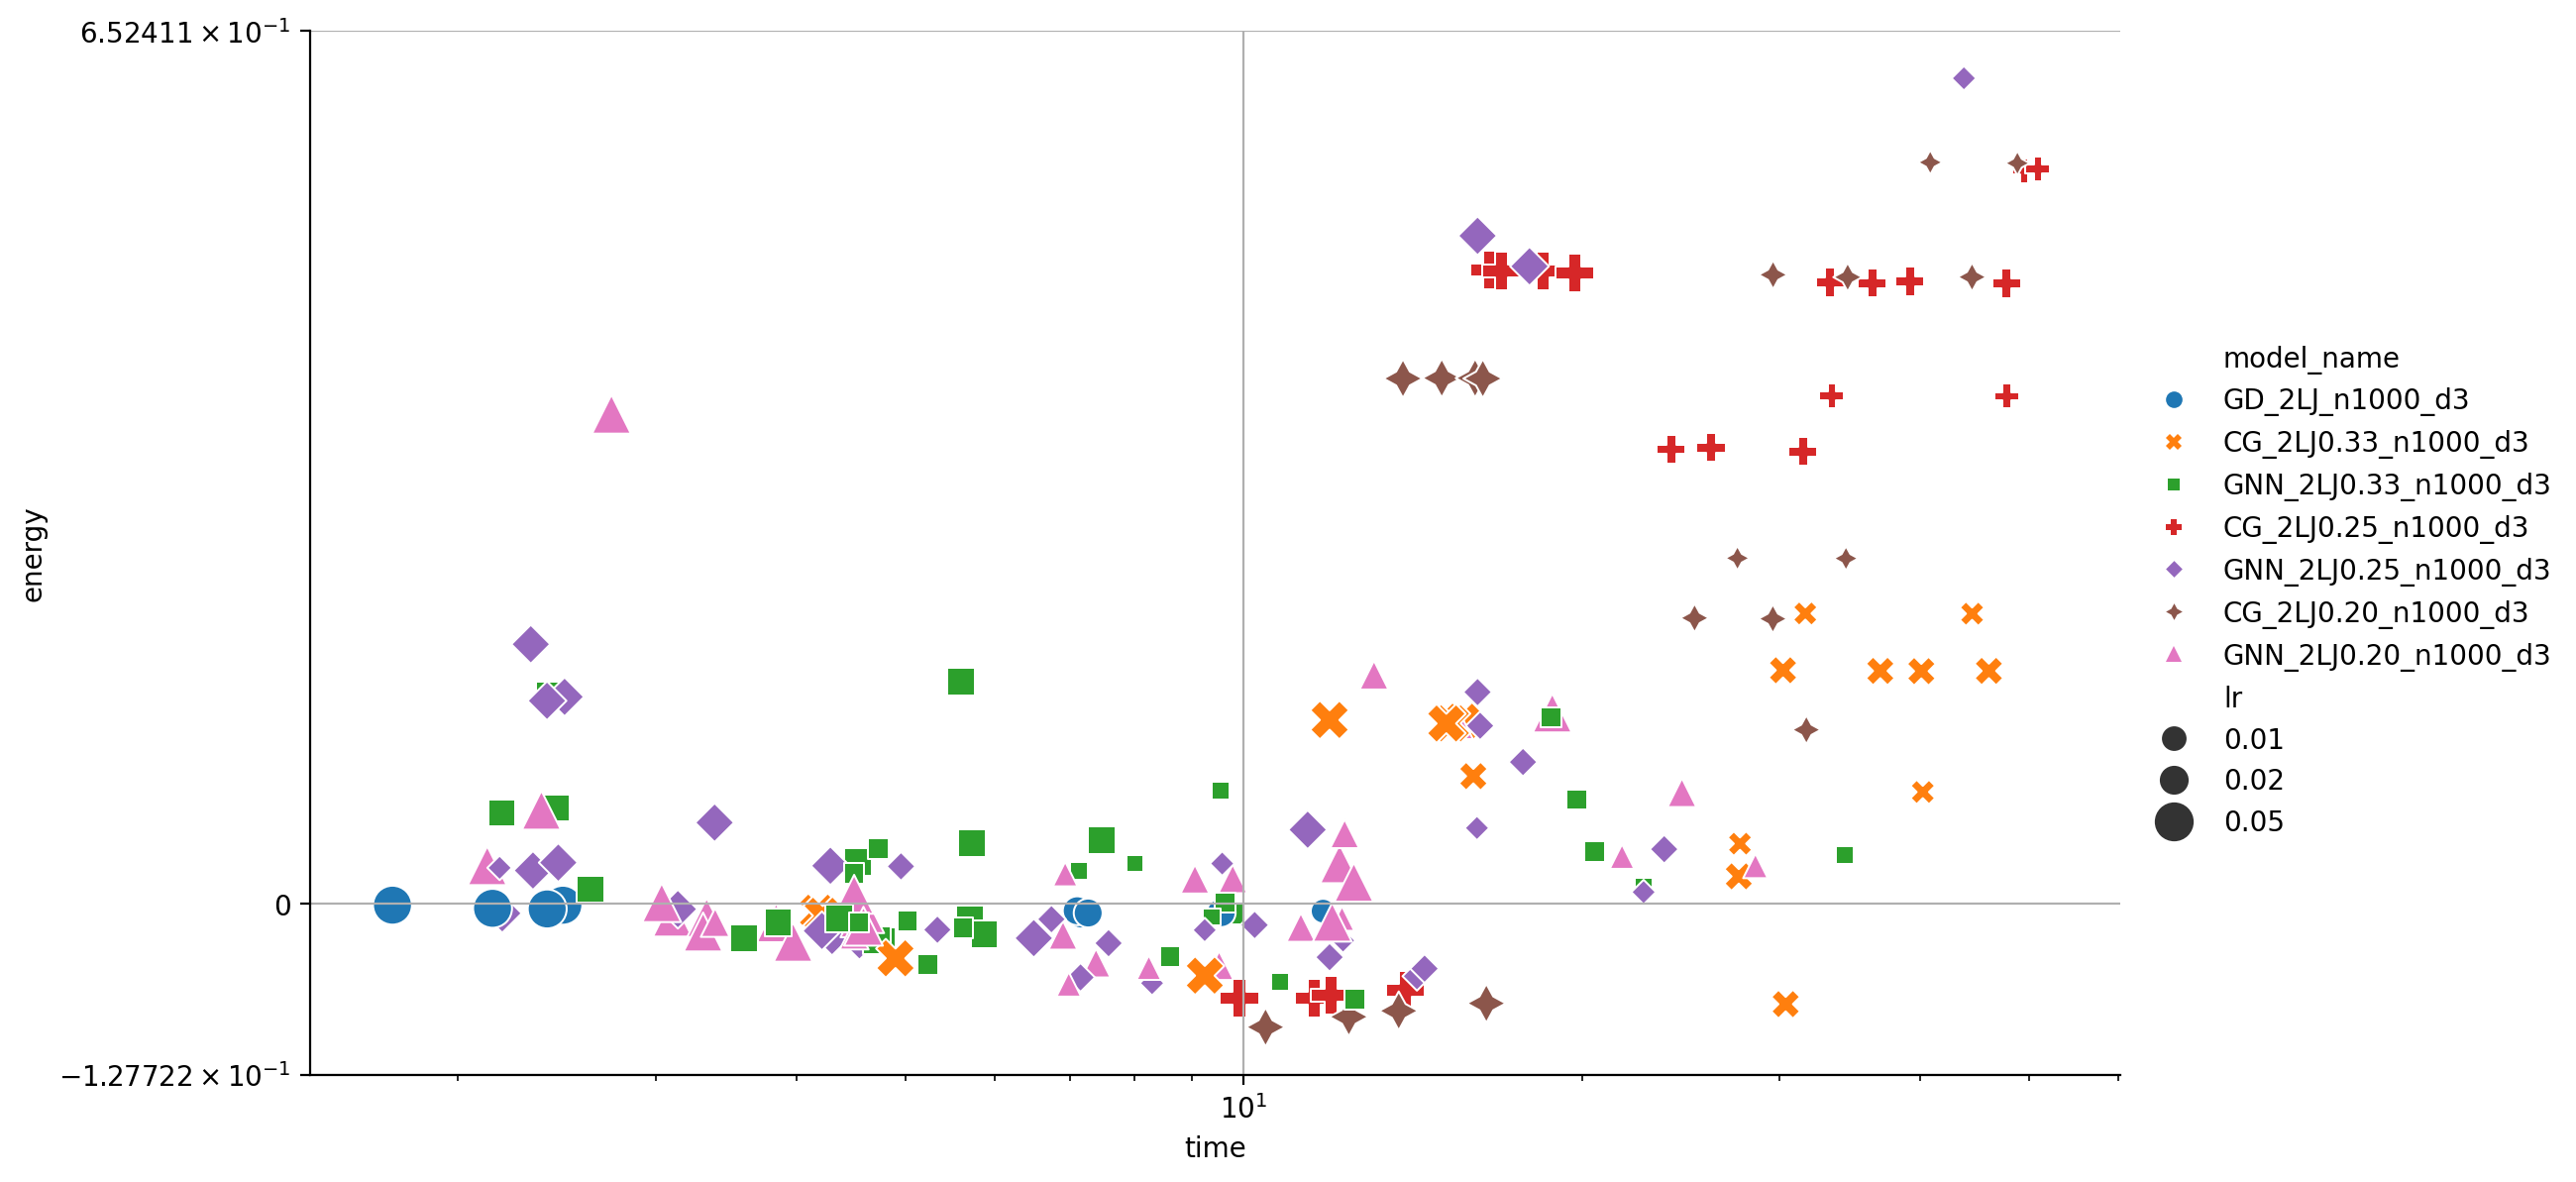

In [89]:
# df = exp_logger.to_dataframe()
# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.0234, -.0228)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

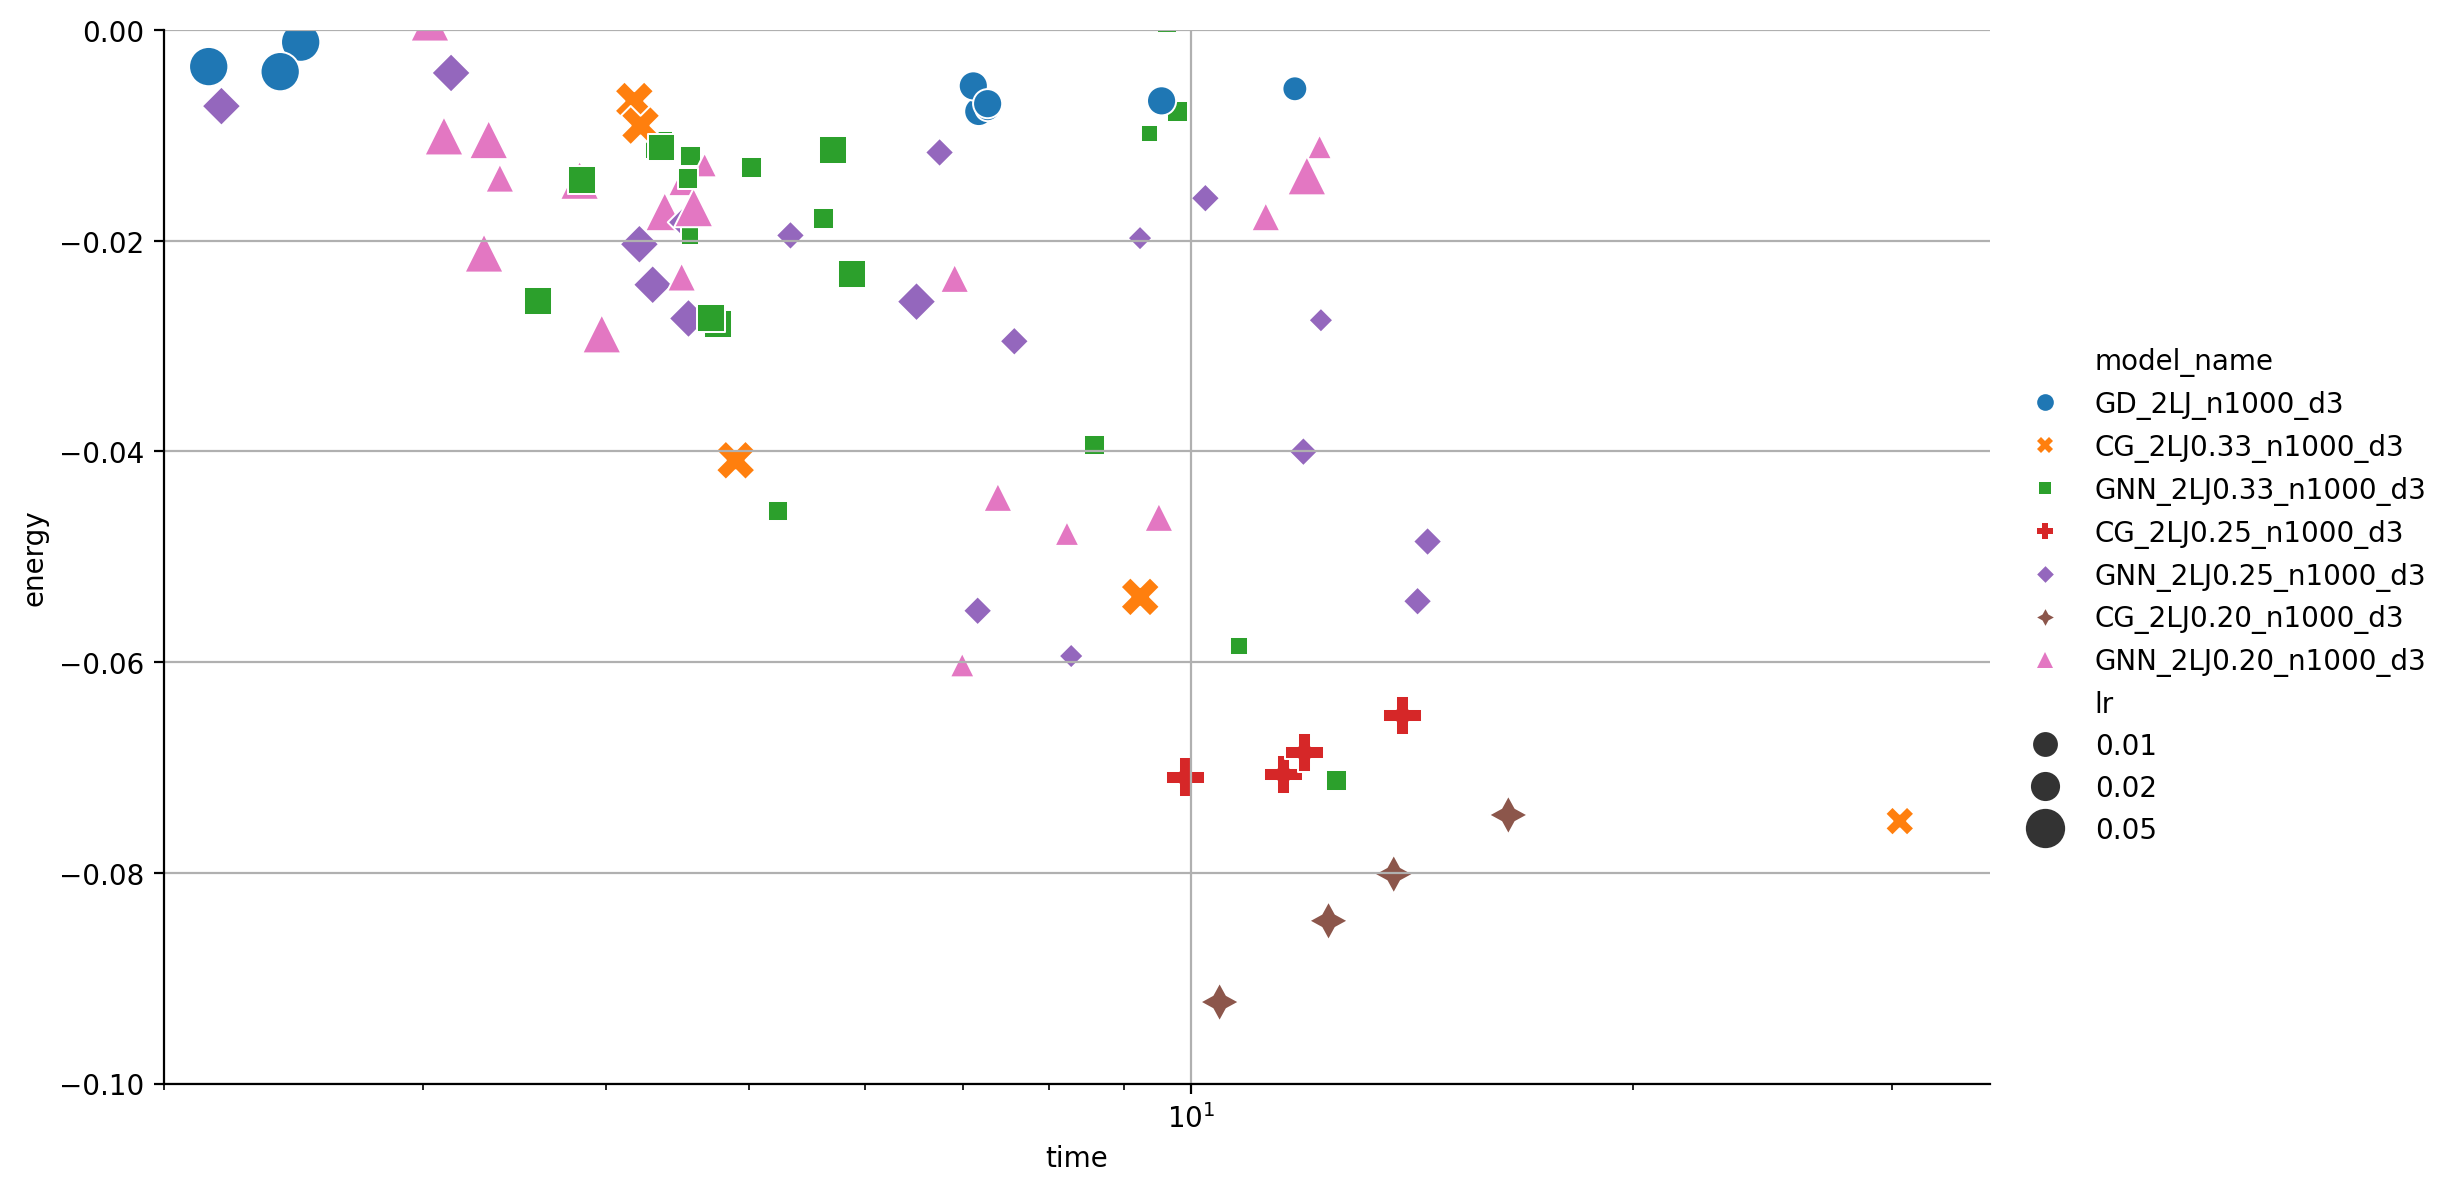

In [90]:
# df = exp_logger.to_dataframe()
# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.1, -.0)
plt.xlim(2,35)
plt.xscale('log')
plt.grid()

## Grouping similar runs

In [91]:
# We replace the NaN with 0 before applying groupby to avoid losing rows
df_copy = df.copy()
df_copy.fillna('na', inplace=True)
# we will group by the model_name, lr, and min_delta
df_grouped = df_copy.groupby(['model_name', 'lr', 'lr_cg', 'num_cg_modes', 'hidden_dims'])
# other options: cg_patience,cg_min_delta, 'min_delta'
# we can now calculate the mean and std of the energy for each group
# only take the mean of the energy and time column (the other columns are not relevant and may contain non-numeric values)
df_mean = df_grouped.agg({'energy': ['mean', 'std'], 'time': ['mean','std']})
df_mean.reset_index(inplace=True)

# now we will revert the 'na' values to NaN
df_mean.replace('na', np.nan, inplace=True)
df_mean

/tmp/ipykernel_1753380/3369902939.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.fillna('na', inplace=True)
/tmp/ipykernel_1753380/3369902939.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mean.replace('na', np.nan, inplace=True)


model_name    lr  lr_cg num_cg_modes  hidden_dims    energy  \
                                                                     mean   
0    CG_2LJ0.20_n1000_d3  0.01  0.010          200          NaN  0.553778   
1    CG_2LJ0.20_n1000_d3  0.01  0.100          200          NaN  0.258139   
2    CG_2LJ0.20_n1000_d3  0.02  0.020          200          NaN  0.468907   
3    CG_2LJ0.20_n1000_d3  0.02  0.200          200          NaN  0.185472   
4    CG_2LJ0.20_n1000_d3  0.05  0.050          200          NaN  0.392676   
5    CG_2LJ0.20_n1000_d3  0.05  0.500          200          NaN -0.082860   
6    CG_2LJ0.25_n1000_d3  0.01  0.010          250          NaN  0.548589   
7    CG_2LJ0.25_n1000_d3  0.01  0.100          250          NaN  0.379461   
8    CG_2LJ0.25_n1000_d3  0.02  0.020          250          NaN  0.464205   
9    CG_2LJ0.25_n1000_d3  0.02  0.200          250          NaN  0.339440   
10   CG_2LJ0.25_n1000_d3  0.05  0.050          250          NaN  0.472651   
11   CG_2LJ0.25_n1000_d3  0.05  0.500          250          NaN -0.068801   
12   CG_2LJ0.33_n1000_d3  0.01  0.010          330          NaN  0.216834   
13   CG_2LJ0.33_n1000_d3  0.01  0.100          330          NaN  0.064172   
14   CG_2LJ0.33_n1000_d3  0.02  0.020          330          NaN  0.174051   
15   CG_2LJ0.33_n1000_d3  0.02  0.200          330          NaN  0.013550   
16   CG_2LJ0.33_n1000_d3  0.05  0.050          330          NaN  0.135684   
17   CG_2LJ0.33_n1000_d3  0.05  0.500          330          NaN -0.027609   
18       GD_2LJ_n1000_d3  0.01    NaN         1000          NaN -0.006517   
19       GD_2LJ_n1000_d3  0.02    NaN         1000          NaN -0.006680   
20       GD_2LJ_n1000_d3  0.05    NaN         1000          NaN -0.002418   
21  GNN_2LJ0.20_n1000_d3  0.01  0.001          200  [32, 16, 3] -0.035665   
22  GNN_2LJ0.20_n1000_d3  0.01  0.001          200    [8, 4, 3]  0.031744   
23  GNN_2LJ0.20_n1000_d3  0.01  0.010          200  [32, 16, 3]  0.004682   
24  GNN_2LJ0.20_n1000_d3  0.01  0.010          200    [8, 4, 3]  0.042204   
25  GNN_2LJ0.20_n1000_d3  0.02  0.002          200  [32, 16, 3] -0.012766   
26  GNN_2LJ0.20_n1000_d3  0.02  0.002          200    [8, 4, 3]  0.090834   
27  GNN_2LJ0.20_n1000_d3  0.02  0.020          200  [32, 16, 3] -0.015375   
28  GNN_2LJ0.20_n1000_d3  0.02  0.020          200    [8, 4, 3] -0.009540   
29  GNN_2LJ0.20_n1000_d3  0.05  0.005          200  [32, 16, 3] -0.015045   
30  GNN_2LJ0.20_n1000_d3  0.05  0.005          200    [8, 4, 3]  0.043664   
31  GNN_2LJ0.20_n1000_d3  0.05  0.050          200  [32, 16, 3]  0.101168   
32  GNN_2LJ0.20_n1000_d3  0.05  0.050          200    [8, 4, 3]  0.002194   
33  GNN_2LJ0.25_n1000_d3  0.01  0.001          250  [32, 16, 3] -0.043479   
34  GNN_2LJ0.25_n1000_d3  0.01  0.001          250    [8, 4, 3]  0.312804   
35  GNN_2LJ0.25_n1000_d3  0.01  0.010          250  [32, 16, 3]  0.003518   
36  GNN_2LJ0.25_n1000_d3  0.01  0.010          250    [8, 4, 3]  0.043281   
37  GNN_2LJ0.25_n1000_d3  0.02  0.002          250  [32, 16, 3] -0.049475   
38  GNN_2LJ0.25_n1000_d3  0.02  0.002          250    [8, 4, 3]  0.109424   
39  GNN_2LJ0.25_n1000_d3  0.02  0.020          250  [32, 16, 3] -0.015272   
40  GNN_2LJ0.25_n1000_d3  0.02  0.020          250    [8, 4, 3] -0.007051   
41  GNN_2LJ0.25_n1000_d3  0.05  0.005          250  [32, 16, 3] -0.002823   
42  GNN_2LJ0.25_n1000_d3  0.05  0.005          250    [8, 4, 3]  0.251270   
43  GNN_2LJ0.25_n1000_d3  0.05  0.050          250  [32, 16, 3]  0.131241   
44  GNN_2LJ0.25_n1000_d3  0.05  0.050          250    [8, 4, 3]  0.011934   
45  GNN_2LJ0.33_n1000_d3  0.01  0.001          330  [32, 16, 3] -0.034138   
46  GNN_2LJ0.33_n1000_d3  0.01  0.001          330    [8, 4, 3]  0.024408   
47  GNN_2LJ0.33_n1000_d3  0.01  0.010          330  [32, 16, 3]  0.002380   
48  GNN_2LJ0.33_n1000_d3  0.01  0.010          330    [8, 4, 3]  0.057223   
49  GNN_2LJ0.33_n1000_d3  0.02  0.002          330  [32, 16, 3] -0.023016   
50  GNN_2L

In [92]:
df_copy

energy_function            model_name    energy       time    lr  \
0    Energy_LJ_2scale       GD_2LJ_n1000_d3 -0.001144   2.478410  0.05   
1    Energy_LJ_2scale   CG_2LJ0.33_n1000_d3  0.137294  11.926820  0.05   
2    Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3  0.031429   4.540107  0.05   
3    Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3 -0.027884   4.763441  0.05   
4    Energy_LJ_2scale   CG_2LJ0.25_n1000_d3  0.473414  16.559235  0.05   
..                ...                   ...       ...        ...   ...   
173  Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3  0.139270  18.782341  0.02   
174  Energy_LJ_2scale  GNN_2LJ0.33_n1000_d3 -0.045641   5.235641  0.02   
175  Energy_LJ_2scale   CG_2LJ0.25_n1000_d3  0.465091  39.175357  0.02   
176  Energy_LJ_2scale  GNN_2LJ0.25_n1000_d3  0.105854  17.726619  0.02   
177  Energy_LJ_2scale  GNN_2LJ0.25_n1000_d3 -0.048548  14.489161  0.02   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  2.530359       1000     na   
1            0.1        20  1.000000e-06  2.530359       1000   0.05   
2            0.1        20  1.000000e-06  2.530359       1000  0.005   
3            0.1        20  1.000000e-06  2.530359       1000  0.005   
4            0.1        20  1.000000e-06  2.530359       1000   0.05   
..           ...       ...           ...       ...        ...    ...   
173          0.1        20  1.000000e-07  2.530359       1000  0.002   
174          0.1        20  1.000000e-07  2.530359       1000  0.002   
175          0.1        20  1.000000e-07  2.530359       1000   0.02   
176          0.1        20  1.000000e-07  2.530359       1000  0.002   
177          0.1        20  1.000000e-07  2.530359       1000  0.002   

    cg_patience cg_min_delta cg_steps    cg_time cg_energy  num_cg_modes  \
0            na           na       na         na        na          1000   
1          20.0      0.00001    580.0  10.441059  0.154105           330   
2          20.0      0.00001     97.0   3.327611  0.041167           330   
3          20.0      0.00001     30.0   2.050453 -0.005726           330   
4          20.0      0.00001    865.0  15.198349  0.498225           250   
..          ...          ...      ...        ...       ...           ...   
173        20.0     0.000001    619.0  14.006298  0.140783           330   
174        20.0     0.000001     56.0    2.65065 -0.025126           330   
175        20.0     0.000001   1743.0  29.083611   0.49824           250   
176        20.0     0.000001    451.0  10.654719  0.109965           250   
177        20.0     0.000001     66.0   2.888714 -0.030673           250   

     hidden_dims  cg_ratio  
0             na      1.00  
1             na      0.33  
2      [8, 4, 3]      0.33  
3    [32, 16, 3]      0.33  
4             na      0.25  
..           ...       ...  
173    [8, 4, 3]      0.33  
174  [32, 16, 3]      0.33  
175           na      0.25  
176    [8, 4, 3]      0.25  
177  [32, 16, 3]      0.25  

[178 rows x 19 columns]

In [93]:
# get rows where  model_name starts with 'GD_'
df_gd = df_copy[df_copy['model_name'].str.startswith('GD_')]
df_gd


energy_function       model_name    energy       time    lr  \
0    Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.001144   2.478410  0.05   
19   Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.003946   2.400087  0.05   
38   Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.007726   7.171781  0.02   
57   Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.006715   9.550460  0.02   
76   Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.005569  11.768230  0.01   
95   Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.007465   7.272724  0.01   
114  Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.003465   2.145811  0.05   
133  Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.001117   1.747999  0.05   
152  Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.005297   7.110527  0.02   
171  Energy_LJ_2scale  GD_2LJ_n1000_d3 -0.006984   7.271988  0.02   

     clamp_grads  patience     min_delta    x0_std  num_nodes lr_cg  \
0            0.1        20  1.000000e-06  2.530359       1000    na   
19           0.1        20  1.000000e-07  2.530359       1000    na   
38           0.1        20  1.000000e-06  2.530359       1000    na   
57           0.1        20  1.000000e-07  2.530359       1000    na   
76           0.1        20  1.000000e-06  2.530359       1000    na   
95           0.1        20  1.000000e-07  2.530359       1000    na   
114          0.1        20  1.000000e-06  2.530359       1000    na   
133          0.1        20  1.000000e-07  2.530359       1000    na   
152          0.1        20  1.000000e-06  2.530359       1000    na   
171          0.1        20  1.000000e-07  2.530359       1000    na   

    cg_patience cg_min_delta cg_steps cg_time cg_energy  num_cg_modes  \
0            na           na       na      na        na          1000   
19           na           na       na      na        na          1000   
38           na           na       na      na        na          1000   
57           na           na       na      na        na          1000   
76           na           na       na      na        na          1000   
95           na           na       na      na        na          1000   
114          na           na       na      na        na          1000   
133          na           na       na      na        na          1000   
152          na           na       na      na        na          1000   
171          na           na       na      na        na          1000   

    hidden_dims  cg_ratio  
0            na       1.0  
19           na       1.0  
38           na       1.0  
57           na       1.0  
76           na       1.0  
95           na       1.0  
114          na       1.0  
133          na       1.0  
152          na       1.0  
171          na       1.0

In [94]:
# plot the filtered dataframe using sns directly on df_mean
# note that now we have the mean and std of the energy for each group
# we can use the std to plot the error bars
# we can also use the std to filter the data
# we will create a new column for the error bars
df_mean['energy_mean'] = df_mean['energy']['mean']
df_mean['energy_std'] = df_mean['energy']['std']
# same for time 
df_mean['time_mean'] = df_mean['time']['mean']
df_mean['time_std'] = df_mean['time']['std']
# we will use the mean of the std to filter the data
std_threshold = df_mean['energy']['std'].mean()
# we will filter the data using the std
# df_filtered = df_mean[df_mean['energy']['std'] < std_threshold]
df_filtered = df_mean #[df_mean['energy']['std'] < std_threshold]

df_filtered.reset_index(inplace=True)

df_filtered.columns = [('-'.join(col).strip() if col[1]!='' else col[0]) for col in df_filtered.columns.values]

In [95]:
df_filtered

index            model_name    lr  lr_cg  num_cg_modes  hidden_dims  \
0       0   CG_2LJ0.20_n1000_d3  0.01  0.010           200          NaN   
1       1   CG_2LJ0.20_n1000_d3  0.01  0.100           200          NaN   
2       2   CG_2LJ0.20_n1000_d3  0.02  0.020           200          NaN   
3       3   CG_2LJ0.20_n1000_d3  0.02  0.200           200          NaN   
4       4   CG_2LJ0.20_n1000_d3  0.05  0.050           200          NaN   
5       5   CG_2LJ0.20_n1000_d3  0.05  0.500           200          NaN   
6       6   CG_2LJ0.25_n1000_d3  0.01  0.010           250          NaN   
7       7   CG_2LJ0.25_n1000_d3  0.01  0.100           250          NaN   
8       8   CG_2LJ0.25_n1000_d3  0.02  0.020           250          NaN   
9       9   CG_2LJ0.25_n1000_d3  0.02  0.200           250          NaN   
10     10   CG_2LJ0.25_n1000_d3  0.05  0.050           250          NaN   
11     11   CG_2LJ0.25_n1000_d3  0.05  0.500           250          NaN   
12     12   CG_2LJ0.33_n1000_d3  0.01  0.010           330          NaN   
13     13   CG_2LJ0.33_n1000_d3  0.01  0.100           330          NaN   
14     14   CG_2LJ0.33_n1000_d3  0.02  0.020           330          NaN   
15     15   CG_2LJ0.33_n1000_d3  0.02  0.200           330          NaN   
16     16   CG_2LJ0.33_n1000_d3  0.05  0.050           330          NaN   
17     17   CG_2LJ0.33_n1000_d3  0.05  0.500           330          NaN   
18     18       GD_2LJ_n1000_d3  0.01    NaN          1000          NaN   
19     19       GD_2LJ_n1000_d3  0.02    NaN          1000          NaN   
20     20       GD_2LJ_n1000_d3  0.05    NaN          1000          NaN   
21     21  GNN_2LJ0.20_n1000_d3  0.01  0.001           200  [32, 16, 3]   
22     22  GNN_2LJ0.20_n1000_d3  0.01  0.001           200    [8, 4, 3]   
23     23  GNN_2LJ0.20_n1000_d3  0.01  0.010           200  [32, 16, 3]   
24     24  GNN_2LJ0.20_n1000_d3  0.01  0.010           200    [8, 4, 3]   
25     25  GNN_2LJ0.20_n1000_d3  0.02  0.002           200  [32, 16, 3]   
26     26  GNN_2LJ0.20_n1000_d3  0.02  0.002           200    [8, 4, 3]   
27     27  GNN_2LJ0.20_n1000_d3  0.02  0.020           200  [32, 16, 3]   
28     28  GNN_2LJ0.20_n1000_d3  0.02  0.020           200    [8, 4, 3]   
29     29  GNN_2LJ0.20_n1000_d3  0.05  0.005           200  [32, 16, 3]   
30     30  GNN_2LJ0.20_n1000_d3  0.05  0.005           200    [8, 4, 3]   
31     31  GNN_2LJ0.20_n1000_d3  0.05  0.050           200  [32, 16, 3]   
32     32  GNN_2LJ0.20_n1000_d3  0.05  0.050           200    [8, 4, 3]   
33     33  GNN_2LJ0.25_n1000_d3  0.01  0.001           250  [32, 16, 3]   
34     34  GNN_2LJ0.25_n1000_d3  0.01  0.001           250    [8, 4, 3]   
35     35  GNN_2LJ0.25_n1000_d3  0.01  0.010           250  [32, 16, 3]   
36     36  GNN_2LJ0.25_n1000_d3  0.01  0.010           250    [8, 4, 3]   
37     37  GNN_2LJ0.25_n1000_d3  0.02  0.002           250  [32, 16, 3]   
38     38  GNN_2LJ0.25_n1000_d3  0.02  0.002           250    [8, 4, 3]   
39     39  GNN_2LJ0.25_n1000_d3  0.02  0.020           250  [32, 16, 3]   
40     40  GNN_2LJ0.25_n1000_d3  0.02  0.020           250    [8, 4, 3]   
41     41  GNN_2LJ0.25_n1000_d3  0.05  0.005           250  [32, 16, 3]   
42     42  GNN_2LJ0.25_n1000_d3  0.05  0.005           250    [8, 4, 3]   
43     43  GNN_2LJ0.25_n1000_d3  0.05  0.050           250  [32, 16, 3]   
44     44  GNN_2LJ0.25_n1000_d3  0.05  0.050           250    [8, 4, 3]   
45     45  GNN_2LJ0.33_n1000_d3  0.01  0.001           330  [32, 16, 3]   
46     46  GNN_2LJ0.33_n1000_d3  0.01  0.001           330    [8, 4, 3]   
47     47  GNN_2LJ0.33_n1000_d3  0.01  0.010           330  [32, 16, 3]   
48     48  GNN_2LJ0.33_n1000_d3  0.01  0.010           330    [8, 4, 3]   
49     49  GNN_2LJ0.33_n1000_d3  0.02  0.002           330  [32, 16, 3]   
50     50  GNN_2LJ0.33_n1000_d3  0.02  0.002           330    [8, 4, 3]   
51     51  GNN_2LJ0.33_n1000_d3  0.02  0.020           330  [32, 16, 3]   
52     52  GNN_2LJ0.33_n1000_

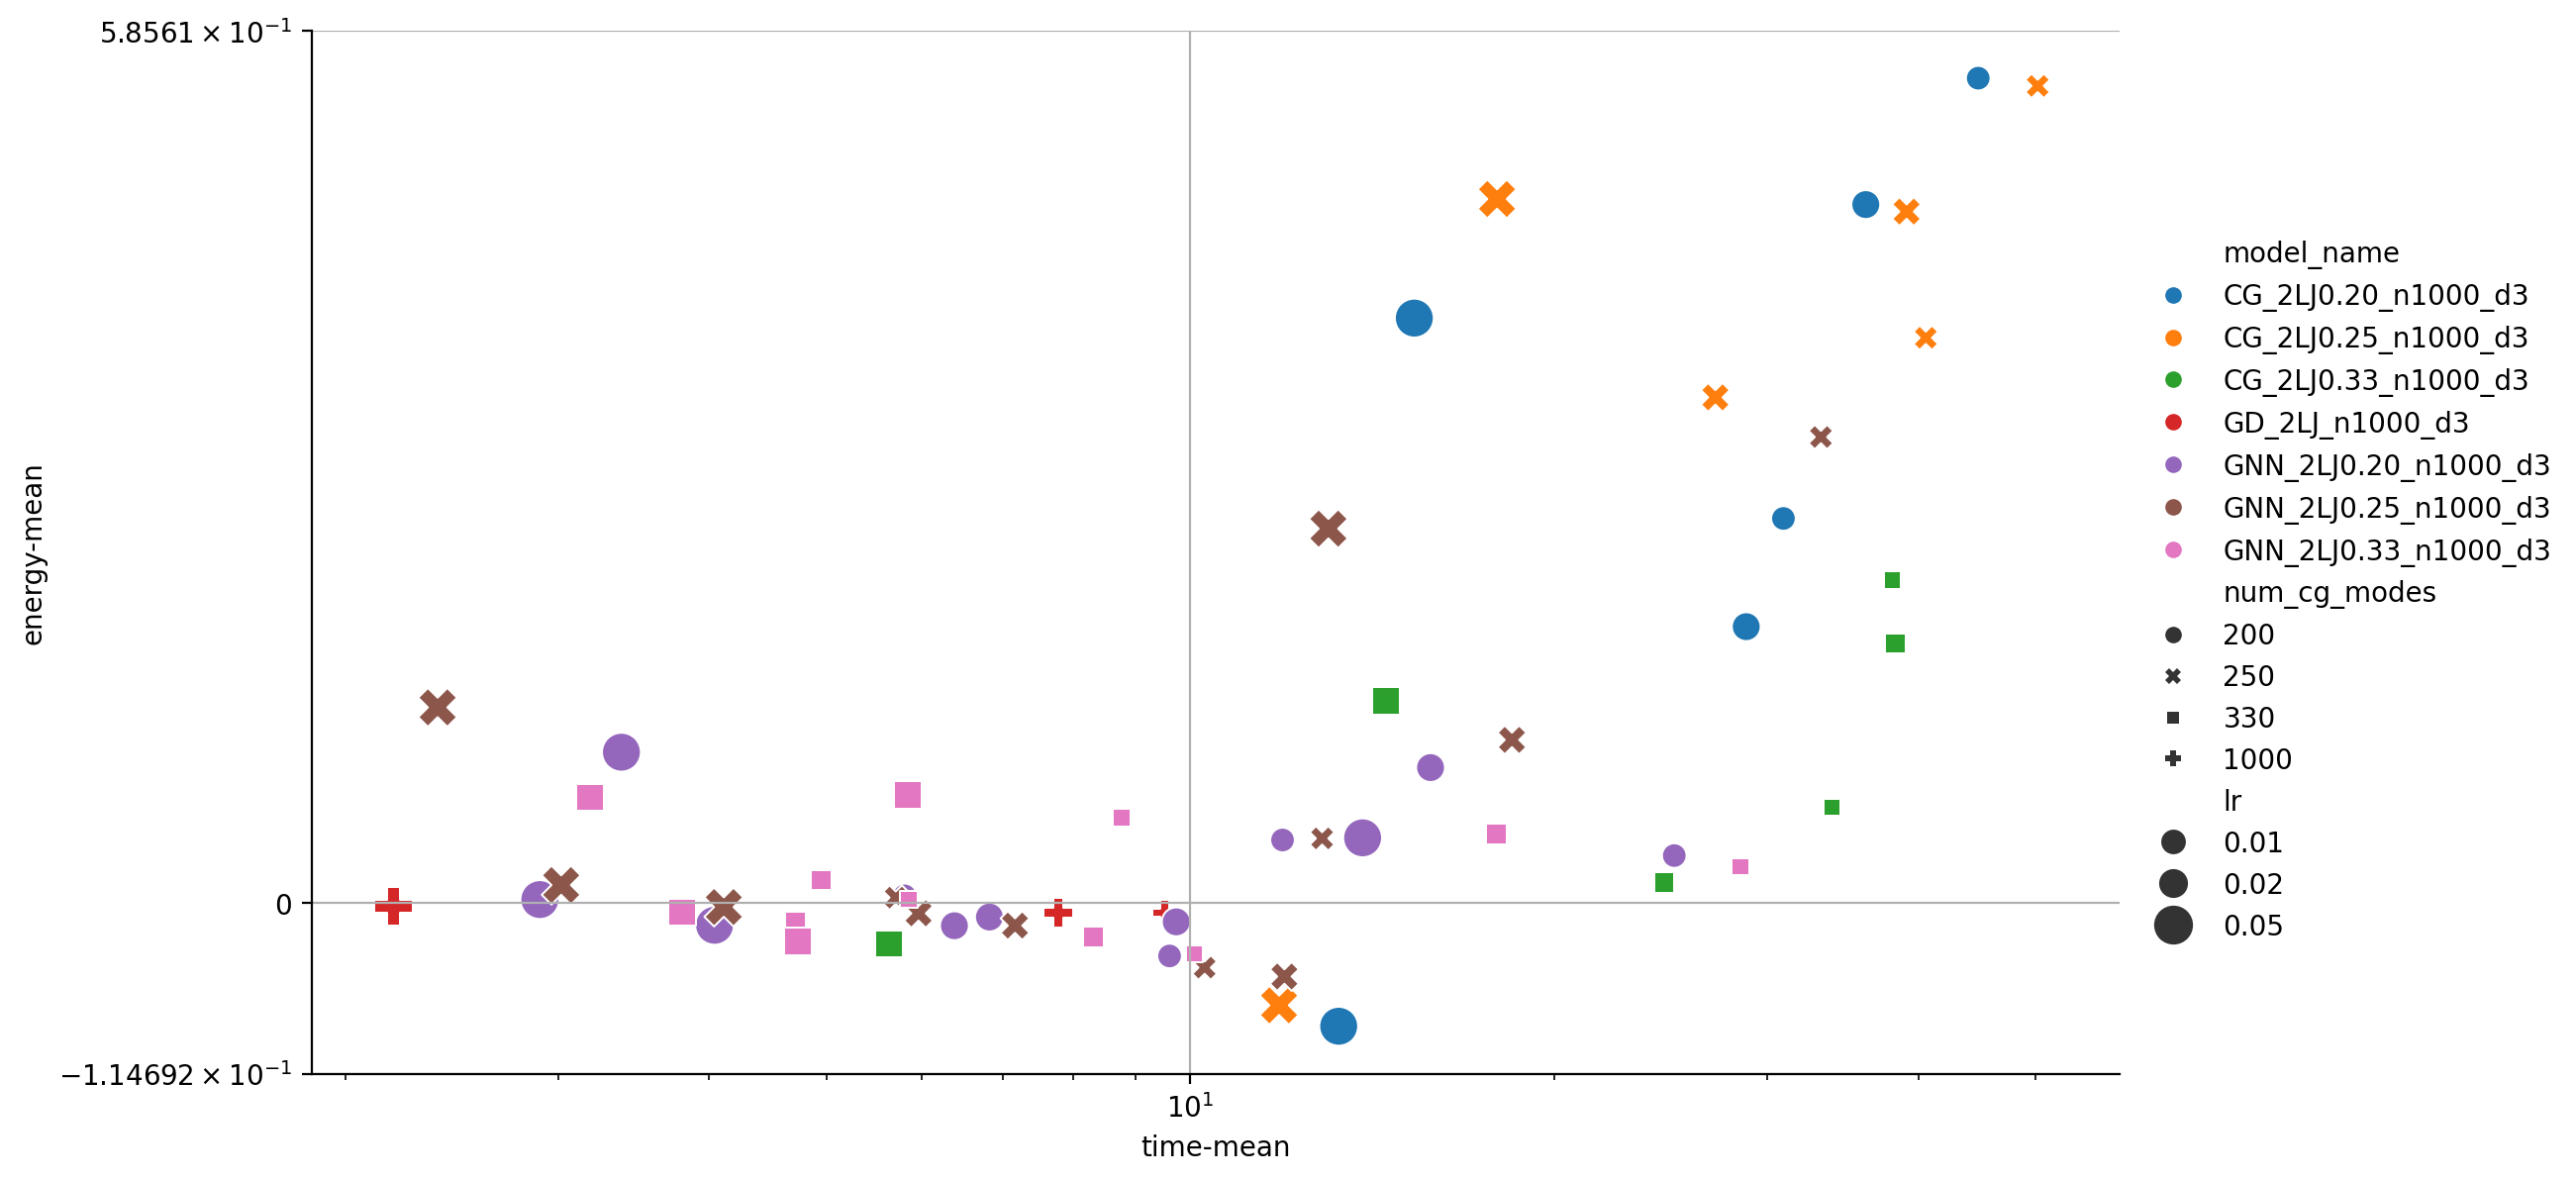

In [100]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='num_cg_modes', #'min_delta', 
            kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

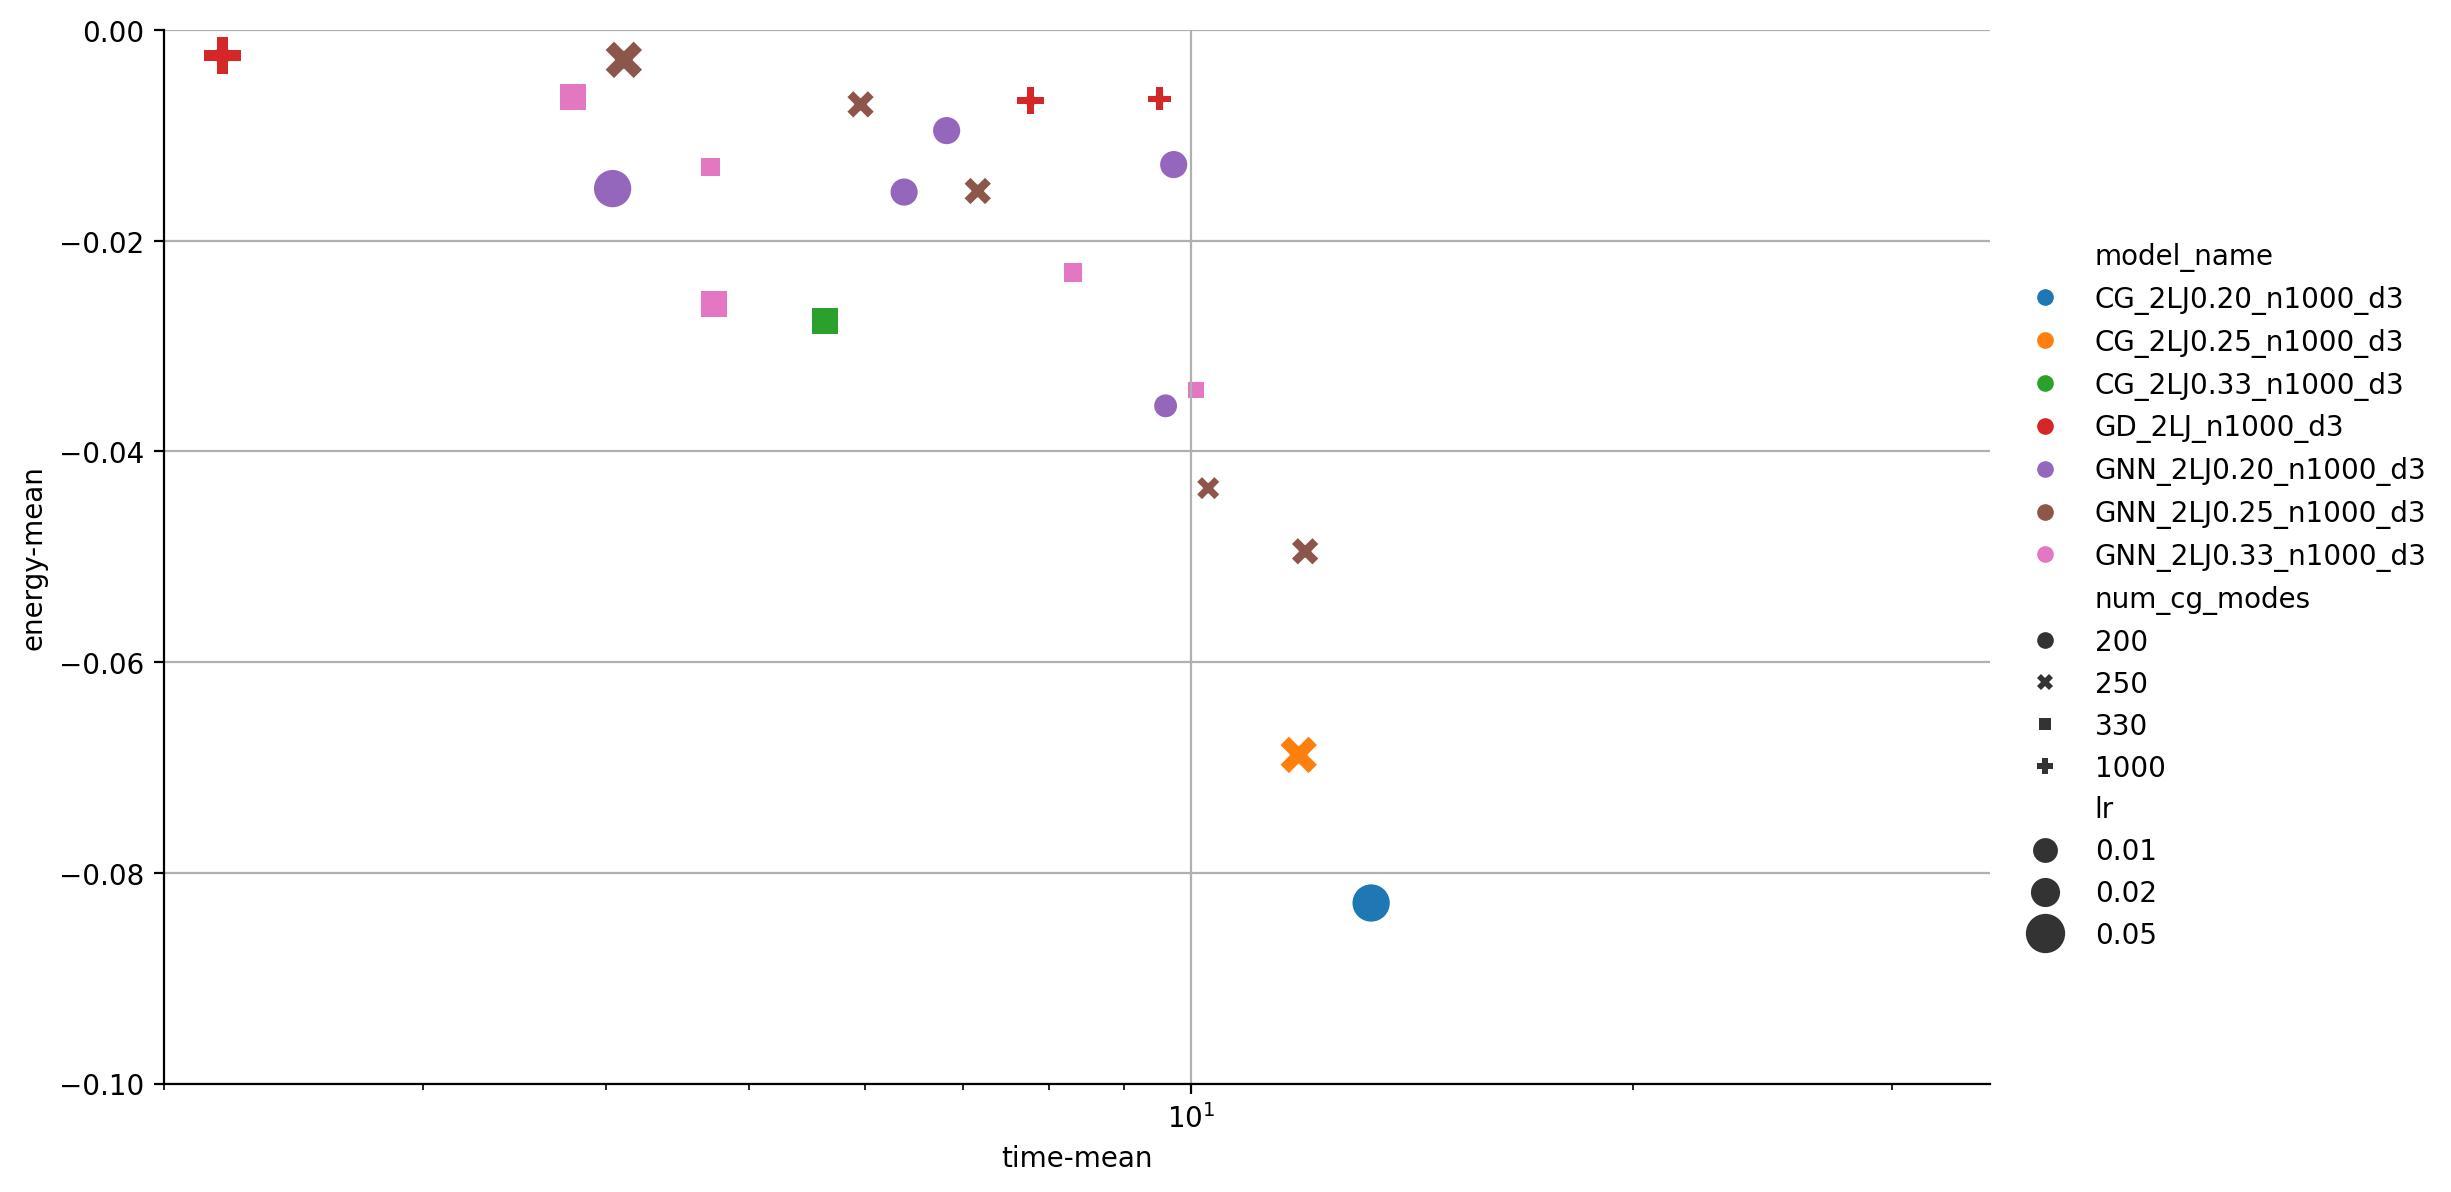

In [101]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='num_cg_modes', size='lr',
            kind='scatter', height=6, aspect=1.7, sizes=(80, 200))


plt.ylim(-.1, -.0)
plt.xlim(2,35)
plt.xscale('log')
# plt.yscale('symlog')
plt.grid()

In [98]:
# make another df where we take the model_name column and strip everything from "_LJ" to the end of the string and replace _ with a space
df_cleaned = df_filtered.copy()
# remove everything after _LJ in model_name. Ex: 'CG_LJ0.33_n400_d3' -> 'CG' 
# this means, we first need to find where _LJ is in the string, then remove everything after that
df_cleaned['model_name'] = df_cleaned['model_name'].apply(lambda x: x[:x.find('2LJ')].replace('_', ' ') or "Adam")

In [99]:
df_cleaned

index model_name    lr  lr_cg  num_cg_modes  hidden_dims  energy-mean  \
0       0        CG   0.01  0.010           200          NaN     0.553778   
1       1        CG   0.01  0.100           200          NaN     0.258139   
2       2        CG   0.02  0.020           200          NaN     0.468907   
3       3        CG   0.02  0.200           200          NaN     0.185472   
4       4        CG   0.05  0.050           200          NaN     0.392676   
5       5        CG   0.05  0.500           200          NaN    -0.082860   
6       6        CG   0.01  0.010           250          NaN     0.548589   
7       7        CG   0.01  0.100           250          NaN     0.379461   
8       8        CG   0.02  0.020           250          NaN     0.464205   
9       9        CG   0.02  0.200           250          NaN     0.339440   
10     10        CG   0.05  0.050           250          NaN     0.472651   
11     11        CG   0.05  0.500           250          NaN    -0.068801   
12     12        CG   0.01  0.010           330          NaN     0.216834   
13     13        CG   0.01  0.100           330          NaN     0.064172   
14     14        CG   0.02  0.020           330          NaN     0.174051   
15     15        CG   0.02  0.200           330          NaN     0.013550   
16     16        CG   0.05  0.050           330          NaN     0.135684   
17     17        CG   0.05  0.500           330          NaN    -0.027609   
18     18        GD   0.01    NaN          1000          NaN    -0.006517   
19     19        GD   0.02    NaN          1000          NaN    -0.006680   
20     20        GD   0.05    NaN          1000          NaN    -0.002418   
21     21       GNN   0.01  0.001           200  [32, 16, 3]    -0.035665   
22     22       GNN   0.01  0.001           200    [8, 4, 3]     0.031744   
23     23       GNN   0.01  0.010           200  [32, 16, 3]     0.004682   
24     24       GNN   0.01  0.010           200    [8, 4, 3]     0.042204   
25     25       GNN   0.02  0.002           200  [32, 16, 3]    -0.012766   
26     26       GNN   0.02  0.002           200    [8, 4, 3]     0.090834   
27     27       GNN   0.02  0.020           200  [32, 16, 3]    -0.015375   
28     28       GNN   0.02  0.020           200    [8, 4, 3]    -0.009540   
29     29       GNN   0.05  0.005           200  [32, 16, 3]    -0.015045   
30     30       GNN   0.05  0.005           200    [8, 4, 3]     0.043664   
31     31       GNN   0.05  0.050           200  [32, 16, 3]     0.101168   
32     32       GNN   0.05  0.050           200    [8, 4, 3]     0.002194   
33     33       GNN   0.01  0.001           250  [32, 16, 3]    -0.043479   
34     34       GNN   0.01  0.001           250    [8, 4, 3]     0.312804   
35     35       GNN   0.01  0.010           250  [32, 16, 3]     0.003518   
36     36       GNN   0.01  0.010           250    [8, 4, 3]     0.043281   
37     37       GNN   0.02  0.002           250  [32, 16, 3]    -0.049475   
38     38       GNN   0.02  0.002           250    [8, 4, 3]     0.109424   
39     39       GNN   0.02  0.020           250  [32, 16, 3]    -0.015272   
40     40       GNN   0.02  0.020           250    [8, 4, 3]    -0.007051   
41     41       GNN   0.05  0.005           250  [32, 16, 3]    -0.002823   
42     42       GNN   0.05  0.005           250    [8, 4, 3]     0.251270   
43     43       GNN   0.05  0.050           250  [32, 16, 3]     0.131241   
44     44       GNN   0.05  0.050           250    [8, 4, 3]     0.011934   
45     45       GNN   0.01  0.001           330  [32, 16, 3]    -0.034138   
46     46       GNN   0.01  0.001           330    [8, 4, 3]     0.024408   
47     47       GNN   0.01  0.010           330  [32, 16, 3]     0.002380   
48     48       GNN   0.01  0.010           330    [8, 4, 3]     0.057223   
49     49       GNN   0.02  0.002           330  [32, 16, 3]    -0.023016   
50     50       GNN   0.02  0.002           330    [8, 4, 3]     0.046275   


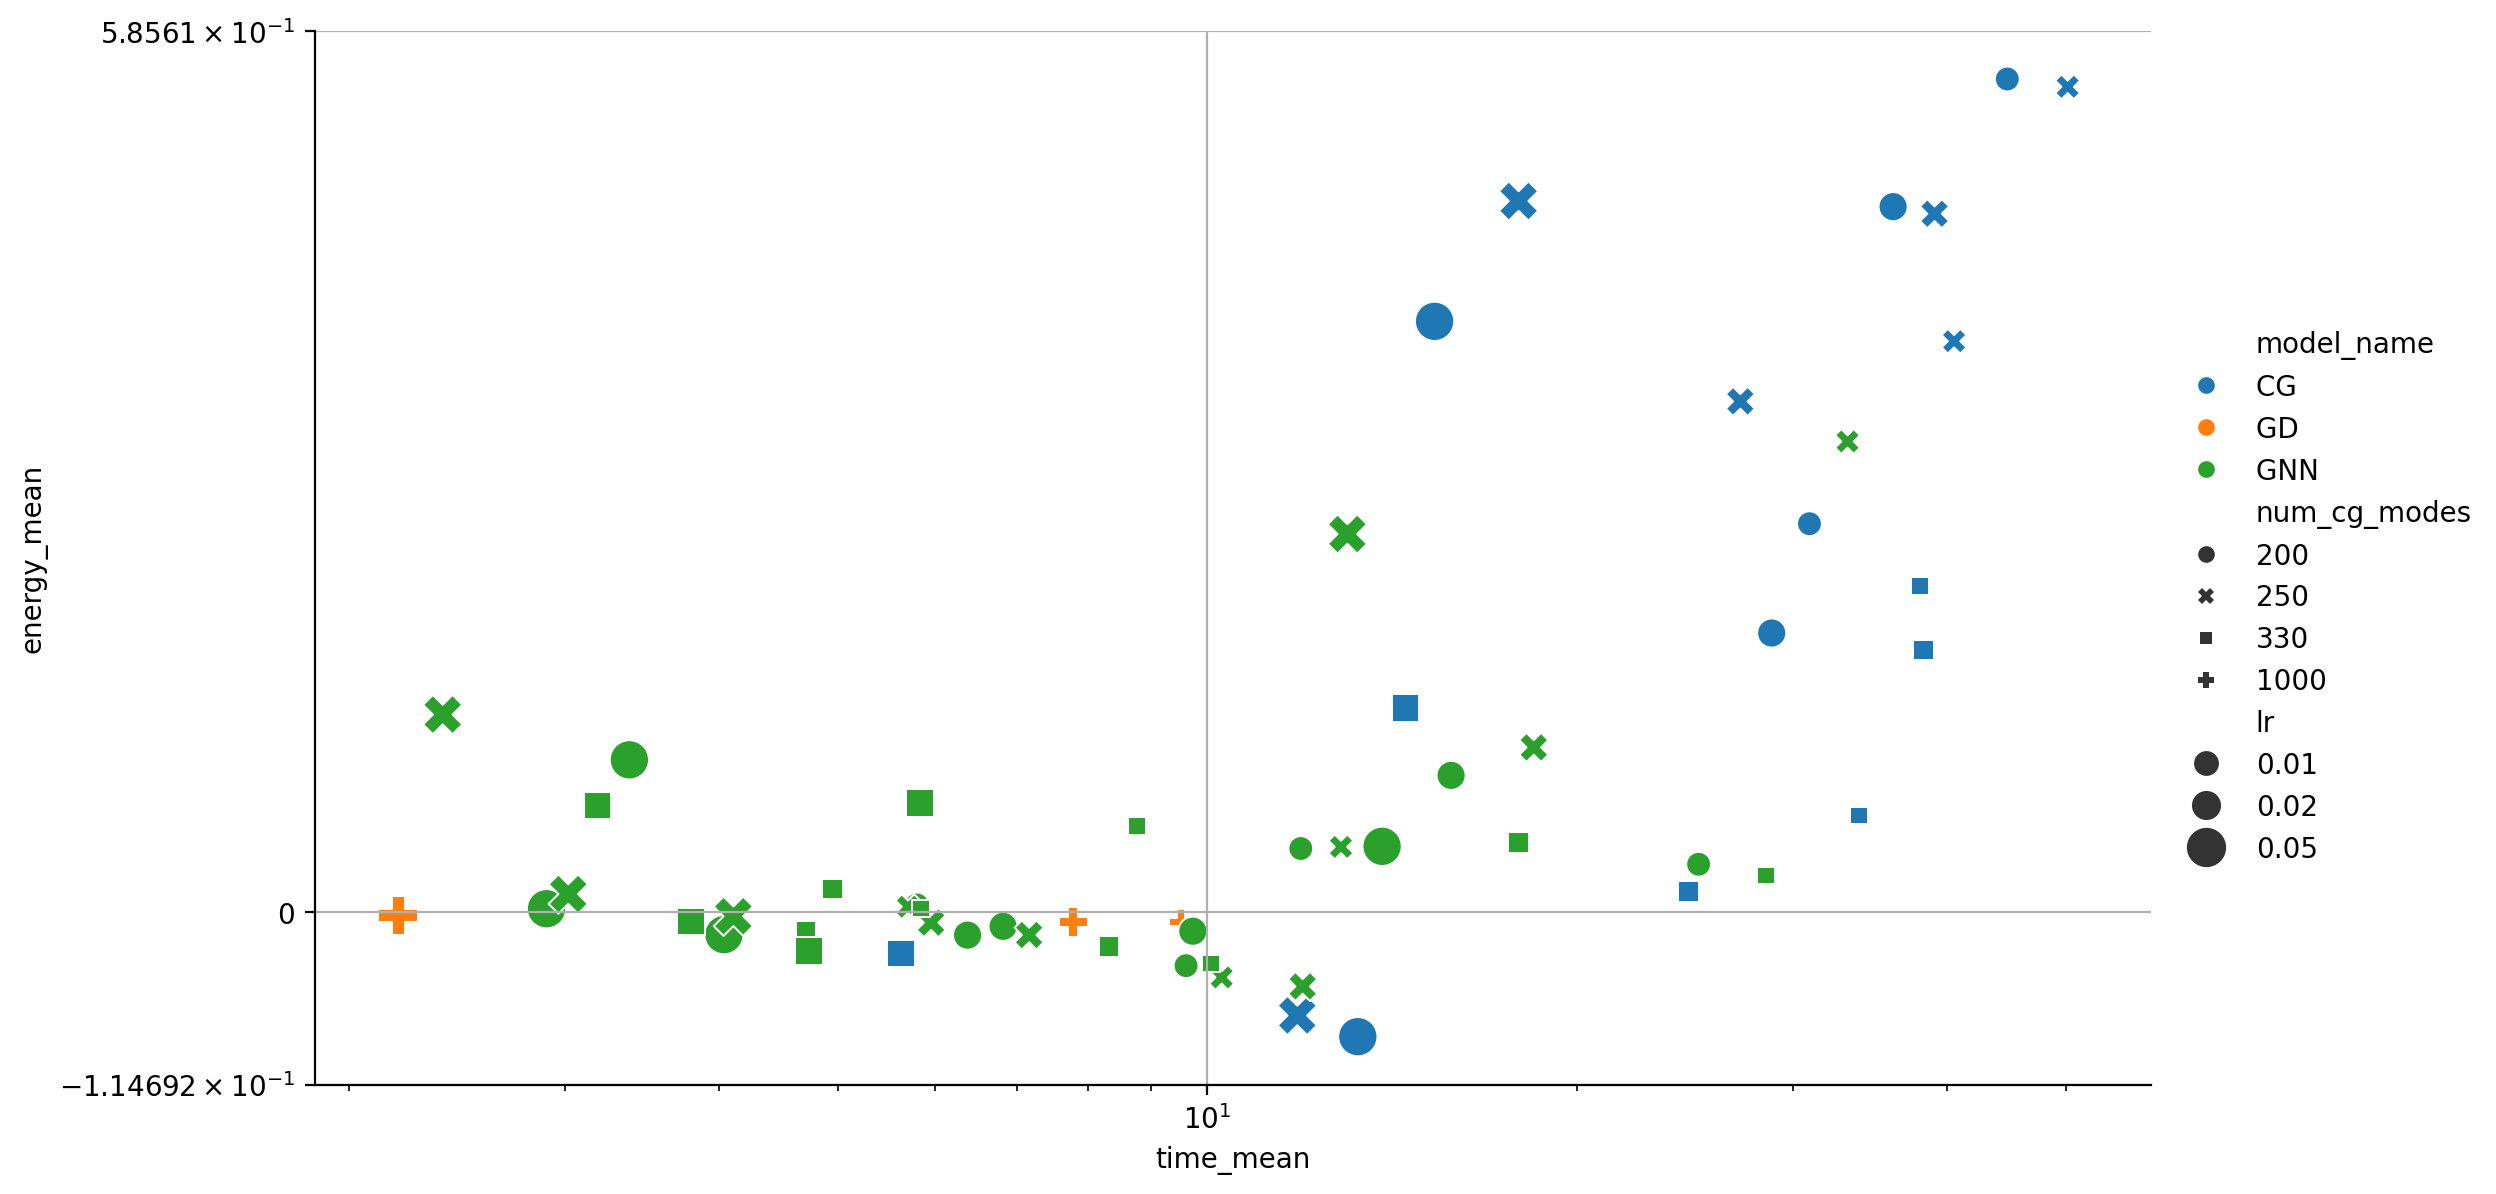

In [102]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', hue='model_name', style='num_cg_modes',#'min_delta',
            kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

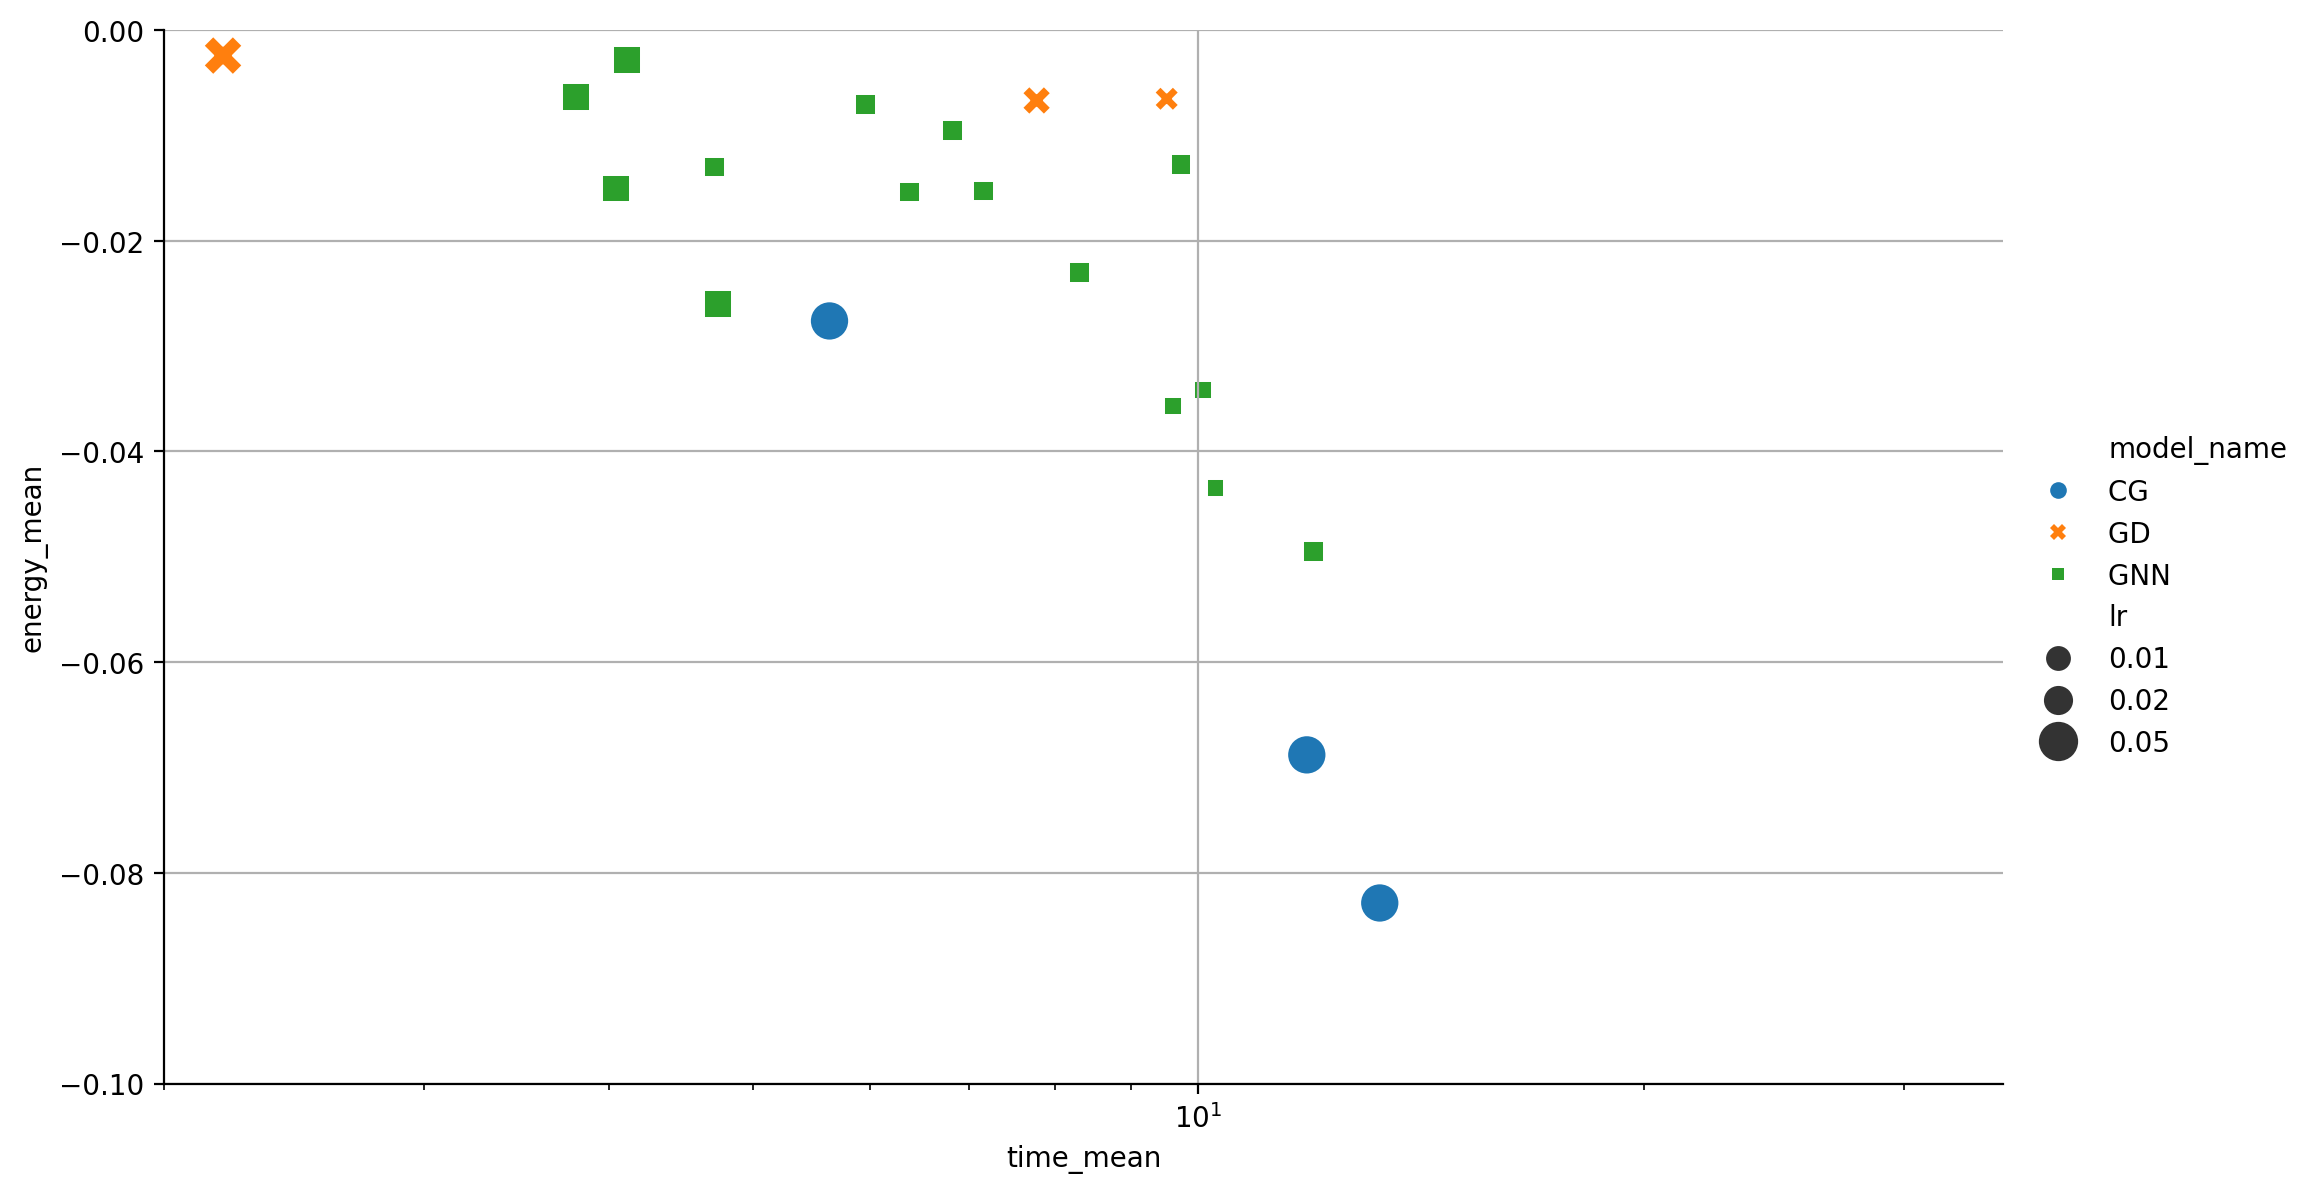

In [103]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='model_name', #'min_delta', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.1, -.0)
plt.xlim(2,35)
plt.xscale('log')
# plt.yscale('symlog')
plt.grid()

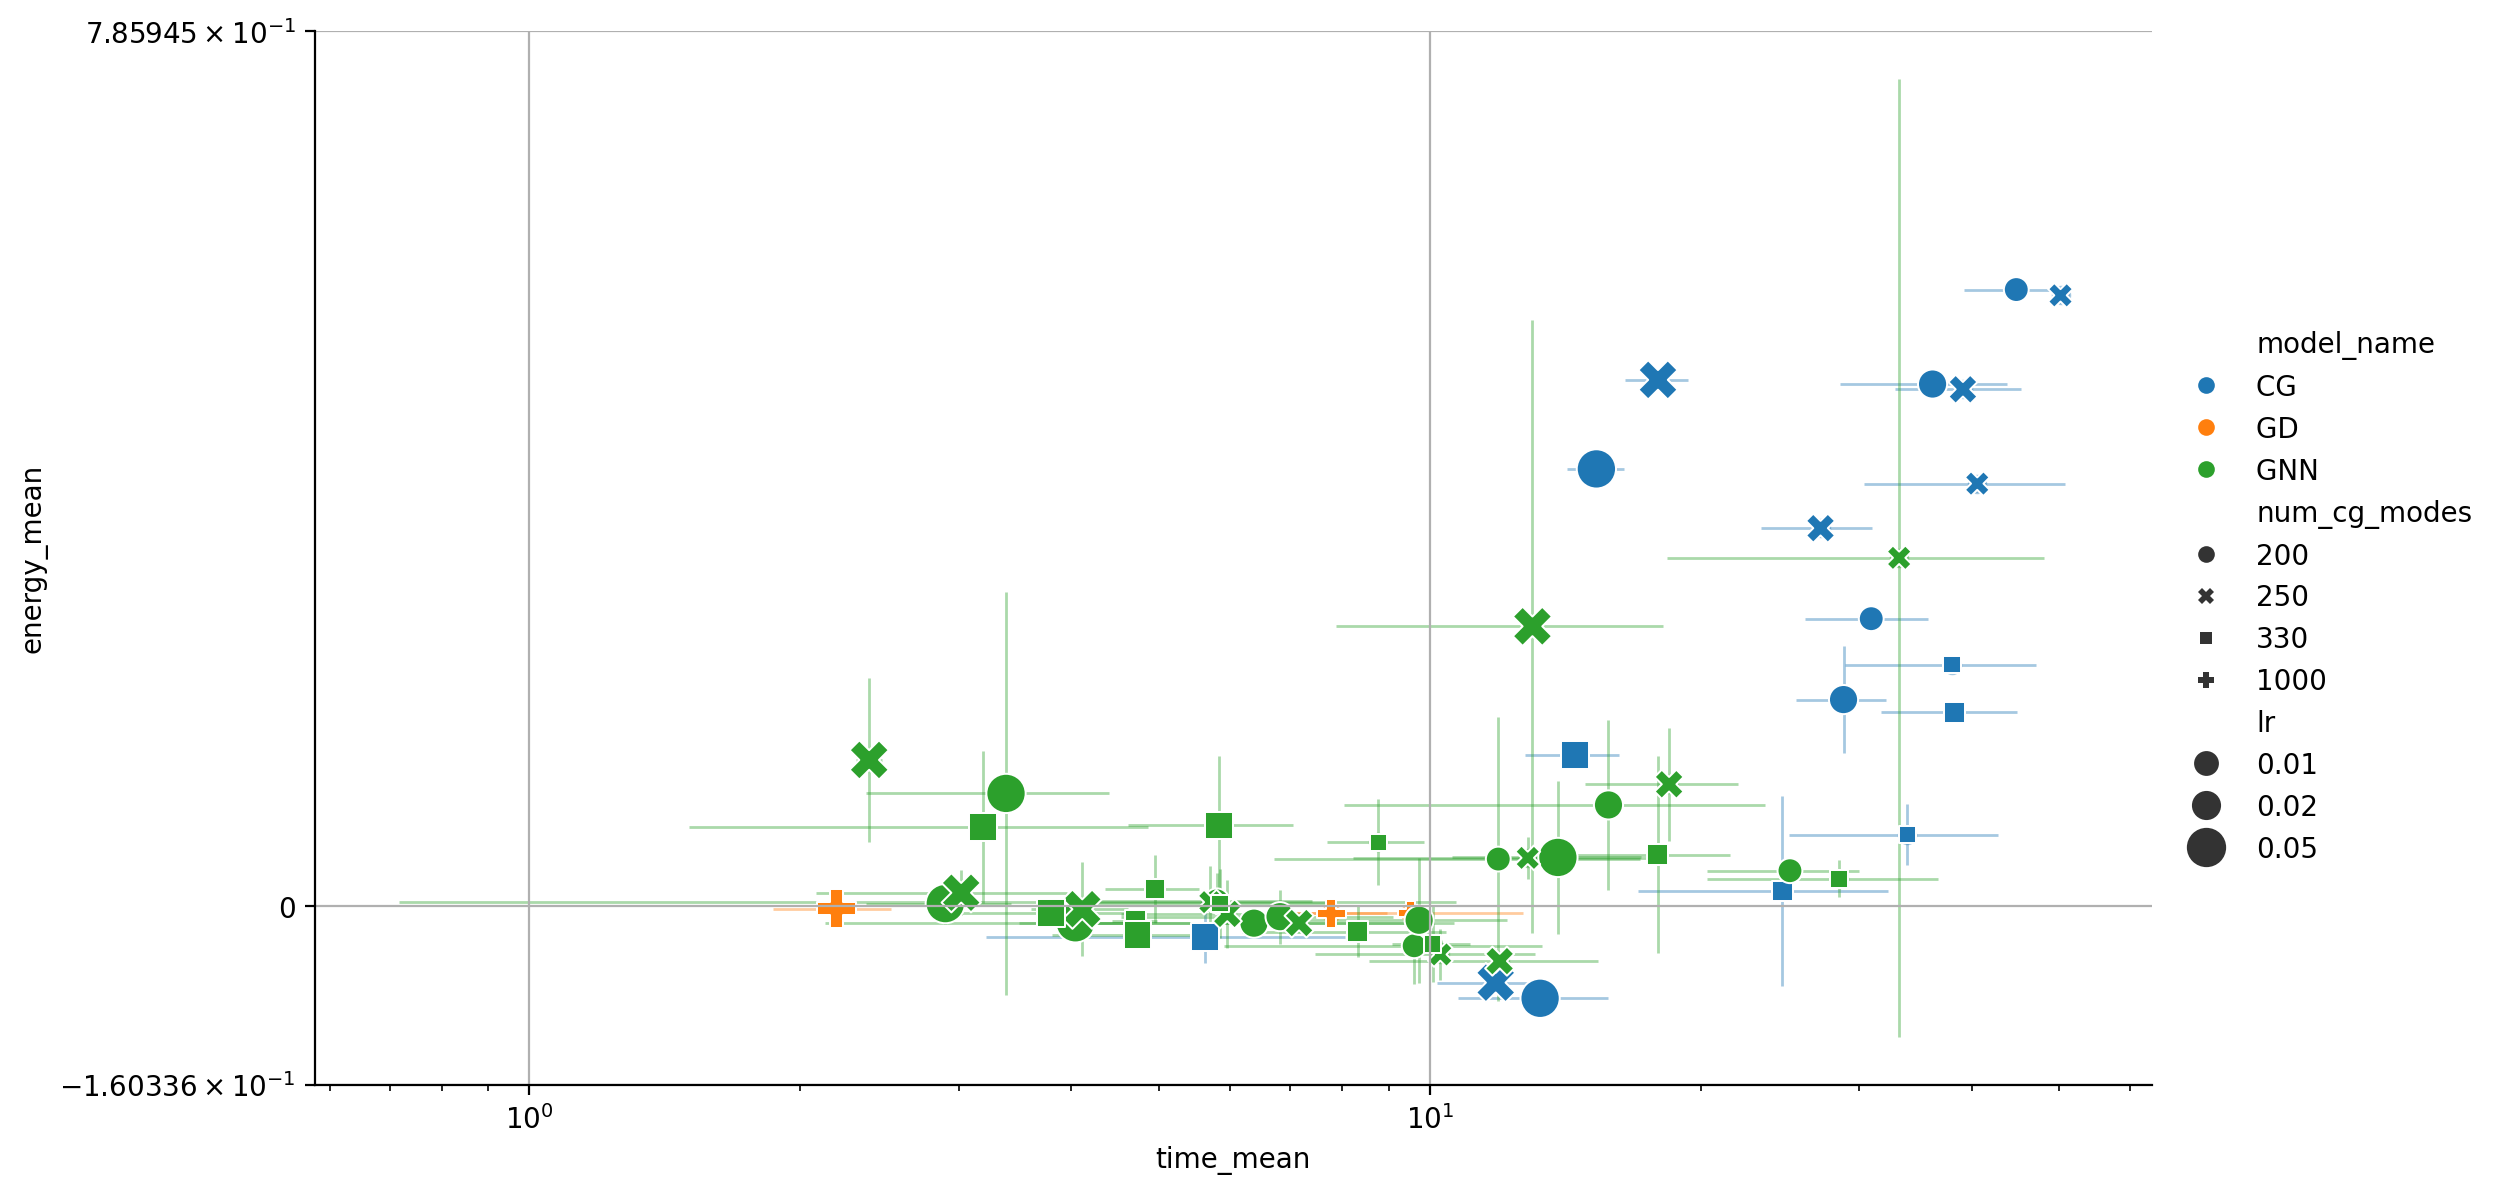

In [104]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', #'min_delta', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))

# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.12, .10)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

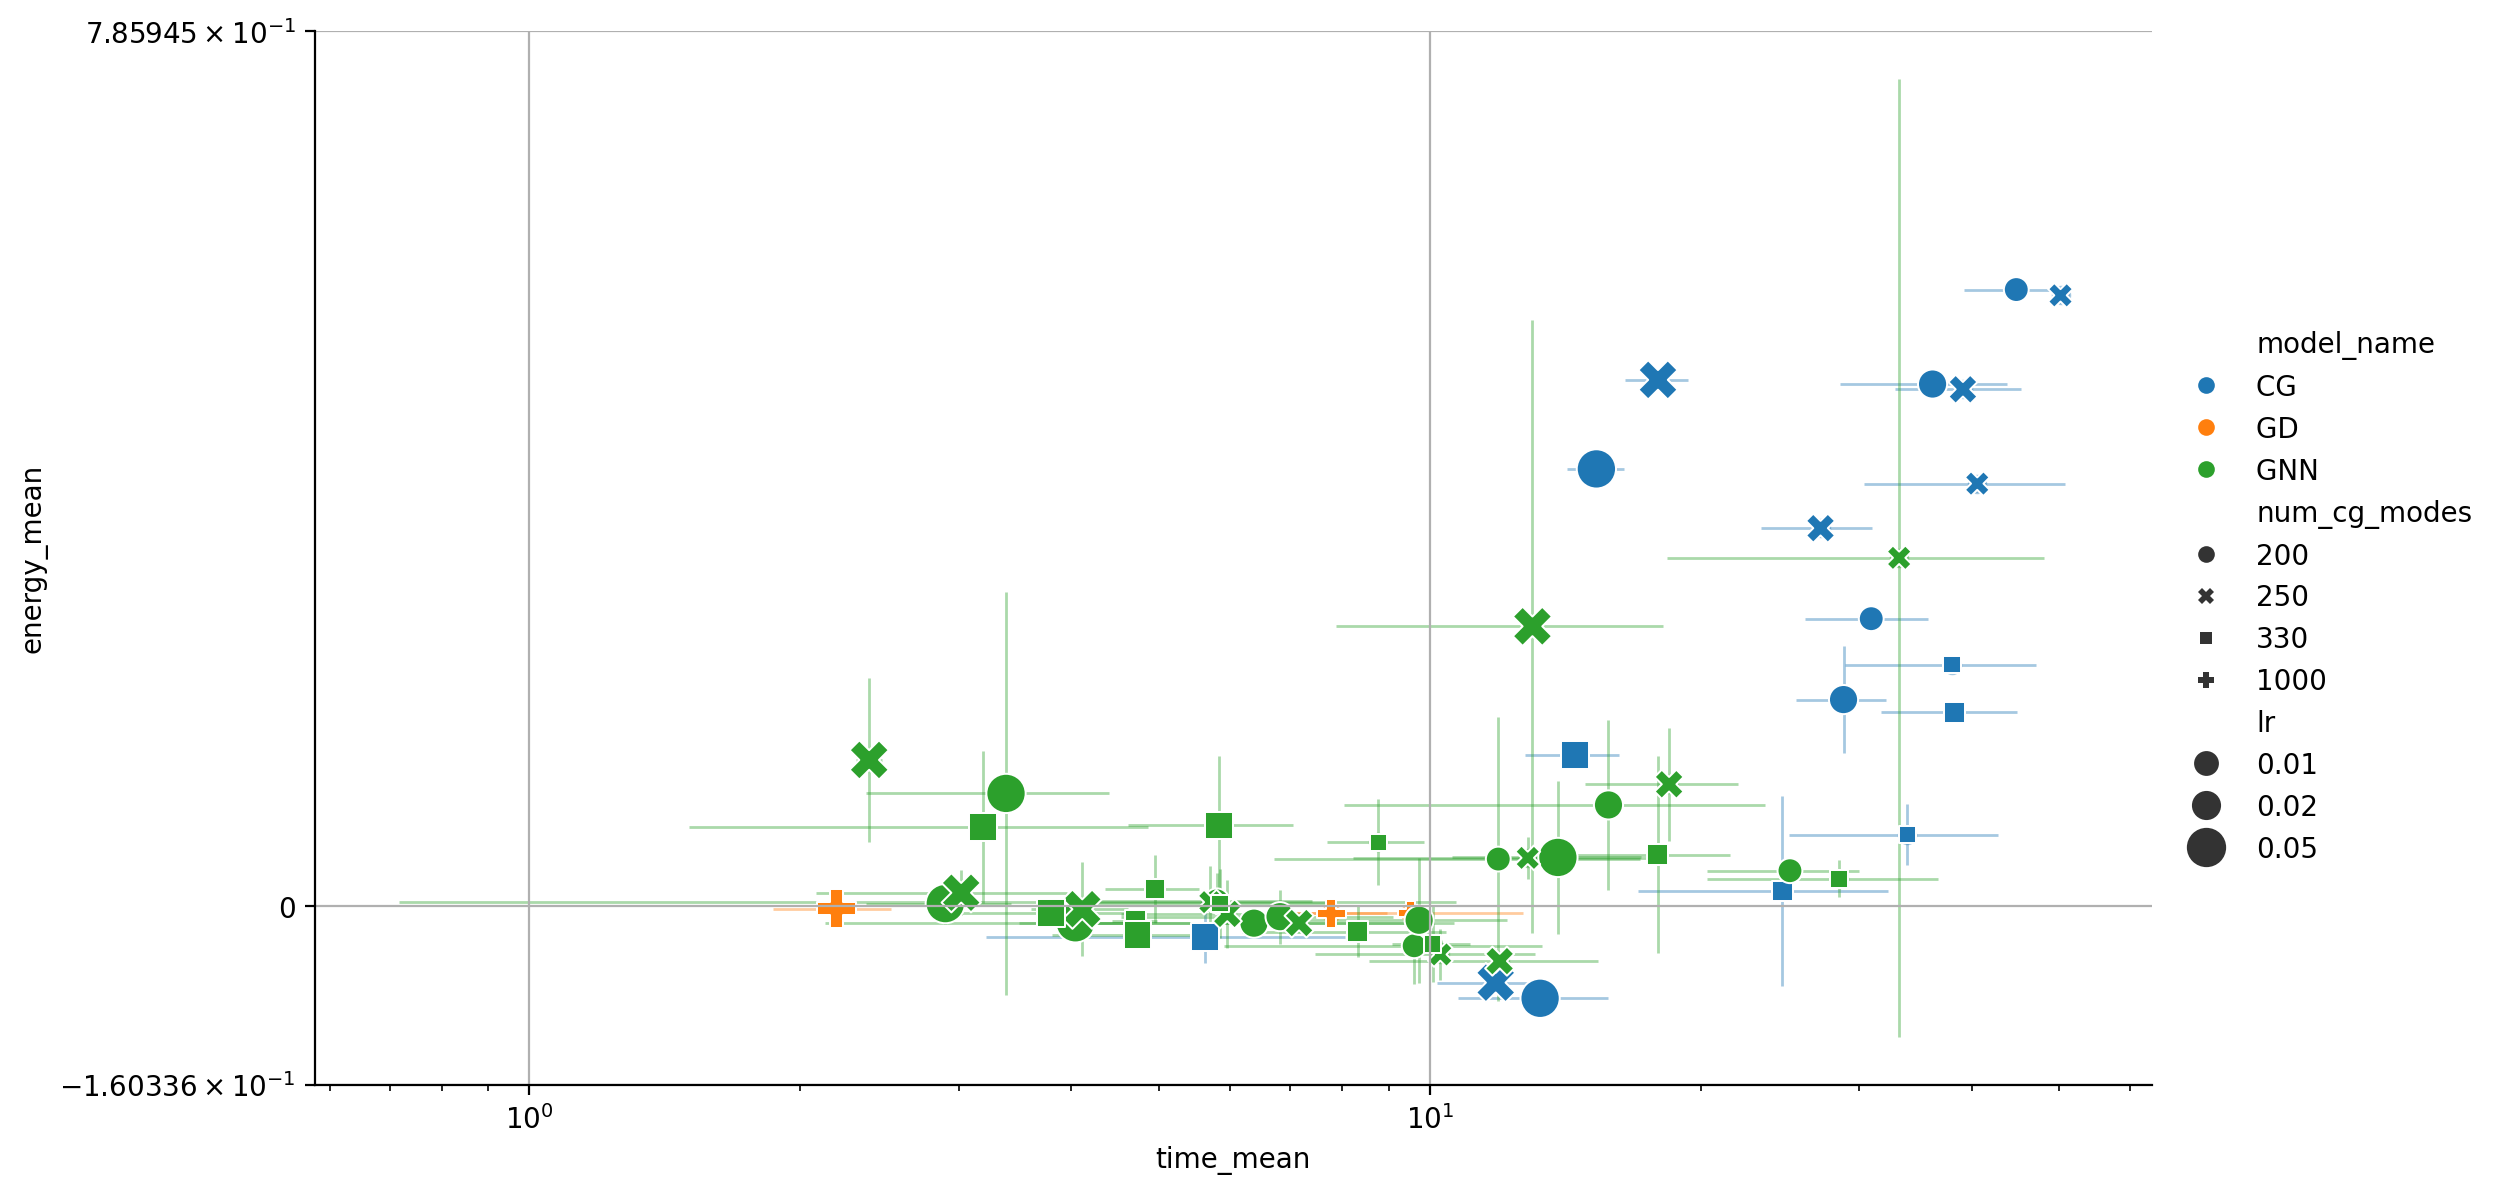

In [105]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))

# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.1, .05)
# plt.xlim(2,35)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

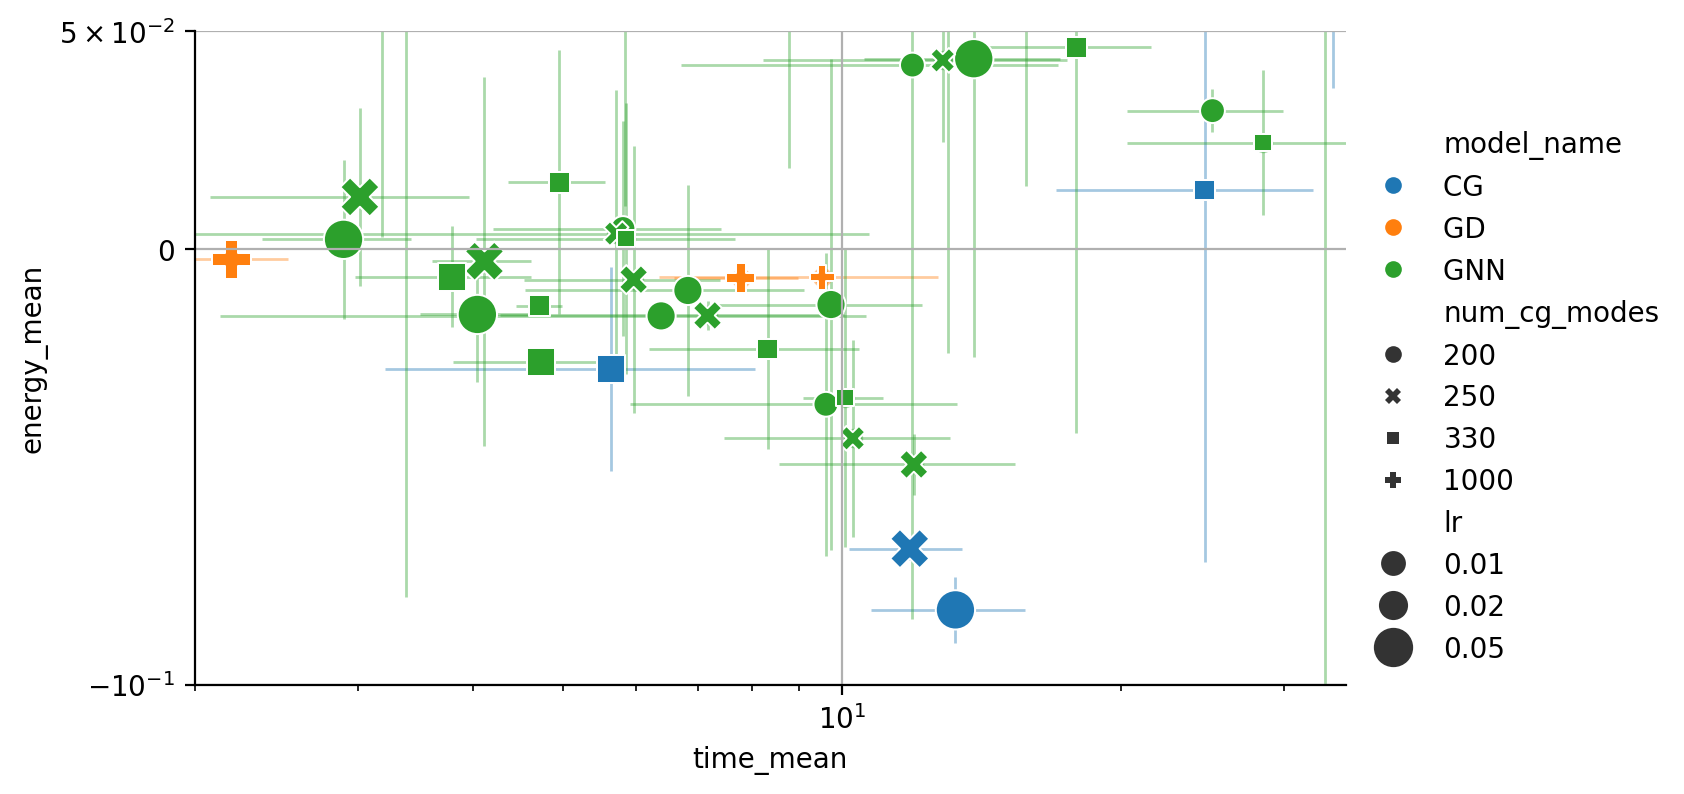

In [106]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=4, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)


plt.ylim(-.1, .05)
plt.xlim(2,35)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

# Quadratic Bonds + LJ loop n=1000
Define an energy function which uses a quadratic potential for bonds and LJ for forming a loop. 
It consists of:
1. a strong backbone line graph with quadratic bonds, where every node is attracted to the next
2. a weaker loop LJ, where every l-th pair of nodes are attracted 

In [84]:
exp_logger = ExperimentLogger(previous_results_csv='./results/CG_Bond_LJ_experiments_2024-02-10-23.csv')
# exp_logger = ExperimentLogger(save_prefix='../results/CG_Bond_LJ_experiment') 
df = exp_logger.to_dataframe()
df

energy_function                model_name    energy       time    lr  \
0    Energy_Bond_LJ       GD_Bond_LJ_n1000_d3 -0.022777  10.918500  0.05   
1    Energy_Bond_LJ   CG_Bond_LJ0.33_n1000_d3 -0.023312  14.456980  0.05   
2    Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.014732  20.726403  0.05   
3    Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.020530   6.009238  0.05   
4    Energy_Bond_LJ   CG_Bond_LJ0.25_n1000_d3 -0.014197   9.047730  0.05   
..              ...                       ...       ...        ...   ...   
287  Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.023114  18.196457  0.02   
288  Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.022039   9.200134  0.02   
289  Energy_Bond_LJ   CG_Bond_LJ0.25_n1000_d3 -0.006441  25.122746  0.02   
290  Energy_Bond_LJ  GNN_Bond_LJ0.25_n1000_d3 -0.023084  22.373780  0.02   
291  Energy_Bond_LJ  GNN_Bond_LJ0.25_n1000_d3 -0.021650   9.207755  0.02   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  2.449459       1000    NaN   
1            0.1        20  1.000000e-06  2.449459       1000  0.050   
2            0.1        20  1.000000e-06  2.449459       1000  0.005   
3            0.1        20  1.000000e-06  2.449459       1000  0.005   
4            0.1        20  1.000000e-06  2.449459       1000  0.050   
..           ...       ...           ...       ...        ...    ...   
287          0.1        20  1.000000e-07  2.449459       1000  0.002   
288          0.1        20  1.000000e-07  2.449459       1000  0.002   
289          0.1        20  1.000000e-07  2.449459       1000  0.020   
290          0.1        20  1.000000e-07  2.449459       1000  0.002   
291          0.1        20  1.000000e-07  2.449459       1000  0.002   

     cg_patience  cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  \
0            NaN           NaN       NaN        NaN        NaN           NaN   
1           20.0      0.000010     544.0  10.700821  -0.020303         333.0   
2           20.0      0.000010     614.0  14.978873  -0.014175         333.0   
3           20.0      0.000010     208.0   5.664539  -0.017016         333.0   
4           20.0      0.000010     359.0   7.528658  -0.012860         250.0   
..           ...           ...       ...        ...        ...           ...   
287         20.0      0.000001     620.0  15.099299  -0.022545         333.0   
288         20.0      0.000001     346.0   8.849477  -0.021267         333.0   
289         20.0      0.000001    1090.0  21.990363  -0.004948         250.0   
290         20.0      0.000001     770.0  19.095854  -0.022820         250.0   
291         20.0      0.000001     348.0   8.849345  -0.020738         250.0   

     hidden_dims  
0            NaN  
1            NaN  
2      [8, 4, 3]  
3    [32, 16, 3]  
4            NaN  
..           ...  
287    [8, 4, 3]  
288  [32, 16, 3]  
289          NaN  
290    [8, 4, 3]  
291  [32, 16, 3]  

[292 rows x 18 columns]

In [85]:
# seems like the num_cg_modes are not logged correctly for "CG_..." models, and base models do not use cg modes
# fortunately, the CG models mention the ratio of cg modes / num nodes in the model name as CG_Bond_LJ[ratio]_n[nodes]_d3
# so we can extract the ratio from the model name, and use it to calculate the number of cg modes
# we can also calculate the number of nodes from the model name

# first, let's extract the ratio and number of nodes from the model name
df['cg_ratio'] = df['model_name'].apply(lambda x: float((x.split('_LJ')[1].split('_')[0] or '1.0')))
df['num_cg_modes'] = df['cg_ratio'] * df['num_nodes']
# ensure that the num_cg_modes is an integer
df['num_cg_modes'] = df['num_cg_modes'].astype(int)
df[:10]

energy_function                model_name    energy       time    lr  \
0  Energy_Bond_LJ       GD_Bond_LJ_n1000_d3 -0.022777  10.918500  0.05   
1  Energy_Bond_LJ   CG_Bond_LJ0.33_n1000_d3 -0.023312  14.456980  0.05   
2  Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.014732  20.726403  0.05   
3  Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.020530   6.009238  0.05   
4  Energy_Bond_LJ   CG_Bond_LJ0.25_n1000_d3 -0.014197   9.047730  0.05   
5  Energy_Bond_LJ  GNN_Bond_LJ0.25_n1000_d3 -0.014698  13.584062  0.05   
6  Energy_Bond_LJ  GNN_Bond_LJ0.25_n1000_d3 -0.022771  12.646562  0.05   
7  Energy_Bond_LJ   CG_Bond_LJ0.20_n1000_d3 -0.023343  13.153043  0.05   
8  Energy_Bond_LJ  GNN_Bond_LJ0.20_n1000_d3 -0.023112  17.938087  0.05   
9  Energy_Bond_LJ  GNN_Bond_LJ0.20_n1000_d3 -0.021056   7.102287  0.05   

   clamp_grads  patience  min_delta    x0_std  num_nodes  lr_cg  cg_patience  \
0          0.1        20   0.000001  2.449459       1000    NaN          NaN   
1          0.1        20   0.000001  2.449459       1000  0.050         20.0   
2          0.1        20   0.000001  2.449459       1000  0.005         20.0   
3          0.1        20   0.000001  2.449459       1000  0.005         20.0   
4          0.1        20   0.000001  2.449459       1000  0.050         20.0   
5          0.1        20   0.000001  2.449459       1000  0.005         20.0   
6          0.1        20   0.000001  2.449459       1000  0.005         20.0   
7          0.1        20   0.000001  2.449459       1000  0.050         20.0   
8          0.1        20   0.000001  2.449459       1000  0.005         20.0   
9          0.1        20   0.000001  2.449459       1000  0.005         20.0   

   cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  hidden_dims  \
0           NaN       NaN        NaN        NaN          1000          NaN   
1       0.00001     544.0  10.700821  -0.020303           330          NaN   
2       0.00001     614.0  14.978873  -0.014175           330    [8, 4, 3]   
3       0.00001     208.0   5.664539  -0.017016           330  [32, 16, 3]   
4       0.00001     359.0   7.528658  -0.012860           250          NaN   
5       0.00001     431.0  10.562077  -0.013498           250    [8, 4, 3]   
6       0.00001     253.0   6.934950  -0.022274           250  [32, 16, 3]   
7       0.00001     591.0  11.943967  -0.022390           200          NaN   
8       0.00001     619.0  14.890392  -0.022722           200    [8, 4, 3]   
9       0.00001     241.0   6.754832  -0.016494           200  [32, 16, 3]   

   cg_ratio  
0      1.00  
1      0.33  
2      0.33  
3      0.33  
4      0.25  
5      0.25  
6      0.25  
7      0.20  
8      0.20  
9      0.20

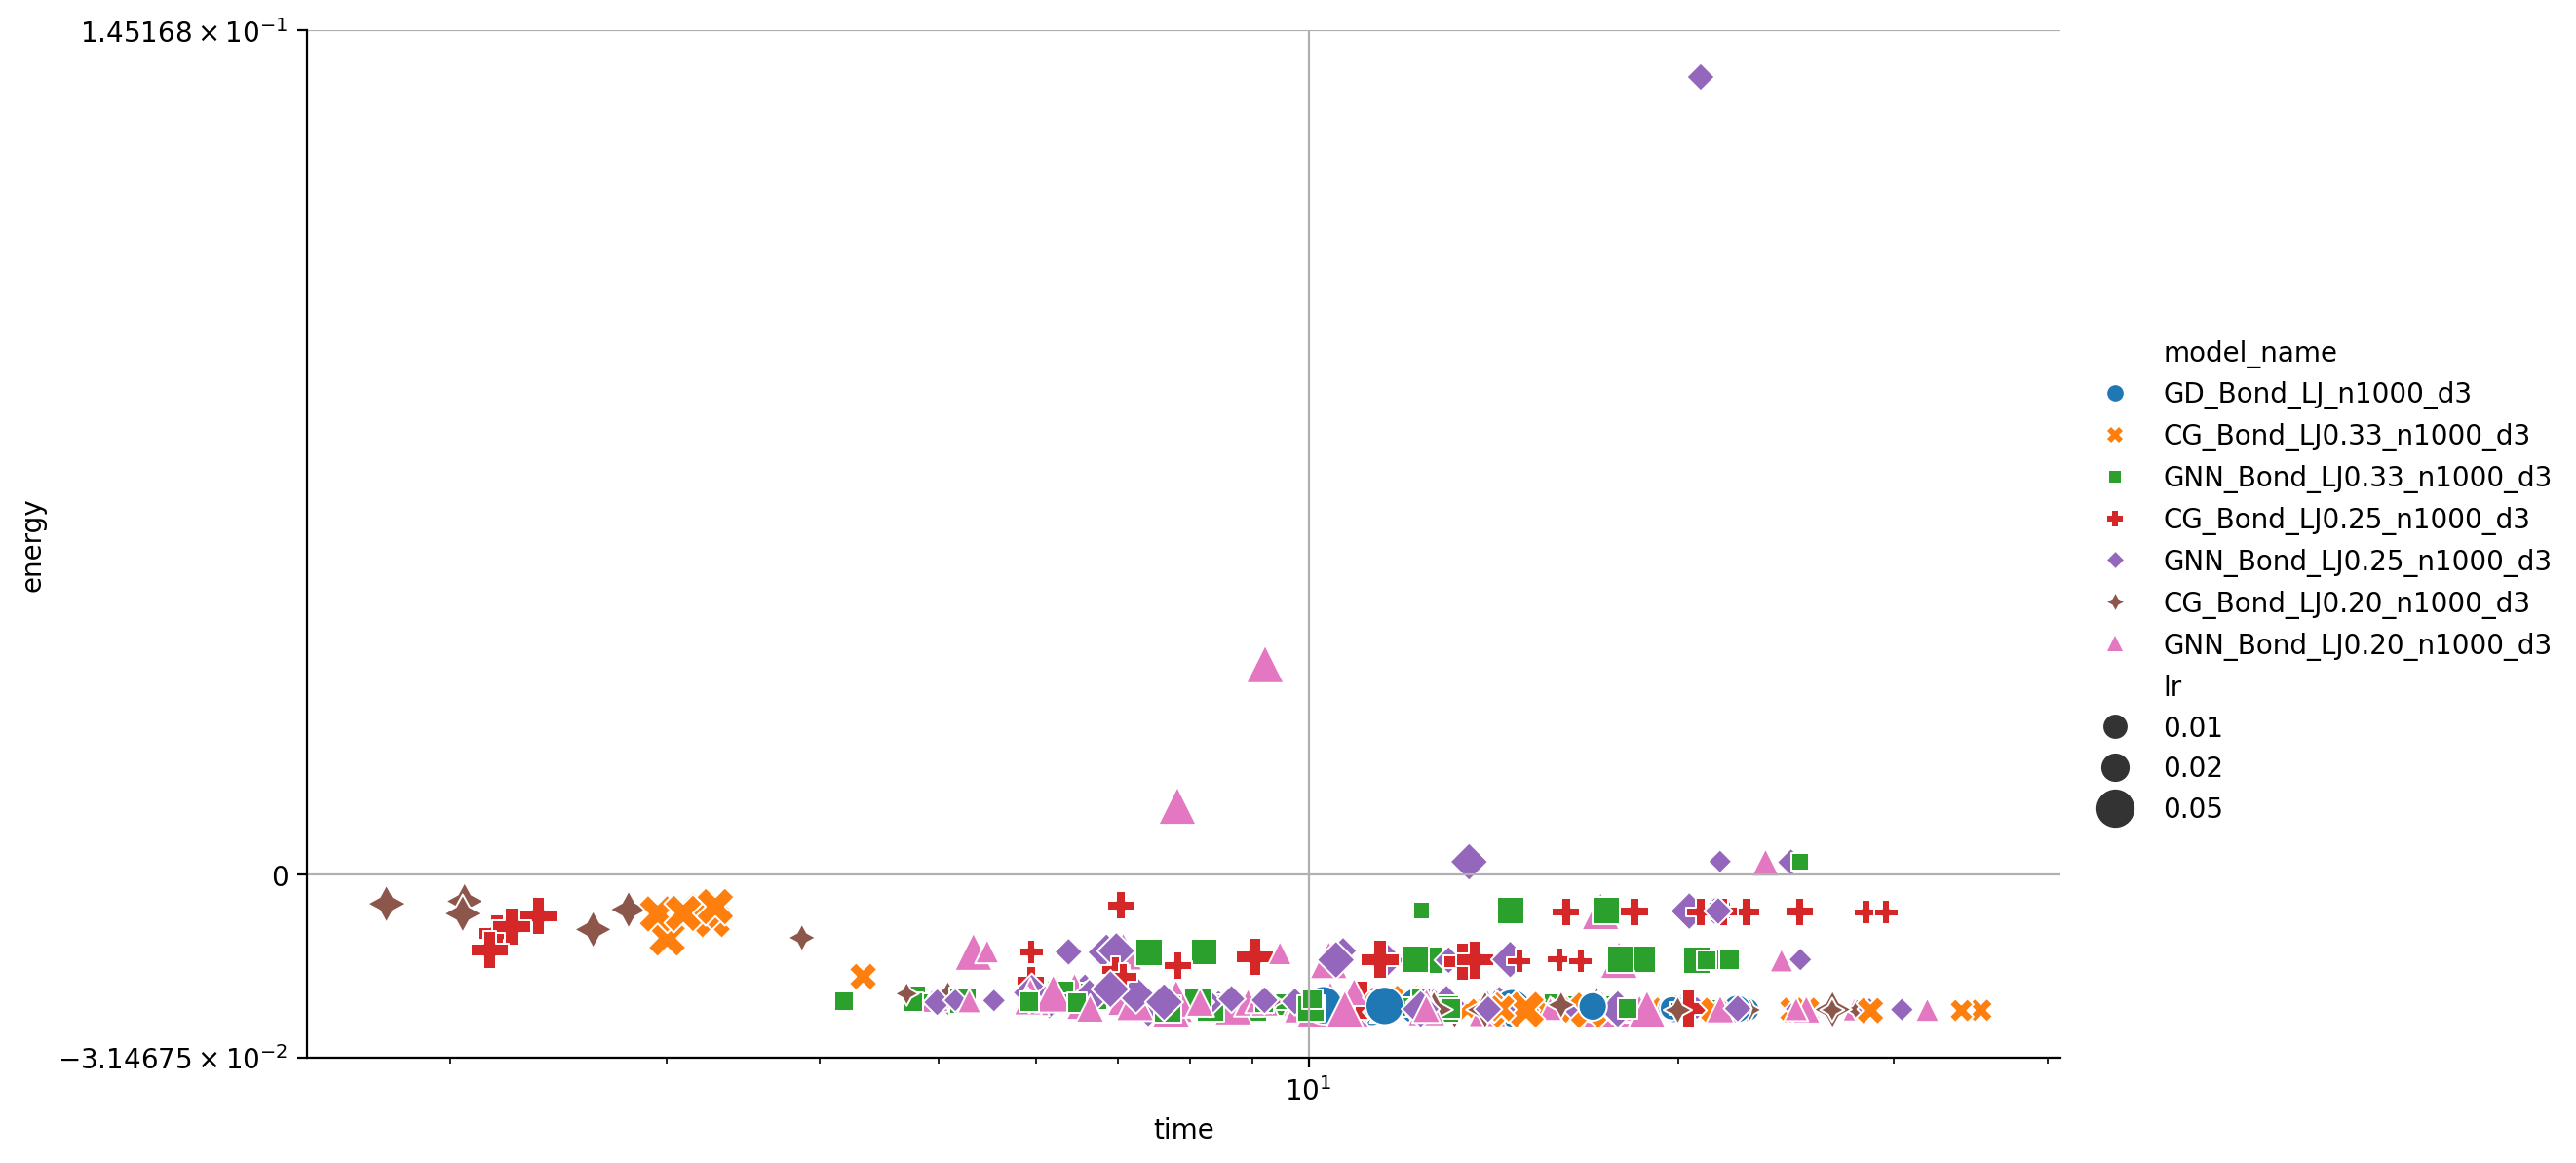

In [86]:
# df = exp_logger.to_dataframe()
# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.0234, -.0228)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

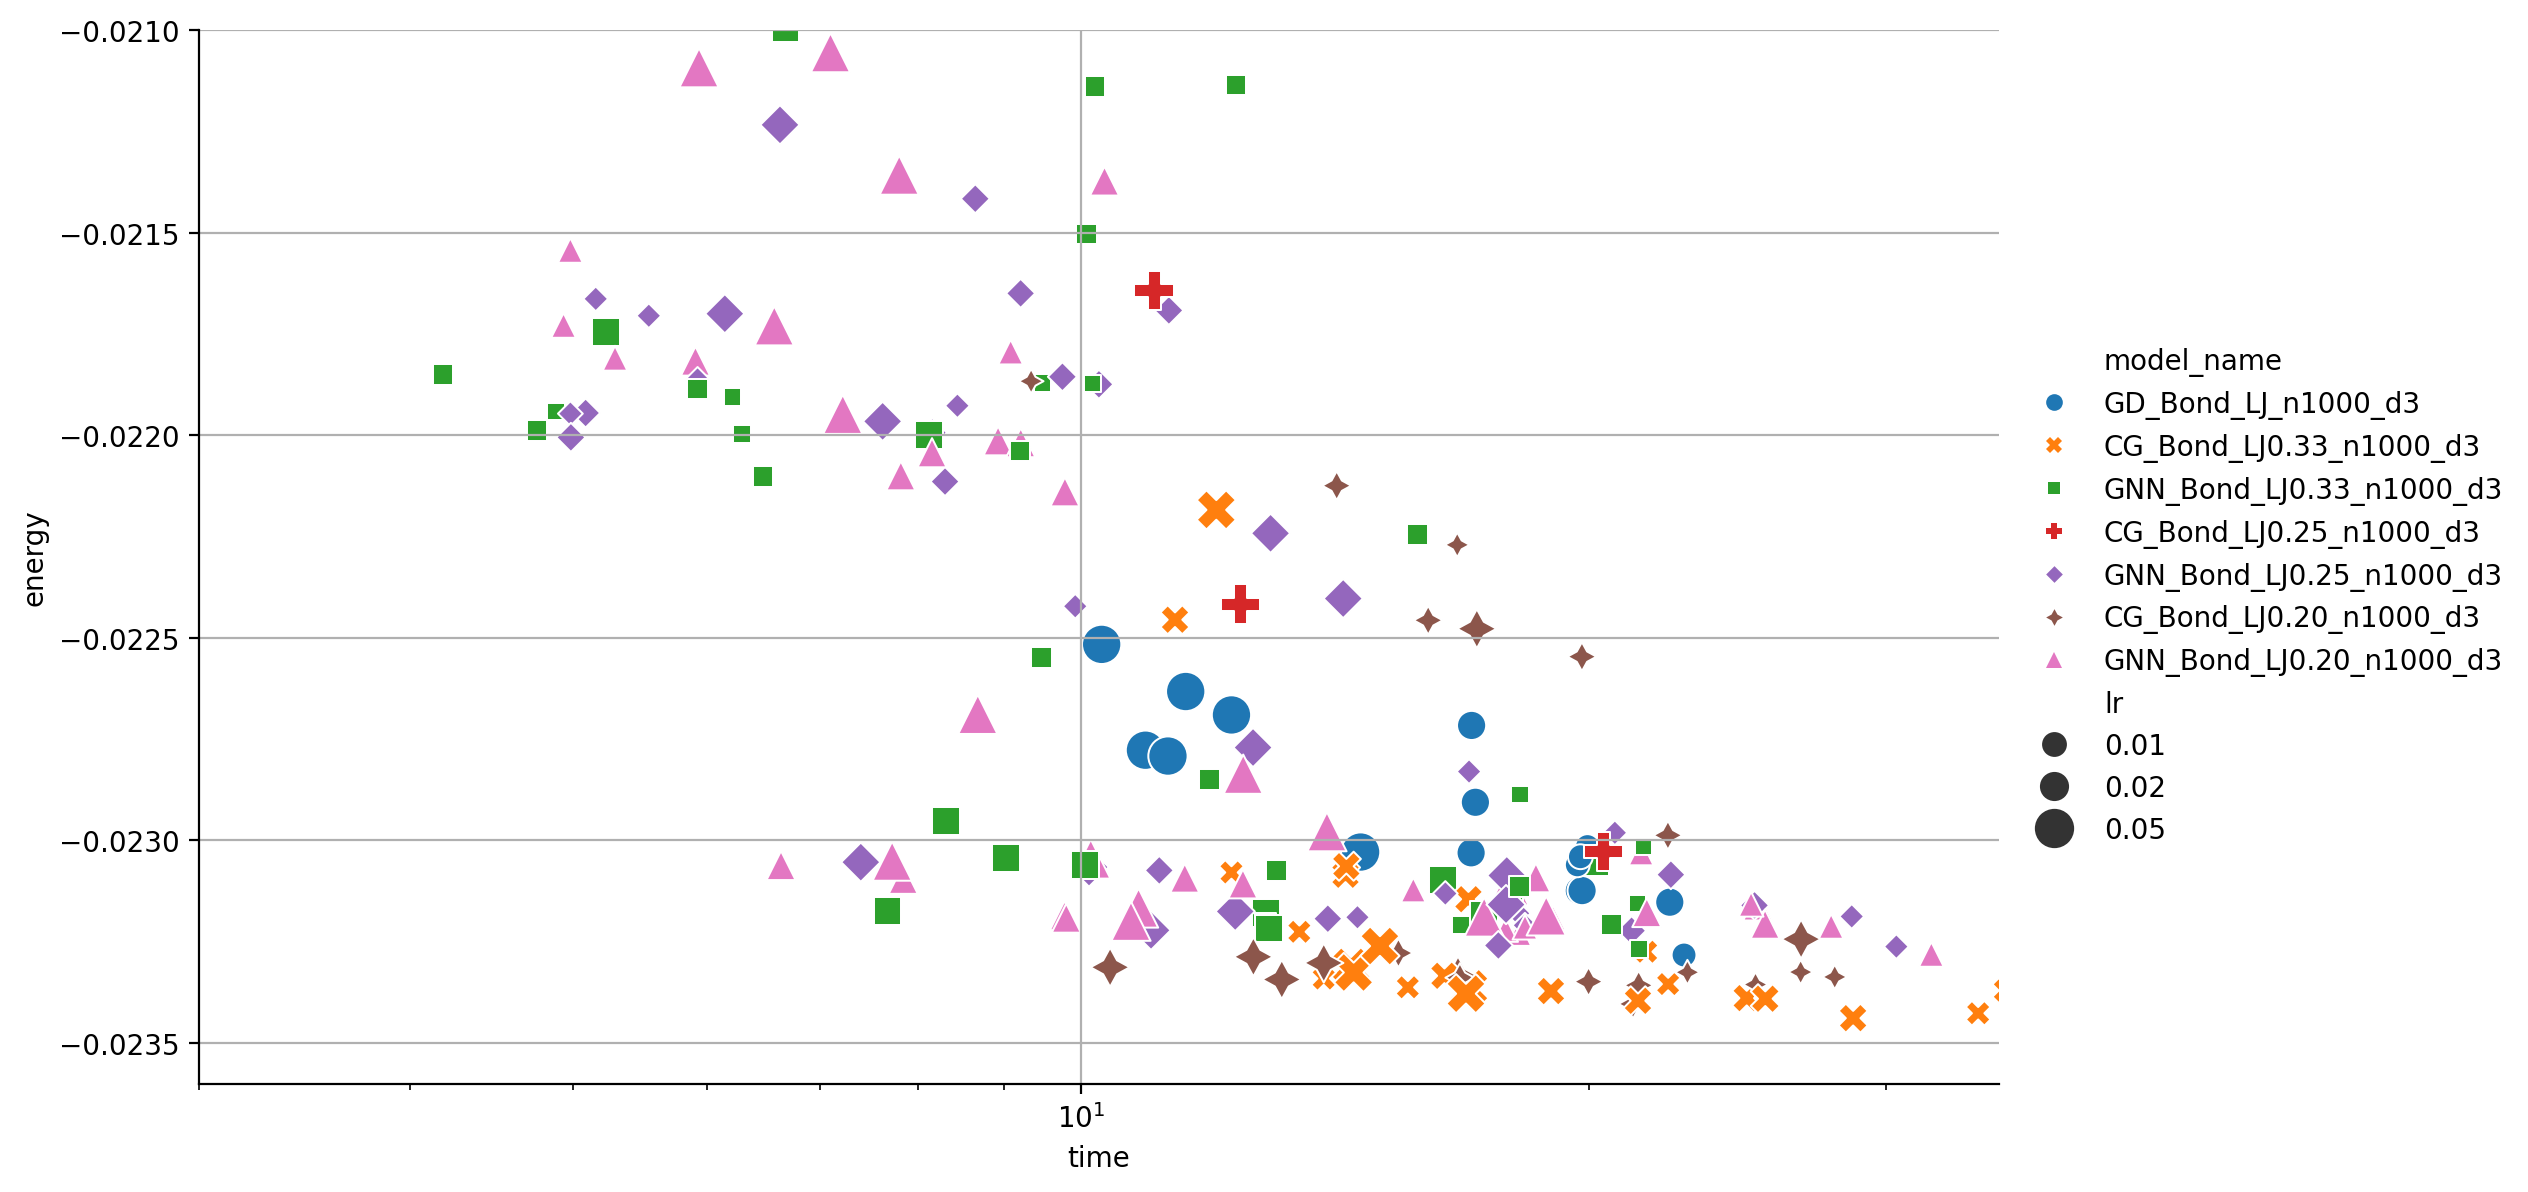

In [87]:
# df = exp_logger.to_dataframe()
# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.0236, -.0210)
plt.xlim(3,35)
plt.xscale('log')
plt.grid()

## Grouping similar runs

In [88]:
# We replace the NaN with 0 before applying groupby to avoid losing rows
df_copy = df.copy()
df_copy.fillna('na', inplace=True)
# we will group by the model_name, lr, and min_delta
df_grouped = df_copy.groupby(['model_name', 'lr', 'min_delta', 'num_cg_modes', 'lr_cg', 'hidden_dims'])
# other options: cg_patience,cg_min_delta
# we can now calculate the mean and std of the energy for each group
# only take the mean of the energy and time column (the other columns are not relevant and may contain non-numeric values)
df_mean = df_grouped.agg({'energy': ['mean', 'std'], 'time': ['mean','std']})
df_mean.reset_index(inplace=True)

# now we will revert the 'na' values to NaN
df_mean.replace('na', np.nan, inplace=True)
df_mean

/tmp/ipykernel_1740678/3992581159.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.fillna('na', inplace=True)
/tmp/ipykernel_1740678/3992581159.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mean.replace('na', np.nan, inplace=True)


model_name    lr     min_delta num_cg_modes  lr_cg  \
                                                                        
0     CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-07          200  0.010   
1     CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-07          200  0.100   
2     CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-06          200  0.010   
3     CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-06          200  0.100   
4     CG_Bond_LJ0.20_n1000_d3  0.02  1.000000e-07          200  0.020   
..                        ...   ...           ...          ...    ...   
109  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-07          330  0.050   
110  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06          330  0.005   
111  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06          330  0.005   
112  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06          330  0.050   
113  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06          330  0.050   

     hidden_dims    energy                 time            
                      mean       std       mean       std  
0            NaN -0.023331  0.000009  27.347316  0.899499  
1            NaN -0.020438  0.000127   4.894100  0.266955  
2            NaN -0.023340  0.000021  23.999430  1.576891  
3            NaN -0.022069  0.000286  13.026612  5.212957  
4            NaN -0.023381  0.000032  21.329217  0.115937  
..           ...       ...       ...        ...       ...  
109    [8, 4, 3] -0.019883  0.005608  10.113477  2.726604  
110  [32, 16, 3] -0.021492  0.001285   7.002495  1.188437  
111    [8, 4, 3] -0.017514  0.004911  18.922266  1.702477  
112  [32, 16, 3] -0.020306  0.004892  11.393775  2.083077  
113    [8, 4, 3] -0.017002  0.005278  15.448142  6.354655  

[114 rows x 10 columns]

In [89]:
df_copy

energy_function                model_name    energy       time    lr  \
0    Energy_Bond_LJ       GD_Bond_LJ_n1000_d3 -0.022777  10.918500  0.05   
1    Energy_Bond_LJ   CG_Bond_LJ0.33_n1000_d3 -0.023312  14.456980  0.05   
2    Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.014732  20.726403  0.05   
3    Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.020530   6.009238  0.05   
4    Energy_Bond_LJ   CG_Bond_LJ0.25_n1000_d3 -0.014197   9.047730  0.05   
..              ...                       ...       ...        ...   ...   
287  Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.023114  18.196457  0.02   
288  Energy_Bond_LJ  GNN_Bond_LJ0.33_n1000_d3 -0.022039   9.200134  0.02   
289  Energy_Bond_LJ   CG_Bond_LJ0.25_n1000_d3 -0.006441  25.122746  0.02   
290  Energy_Bond_LJ  GNN_Bond_LJ0.25_n1000_d3 -0.023084  22.373780  0.02   
291  Energy_Bond_LJ  GNN_Bond_LJ0.25_n1000_d3 -0.021650   9.207755  0.02   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  2.449459       1000     na   
1            0.1        20  1.000000e-06  2.449459       1000   0.05   
2            0.1        20  1.000000e-06  2.449459       1000  0.005   
3            0.1        20  1.000000e-06  2.449459       1000  0.005   
4            0.1        20  1.000000e-06  2.449459       1000   0.05   
..           ...       ...           ...       ...        ...    ...   
287          0.1        20  1.000000e-07  2.449459       1000  0.002   
288          0.1        20  1.000000e-07  2.449459       1000  0.002   
289          0.1        20  1.000000e-07  2.449459       1000   0.02   
290          0.1        20  1.000000e-07  2.449459       1000  0.002   
291          0.1        20  1.000000e-07  2.449459       1000  0.002   

    cg_patience cg_min_delta cg_steps    cg_time cg_energy  num_cg_modes  \
0            na           na       na         na        na          1000   
1          20.0      0.00001    544.0  10.700821 -0.020303           330   
2          20.0      0.00001    614.0  14.978873 -0.014175           330   
3          20.0      0.00001    208.0   5.664539 -0.017016           330   
4          20.0      0.00001    359.0   7.528658  -0.01286           250   
..          ...          ...      ...        ...       ...           ...   
287        20.0     0.000001    620.0  15.099299 -0.022545           330   
288        20.0     0.000001    346.0   8.849477 -0.021267           330   
289        20.0     0.000001   1090.0  21.990363 -0.004948           250   
290        20.0     0.000001    770.0  19.095854  -0.02282           250   
291        20.0     0.000001    348.0   8.849345 -0.020738           250   

     hidden_dims  cg_ratio  
0             na      1.00  
1             na      0.33  
2      [8, 4, 3]      0.33  
3    [32, 16, 3]      0.33  
4             na      0.25  
..           ...       ...  
287    [8, 4, 3]      0.33  
288  [32, 16, 3]      0.33  
289           na      0.25  
290    [8, 4, 3]      0.25  
291  [32, 16, 3]      0.25  

[292 rows x 19 columns]

In [90]:
# get rows where  model_name starts with 'GD_'
df_gd = df_copy[df_copy['model_name'].str.startswith('GD_')]
df_gd


energy_function           model_name    energy       time    lr  \
0    Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022777  10.918500  0.05   
19   Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022792  11.259418  0.05   
38   Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022906  17.132535  0.02   
57   Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023124  19.744540  0.02   
76   Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023283  22.779221  0.01   
95   Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023015  19.965389  0.01   
114  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023029  14.647153  0.05   
133  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022690  12.279235  0.05   
152  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023031  17.032860  0.02   
171  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023124  19.819117  0.02   
190  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023060  19.690192  0.01   
209  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023040  19.773942  0.01   
228  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022516  10.284926  0.05   
247  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022632  11.535480  0.05   
266  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.023152  22.340201  0.02   
285  Energy_Bond_LJ  GD_Bond_LJ_n1000_d3 -0.022716  17.043721  0.02   

     clamp_grads  patience     min_delta    x0_std  num_nodes lr_cg  \
0            0.1        20  1.000000e-06  2.449459       1000    na   
19           0.1        20  1.000000e-07  2.449459       1000    na   
38           0.1        20  1.000000e-06  2.449459       1000    na   
57           0.1        20  1.000000e-07  2.449459       1000    na   
76           0.1        20  1.000000e-06  2.449459       1000    na   
95           0.1        20  1.000000e-07  2.449459       1000    na   
114          0.1        20  1.000000e-06  2.449459       1000    na   
133          0.1        20  1.000000e-07  2.449459       1000    na   
152          0.1        20  1.000000e-06  2.449459       1000    na   
171          0.1        20  1.000000e-07  2.449459       1000    na   
190          0.1        20  1.000000e-06  2.449459       1000    na   
209          0.1        20  1.000000e-07  2.449459       1000    na   
228          0.1        20  1.000000e-06  2.449459       1000    na   
247          0.1        20  1.000000e-07  2.449459       1000    na   
266          0.1        20  1.000000e-06  2.449459       1000    na   
285          0.1        20  1.000000e-07  2.449459       1000    na   

    cg_patience cg_min_delta cg_steps cg_time cg_energy  num_cg_modes  \
0            na           na       na      na        na          1000   
19           na           na       na      na        na          1000   
38           na           na       na      na        na          1000   
57           na           na       na      na        na          1000   
76           na           na       na      na        na          1000   
95           na           na       na      na        na          1000   
114          na           na       na      na        na          1000   
133          na           na       na      na        na          1000   
152          na           na       na      na        na          1000   
171          na           na       na      na        na          1000   
190          na           na       na      na        na          1000   
209          na           na       na      na        na          1000   
228          na           na       na      na        na          1000   
247          na           na       na      na        na          1000   
266          na           na       na      na        na          1000   
285          na           na       na      na        na          1000   

    hidden_dims  cg_ratio  
0            na       1.0  
19           na       1.0  
38           na       1.0  
57           na       1.0  
76           na       1.0  
95           na       1.0  
114          na       1.0  
133          na       1.0  
152          na       1.0  
171          na       1.0  
190          na       1.0  
209       

In [91]:
# plot the filtered dataframe using sns directly on df_mean
# note that now we have the mean and std of the energy for each group
# we can use the std to plot the error bars
# we can also use the std to filter the data
# we will create a new column for the error bars
df_mean['energy_mean'] = df_mean['energy']['mean']
df_mean['energy_std'] = df_mean['energy']['std']
# same for time 
df_mean['time_mean'] = df_mean['time']['mean']
df_mean['time_std'] = df_mean['time']['std']
# we will use the mean of the std to filter the data
std_threshold = df_mean['energy']['std'].mean()
# we will filter the data using the std
# df_filtered = df_mean[df_mean['energy']['std'] < std_threshold]
df_filtered = df_mean #[df_mean['energy']['std'] < std_threshold]

df_filtered.reset_index(inplace=True)

df_filtered.columns = [('-'.join(col).strip() if col[1]!='' else col[0]) for col in df_filtered.columns.values]

In [92]:
df_filtered

index                model_name    lr     min_delta  num_cg_modes  lr_cg  \
0        0   CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-07           200  0.010   
1        1   CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-07           200  0.100   
2        2   CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-06           200  0.010   
3        3   CG_Bond_LJ0.20_n1000_d3  0.01  1.000000e-06           200  0.100   
4        4   CG_Bond_LJ0.20_n1000_d3  0.02  1.000000e-07           200  0.020   
..     ...                       ...   ...           ...           ...    ...   
109    109  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-07           330  0.050   
110    110  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06           330  0.005   
111    111  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06           330  0.005   
112    112  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06           330  0.050   
113    113  GNN_Bond_LJ0.33_n1000_d3  0.05  1.000000e-06           330  0.050   

     hidden_dims  energy-mean  energy-std  time-mean  time-std  energy_mean  \
0            NaN    -0.023331    0.000009  27.347316  0.899499    -0.023331   
1            NaN    -0.020438    0.000127   4.894100  0.266955    -0.020438   
2            NaN    -0.023340    0.000021  23.999430  1.576891    -0.023340   
3            NaN    -0.022069    0.000286  13.026612  5.212957    -0.022069   
4            NaN    -0.023381    0.000032  21.329217  0.115937    -0.023381   
..           ...          ...         ...        ...       ...          ...   
109    [8, 4, 3]    -0.019883    0.005608  10.113477  2.726604    -0.019883   
110  [32, 16, 3]    -0.021492    0.001285   7.002495  1.188437    -0.021492   
111    [8, 4, 3]    -0.017514    0.004911  18.922266  1.702477    -0.017514   
112  [32, 16, 3]    -0.020306    0.004892  11.393775  2.083077    -0.020306   
113    [8, 4, 3]    -0.017002    0.005278  15.448142  6.354655    -0.017002   

     energy_std  time_mean  time_std  
0      0.000009  27.347316  0.899499  
1      0.000127   4.894100  0.266955  
2      0.000021  23.999430  1.576891  
3      0.000286  13.026612  5.212957  
4      0.000032  21.329217  0.115937  
..          ...        ...       ...  
109    0.005608  10.113477  2.726604  
110    0.001285   7.002495  1.188437  
111    0.004911  18.922266  1.702477  
112    0.004892  11.393775  2.083077  
113    0.005278  15.448142  6.354655  

[114 rows x 15 columns]

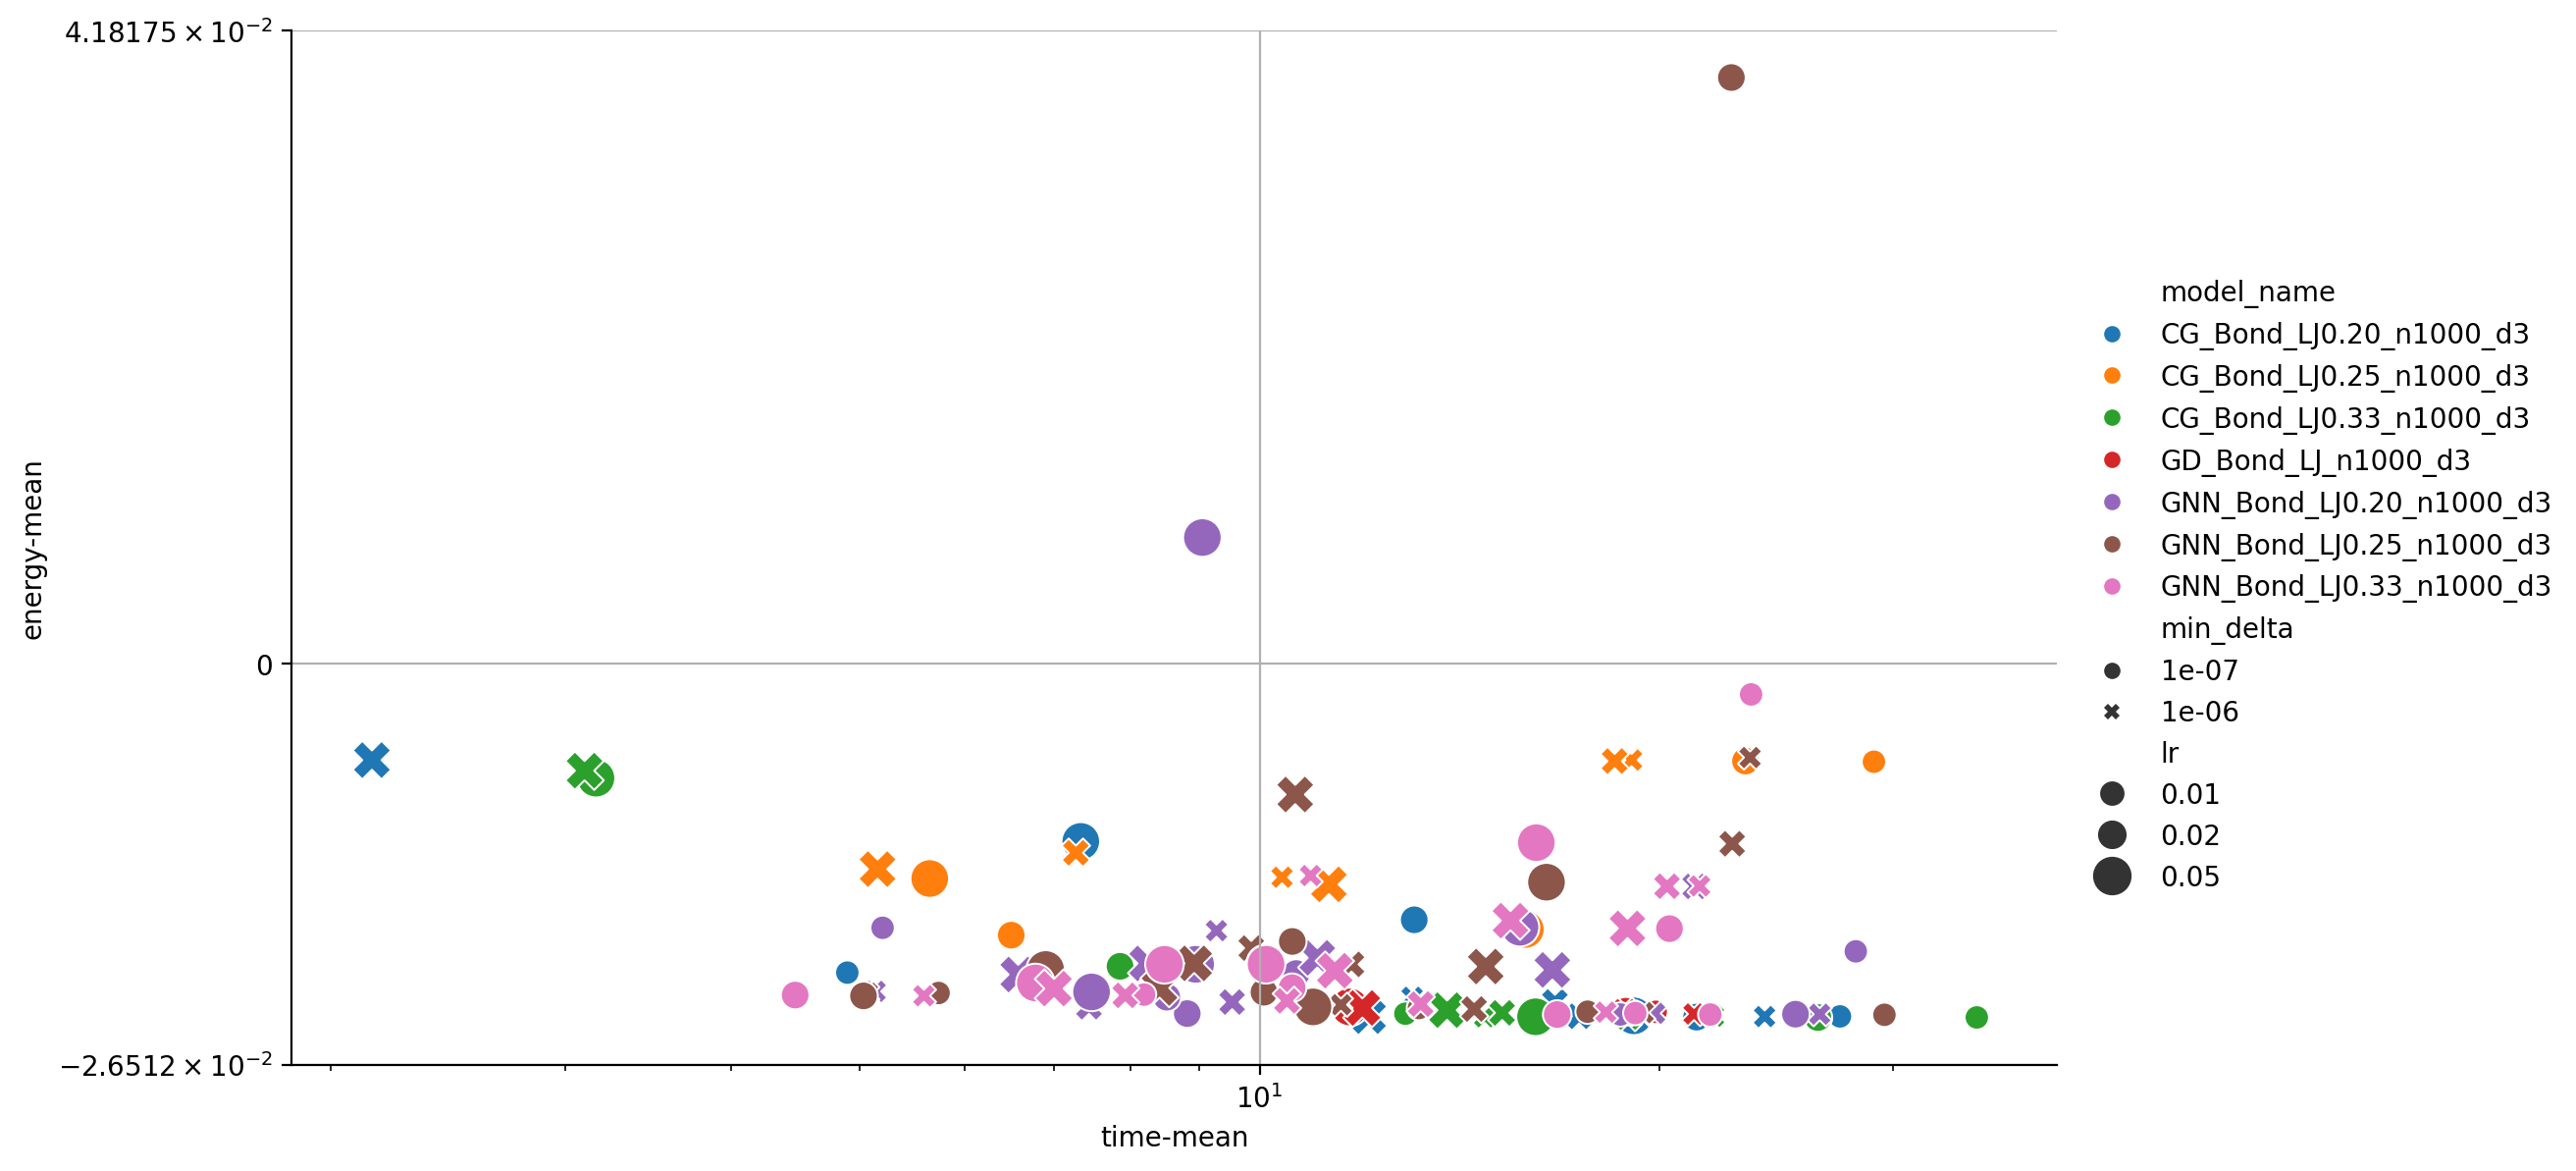

In [93]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

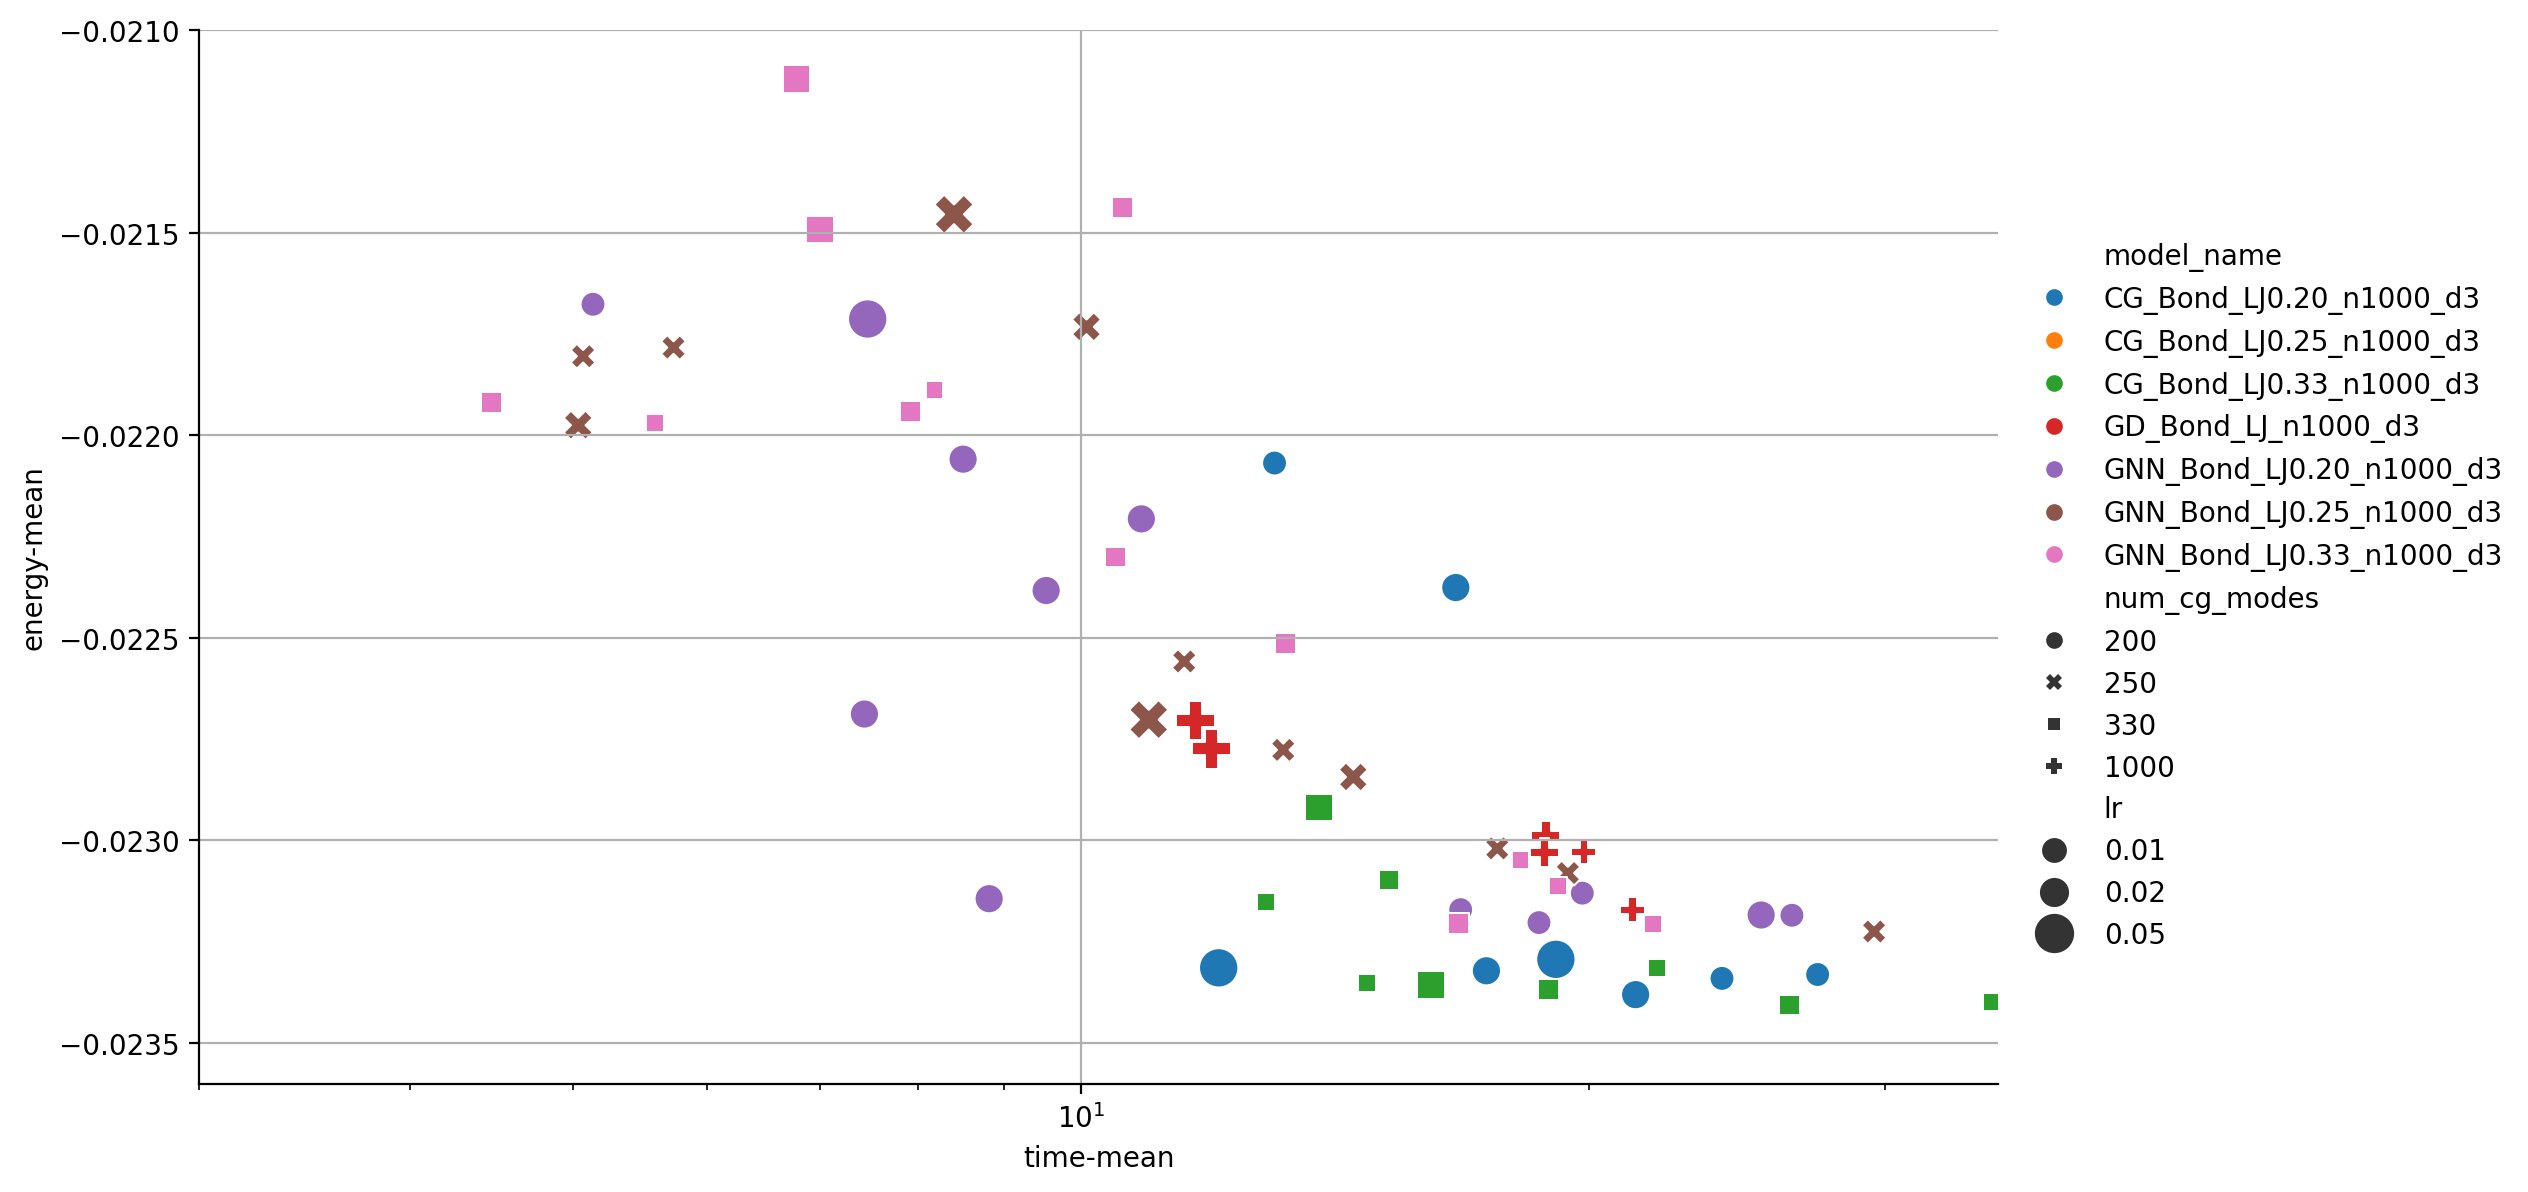

In [94]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='num_cg_modes', size='lr',
            kind='scatter', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.0236, -.0210)
plt.xlim(3,35)
plt.xscale('log')
# plt.yscale('symlog')
plt.grid()

In [95]:
# make another df where we take the model_name column and strip everything from "_LJ" to the end of the string and replace _ with a space
df_cleaned = df_filtered.copy()
# remove everything after _LJ in model_name. Ex: 'CG_LJ0.33_n400_d3' -> 'CG' 
# this means, we first need to find where _LJ is in the string, then remove everything after that
df_cleaned['model_name'] = df_cleaned['model_name'].apply(lambda x: x[:x.find('Bond_LJ')].replace('_', ' ') or "Adam")

In [96]:
df_cleaned

index model_name    lr     min_delta  num_cg_modes  lr_cg  hidden_dims  \
0        0        CG   0.01  1.000000e-07           200  0.010          NaN   
1        1        CG   0.01  1.000000e-07           200  0.100          NaN   
2        2        CG   0.01  1.000000e-06           200  0.010          NaN   
3        3        CG   0.01  1.000000e-06           200  0.100          NaN   
4        4        CG   0.02  1.000000e-07           200  0.020          NaN   
..     ...        ...   ...           ...           ...    ...          ...   
109    109       GNN   0.05  1.000000e-07           330  0.050    [8, 4, 3]   
110    110       GNN   0.05  1.000000e-06           330  0.005  [32, 16, 3]   
111    111       GNN   0.05  1.000000e-06           330  0.005    [8, 4, 3]   
112    112       GNN   0.05  1.000000e-06           330  0.050  [32, 16, 3]   
113    113       GNN   0.05  1.000000e-06           330  0.050    [8, 4, 3]   

     energy-mean  energy-std  time-mean  time-std  energy_mean  energy_std  \
0      -0.023331    0.000009  27.347316  0.899499    -0.023331    0.000009   
1      -0.020438    0.000127   4.894100  0.266955    -0.020438    0.000127   
2      -0.023340    0.000021  23.999430  1.576891    -0.023340    0.000021   
3      -0.022069    0.000286  13.026612  5.212957    -0.022069    0.000286   
4      -0.023381    0.000032  21.329217  0.115937    -0.023381    0.000032   
..           ...         ...        ...       ...          ...         ...   
109    -0.019883    0.005608  10.113477  2.726604    -0.019883    0.005608   
110    -0.021492    0.001285   7.002495  1.188437    -0.021492    0.001285   
111    -0.017514    0.004911  18.922266  1.702477    -0.017514    0.004911   
112    -0.020306    0.004892  11.393775  2.083077    -0.020306    0.004892   
113    -0.017002    0.005278  15.448142  6.354655    -0.017002    0.005278   

     time_mean  time_std  
0    27.347316  0.899499  
1     4.894100  0.266955  
2    23.999430  1.576891  
3    13.026612  5.212957  
4    21.329217  0.115937  
..         ...       ...  
109  10.113477  2.726604  
110   7.002495  1.188437  
111  18.922266  1.702477  
112  11.393775  2.083077  
113  15.448142  6.354655  

[114 rows x 15 columns]

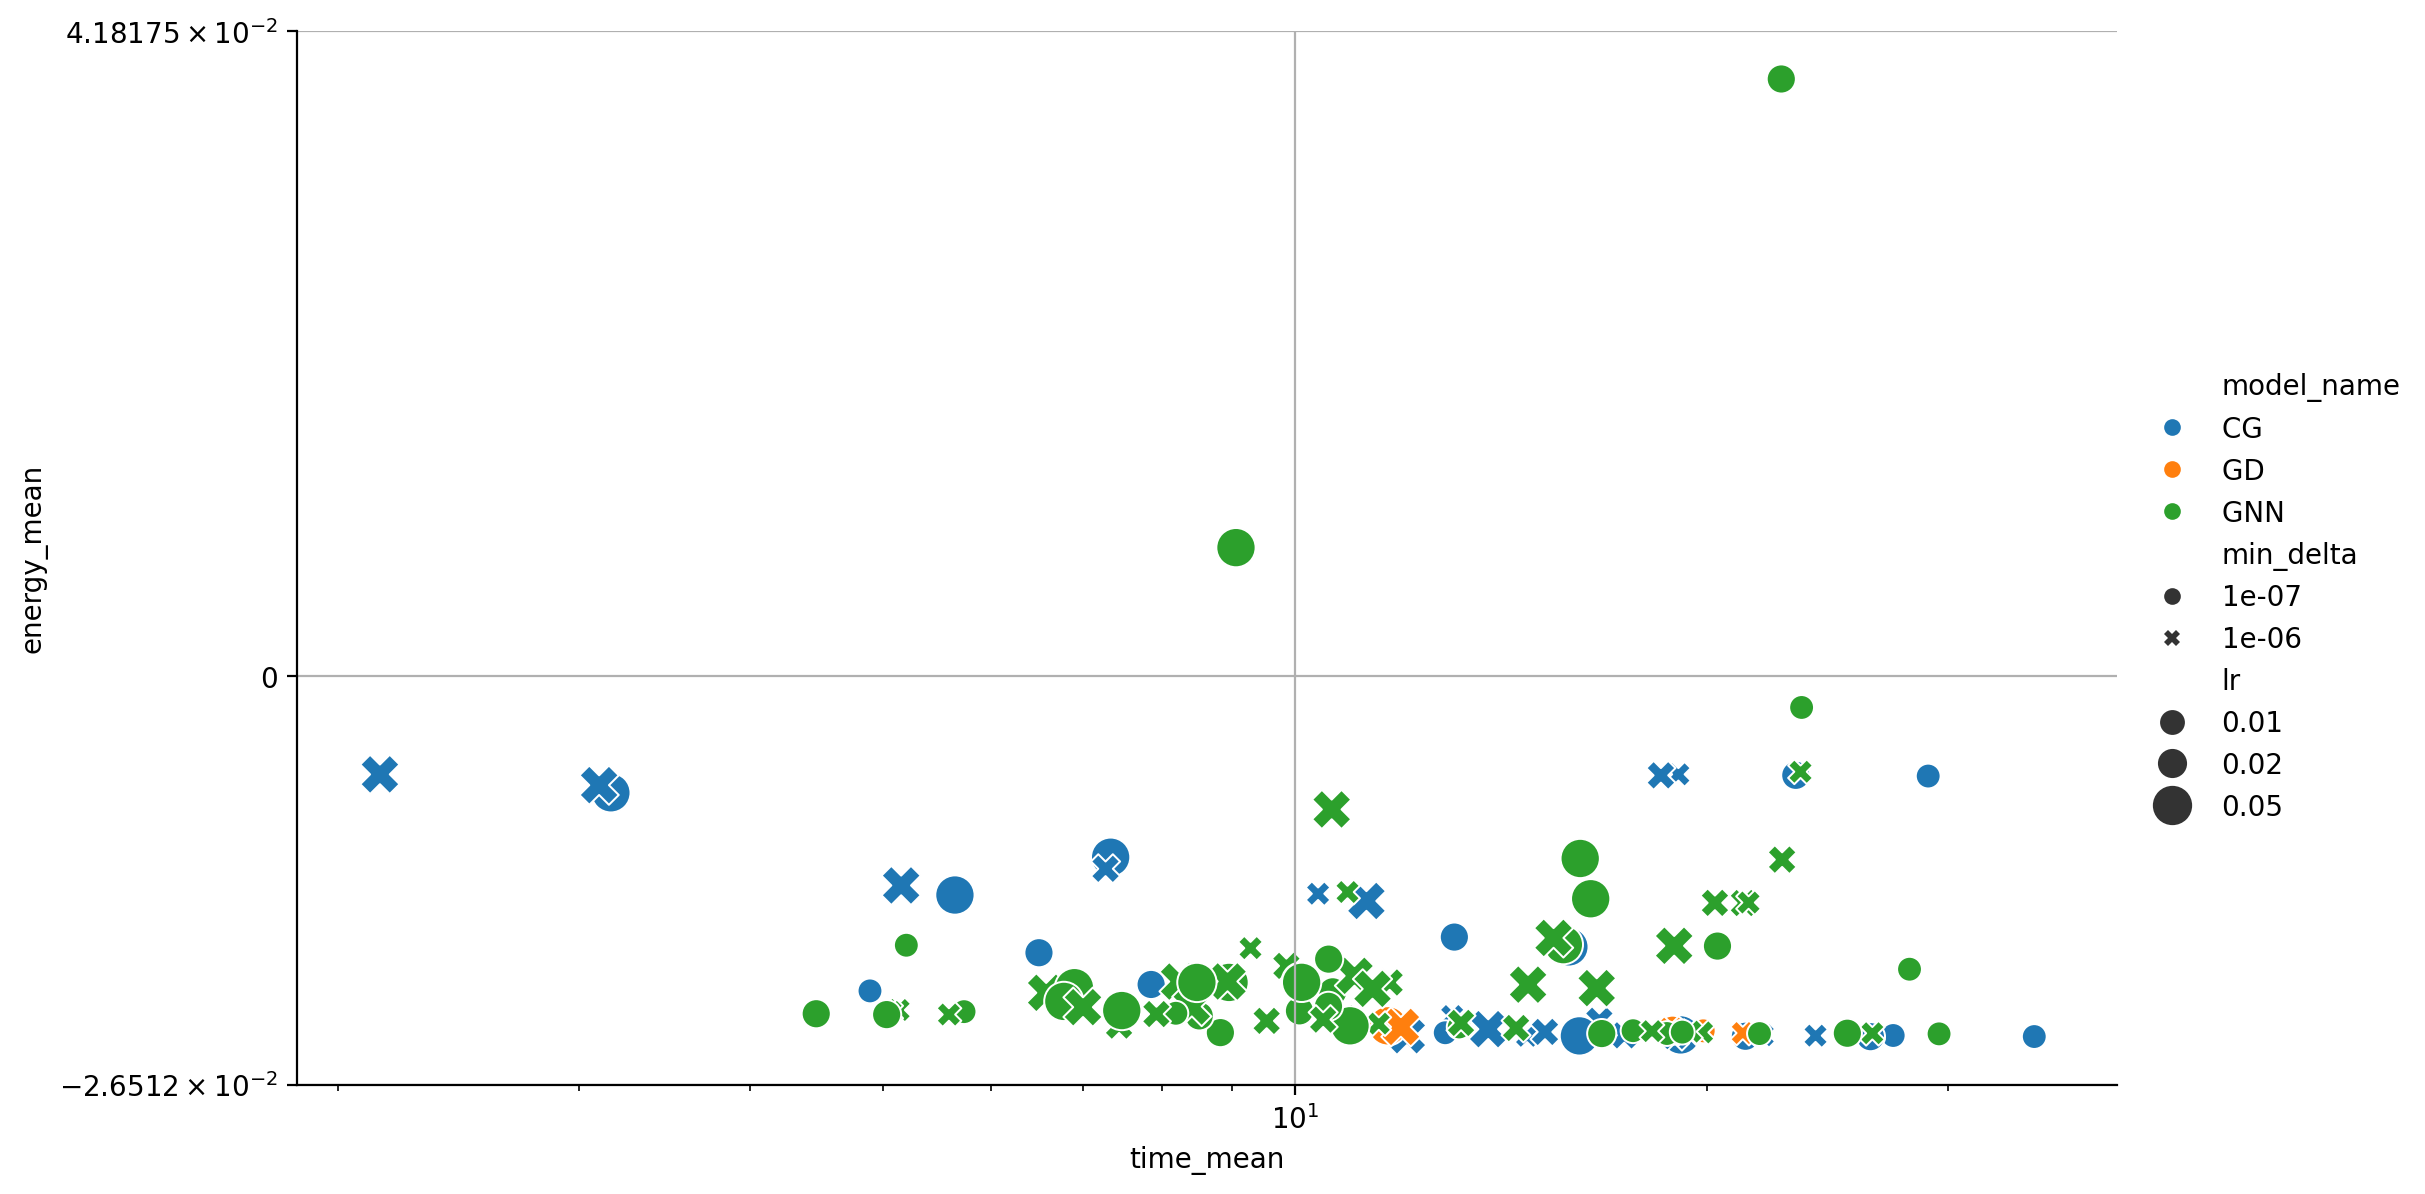

In [97]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', hue='model_name', style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

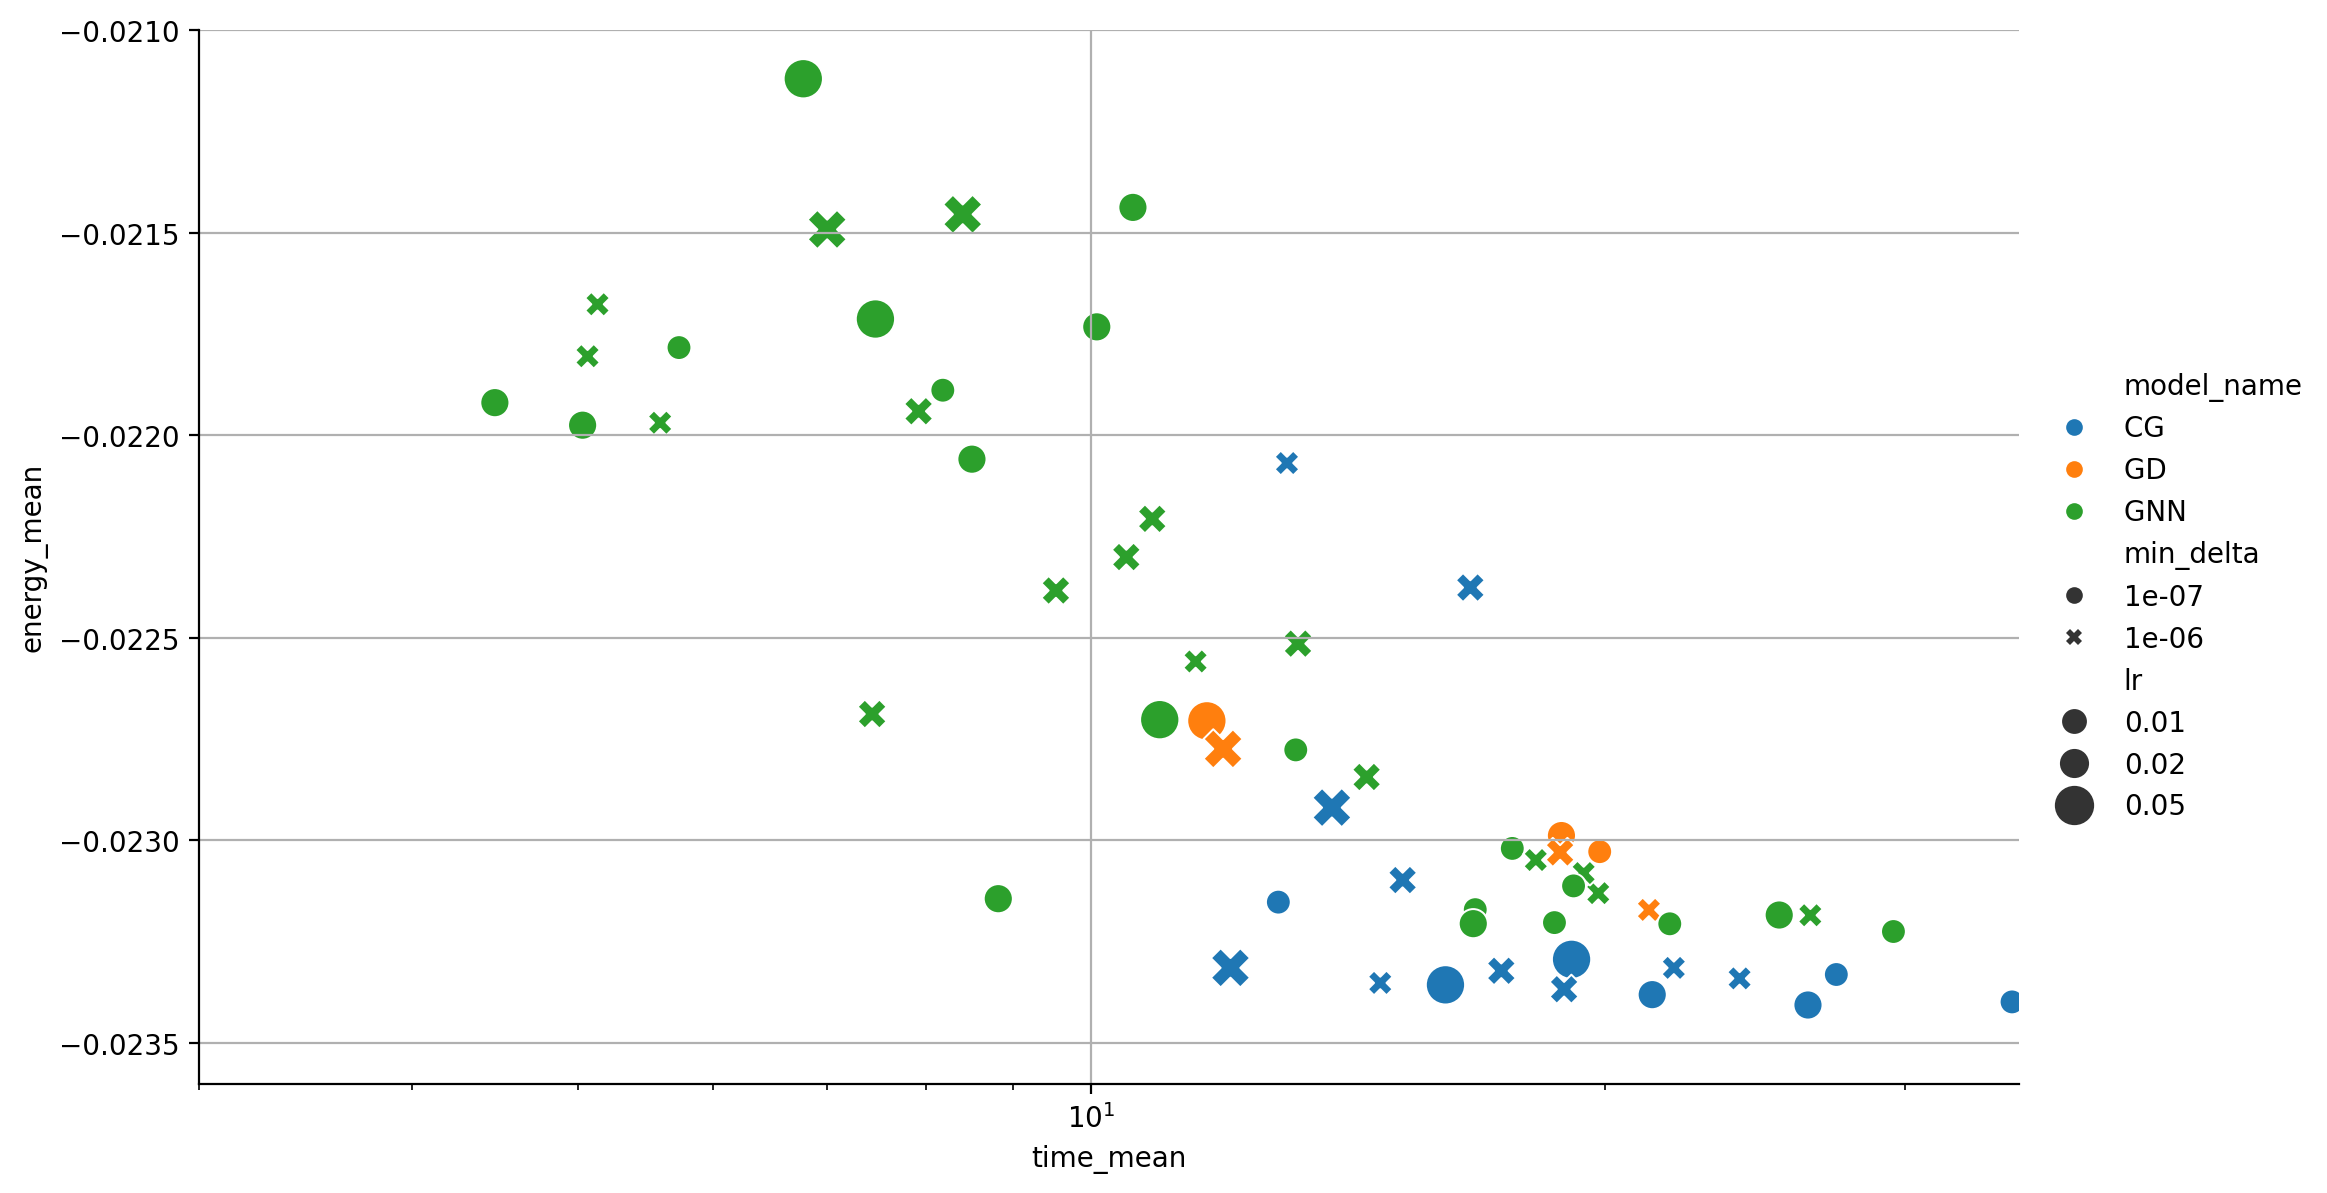

In [98]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.0236, -.0210)
plt.xlim(3,35)
plt.xscale('log')
# plt.yscale('symlog')
plt.grid()

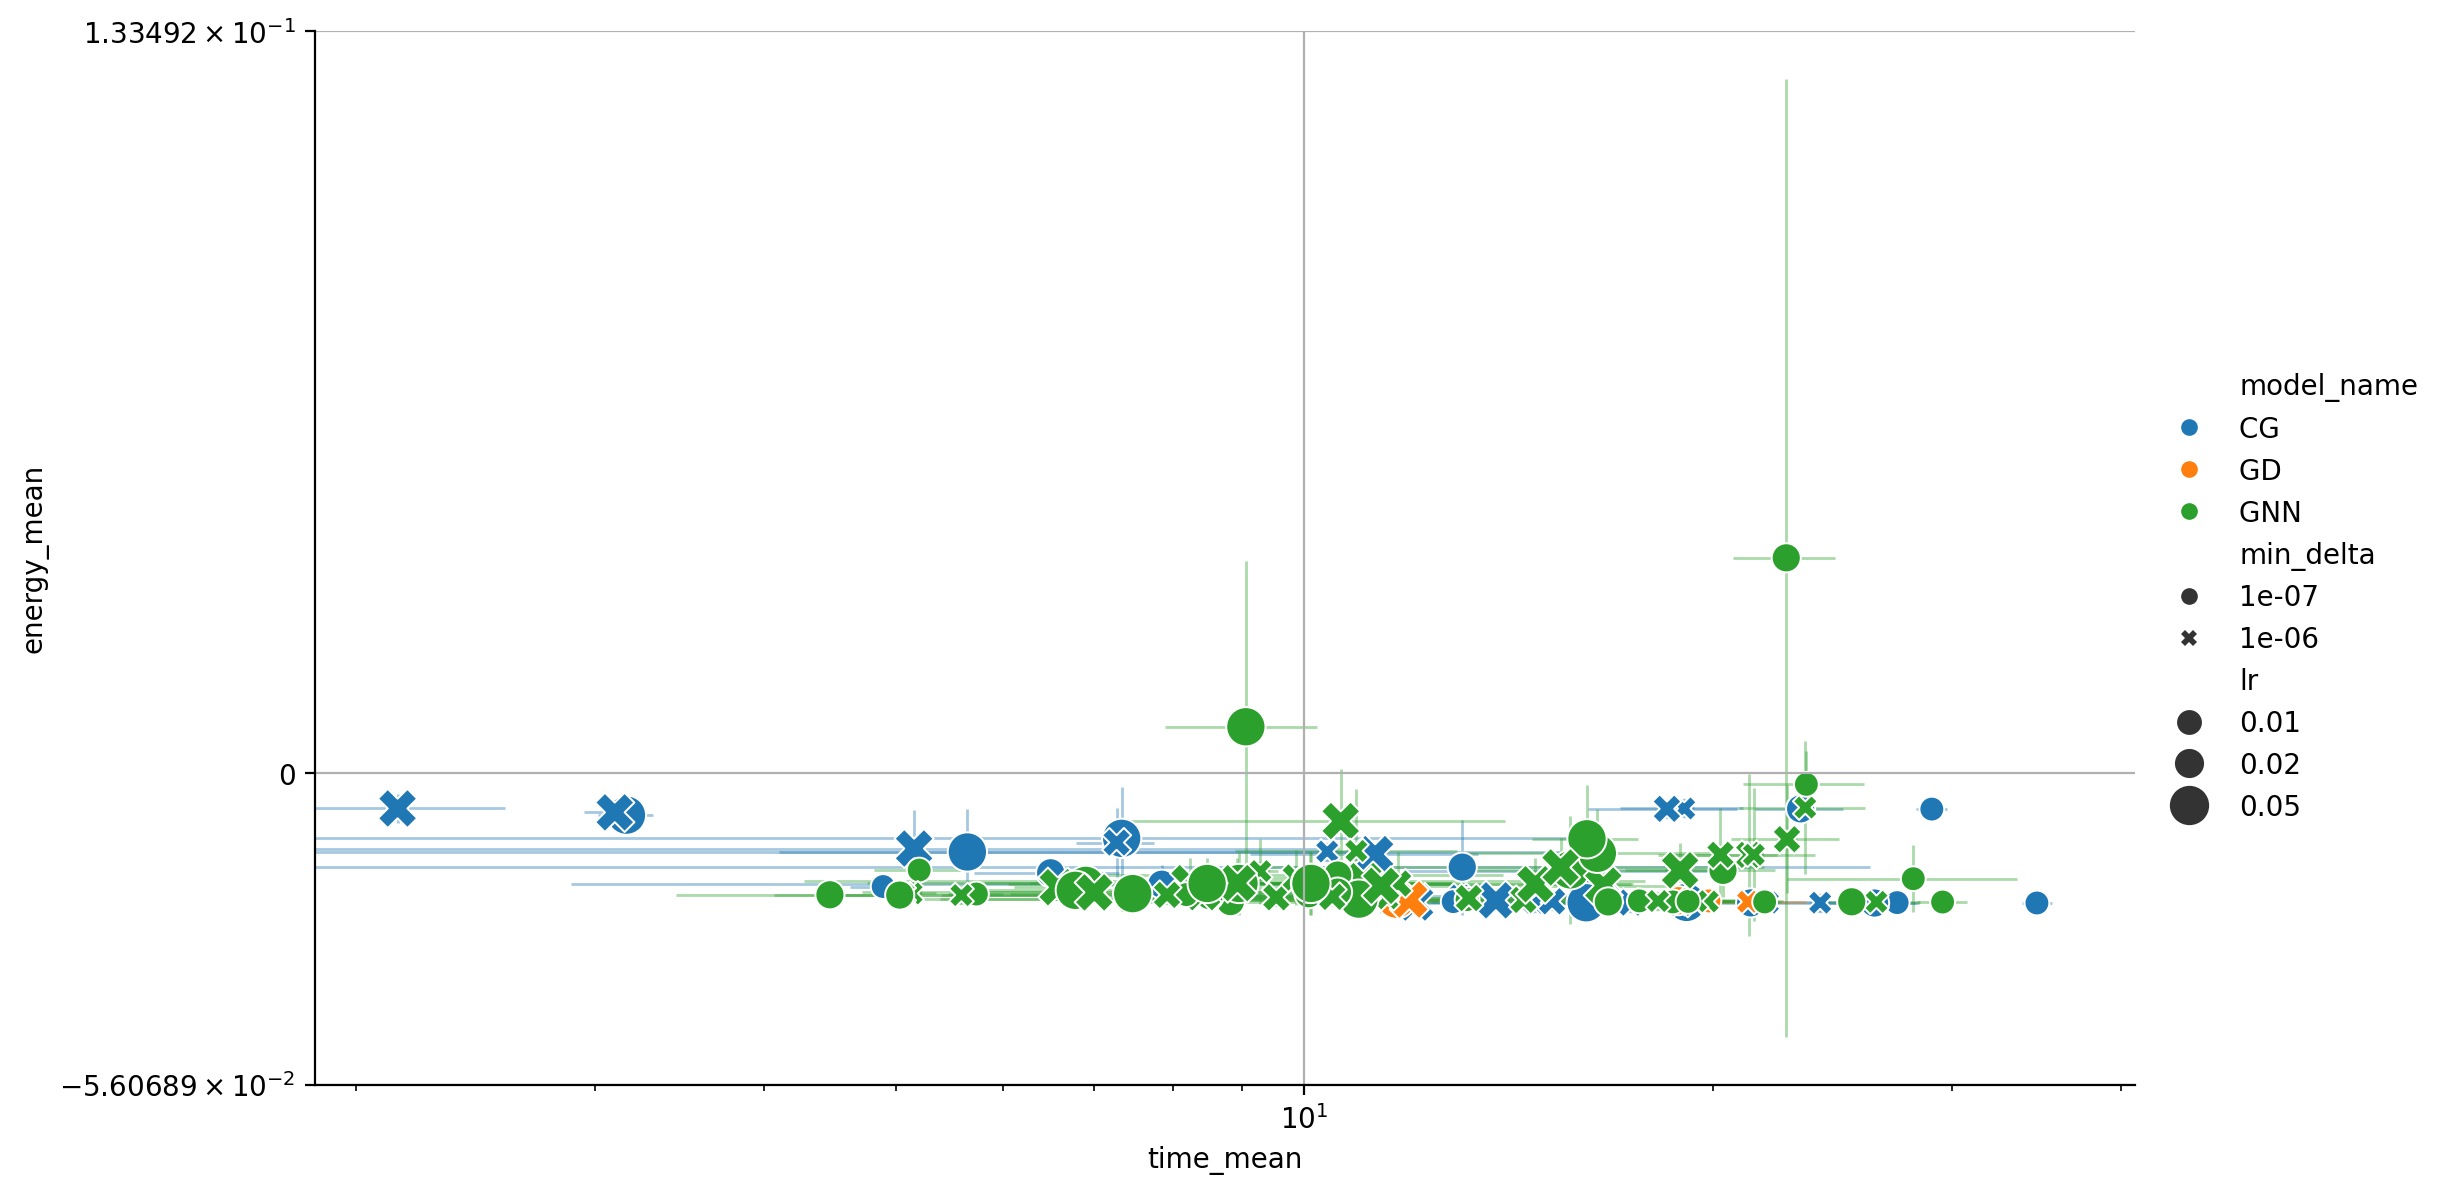

In [99]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))

# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.12, .10)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

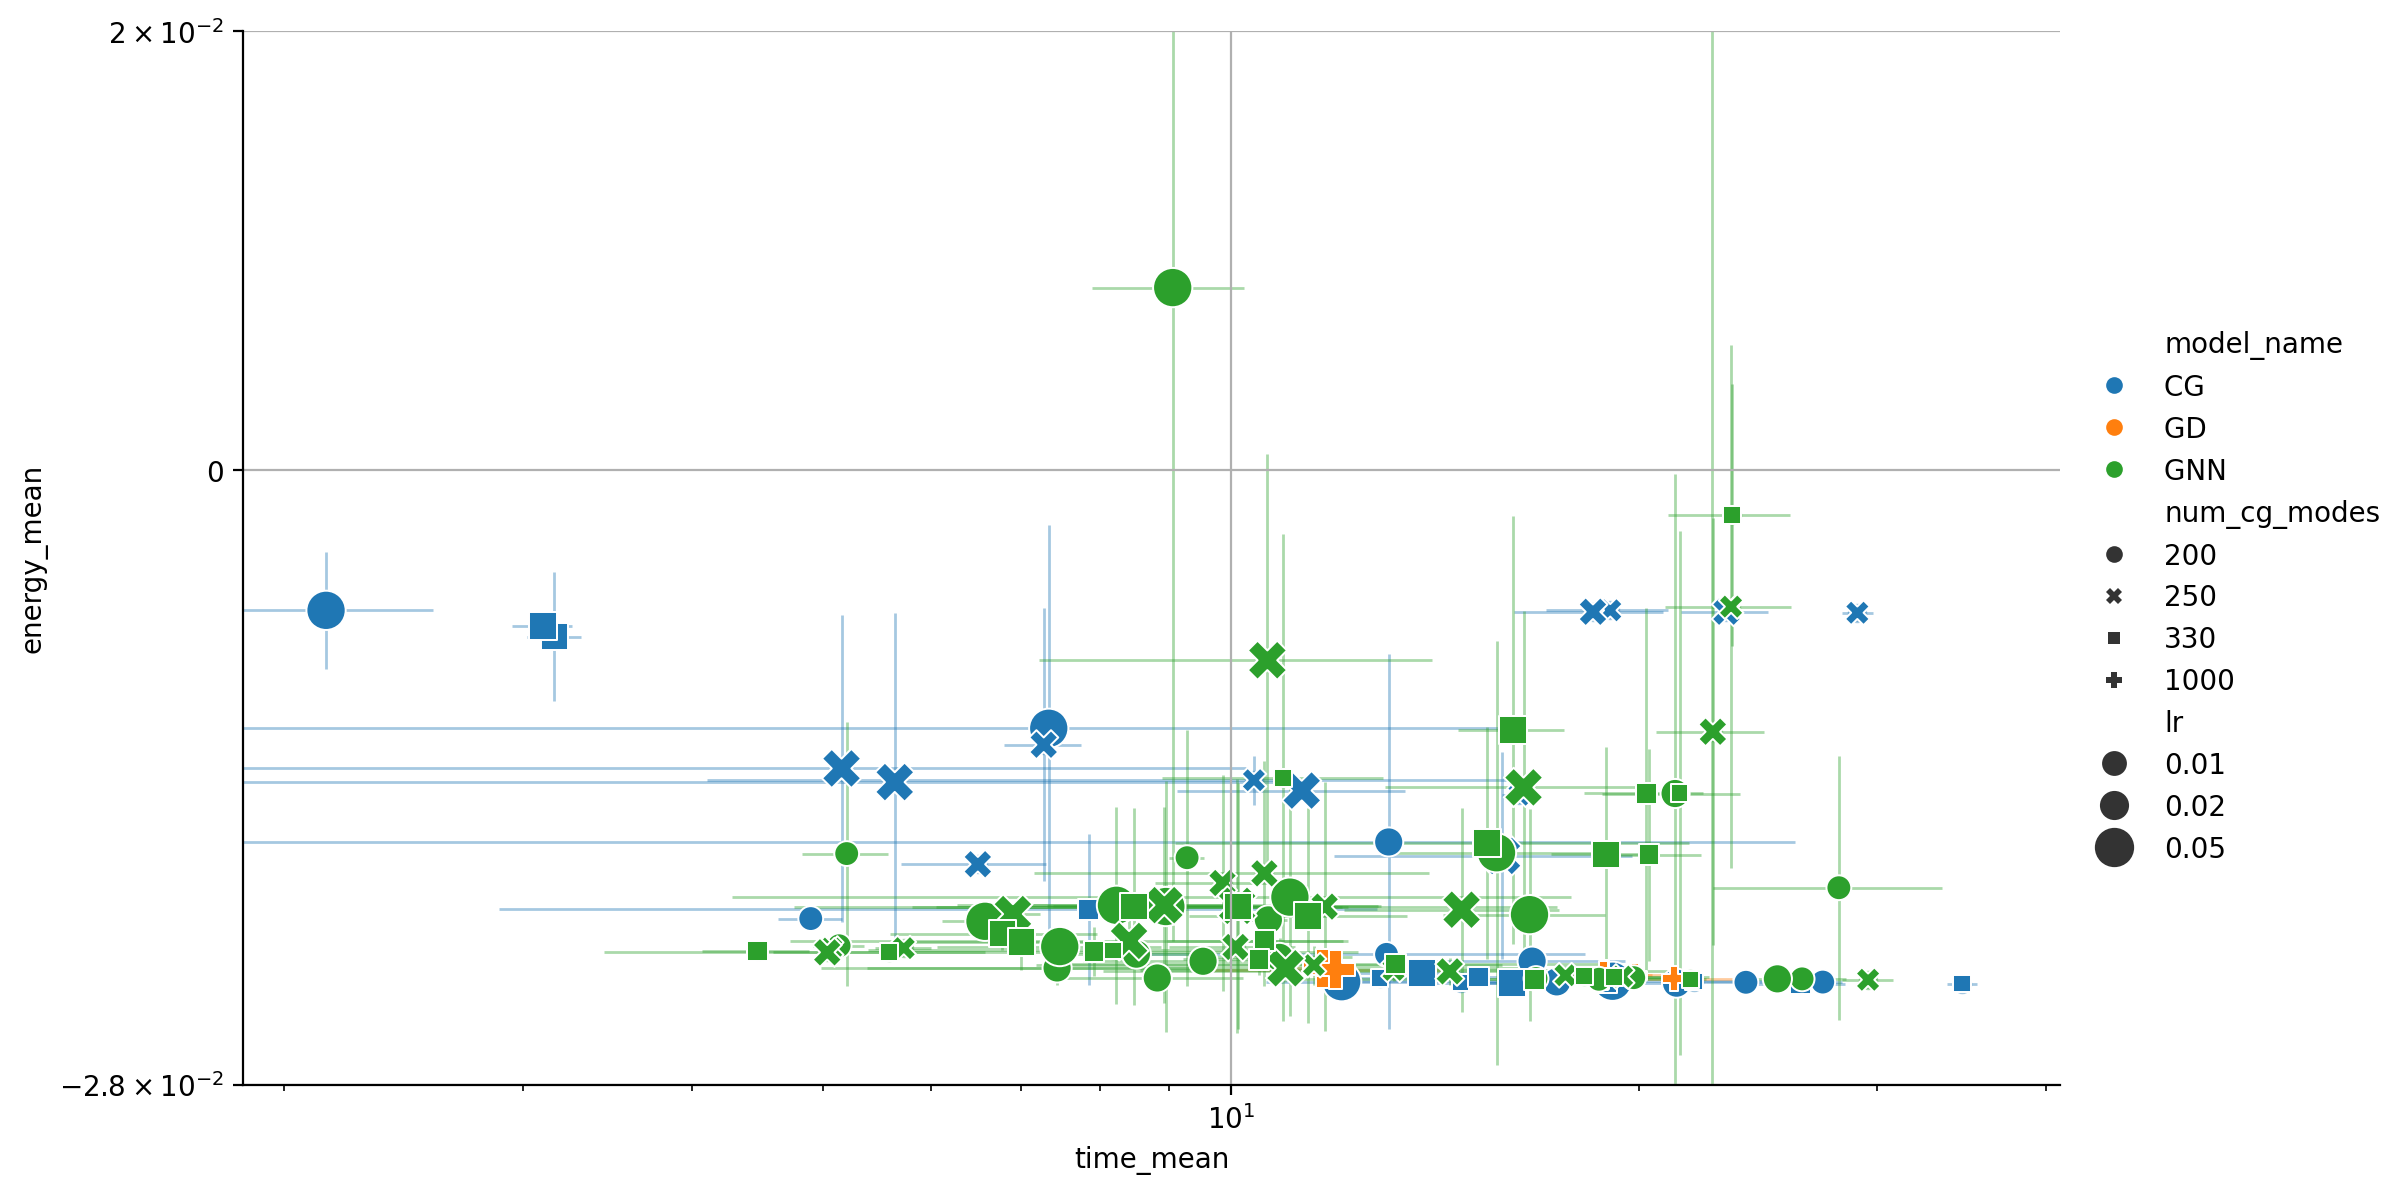

In [100]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))

# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

plt.ylim(-.028, .02)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

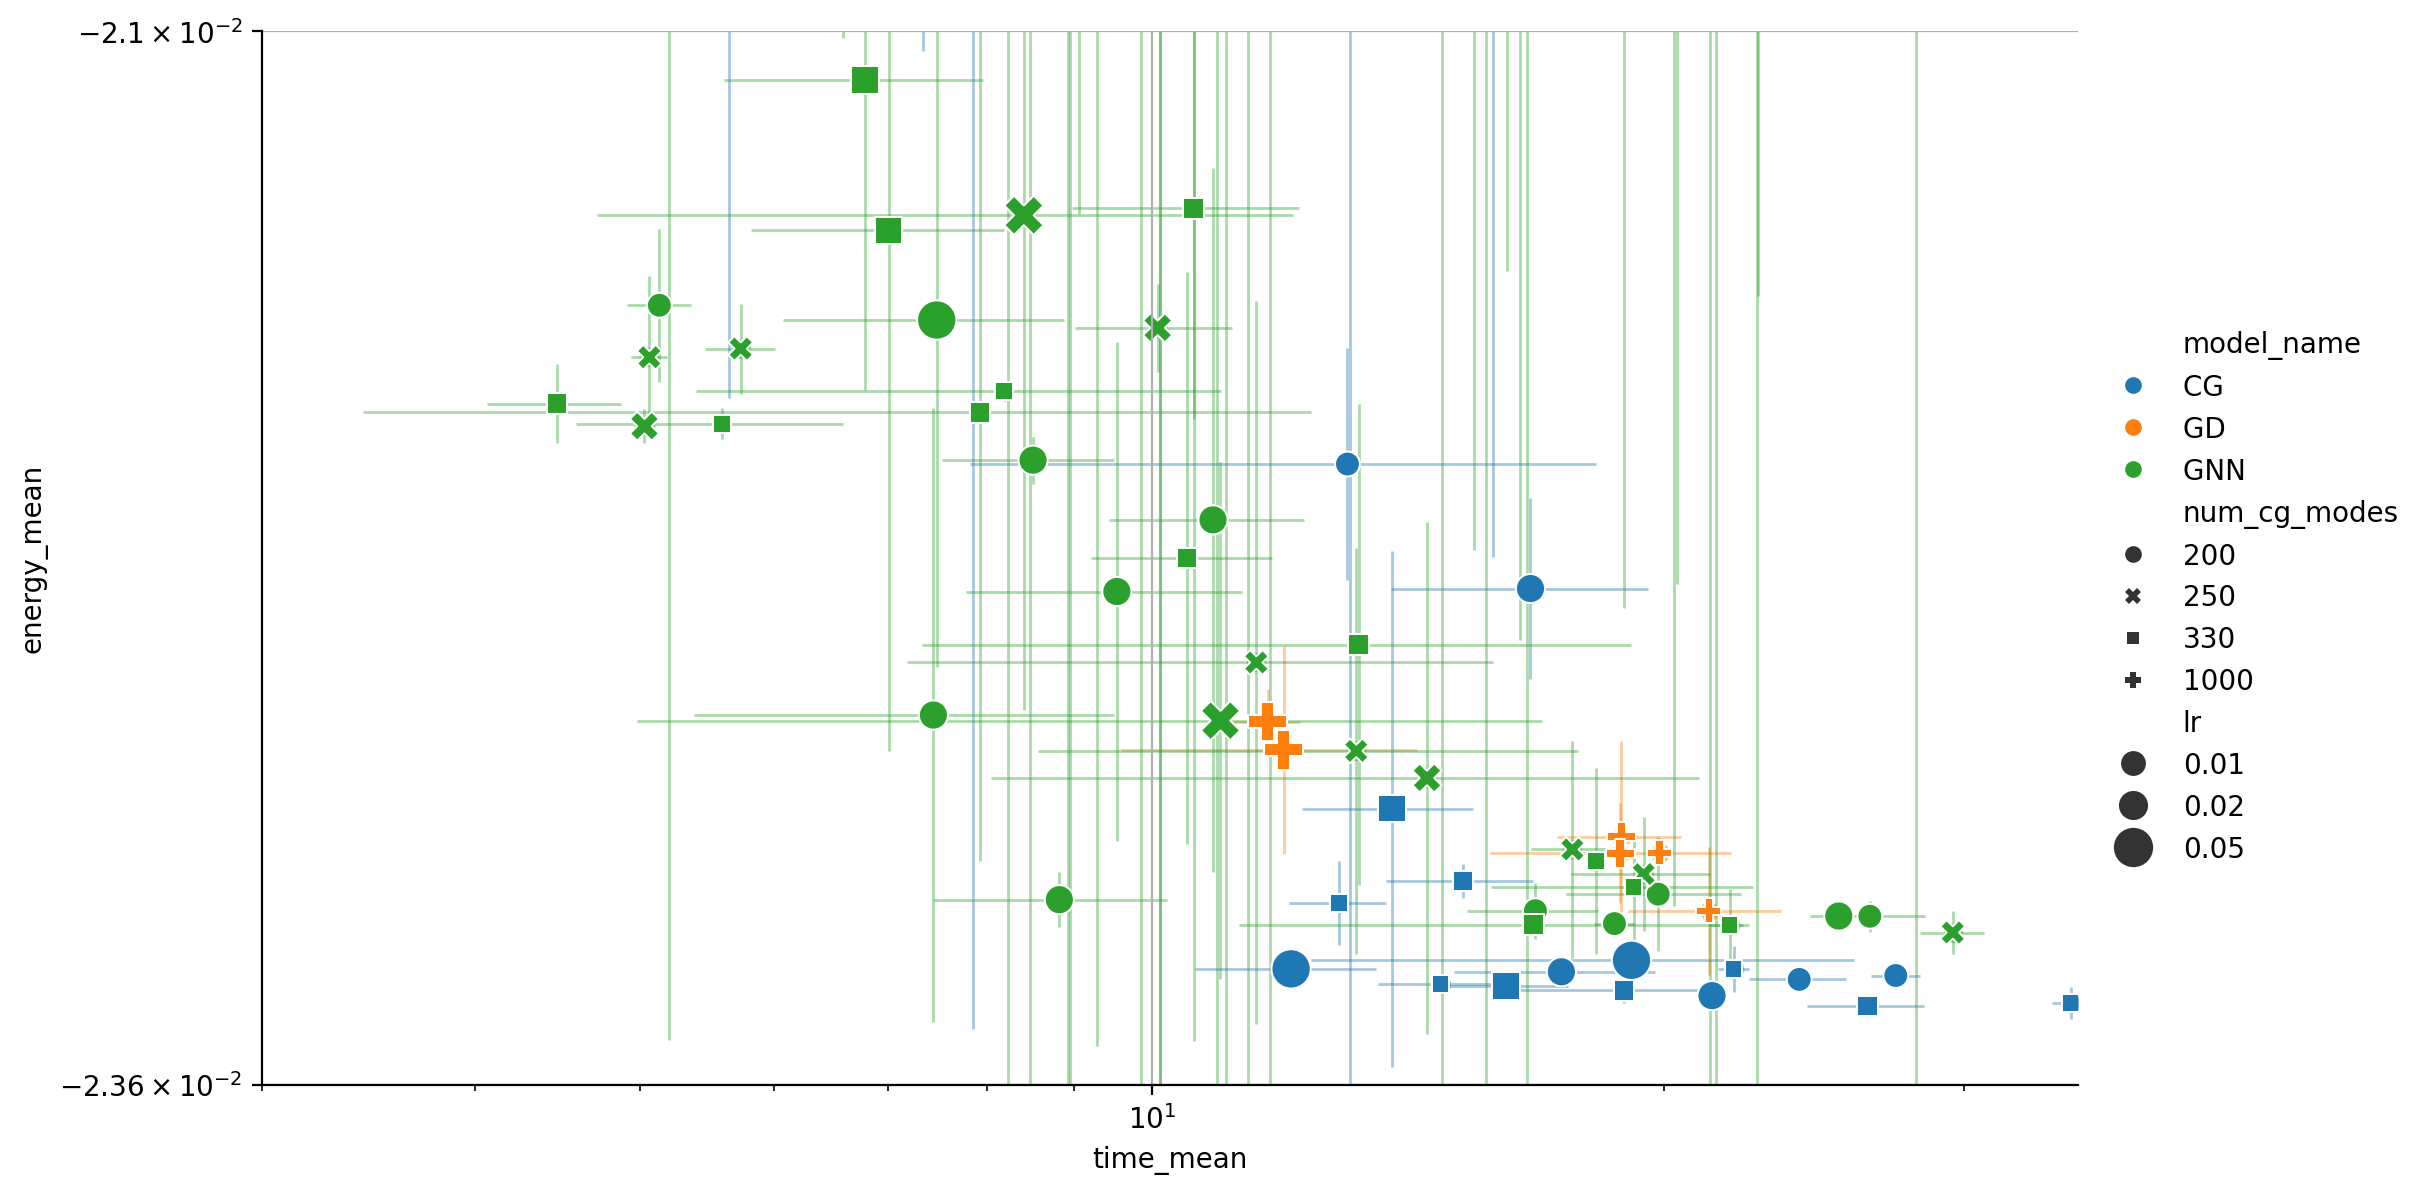

In [101]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)


plt.ylim(-.0236, -.0210)
plt.xlim(3,35)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

# Quadratic Bonds + LJ loop
Define an energy function which uses a quadratic potential for bonds and LJ for forming a loop. 
It consists of:
1. a strong backbone line graph with quadratic bonds, where every node is attracted to the next
2. a weaker loop LJ, where every l-th pair of nodes are attracted 

In [140]:
exp_logger = ExperimentLogger(previous_results_csv='./results/CG_Bond_LJ_experiments_2024-02-10-17.csv')
# exp_logger = ExperimentLogger(save_prefix='../results/CG_Bond_LJ_experiment') 
df = exp_logger.to_dataframe()
df

energy_function               model_name    energy       time    lr  \
0    Energy_Bond_LJ       GD_Bond_LJ_n400_d3 -0.022754   8.543608  0.05   
1    Energy_Bond_LJ   CG_Bond_LJ0.33_n400_d3 -0.023195  11.070001  0.05   
2    Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.023063  14.817611  0.05   
3    Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.023160  12.972471  0.05   
4    Energy_Bond_LJ   CG_Bond_LJ0.25_n400_d3 -0.022552  11.890551  0.05   
..              ...                      ...       ...        ...   ...   
218  Energy_Bond_LJ  GNN_Bond_LJ0.20_n400_d3 -0.023180  18.245872  0.01   
219  Energy_Bond_LJ   CG_Bond_LJ0.33_n400_d3 -0.023054  12.030343  0.01   
220  Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.021670   8.803119  0.01   
221  Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.021730   5.332700  0.01   
222  Energy_Bond_LJ   CG_Bond_LJ0.25_n400_d3 -0.023287  17.136928  0.01   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  1.836791        400    NaN   
1            0.1        20  1.000000e-06  1.836791        400  0.050   
2            0.1        20  1.000000e-06  1.836791        400  0.005   
3            0.1        20  1.000000e-06  1.836791        400  0.005   
4            0.1        20  1.000000e-06  1.836791        400  0.050   
..           ...       ...           ...       ...        ...    ...   
218          0.1        20  1.000000e-07  1.836791        400  0.001   
219          0.1        20  1.000000e-07  1.836791        400  0.100   
220          0.1        20  1.000000e-07  1.836791        400  0.010   
221          0.1        20  1.000000e-07  1.836791        400  0.010   
222          0.1        20  1.000000e-07  1.836791        400  0.100   

     cg_patience  cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  \
0            NaN           NaN       NaN        NaN        NaN           NaN   
1           20.0      0.000010     405.0   8.181297  -0.022475           NaN   
2           20.0      0.000010     466.0  11.557696  -0.022810         133.0   
3           20.0      0.000010     269.0   6.974455  -0.022601         133.0   
4           20.0      0.000010     422.0   8.777099  -0.020056           NaN   
..           ...           ...       ...        ...        ...           ...   
218         20.0      0.000001     619.0  15.152352  -0.023123          80.0   
219         20.0      0.000001     158.0   3.501764  -0.016735           NaN   
220         20.0      0.000001     349.0   8.448489  -0.017432         133.0   
221         20.0      0.000001     189.0   4.980847  -0.017956         133.0   
222         20.0      0.000001     264.0   5.757189  -0.018749           NaN   

     hidden_dims  
0            NaN  
1            NaN  
2      [8, 4, 3]  
3    [32, 16, 3]  
4            NaN  
..           ...  
218  [32, 16, 3]  
219          NaN  
220    [8, 4, 3]  
221  [32, 16, 3]  
222          NaN  

[223 rows x 18 columns]

In [141]:
# seems like the num_cg_modes are not logged correctly for "CG_..." models, and base models do not use cg modes
# fortunately, the CG models mention the ratio of cg modes / num nodes in the model name as CG_Bond_LJ[ratio]_n[nodes]_d3
# so we can extract the ratio from the model name, and use it to calculate the number of cg modes
# we can also calculate the number of nodes from the model name

# first, let's extract the ratio and number of nodes from the model name
df['cg_ratio'] = df['model_name'].apply(lambda x: float((x.split('_LJ')[1].split('_')[0] or '1.0')))
df['num_cg_modes'] = df['cg_ratio'] * df['num_nodes']
# ensure that the num_cg_modes is an integer
df['num_cg_modes'] = df['num_cg_modes'].astype(int)
df[:10]

energy_function               model_name    energy       time    lr  \
0  Energy_Bond_LJ       GD_Bond_LJ_n400_d3 -0.022754   8.543608  0.05   
1  Energy_Bond_LJ   CG_Bond_LJ0.33_n400_d3 -0.023195  11.070001  0.05   
2  Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.023063  14.817611  0.05   
3  Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.023160  12.972471  0.05   
4  Energy_Bond_LJ   CG_Bond_LJ0.25_n400_d3 -0.022552  11.890551  0.05   
5  Energy_Bond_LJ  GNN_Bond_LJ0.25_n400_d3 -0.023146  21.659890  0.05   
6  Energy_Bond_LJ  GNN_Bond_LJ0.25_n400_d3 -0.019123   7.026602  0.05   
7  Energy_Bond_LJ   CG_Bond_LJ0.20_n400_d3  0.019693  11.531193  0.05   
8  Energy_Bond_LJ  GNN_Bond_LJ0.20_n400_d3  0.019770  17.694227  0.05   
9  Energy_Bond_LJ  GNN_Bond_LJ0.20_n400_d3 -0.021371   5.907160  0.05   

   clamp_grads  patience  min_delta    x0_std  num_nodes  lr_cg  cg_patience  \
0          0.1        20   0.000001  1.836791        400    NaN          NaN   
1          0.1        20   0.000001  1.836791        400  0.050         20.0   
2          0.1        20   0.000001  1.836791        400  0.005         20.0   
3          0.1        20   0.000001  1.836791        400  0.005         20.0   
4          0.1        20   0.000001  1.836791        400  0.050         20.0   
5          0.1        20   0.000001  1.836791        400  0.005         20.0   
6          0.1        20   0.000001  1.836791        400  0.005         20.0   
7          0.1        20   0.000001  1.836791        400  0.050         20.0   
8          0.1        20   0.000001  1.836791        400  0.005         20.0   
9          0.1        20   0.000001  1.836791        400  0.005         20.0   

   cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  hidden_dims  \
0           NaN       NaN        NaN        NaN         400.0          NaN   
1       0.00001     405.0   8.181297  -0.022475         132.0          NaN   
2       0.00001     466.0  11.557696  -0.022810         132.0    [8, 4, 3]   
3       0.00001     269.0   6.974455  -0.022601         132.0  [32, 16, 3]   
4       0.00001     422.0   8.777099  -0.020056         100.0          NaN   
5       0.00001     620.0  15.475063  -0.022653         100.0    [8, 4, 3]   
6       0.00001     256.0   6.655472  -0.011929         100.0  [32, 16, 3]   
7       0.00001     429.0   8.934613   0.023910          80.0          NaN   
8       0.00001     616.0  14.709538   0.019986          80.0    [8, 4, 3]   
9       0.00001     220.0   5.556619  -0.015677          80.0  [32, 16, 3]   

   cg_ratio  
0      1.00  
1      0.33  
2      0.33  
3      0.33  
4      0.25  
5      0.25  
6      0.25  
7      0.20  
8      0.20  
9      0.20

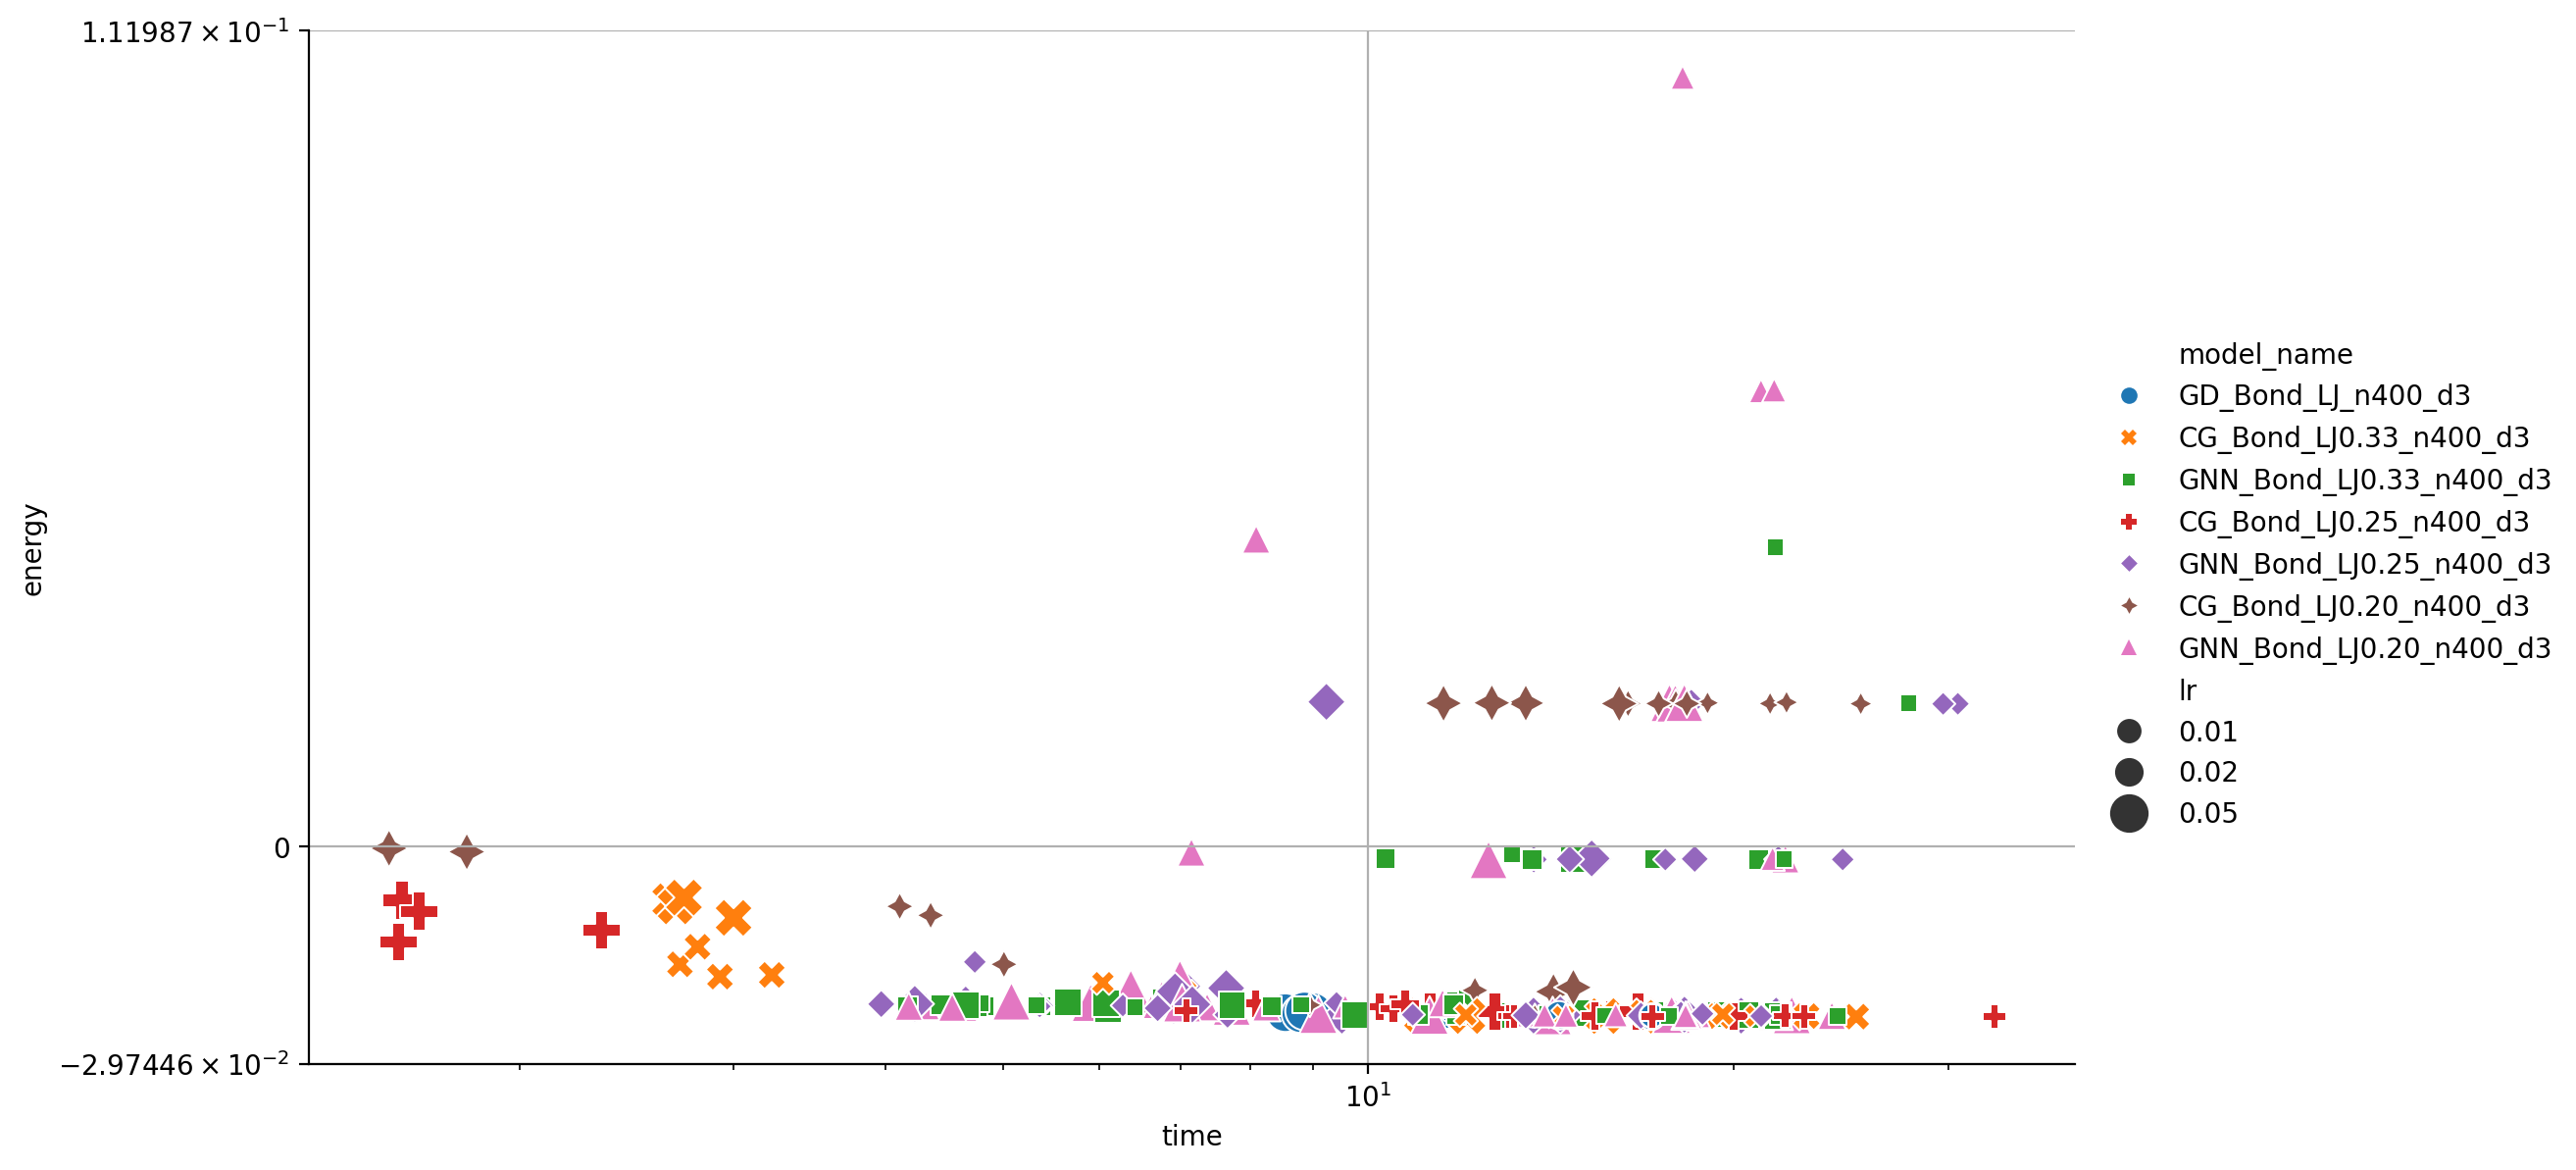

In [142]:
# df = exp_logger.to_dataframe()
# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.0234, -.0228)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

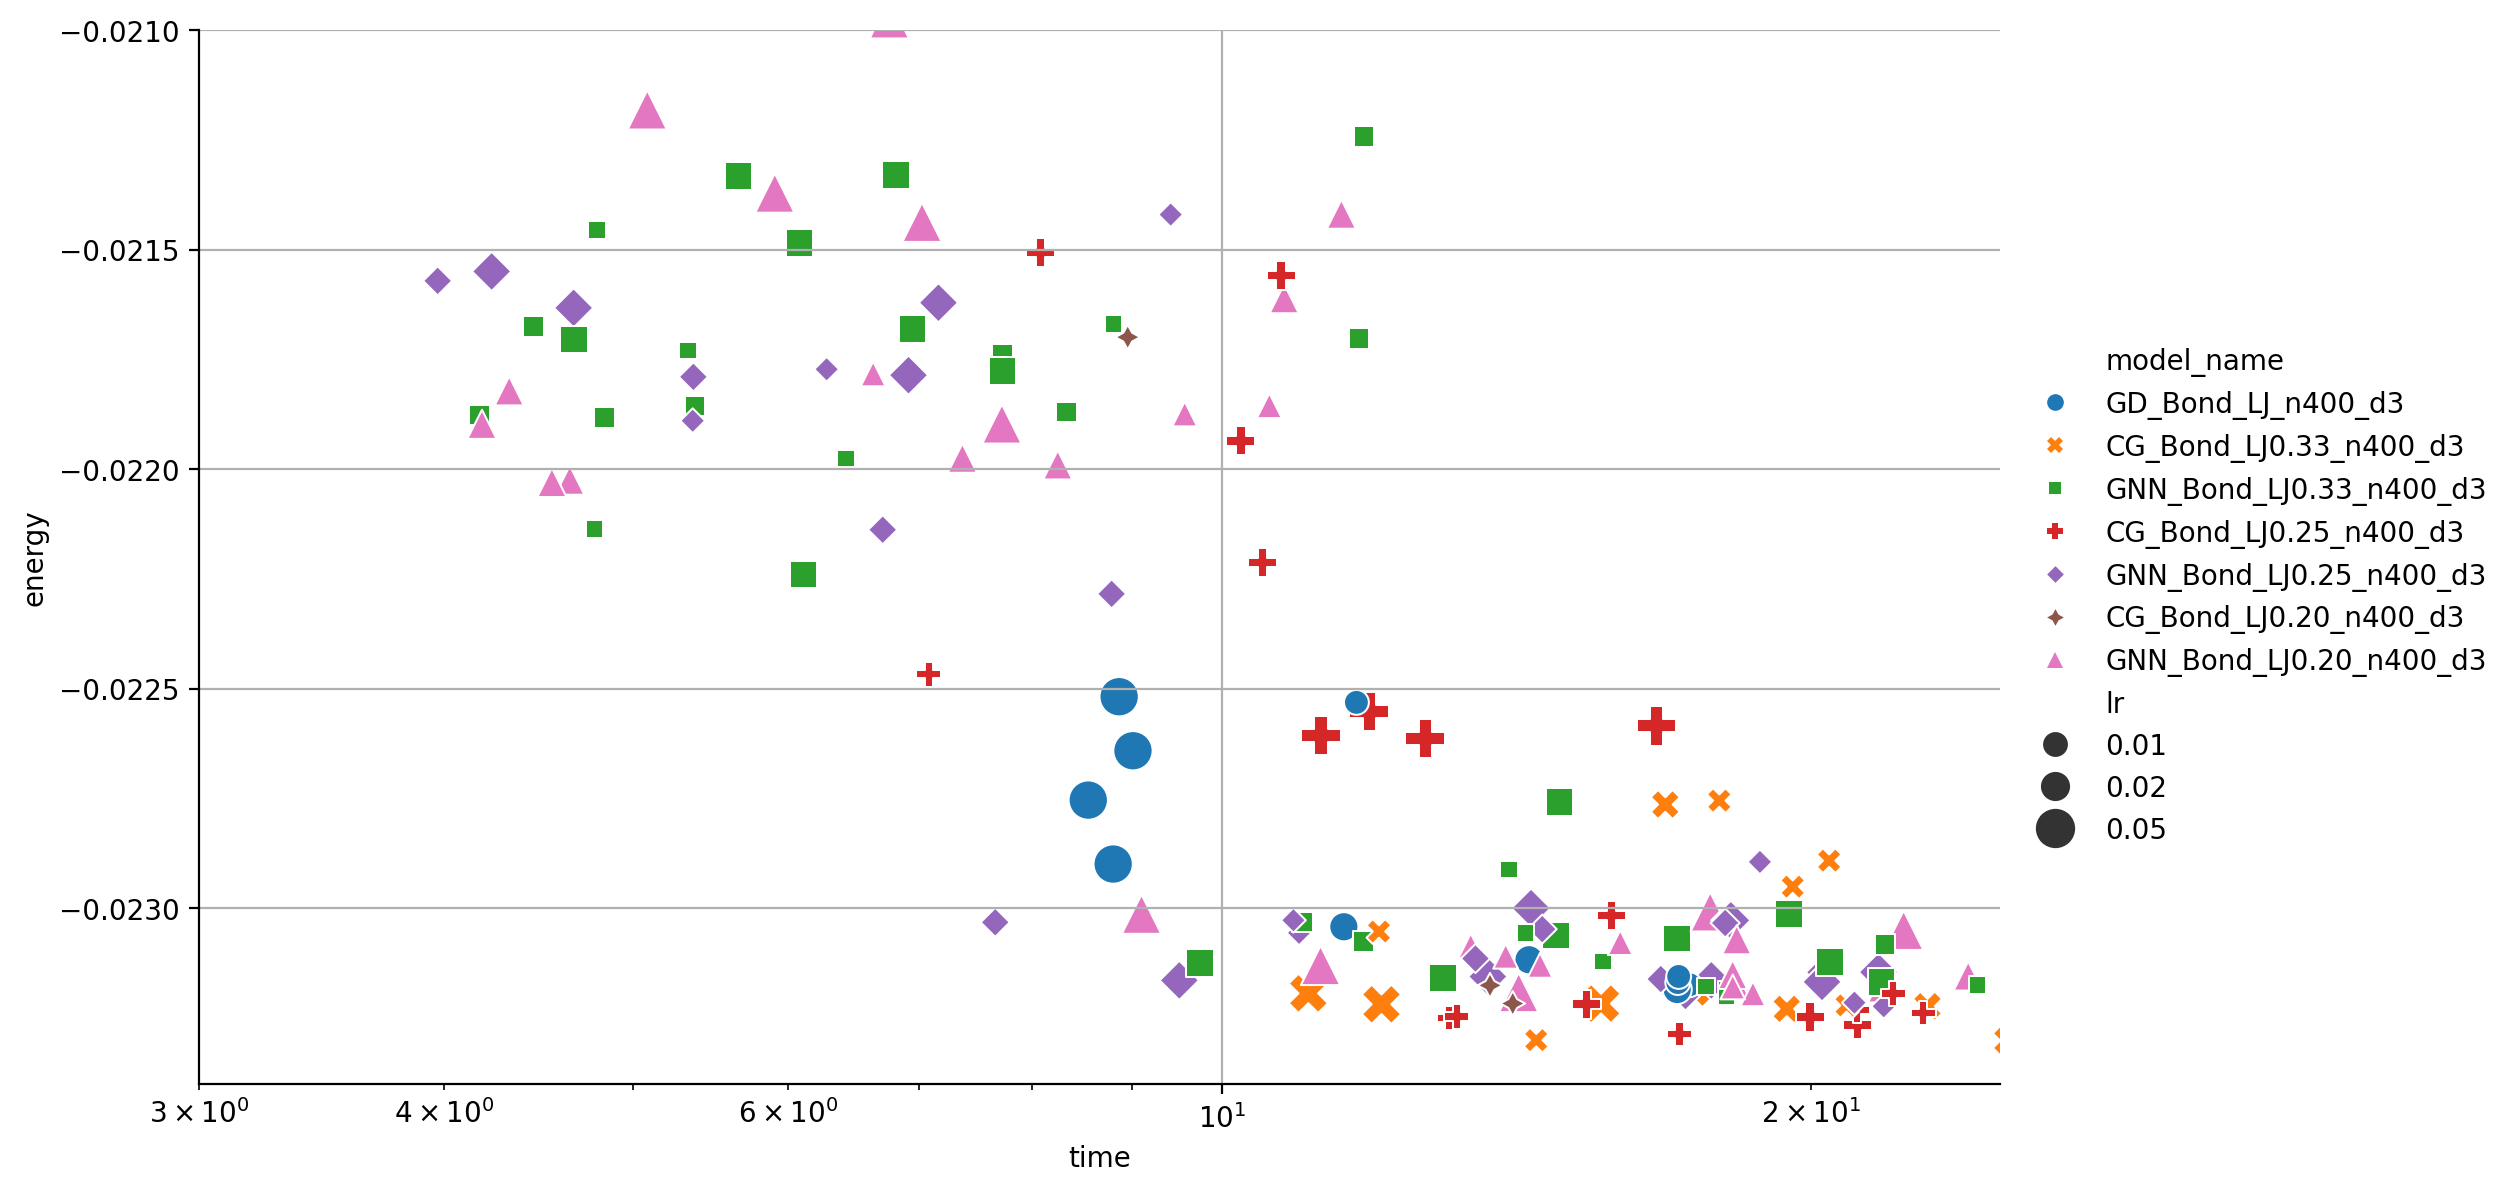

In [143]:
# df = exp_logger.to_dataframe()
# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.0234, -.0210)
plt.xlim(3,25)
plt.xscale('log')
plt.grid()

## Grouping similar runs

In [144]:
# We replace the NaN with 0 before applying groupby to avoid losing rows
df_copy = df.copy()
df_copy.fillna('na', inplace=True)
# we will group by the model_name, lr, and min_delta
df_grouped = df_copy.groupby(['model_name', 'lr', 'min_delta', 'num_cg_modes', 'lr_cg', 'hidden_dims'])
# other options: cg_patience,cg_min_delta
# we can now calculate the mean and std of the energy for each group
# only take the mean of the energy and time column (the other columns are not relevant and may contain non-numeric values)
df_mean = df_grouped.agg({'energy': ['mean', 'std'], 'time': ['mean','std']})
df_mean.reset_index(inplace=True)

# now we will revert the 'na' values to NaN
df_mean.replace('na', np.nan, inplace=True)
df_mean

/tmp/ipykernel_1651258/3992581159.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.fillna('na', inplace=True)
/tmp/ipykernel_1651258/3992581159.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mean.replace('na', np.nan, inplace=True)


model_name    lr     min_delta num_cg_modes  lr_cg  \
                                                                       
0     CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-07         80.0  0.010   
1     CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-07         80.0  0.100   
2     CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-06         80.0  0.010   
3     CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-06         80.0  0.100   
4     CG_Bond_LJ0.20_n400_d3  0.02  1.000000e-07         80.0  0.020   
..                       ...   ...           ...          ...    ...   
109  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-07        132.0  0.050   
110  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.005   
111  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.005   
112  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.050   
113  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.050   

     hidden_dims    energy                 time            
                      mean       std       mean       std  
0            NaN  0.019737  0.000118  21.753684  0.479054  
1            NaN -0.023218       NaN  14.081982       NaN  
2            NaN  0.019688  0.000084  22.225205  4.532486  
3            NaN -0.022438  0.001044  11.329975  3.366210  
4            NaN  0.019649  0.000007  18.099378  0.267388  
..           ...       ...       ...        ...       ...  
109    [8, 4, 3] -0.023091  0.000109  20.618664  1.584142  
110  [32, 16, 3] -0.022245  0.001294   9.892986  4.355049  
111    [8, 4, 3] -0.023066  0.000005  15.950243  1.601783  
112  [32, 16, 3] -0.022229  0.001267   7.703062  2.890561  
113    [8, 4, 3] -0.011759  0.014166  11.234873  4.967021  

[114 rows x 10 columns]

In [145]:
df_copy

energy_function               model_name    energy       time    lr  \
0    Energy_Bond_LJ       GD_Bond_LJ_n400_d3 -0.022754   8.543608  0.05   
1    Energy_Bond_LJ   CG_Bond_LJ0.33_n400_d3 -0.023195  11.070001  0.05   
2    Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.023063  14.817611  0.05   
3    Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.023160  12.972471  0.05   
4    Energy_Bond_LJ   CG_Bond_LJ0.25_n400_d3 -0.022552  11.890551  0.05   
..              ...                      ...       ...        ...   ...   
218  Energy_Bond_LJ  GNN_Bond_LJ0.20_n400_d3 -0.023180  18.245872  0.01   
219  Energy_Bond_LJ   CG_Bond_LJ0.33_n400_d3 -0.023054  12.030343  0.01   
220  Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.021670   8.803119  0.01   
221  Energy_Bond_LJ  GNN_Bond_LJ0.33_n400_d3 -0.021730   5.332700  0.01   
222  Energy_Bond_LJ   CG_Bond_LJ0.25_n400_d3 -0.023287  17.136928  0.01   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  1.836791        400     na   
1            0.1        20  1.000000e-06  1.836791        400   0.05   
2            0.1        20  1.000000e-06  1.836791        400  0.005   
3            0.1        20  1.000000e-06  1.836791        400  0.005   
4            0.1        20  1.000000e-06  1.836791        400   0.05   
..           ...       ...           ...       ...        ...    ...   
218          0.1        20  1.000000e-07  1.836791        400  0.001   
219          0.1        20  1.000000e-07  1.836791        400    0.1   
220          0.1        20  1.000000e-07  1.836791        400   0.01   
221          0.1        20  1.000000e-07  1.836791        400   0.01   
222          0.1        20  1.000000e-07  1.836791        400    0.1   

    cg_patience cg_min_delta cg_steps    cg_time cg_energy  num_cg_modes  \
0            na           na       na         na        na         400.0   
1          20.0      0.00001    405.0   8.181297 -0.022475         132.0   
2          20.0      0.00001    466.0  11.557696  -0.02281         132.0   
3          20.0      0.00001    269.0   6.974455 -0.022601         132.0   
4          20.0      0.00001    422.0   8.777099 -0.020056         100.0   
..          ...          ...      ...        ...       ...           ...   
218        20.0     0.000001    619.0  15.152352 -0.023123          80.0   
219        20.0     0.000001    158.0   3.501764 -0.016735         132.0   
220        20.0     0.000001    349.0   8.448489 -0.017432         132.0   
221        20.0     0.000001    189.0   4.980847 -0.017956         132.0   
222        20.0     0.000001    264.0   5.757189 -0.018749         100.0   

     hidden_dims  cg_ratio  
0             na      1.00  
1             na      0.33  
2      [8, 4, 3]      0.33  
3    [32, 16, 3]      0.33  
4             na      0.25  
..           ...       ...  
218  [32, 16, 3]      0.20  
219           na      0.33  
220    [8, 4, 3]      0.33  
221  [32, 16, 3]      0.33  
222           na      0.25  

[223 rows x 19 columns]

In [146]:
# get rows where  model_name starts with 'GD_'
df_gd = df_copy[df_copy['model_name'].str.startswith('GD_')]
df_gd


energy_function          model_name    energy       time    lr  \
0    Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.022754   8.543608  0.05   
19   Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.022642   9.005259  0.05   
38   Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023177  17.000027  0.02   
57   Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023043  11.542883  0.02   
76   Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.022532  11.715016  0.01   
95   Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023175  17.339687  0.01   
114  Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.022900   8.797736  0.05   
133  Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.022519   8.859826  0.05   
152  Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023186  17.089710  0.02   
171  Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023118  14.354212  0.02   
190  Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023170  17.101470  0.01   
209  Energy_Bond_LJ  GD_Bond_LJ_n400_d3 -0.023156  17.119876  0.01   

     clamp_grads  patience     min_delta    x0_std  num_nodes lr_cg  \
0            0.1        20  1.000000e-06  1.836791        400    na   
19           0.1        20  1.000000e-07  1.836791        400    na   
38           0.1        20  1.000000e-06  1.836791        400    na   
57           0.1        20  1.000000e-07  1.836791        400    na   
76           0.1        20  1.000000e-06  1.836791        400    na   
95           0.1        20  1.000000e-07  1.836791        400    na   
114          0.1        20  1.000000e-06  1.836791        400    na   
133          0.1        20  1.000000e-07  1.836791        400    na   
152          0.1        20  1.000000e-06  1.836791        400    na   
171          0.1        20  1.000000e-07  1.836791        400    na   
190          0.1        20  1.000000e-06  1.836791        400    na   
209          0.1        20  1.000000e-07  1.836791        400    na   

    cg_patience cg_min_delta cg_steps cg_time cg_energy  num_cg_modes  \
0            na           na       na      na        na         400.0   
19           na           na       na      na        na         400.0   
38           na           na       na      na        na         400.0   
57           na           na       na      na        na         400.0   
76           na           na       na      na        na         400.0   
95           na           na       na      na        na         400.0   
114          na           na       na      na        na         400.0   
133          na           na       na      na        na         400.0   
152          na           na       na      na        na         400.0   
171          na           na       na      na        na         400.0   
190          na           na       na      na        na         400.0   
209          na           na       na      na        na         400.0   

    hidden_dims  cg_ratio  
0            na       1.0  
19           na       1.0  
38           na       1.0  
57           na       1.0  
76           na       1.0  
95           na       1.0  
114          na       1.0  
133          na       1.0  
152          na       1.0  
171          na       1.0  
190          na       1.0  
209          na       1.0

In [147]:
# plot the filtered dataframe using sns directly on df_mean
# note that now we have the mean and std of the energy for each group
# we can use the std to plot the error bars
# we can also use the std to filter the data
# we will create a new column for the error bars
df_mean['energy_mean'] = df_mean['energy']['mean']
df_mean['energy_std'] = df_mean['energy']['std']
# same for time 
df_mean['time_mean'] = df_mean['time']['mean']
df_mean['time_std'] = df_mean['time']['std']
# we will use the mean of the std to filter the data
std_threshold = df_mean['energy']['std'].mean()
# we will filter the data using the std
# df_filtered = df_mean[df_mean['energy']['std'] < std_threshold]
df_filtered = df_mean #[df_mean['energy']['std'] < std_threshold]

df_filtered.reset_index(inplace=True)

df_filtered.columns = [('-'.join(col).strip() if col[1]!='' else col[0]) for col in df_filtered.columns.values]

In [148]:
df_filtered

index               model_name    lr     min_delta  num_cg_modes  lr_cg  \
0        0   CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-07          80.0  0.010   
1        1   CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-07          80.0  0.100   
2        2   CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-06          80.0  0.010   
3        3   CG_Bond_LJ0.20_n400_d3  0.01  1.000000e-06          80.0  0.100   
4        4   CG_Bond_LJ0.20_n400_d3  0.02  1.000000e-07          80.0  0.020   
..     ...                      ...   ...           ...           ...    ...   
109    109  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-07         132.0  0.050   
110    110  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06         132.0  0.005   
111    111  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06         132.0  0.005   
112    112  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06         132.0  0.050   
113    113  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06         132.0  0.050   

     hidden_dims  energy-mean  energy-std  time-mean  time-std  energy_mean  \
0            NaN     0.019737    0.000118  21.753684  0.479054     0.019737   
1            NaN    -0.023218         NaN  14.081982       NaN    -0.023218   
2            NaN     0.019688    0.000084  22.225205  4.532486     0.019688   
3            NaN    -0.022438    0.001044  11.329975  3.366210    -0.022438   
4            NaN     0.019649    0.000007  18.099378  0.267388     0.019649   
..           ...          ...         ...        ...       ...          ...   
109    [8, 4, 3]    -0.023091    0.000109  20.618664  1.584142    -0.023091   
110  [32, 16, 3]    -0.022245    0.001294   9.892986  4.355049    -0.022245   
111    [8, 4, 3]    -0.023066    0.000005  15.950243  1.601783    -0.023066   
112  [32, 16, 3]    -0.022229    0.001267   7.703062  2.890561    -0.022229   
113    [8, 4, 3]    -0.011759    0.014166  11.234873  4.967021    -0.011759   

     energy_std  time_mean  time_std  
0      0.000118  21.753684  0.479054  
1           NaN  14.081982       NaN  
2      0.000084  22.225205  4.532486  
3      0.001044  11.329975  3.366210  
4      0.000007  18.099378  0.267388  
..          ...        ...       ...  
109    0.000109  20.618664  1.584142  
110    0.001294   9.892986  4.355049  
111    0.000005  15.950243  1.601783  
112    0.001267   7.703062  2.890561  
113    0.014166  11.234873  4.967021  

[114 rows x 15 columns]

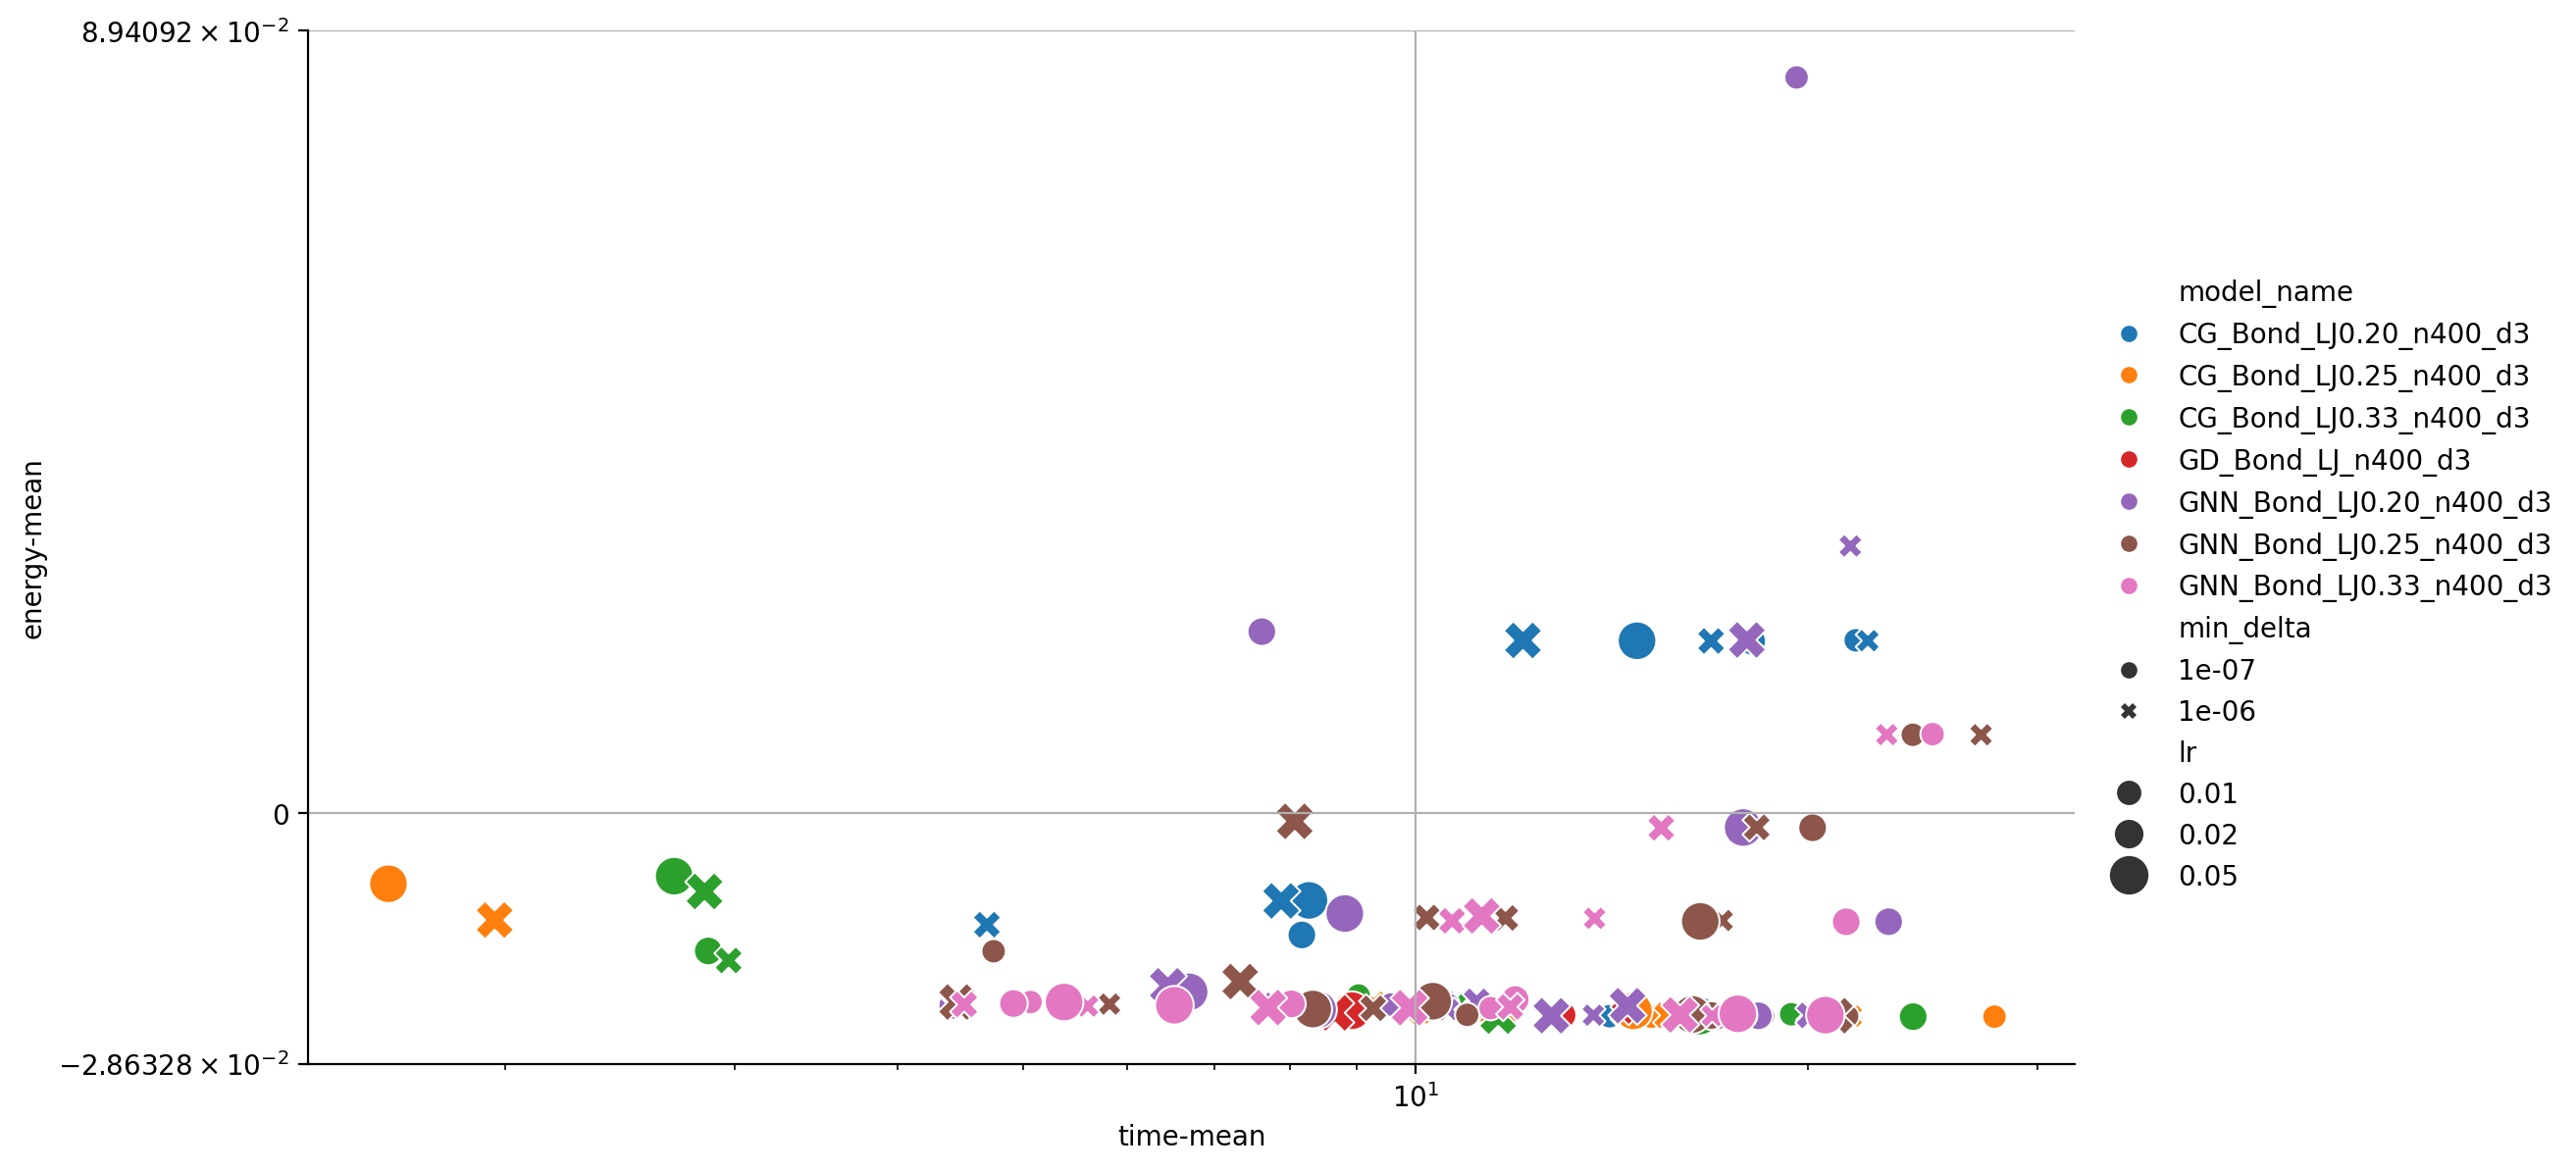

In [149]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

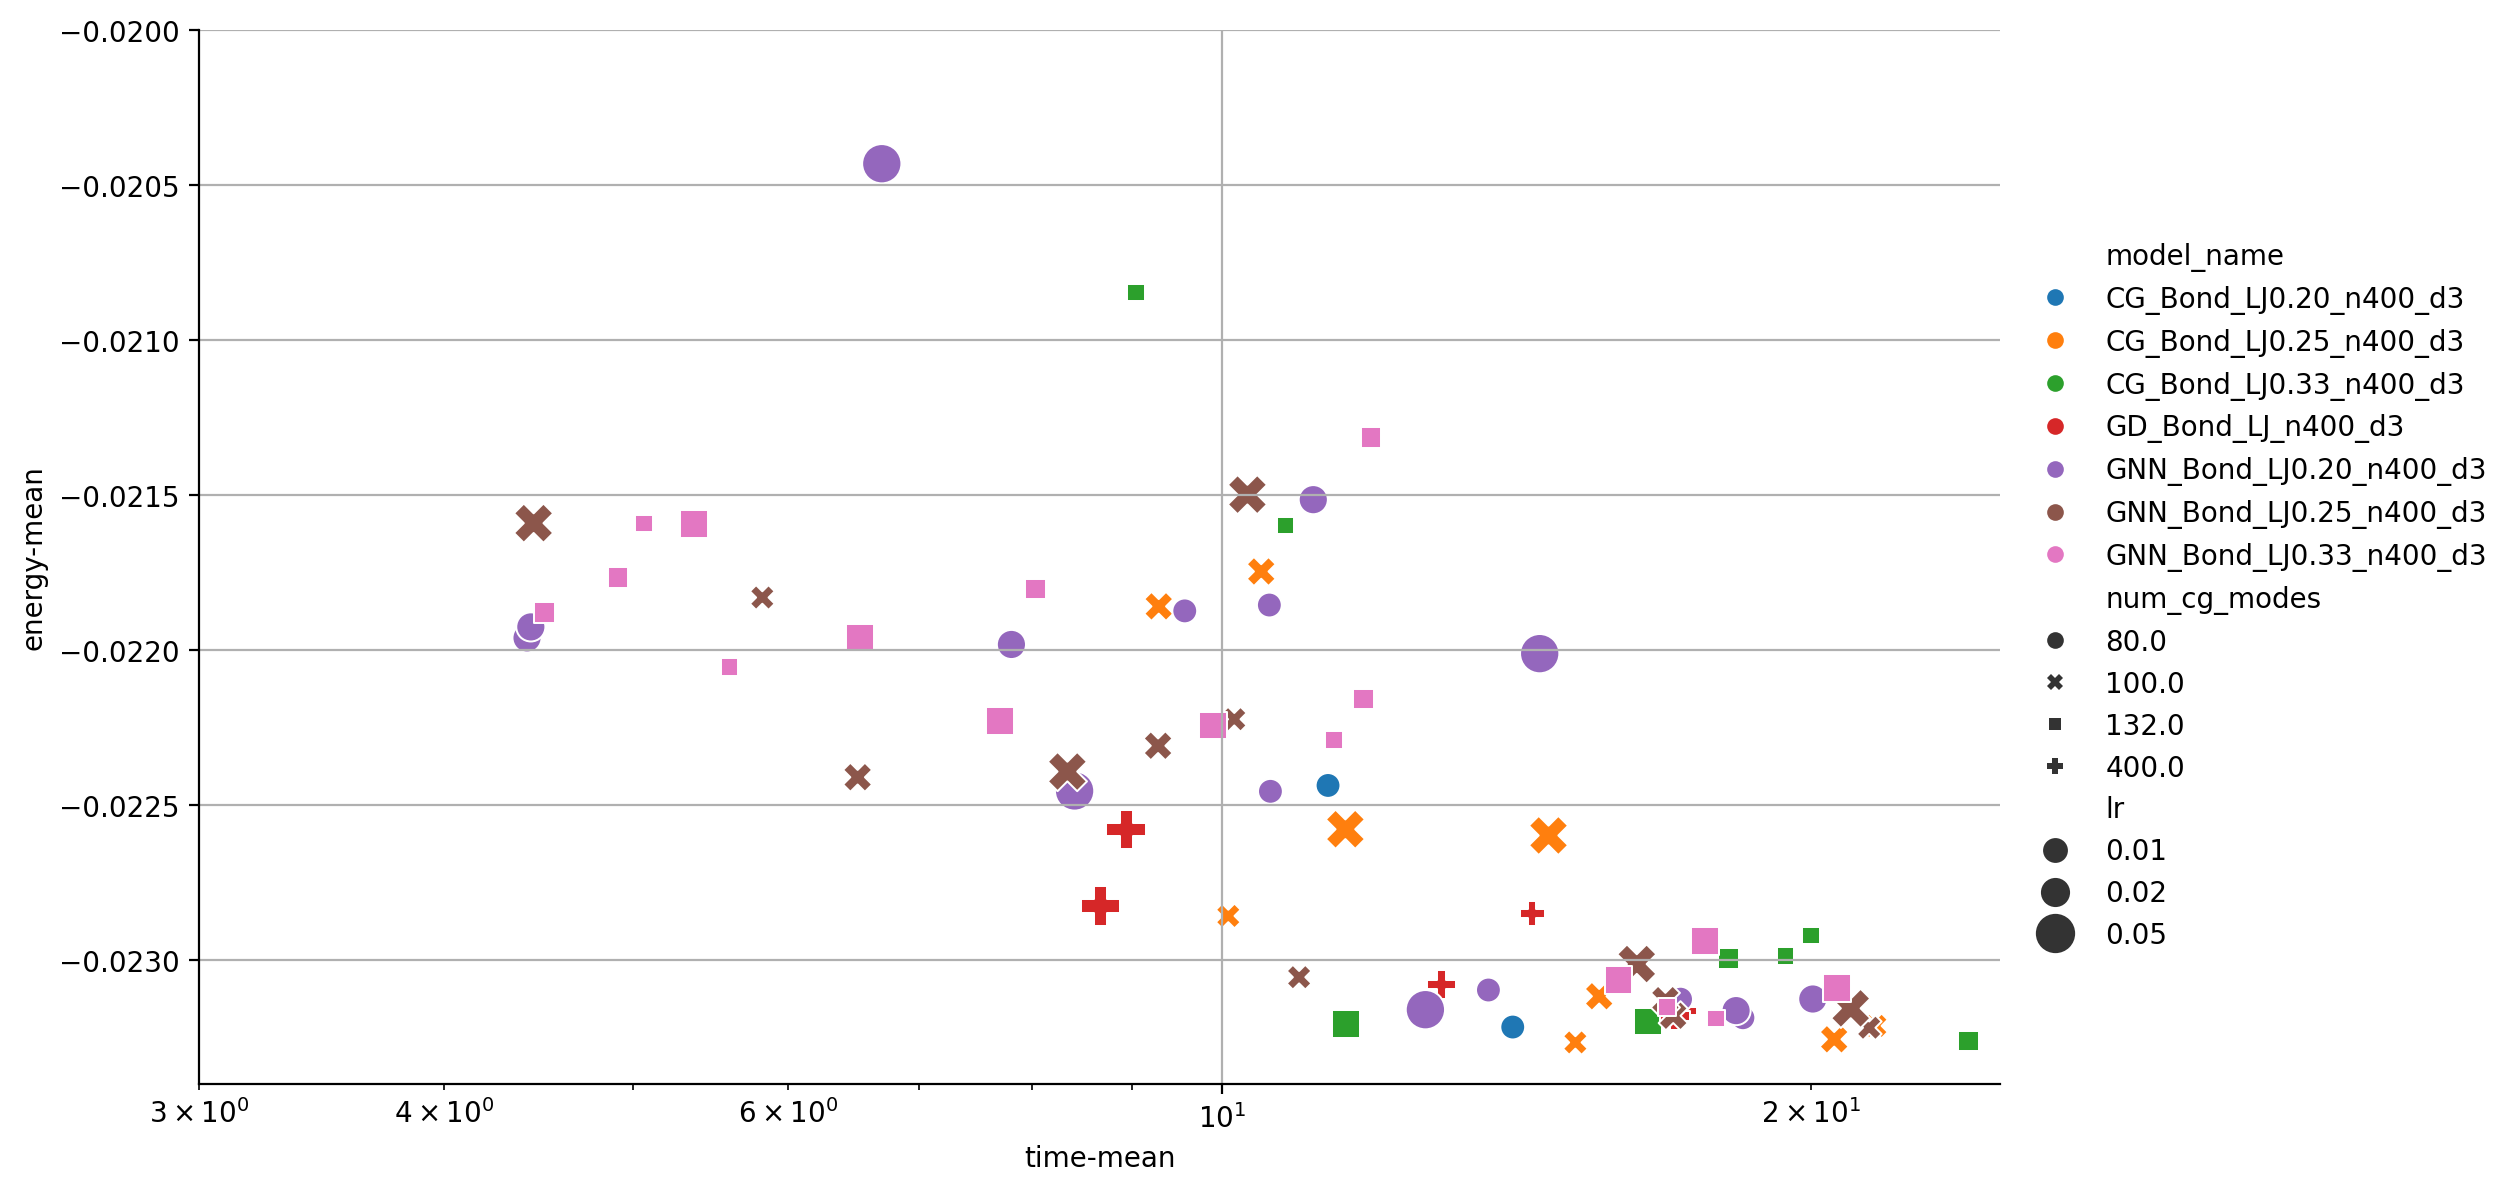

In [150]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='num_cg_modes', size='lr',
            kind='scatter', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.0234, -.020)
plt.xlim(3,25)
plt.xscale('log')
# plt.yscale('symlog')
plt.grid()

In [151]:
# make another df where we take the model_name column and strip everything from "_LJ" to the end of the string and replace _ with a space
df_cleaned = df_filtered.copy()
# remove everything after _LJ in model_name. Ex: 'CG_LJ0.33_n400_d3' -> 'CG' 
# this means, we first need to find where _LJ is in the string, then remove everything after that
df_cleaned['model_name'] = df_cleaned['model_name'].apply(lambda x: x[:x.find('Bond_LJ')].replace('_', ' ') or "Adam")

In [152]:
df_cleaned

index model_name    lr     min_delta  num_cg_modes  lr_cg  hidden_dims  \
0        0        CG   0.01  1.000000e-07          80.0  0.010          NaN   
1        1        CG   0.01  1.000000e-07          80.0  0.100          NaN   
2        2        CG   0.01  1.000000e-06          80.0  0.010          NaN   
3        3        CG   0.01  1.000000e-06          80.0  0.100          NaN   
4        4        CG   0.02  1.000000e-07          80.0  0.020          NaN   
..     ...        ...   ...           ...           ...    ...          ...   
109    109       GNN   0.05  1.000000e-07         132.0  0.050    [8, 4, 3]   
110    110       GNN   0.05  1.000000e-06         132.0  0.005  [32, 16, 3]   
111    111       GNN   0.05  1.000000e-06         132.0  0.005    [8, 4, 3]   
112    112       GNN   0.05  1.000000e-06         132.0  0.050  [32, 16, 3]   
113    113       GNN   0.05  1.000000e-06         132.0  0.050    [8, 4, 3]   

     energy-mean  energy-std  time-mean  time-std  energy_mean  energy_std  \
0       0.019737    0.000118  21.753684  0.479054     0.019737    0.000118   
1      -0.023218         NaN  14.081982       NaN    -0.023218         NaN   
2       0.019688    0.000084  22.225205  4.532486     0.019688    0.000084   
3      -0.022438    0.001044  11.329975  3.366210    -0.022438    0.001044   
4       0.019649    0.000007  18.099378  0.267388     0.019649    0.000007   
..           ...         ...        ...       ...          ...         ...   
109    -0.023091    0.000109  20.618664  1.584142    -0.023091    0.000109   
110    -0.022245    0.001294   9.892986  4.355049    -0.022245    0.001294   
111    -0.023066    0.000005  15.950243  1.601783    -0.023066    0.000005   
112    -0.022229    0.001267   7.703062  2.890561    -0.022229    0.001267   
113    -0.011759    0.014166  11.234873  4.967021    -0.011759    0.014166   

     time_mean  time_std  
0    21.753684  0.479054  
1    14.081982       NaN  
2    22.225205  4.532486  
3    11.329975  3.366210  
4    18.099378  0.267388  
..         ...       ...  
109  20.618664  1.584142  
110   9.892986  4.355049  
111  15.950243  1.601783  
112   7.703062  2.890561  
113  11.234873  4.967021  

[114 rows x 15 columns]

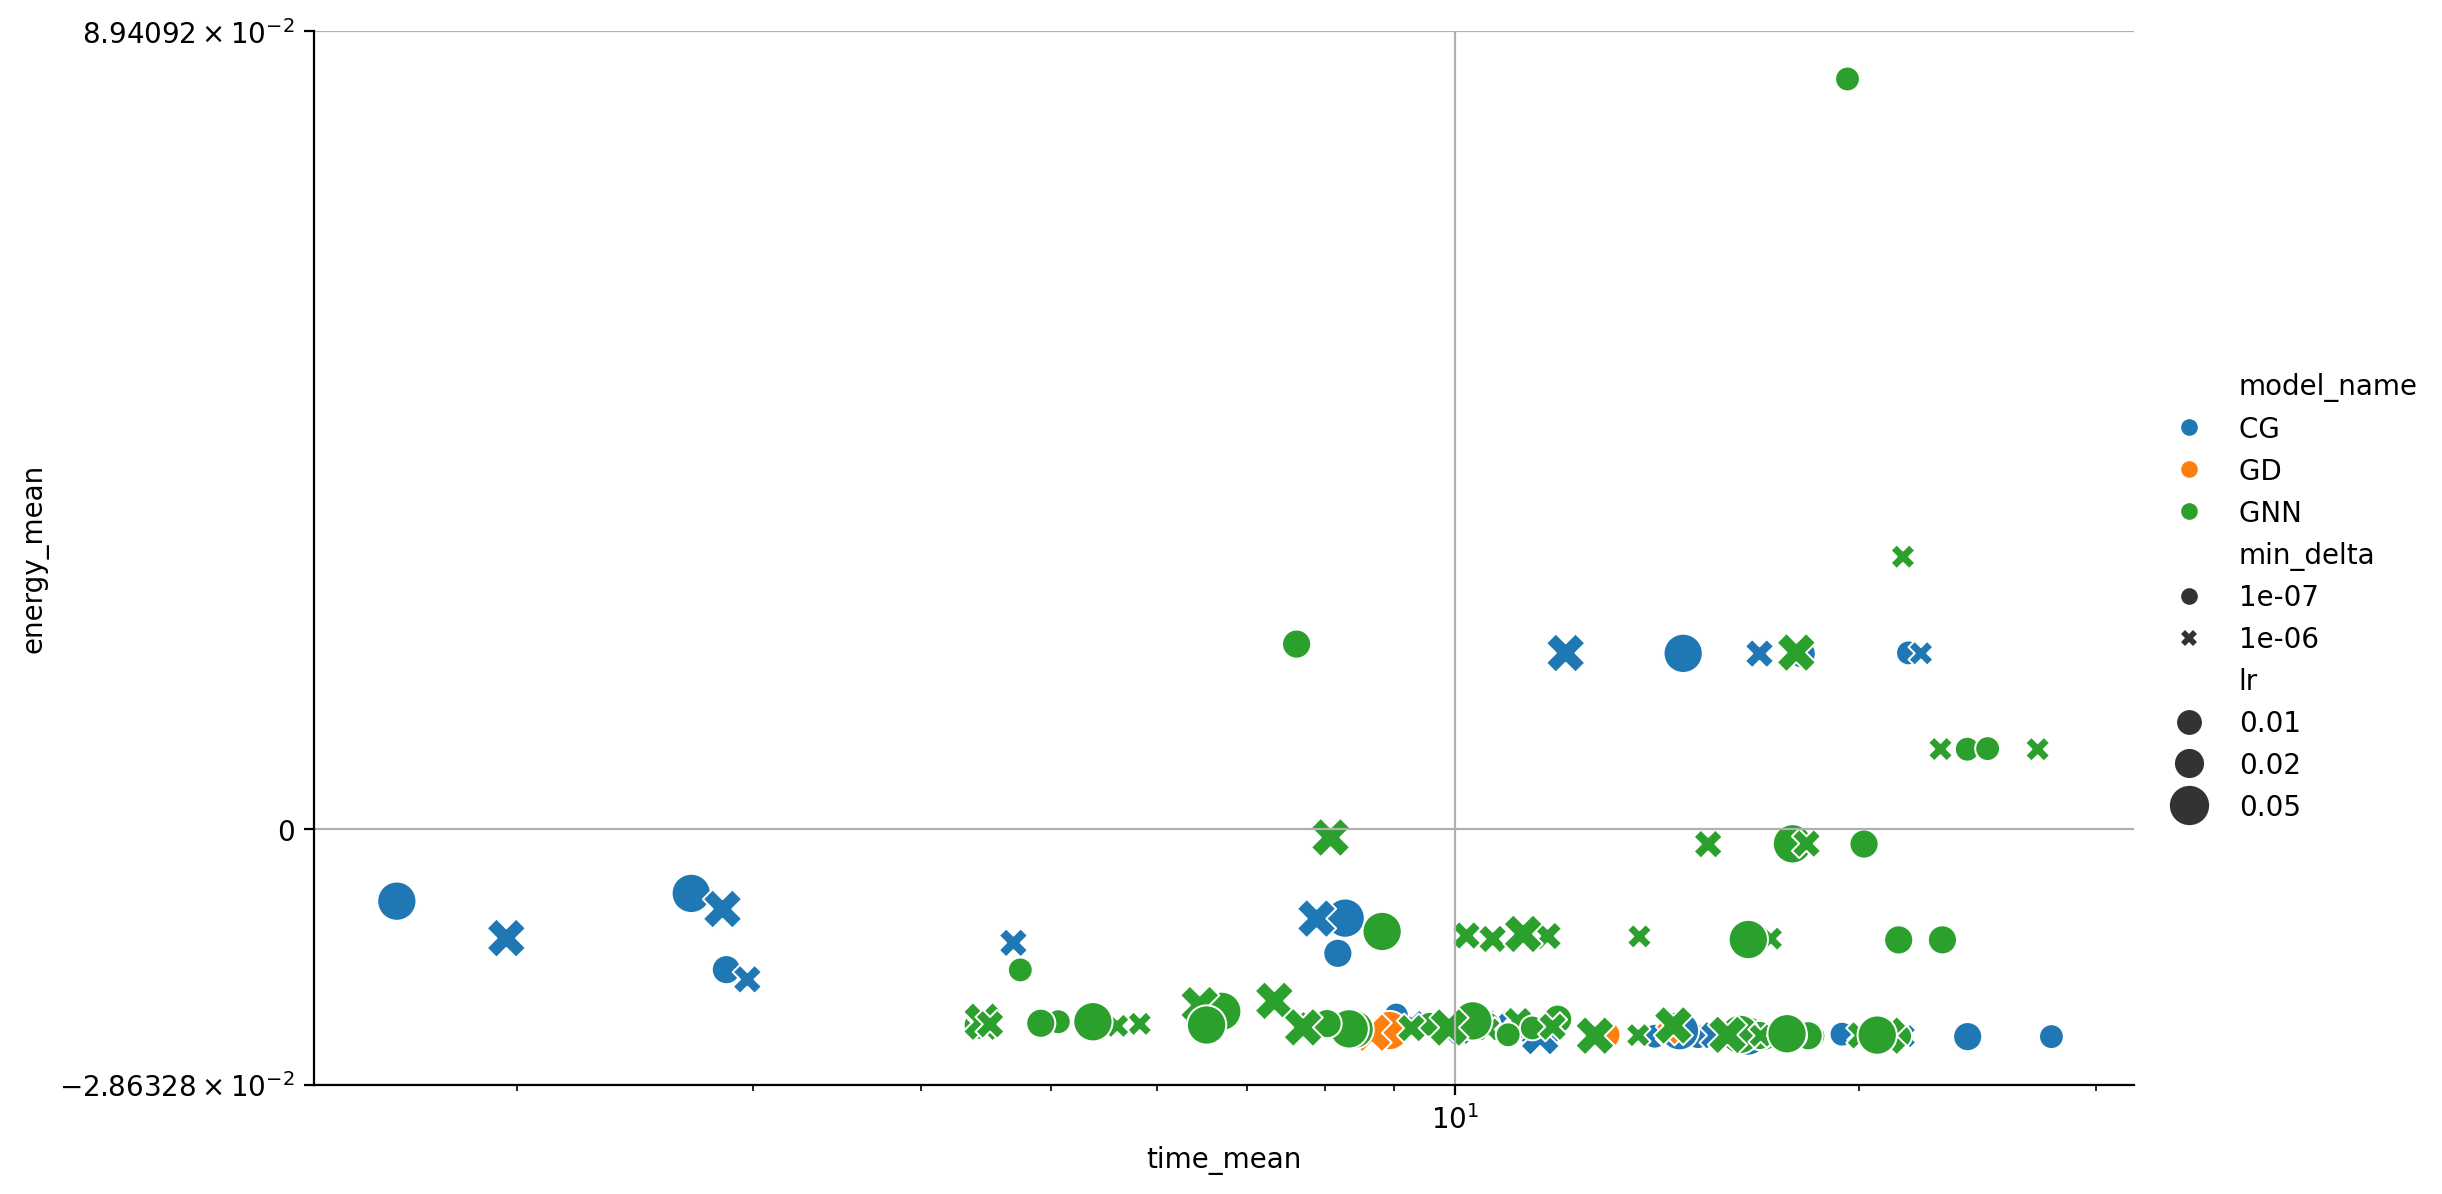

In [153]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', hue='model_name', style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

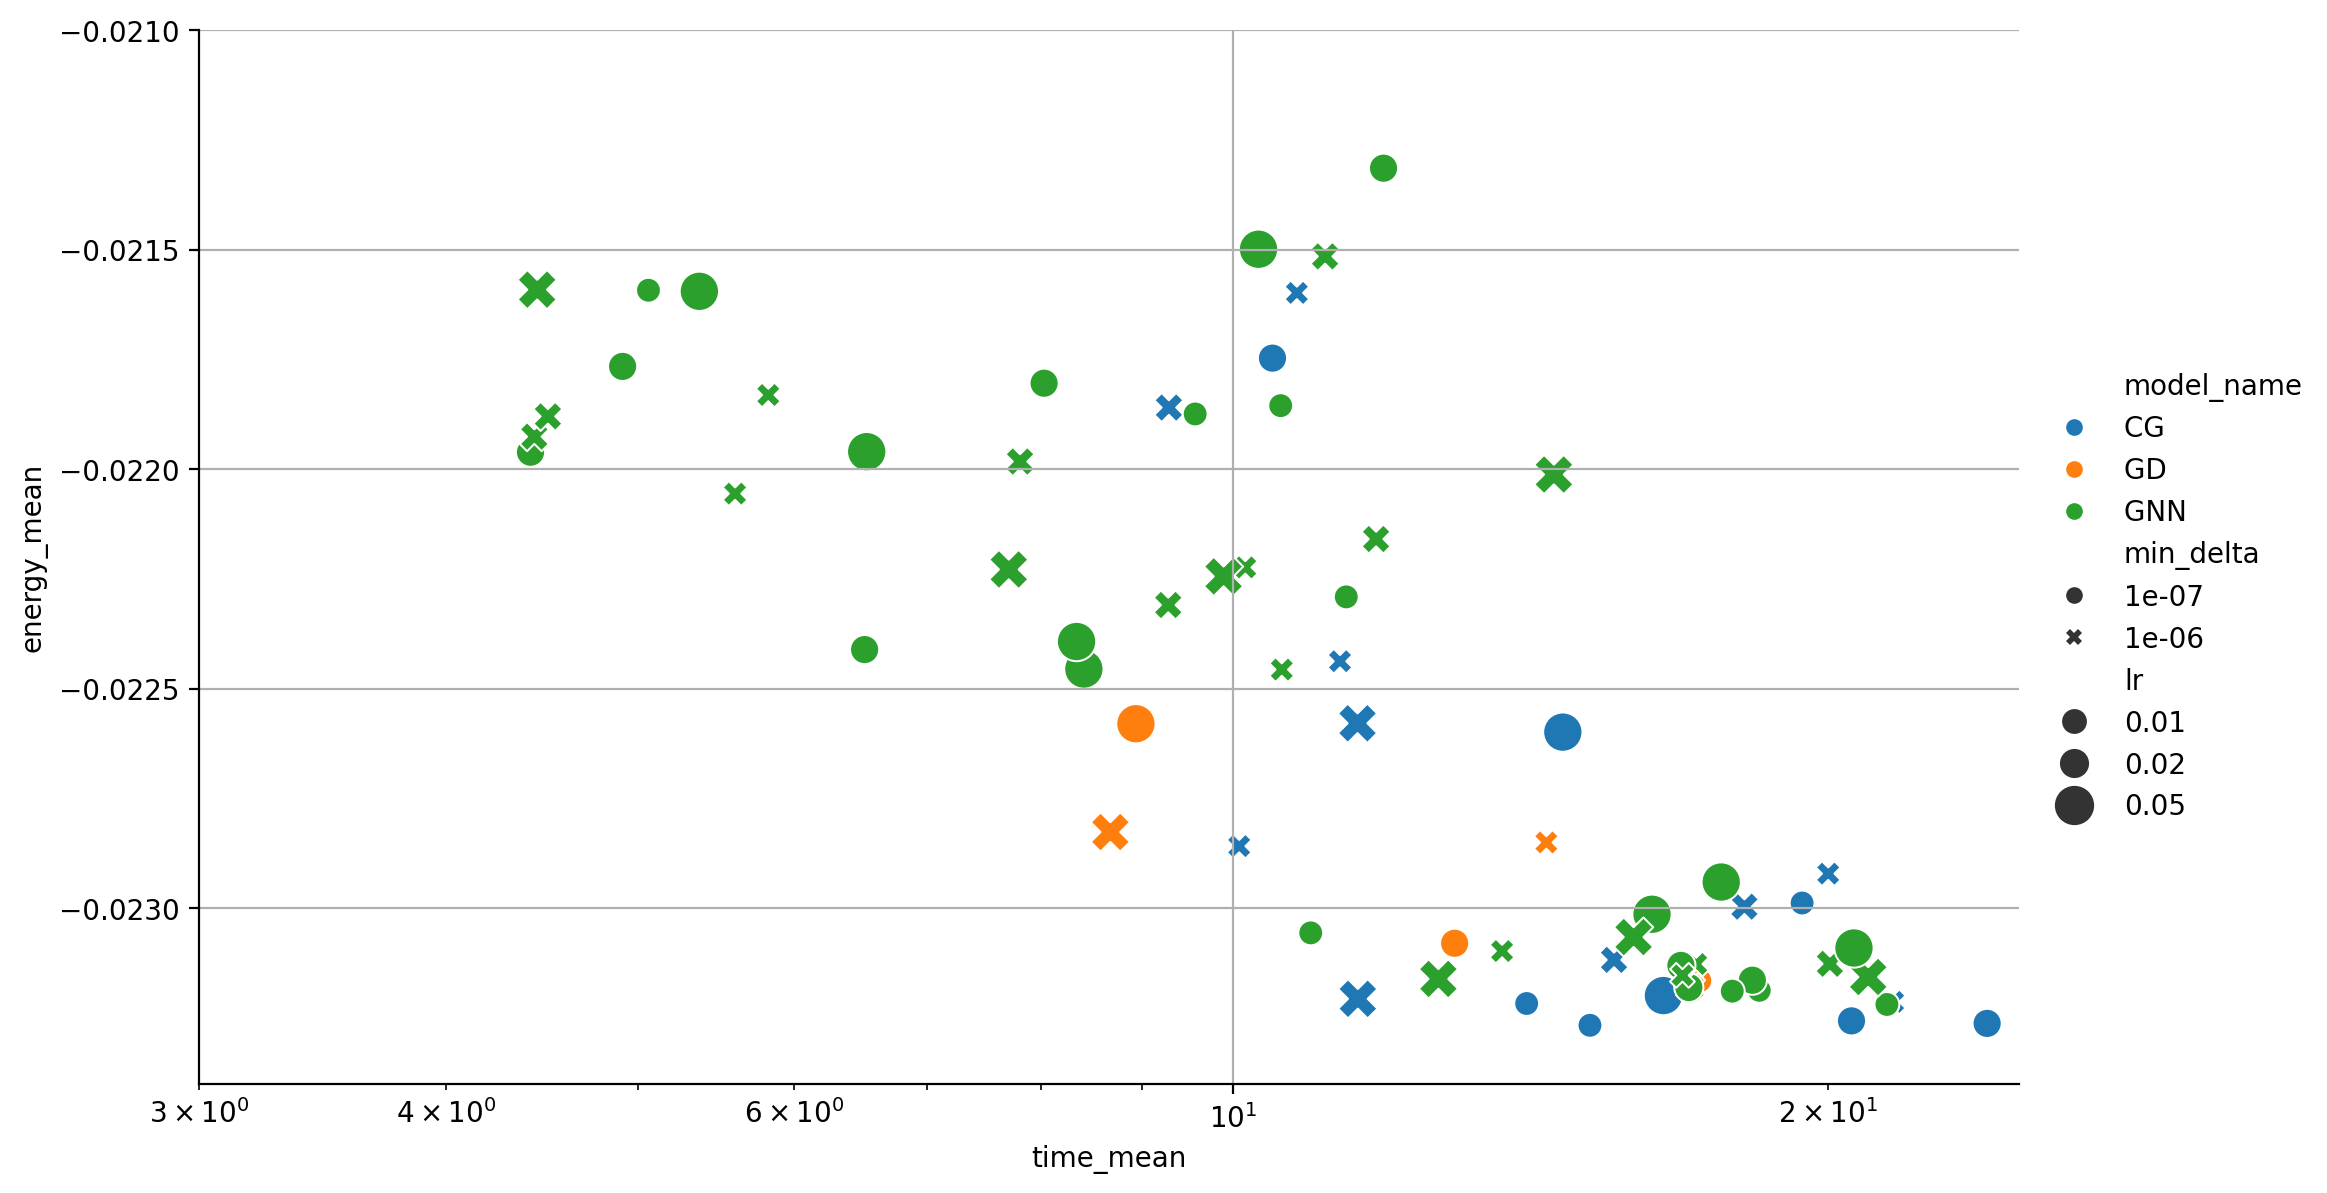

In [154]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.0234, -.0210)
plt.xlim(3,25)
plt.xscale('log')
# plt.yscale('symlog')
plt.grid()

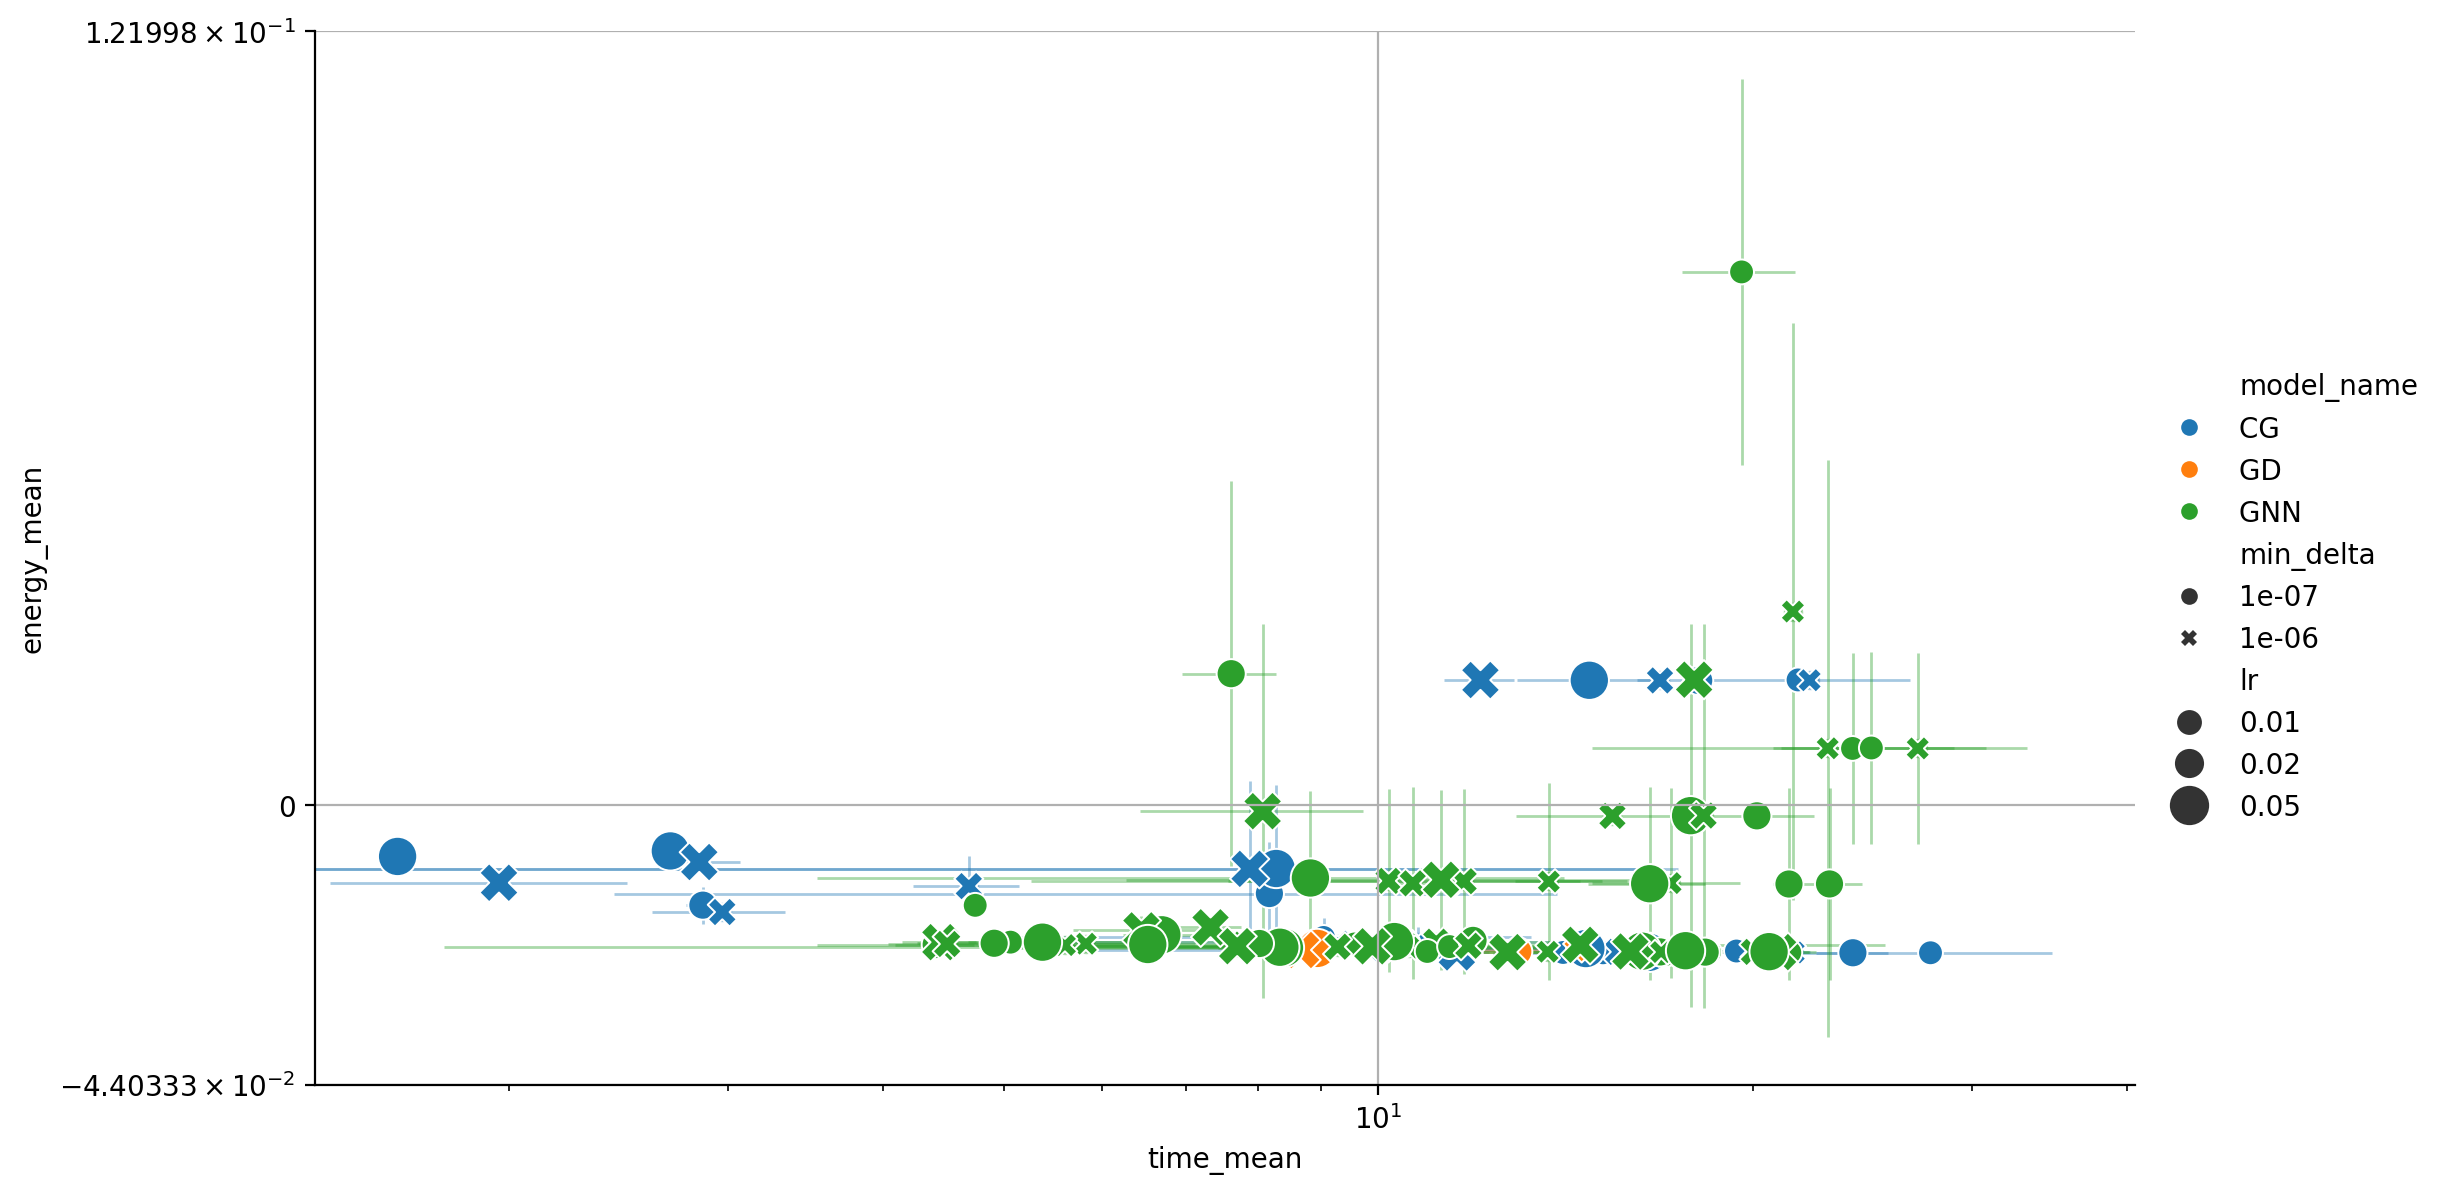

In [155]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.12, .10)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

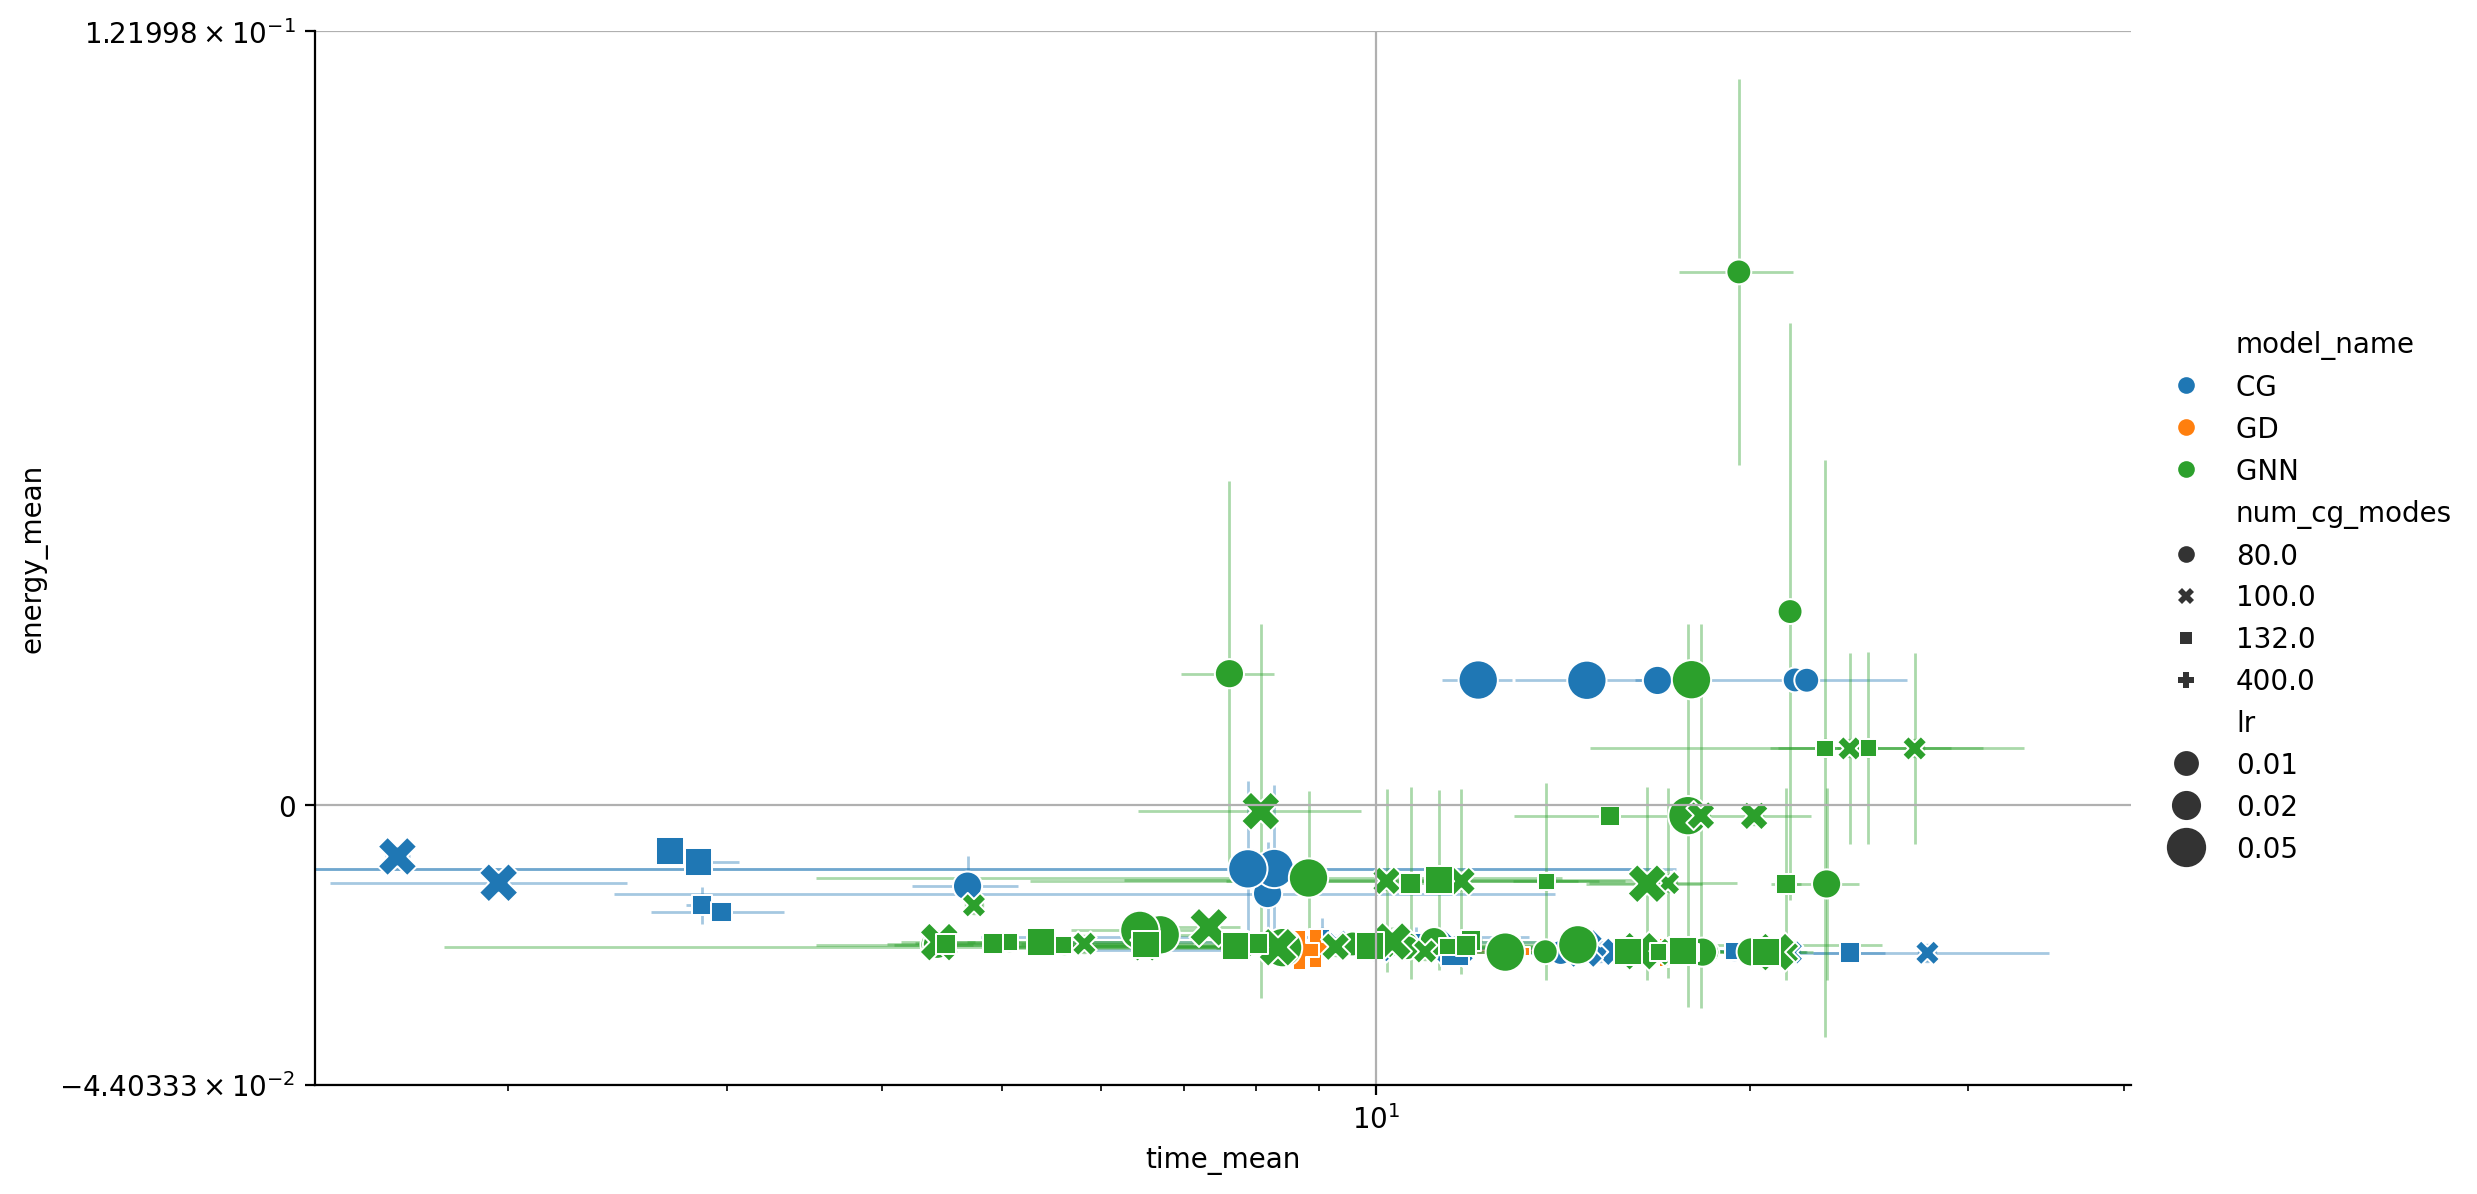

In [156]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))

# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.12, .10)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

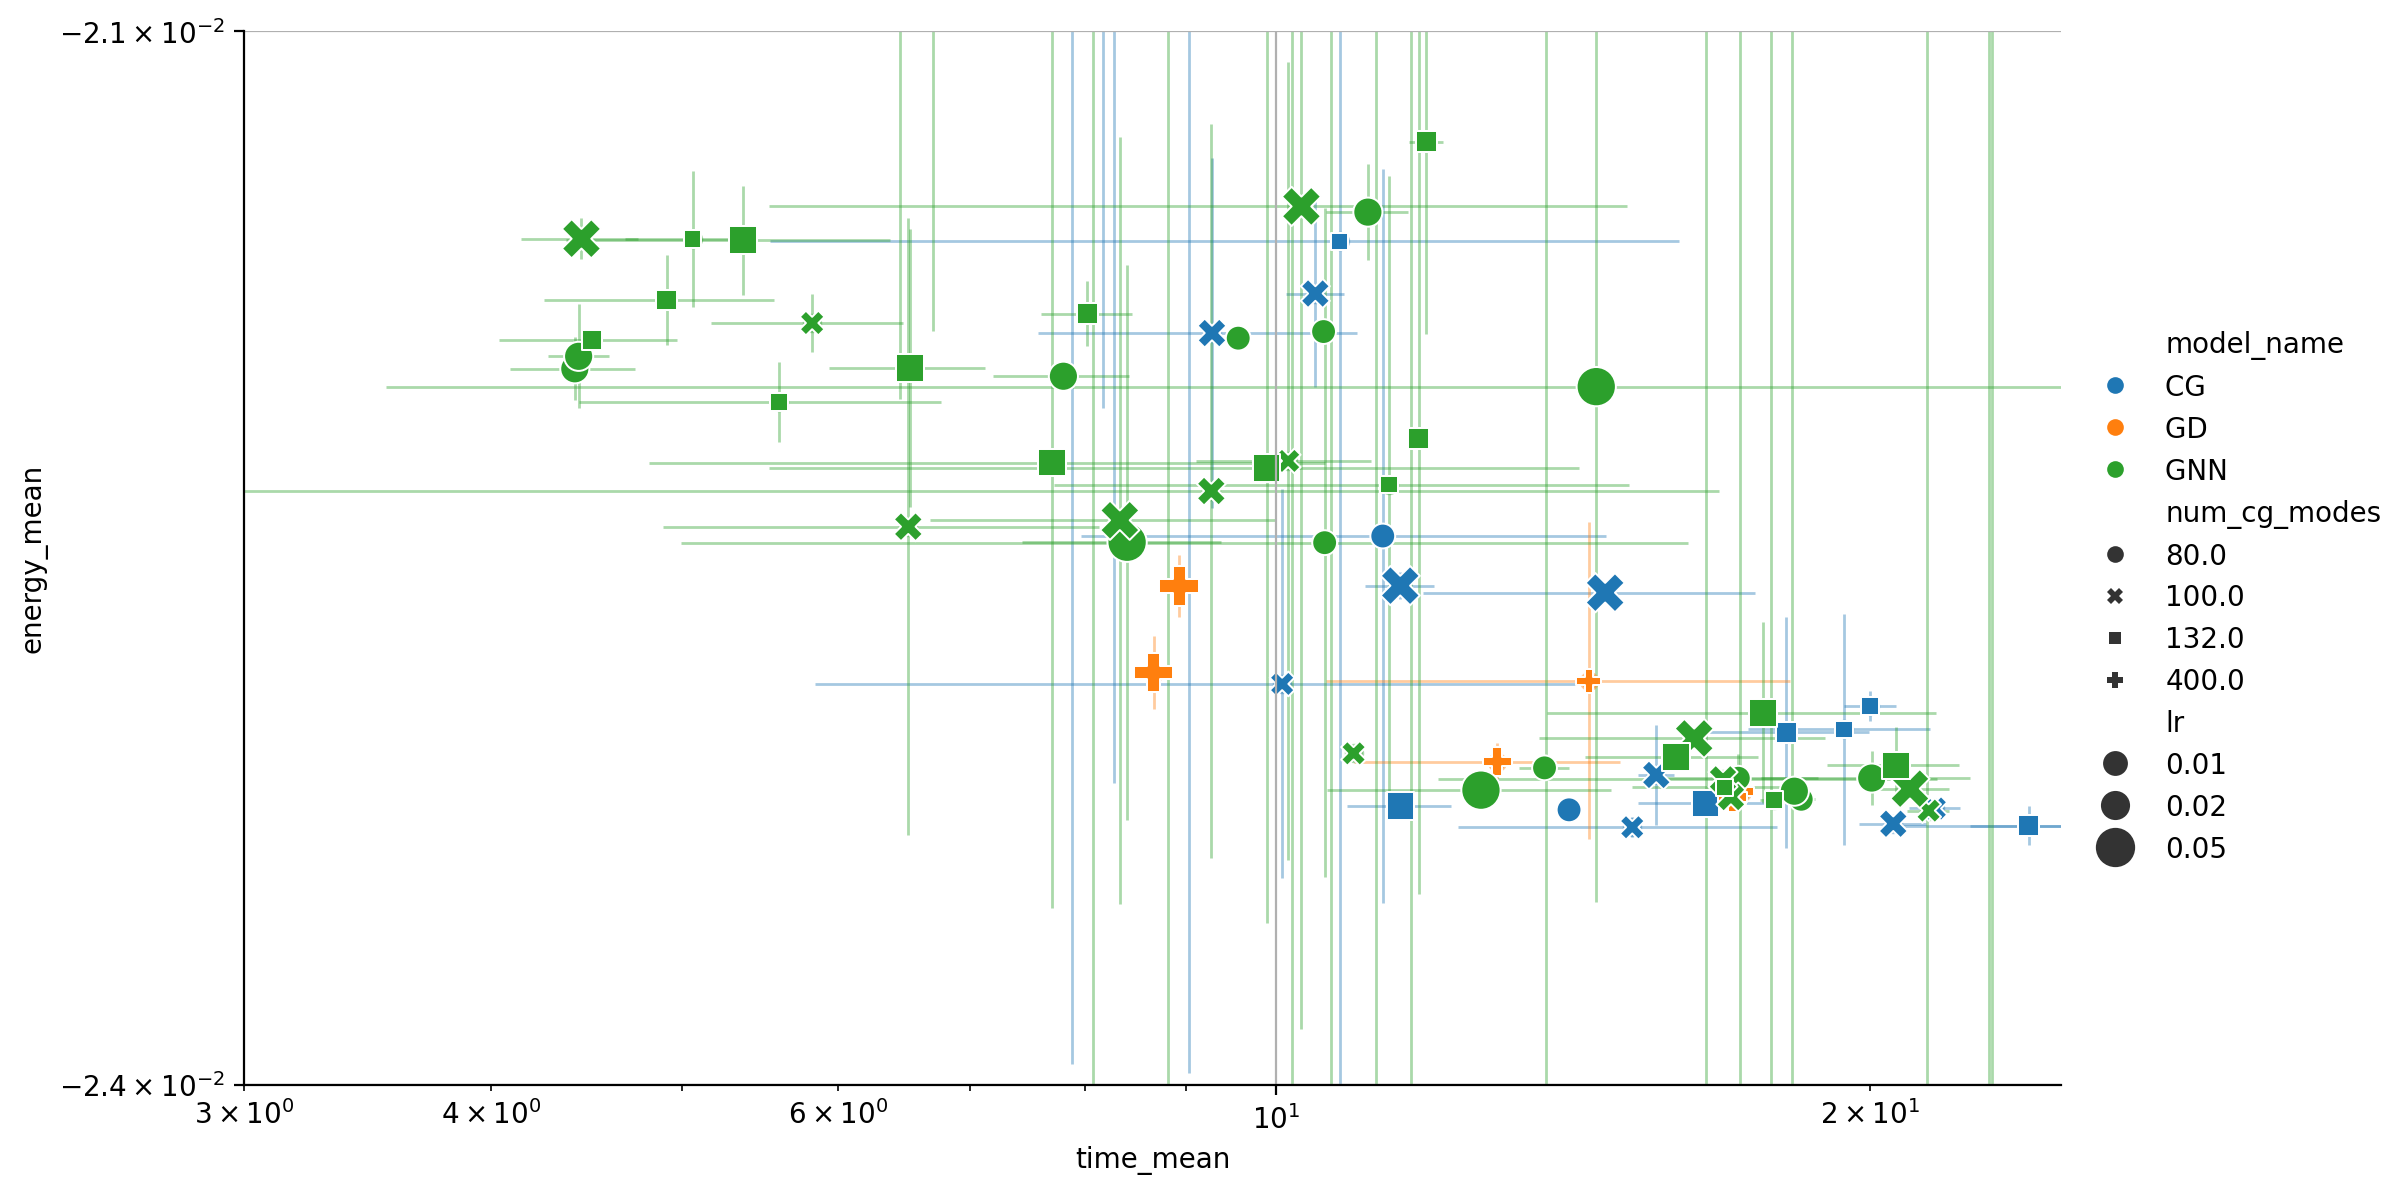

In [157]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# get the map from model names to colors
model_color_dict = dict(zip(model_names, color_palette))
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

plt.ylim(-.024, -.0210)
plt.xlim(3,25)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

# LJ double scale loop
Define an energy function which uses LJ with a coupling that has two levels of strength for forming a loop. 
It consists of:
1. a strong backbone line graph LJ, where every node is attracted to the next
2. a weaker loop LJ, where every l-th pair of nodes are attracted 

In [1]:
ls results

CG_Bond_LJ_experiment2024-02-09-21.csv
CG_Bond_LJ_experiment2024-02-10-02.csv
CG_Bond_LJ_experiment2024-02-10-03.csv
CG_Bond_LJ_experiments2024-02-10-03.csv
CG_Bond_LJ_experiments2024-02-10-04.csv
CG_Bond_LJ_experiments_2024-02-10-16.csv
CG_LJ2_experiments_2024-02-10-04.csv
CG_LJ2_experiments_2scale_2024-02-10-04.csv
CG_LJ2_experiments_2scale_2024-02-10-05.csv
CG_LJ2_experiments_2scale_2024-02-10-06.csv
logs/
test2024-02-09-22.csv
test2024-02-09-23.csv


In [9]:
# exp_logger = ExperimentLogger(previous_results_csv='./results/CG_LJ2_experiments_2024-02-10-04.csv')
# exp_logger = ExperimentLogger(save_prefix='../results/CG_Bond_LJ_experiment') 
exp_logger = ExperimentLogger(previous_results_csv='./results/CG_LJ2_experiments_2scale_2024-02-10-06.csv')
df = exp_logger.to_dataframe()

In [130]:
df

energy_function               model_name    energy       time    lr  \
0    Energy_LJ_2scale          Bond_LJ_n400_d3  0.247403   1.392278  0.05   
1    Energy_LJ_2scale   CG_Bond_LJ0.33_n400_d3  0.727117   9.580374  0.05   
2    Energy_LJ_2scale  GNN_Bond_LJ0.33_n400_d3  0.327568  10.335653  0.05   
3    Energy_LJ_2scale  GNN_Bond_LJ0.33_n400_d3 -0.053740   3.725070  0.05   
4    Energy_LJ_2scale   CG_Bond_LJ0.25_n400_d3  0.518101  14.386985  0.05   
..                ...                      ...       ...        ...   ...   
565  Energy_LJ_2scale  GNN_Bond_LJ0.25_n400_d3  0.378161   9.386935  0.01   
566  Energy_LJ_2scale  GNN_Bond_LJ0.25_n400_d3 -0.035773   7.855705  0.01   
567  Energy_LJ_2scale   CG_Bond_LJ0.20_n400_d3  0.723125  19.358500  0.01   
568  Energy_LJ_2scale  GNN_Bond_LJ0.20_n400_d3  0.642706  10.697762  0.01   
569  Energy_LJ_2scale  GNN_Bond_LJ0.20_n400_d3 -0.040278   5.829245  0.01   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  1.838327        400    NaN   
1            0.1        20  1.000000e-06  1.838327        400  0.050   
2            0.1        20  1.000000e-06  1.838327        400  0.005   
3            0.1        20  1.000000e-06  1.838327        400  0.005   
4            0.1        20  1.000000e-06  1.838327        400  0.050   
..           ...       ...           ...       ...        ...    ...   
565          0.1        20  1.000000e-07  1.838327        400  0.010   
566          0.1        20  1.000000e-07  1.838327        400  0.010   
567          0.1        20  1.000000e-07  1.838327        400  0.100   
568          0.1        20  1.000000e-07  1.838327        400  0.010   
569          0.1        20  1.000000e-07  1.838327        400  0.010   

     cg_patience  cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  \
0            NaN           NaN       NaN        NaN        NaN           NaN   
1           20.0      0.000010     527.0   8.515158   0.749255           NaN   
2           20.0      0.000010     422.0   8.722153   0.328345         133.0   
3           20.0      0.000010      34.0   1.192533  -0.018955         133.0   
4           20.0      0.000010     822.0  13.196695   0.542127           NaN   
..           ...           ...       ...        ...        ...           ...   
565         20.0      0.000001     220.0   4.761004   0.396002         100.0   
566         20.0      0.000001      26.0   1.015844  -0.003536         100.0   
567         20.0      0.000001     635.0  10.377081   0.760114           NaN   
568         20.0      0.000001     398.0   8.248155   0.643227          80.0   
569         20.0      0.000001      27.0   1.042117  -0.006536          80.0   

     hidden_dims  
0            NaN  
1            NaN  
2      [8, 4, 3]  
3    [32, 16, 3]  
4            NaN  
..           ...  
565    [8, 4, 3]  
566  [32, 16, 3]  
567          NaN  
568    [8, 4, 3]  
569  [32, 16, 3]  

[570 rows x 18 columns]

In [133]:
# seems like the num_cg_modes are not logged correctly for "CG_..." models, and base models do not use cg modes
# fortunately, the CG models mention the ratio of cg modes / num nodes in the model name as CG_Bond_LJ[ratio]_n[nodes]_d3
# so we can extract the ratio from the model name, and use it to calculate the number of cg modes
# we can also calculate the number of nodes from the model name

# first, let's extract the ratio and number of nodes from the model name
df['cg_ratio'] = df['model_name'].apply(lambda x: float((x.split('_LJ')[1].split('_')[0] or '1.0')))
df['num_cg_modes'] = df['cg_ratio'] * df['num_nodes']
# ensure that the num_cg_modes is an integer
df['num_cg_modes'] = df['num_cg_modes'].astype(int)

In [136]:
df

energy_function               model_name    energy       time    lr  \
0    Energy_LJ_2scale          Bond_LJ_n400_d3  0.247403   1.392278  0.05   
1    Energy_LJ_2scale   CG_Bond_LJ0.33_n400_d3  0.727117   9.580374  0.05   
2    Energy_LJ_2scale  GNN_Bond_LJ0.33_n400_d3  0.327568  10.335653  0.05   
3    Energy_LJ_2scale  GNN_Bond_LJ0.33_n400_d3 -0.053740   3.725070  0.05   
4    Energy_LJ_2scale   CG_Bond_LJ0.25_n400_d3  0.518101  14.386985  0.05   
..                ...                      ...       ...        ...   ...   
565  Energy_LJ_2scale  GNN_Bond_LJ0.25_n400_d3  0.378161   9.386935  0.01   
566  Energy_LJ_2scale  GNN_Bond_LJ0.25_n400_d3 -0.035773   7.855705  0.01   
567  Energy_LJ_2scale   CG_Bond_LJ0.20_n400_d3  0.723125  19.358500  0.01   
568  Energy_LJ_2scale  GNN_Bond_LJ0.20_n400_d3  0.642706  10.697762  0.01   
569  Energy_LJ_2scale  GNN_Bond_LJ0.20_n400_d3 -0.040278   5.829245  0.01   

     clamp_grads  patience     min_delta    x0_std  num_nodes  lr_cg  \
0            0.1        20  1.000000e-06  1.838327        400    NaN   
1            0.1        20  1.000000e-06  1.838327        400  0.050   
2            0.1        20  1.000000e-06  1.838327        400  0.005   
3            0.1        20  1.000000e-06  1.838327        400  0.005   
4            0.1        20  1.000000e-06  1.838327        400  0.050   
..           ...       ...           ...       ...        ...    ...   
565          0.1        20  1.000000e-07  1.838327        400  0.010   
566          0.1        20  1.000000e-07  1.838327        400  0.010   
567          0.1        20  1.000000e-07  1.838327        400  0.100   
568          0.1        20  1.000000e-07  1.838327        400  0.010   
569          0.1        20  1.000000e-07  1.838327        400  0.010   

     cg_patience  cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  \
0            NaN           NaN       NaN        NaN        NaN         400.0   
1           20.0      0.000010     527.0   8.515158   0.749255         132.0   
2           20.0      0.000010     422.0   8.722153   0.328345         132.0   
3           20.0      0.000010      34.0   1.192533  -0.018955         132.0   
4           20.0      0.000010     822.0  13.196695   0.542127         100.0   
..           ...           ...       ...        ...        ...           ...   
565         20.0      0.000001     220.0   4.761004   0.396002         100.0   
566         20.0      0.000001      26.0   1.015844  -0.003536         100.0   
567         20.0      0.000001     635.0  10.377081   0.760114          80.0   
568         20.0      0.000001     398.0   8.248155   0.643227          80.0   
569         20.0      0.000001      27.0   1.042117  -0.006536          80.0   

     hidden_dims  cg_ratio  
0            NaN      1.00  
1            NaN      0.33  
2      [8, 4, 3]      0.33  
3    [32, 16, 3]      0.33  
4            NaN      0.25  
..           ...       ...  
565    [8, 4, 3]      0.25  
566  [32, 16, 3]      0.25  
567          NaN      0.20  
568    [8, 4, 3]      0.20  
569  [32, 16, 3]      0.20  

[570 rows x 19 columns]

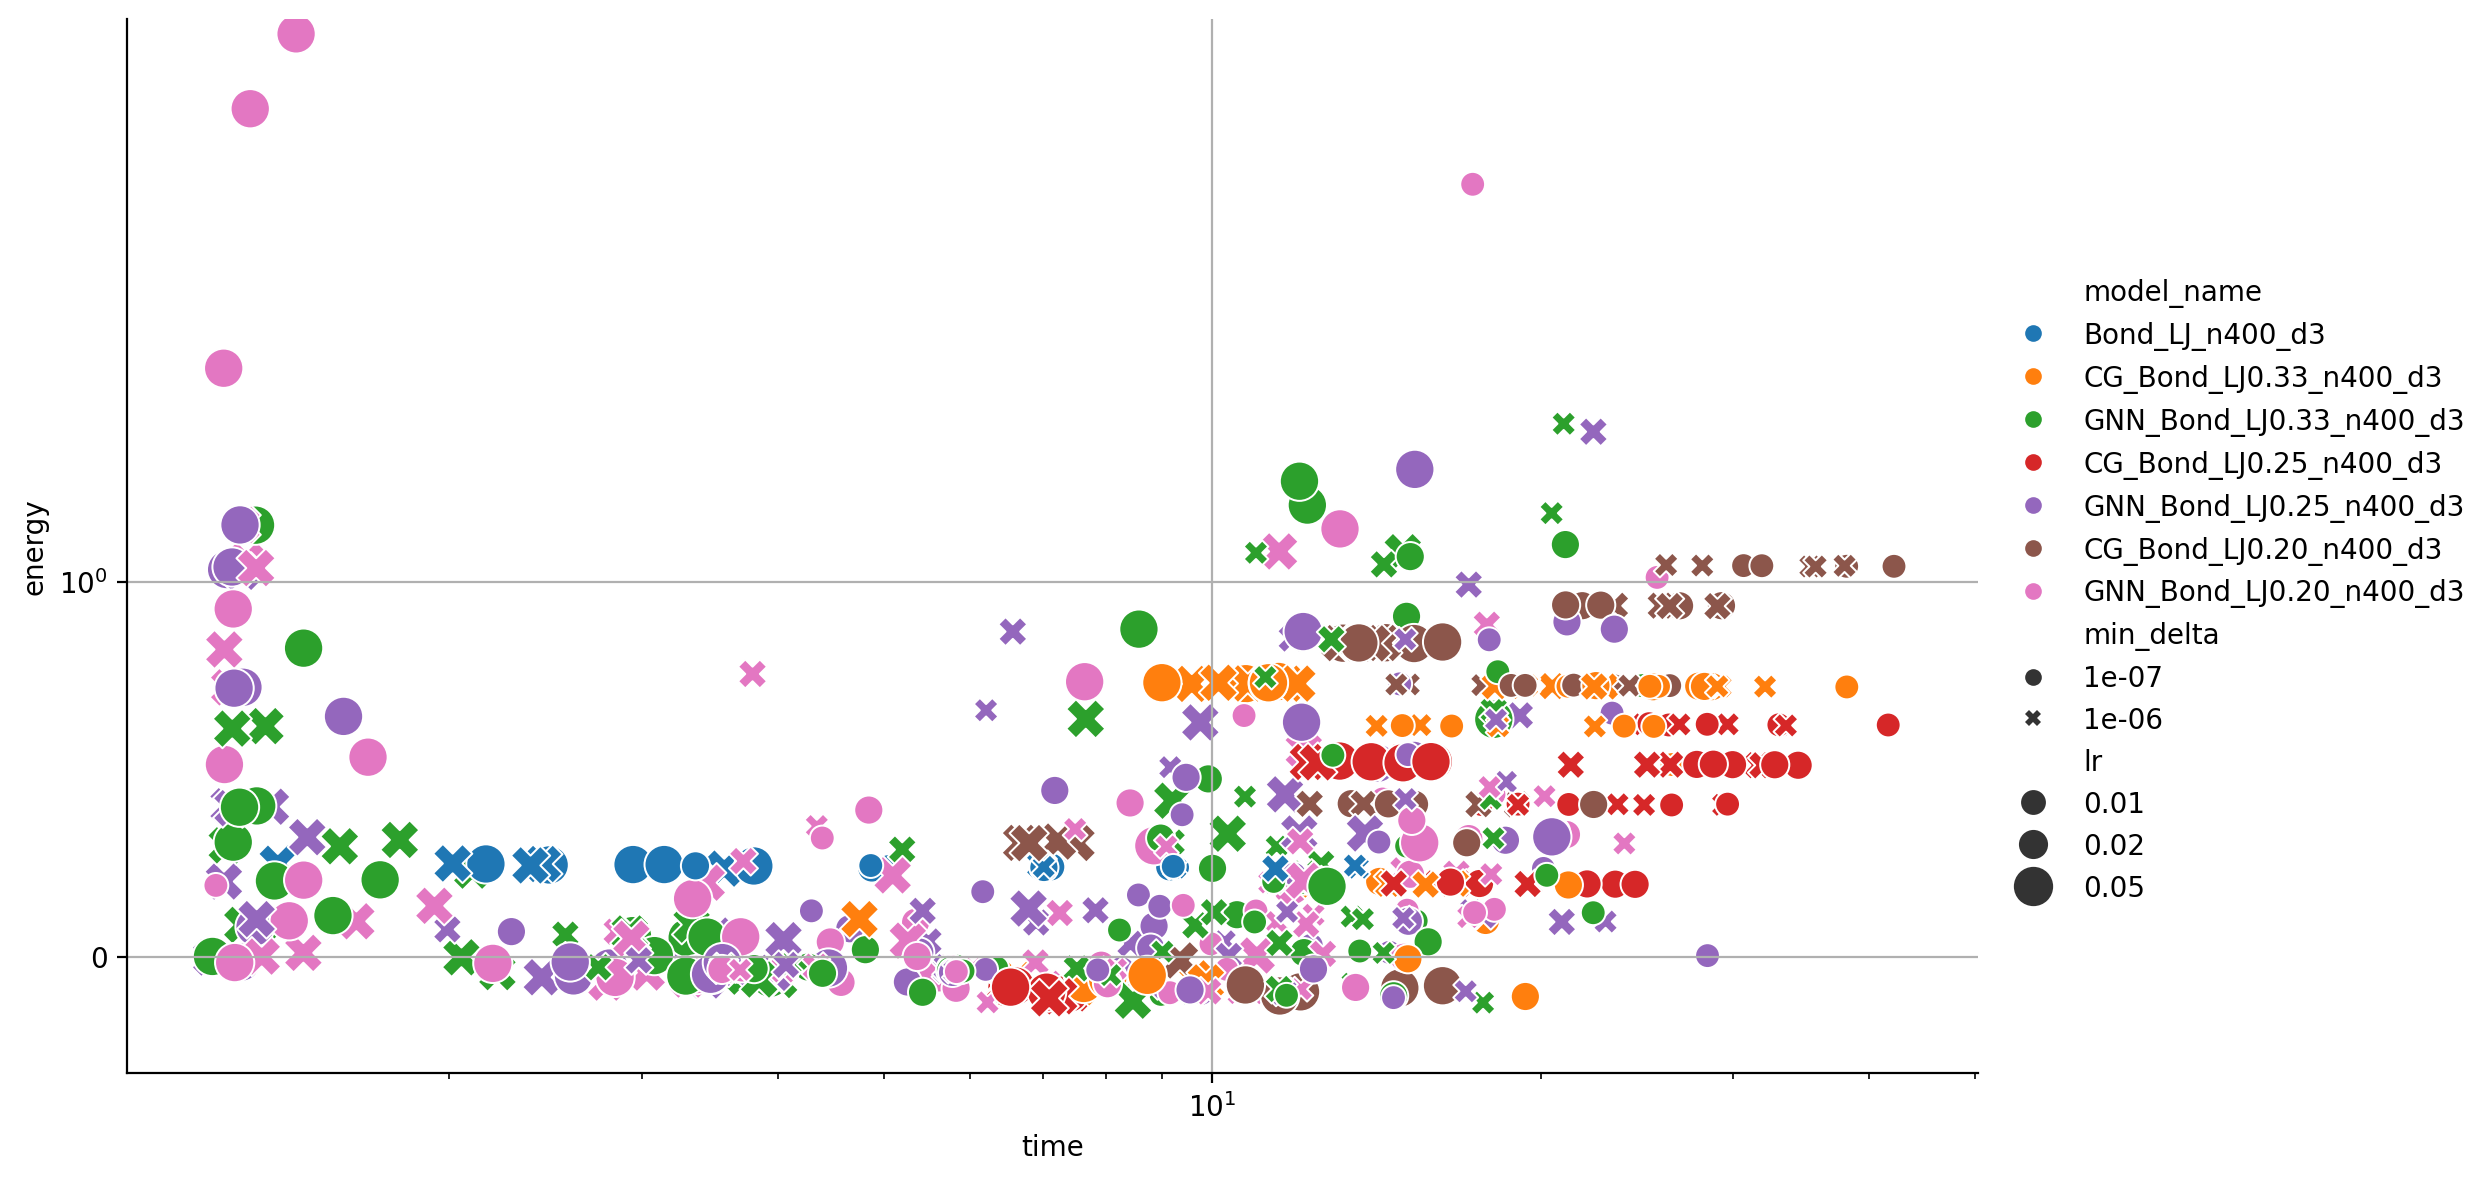

In [137]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

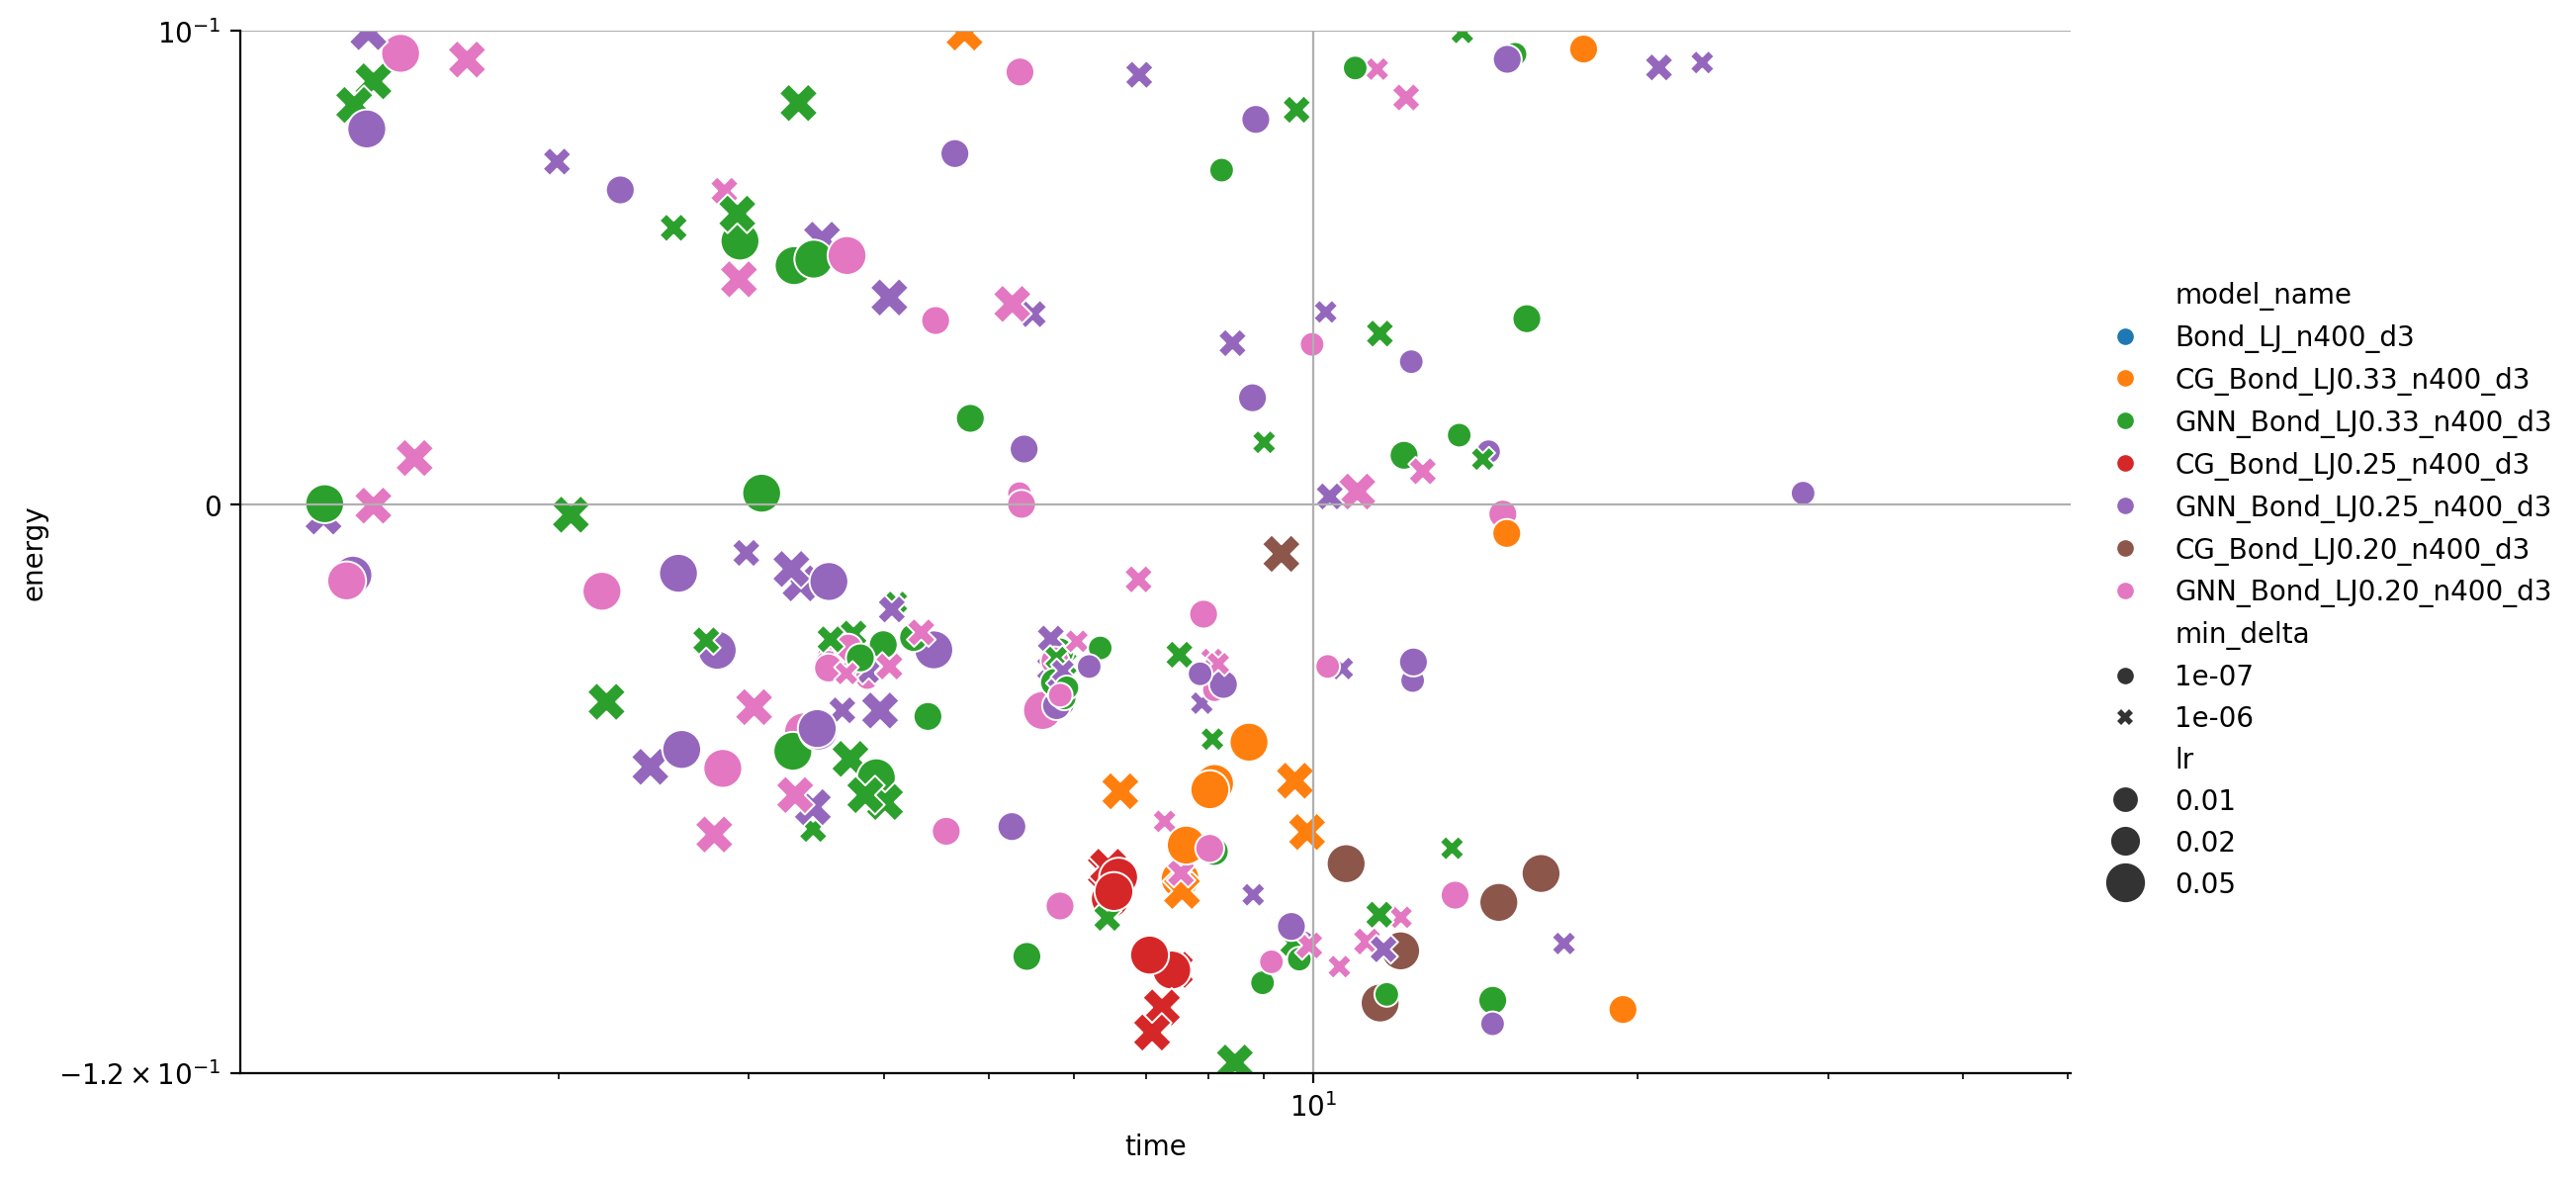

In [139]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df, x='time', y='energy', hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

## Grouping similar runs

In [140]:
# We replace the NaN with 0 before applying groupby to avoid losing rows
df_copy = df.copy()
df_copy.fillna('na', inplace=True)
# we will group by the model_name, lr, and min_delta
df_grouped = df_copy.groupby(['model_name', 'lr', 'min_delta', 'num_cg_modes', 'lr_cg', 'hidden_dims'])
# other options: cg_patience,cg_min_delta
# we can now calculate the mean and std of the energy for each group
# only take the mean of the energy and time column (the other columns are not relevant and may contain non-numeric values)
df_mean = df_grouped.agg({'energy': ['mean', 'std'], 'time': ['mean','std']})
df_mean.reset_index(inplace=True)

# now we will revert the 'na' values to NaN
df_mean.replace('na', np.nan, inplace=True)
df_mean

/tmp/ipykernel_1624139/3992581159.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.fillna('na', inplace=True)
/tmp/ipykernel_1624139/3992581159.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mean.replace('na', np.nan, inplace=True)


model_name    lr     min_delta num_cg_modes  lr_cg  \
                                                                       
0            Bond_LJ_n400_d3  0.01  1.000000e-07        400.0    NaN   
1            Bond_LJ_n400_d3  0.01  1.000000e-06        400.0    NaN   
2            Bond_LJ_n400_d3  0.02  1.000000e-07        400.0    NaN   
3            Bond_LJ_n400_d3  0.02  1.000000e-06        400.0    NaN   
4            Bond_LJ_n400_d3  0.05  1.000000e-07        400.0    NaN   
..                       ...   ...           ...          ...    ...   
109  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-07        132.0  0.050   
110  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.005   
111  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.005   
112  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.050   
113  GNN_Bond_LJ0.33_n400_d3  0.05  1.000000e-06        132.0  0.050   

     hidden_dims    energy                 time            
                      mean       std       mean       std  
0            NaN  0.239989  0.001858   7.085380  2.150125  
1            NaN  0.239260  0.002345  10.083259  3.301501  
2            NaN  0.238705  0.002149   6.301677  2.231569  
3            NaN  0.241878  0.004612   7.884045  1.981954  
4            NaN  0.244587  0.001987   2.904738  0.634405  
..           ...       ...       ...        ...       ...  
109    [8, 4, 3]  0.103540  0.100937   1.793974  0.745505  
110  [32, 16, 3] -0.031653  0.052676   3.343983  0.757289  
111    [8, 4, 3]  0.467462  0.437481  10.121132  2.875315  
112  [32, 16, 3]  0.379413  0.228405   1.350057  0.138640  
113    [8, 4, 3]  0.142383  0.125467   2.126317  0.738173  

[114 rows x 10 columns]

In [143]:
# plot the filtered dataframe using sns directly on df_mean
# note that now we have the mean and std of the energy for each group
# we can use the std to plot the error bars
# we can also use the std to filter the data
# we will create a new column for the error bars
df_mean['energy_mean'] = df_mean['energy']['mean']
df_mean['energy_std'] = df_mean['energy']['std']
# same for time 
df_mean['time_mean'] = df_mean['time']['mean']
df_mean['time_std'] = df_mean['time']['std']
# we will use the mean of the std to filter the data
std_threshold = df_mean['energy']['std'].mean()
# we will filter the data using the std
df_filtered = df_mean[df_mean['energy']['std'] < std_threshold]
df_filtered.reset_index(inplace=True)

df_filtered.columns = [('-'.join(col).strip() if col[1]!='' else col[0]) for col in df_filtered.columns.values]

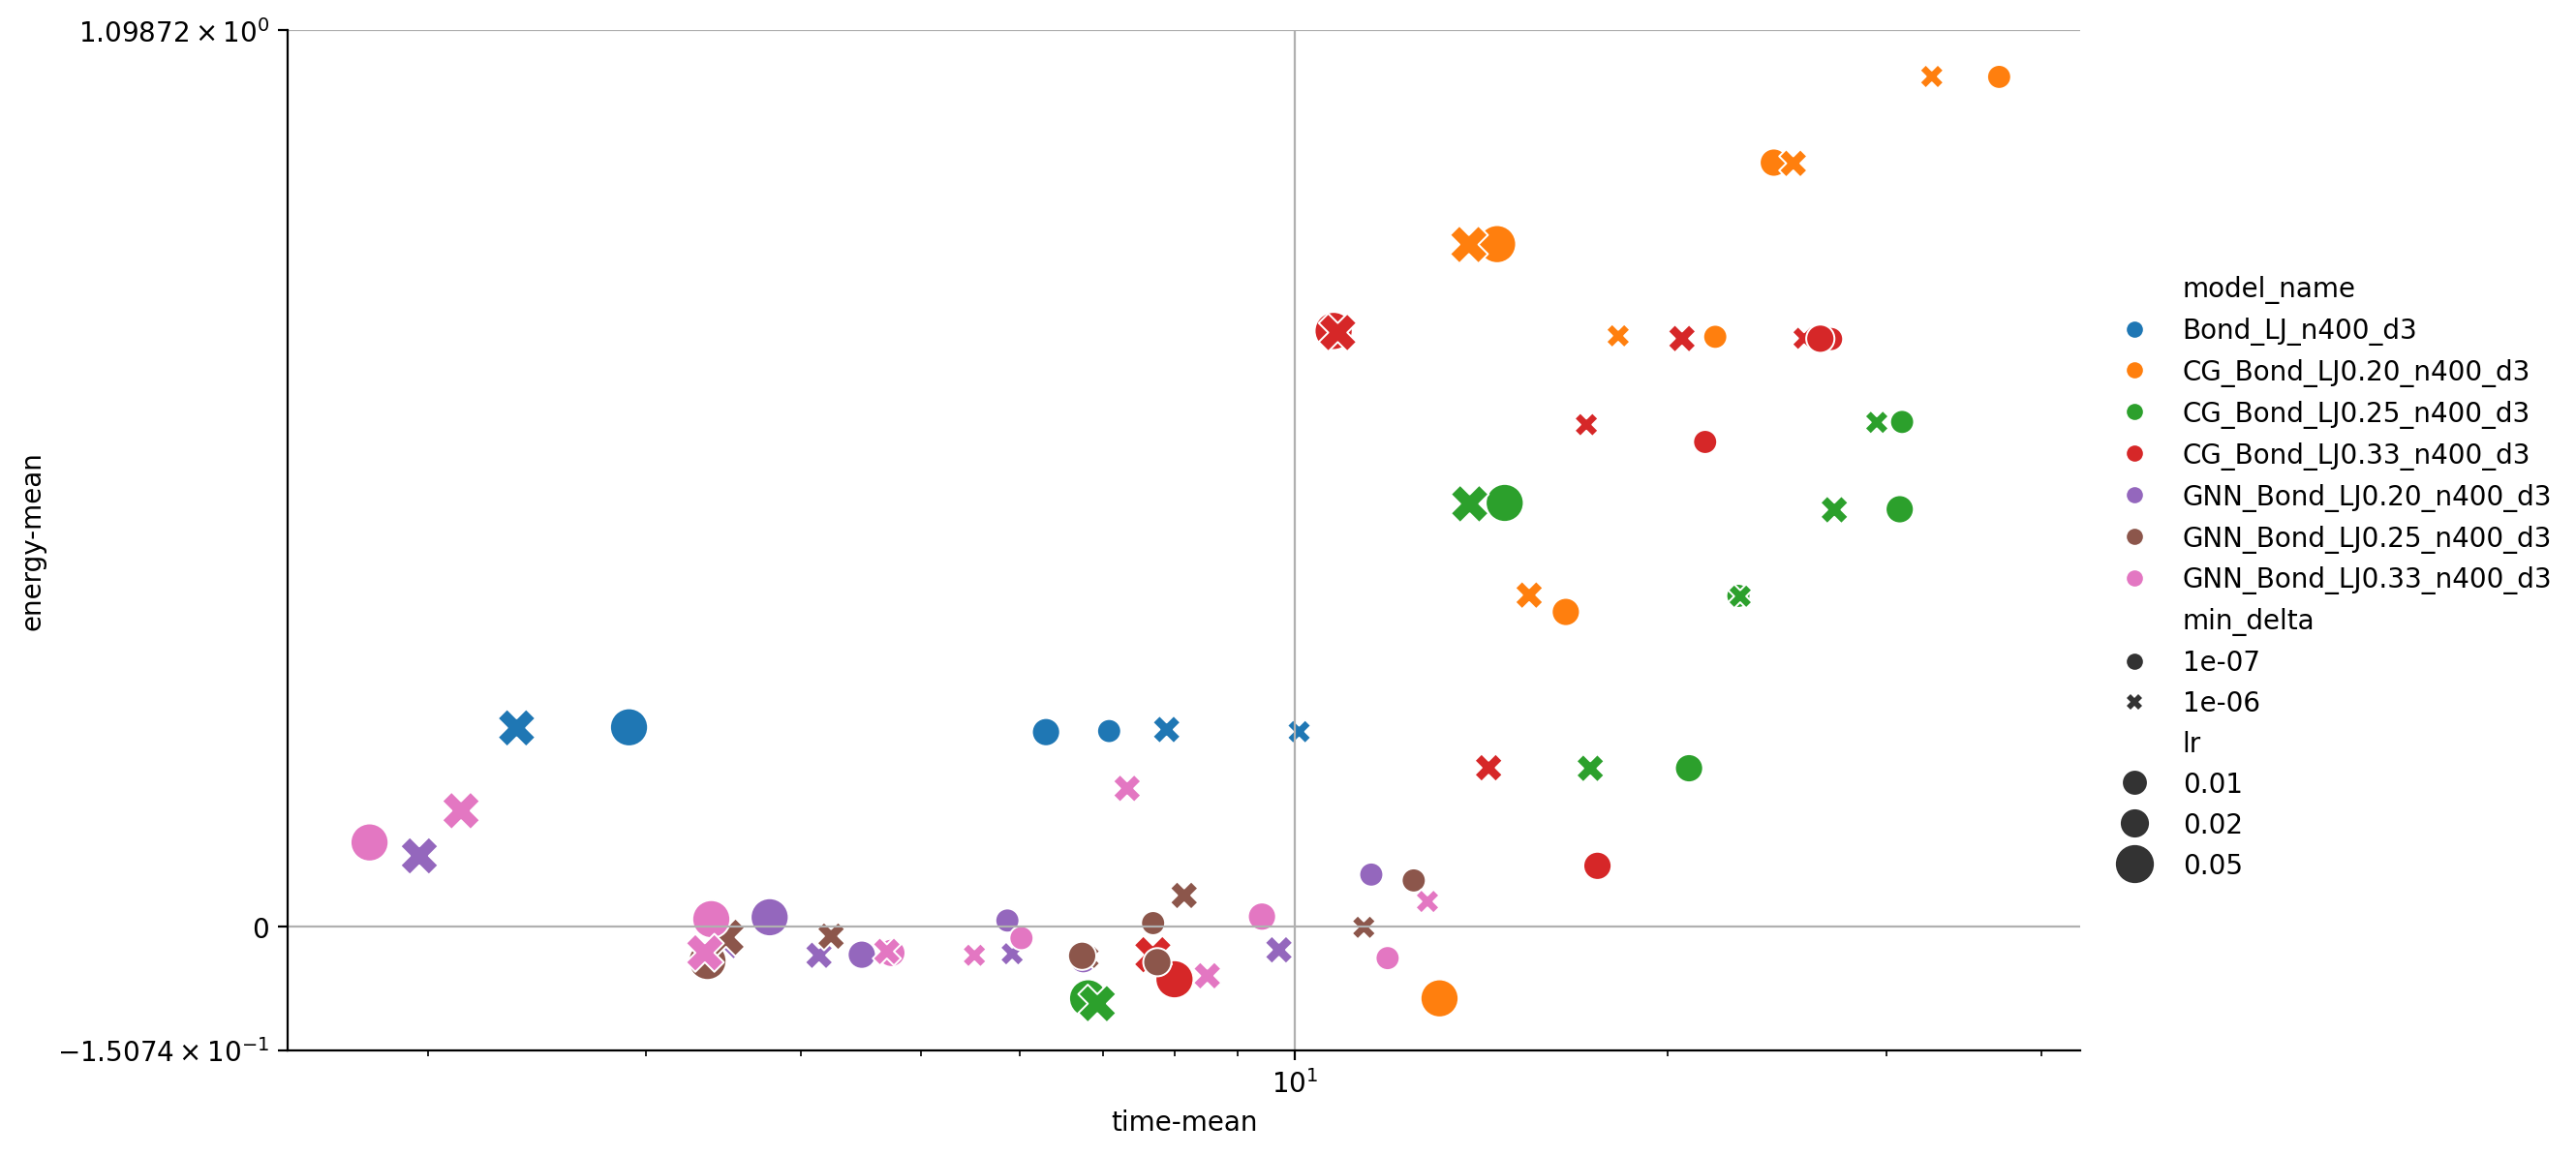

In [144]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

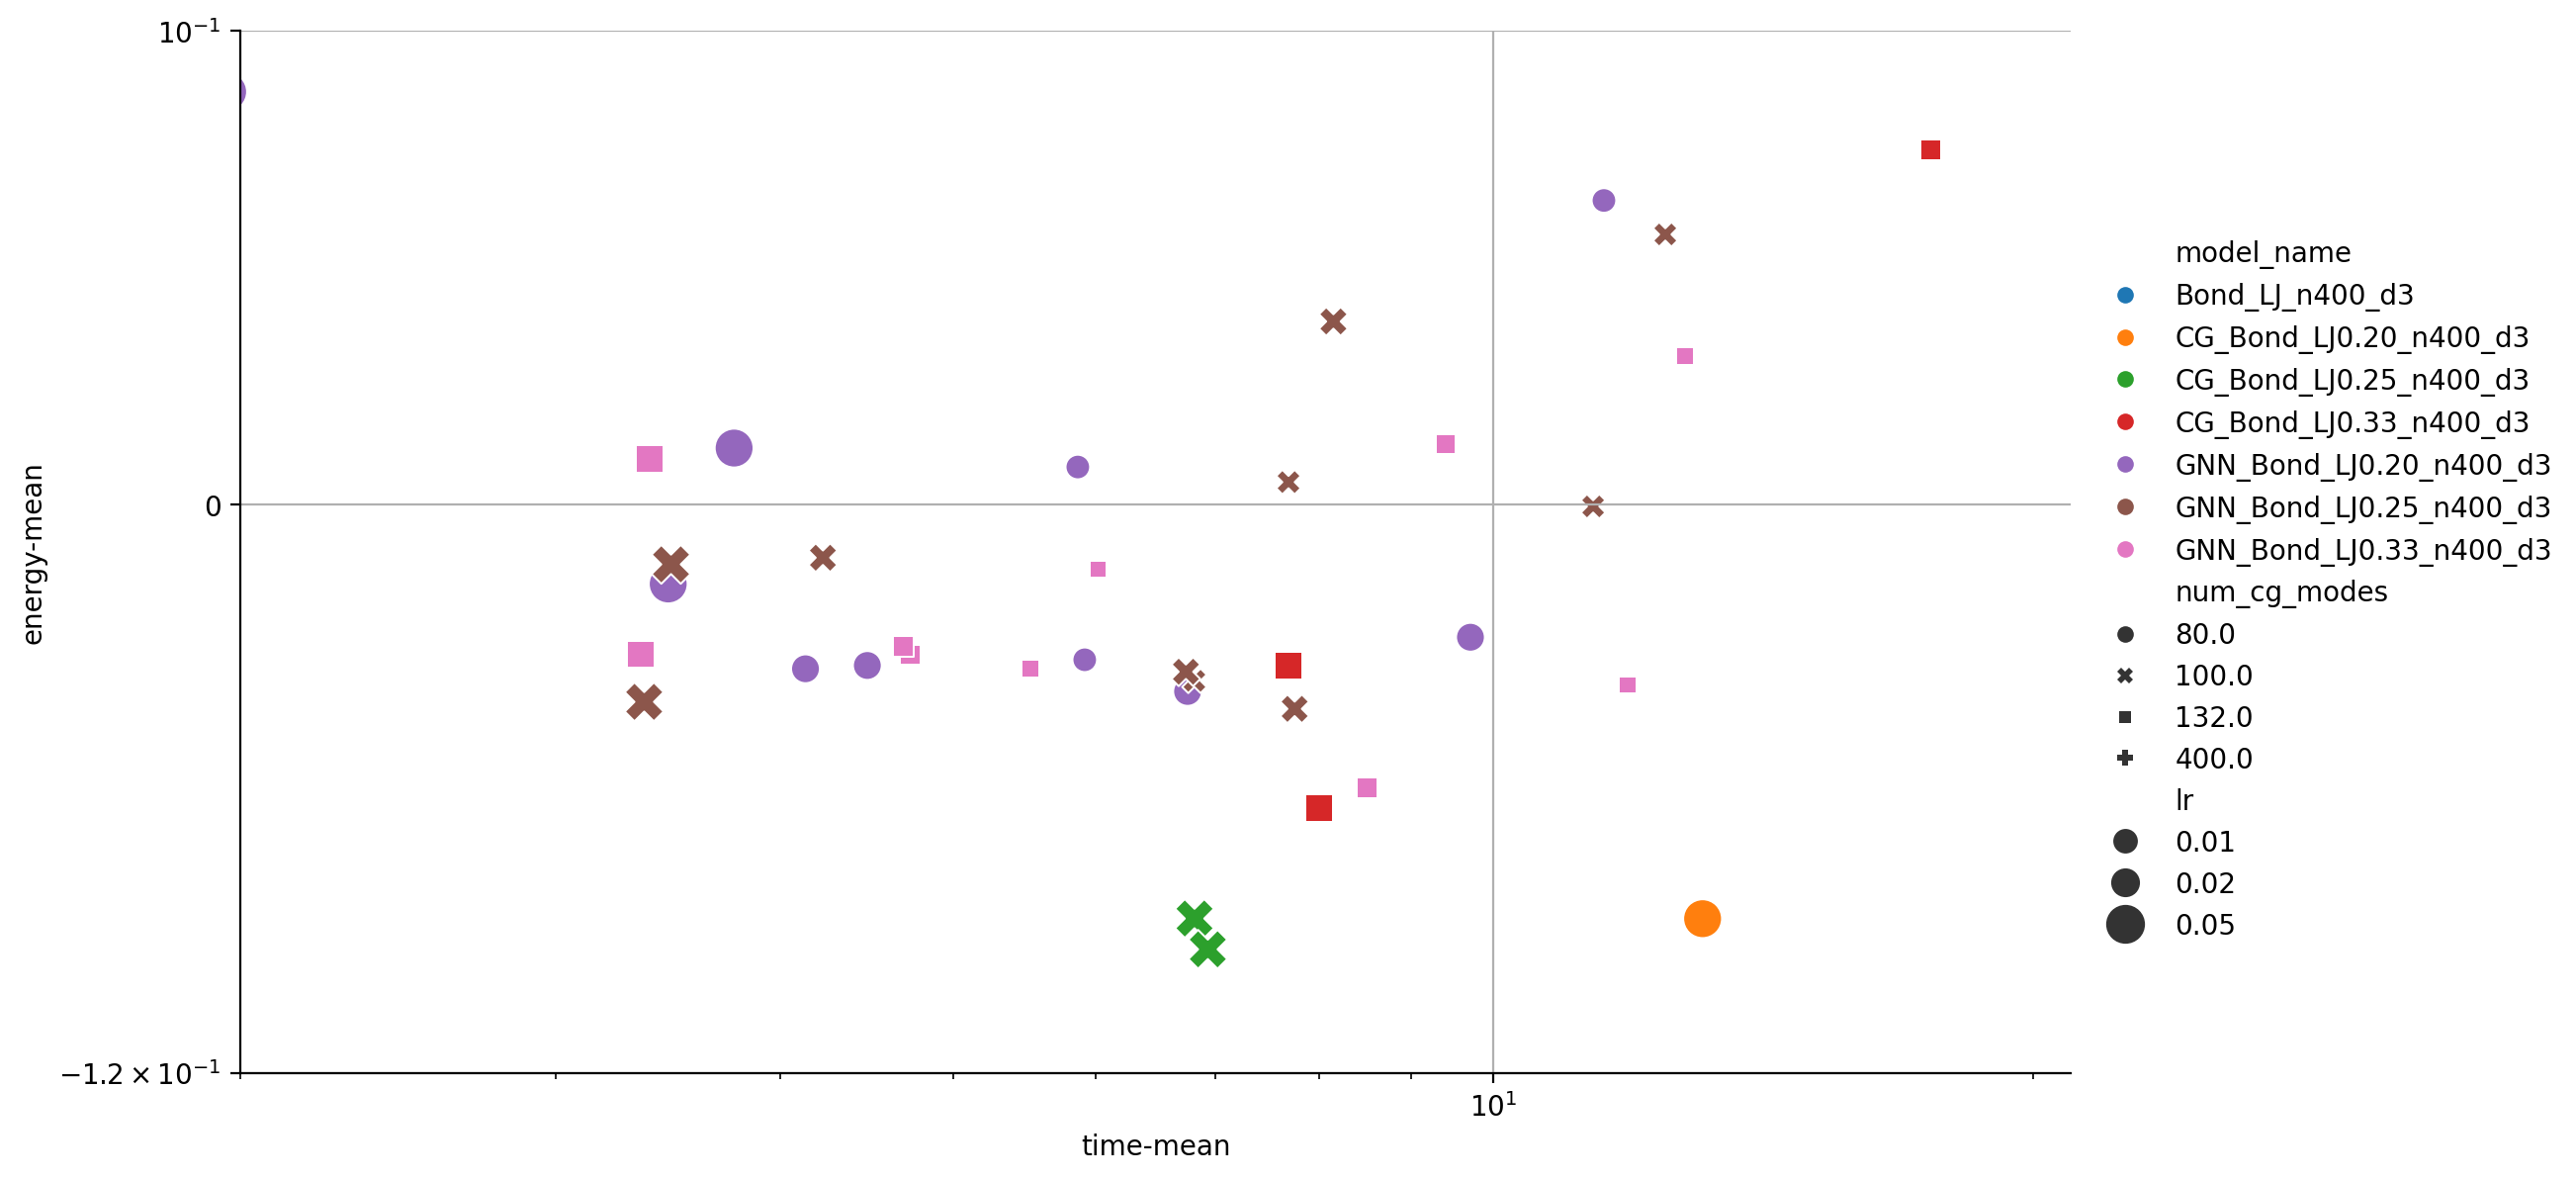

In [145]:
# Flatten the column names

# Now plot with the flattened column names
sns.relplot(data=df_filtered, x='time-mean', y='energy-mean', hue='model_name',style='num_cg_modes', size='lr',
            kind='scatter', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.12, .10)
plt.xlim(2,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

In [146]:
# make another df where we take the model_name column and strip everything from "_LJ" to the end of the string and replace _ with a space
df_cleaned = df_filtered.copy()
# remove everything after _LJ in model_name. Ex: 'CG_LJ0.33_n400_d3' -> 'CG' 
# this means, we first need to find where _LJ is in the string, then remove everything after that
df_cleaned['model_name'] = df_cleaned['model_name'].apply(lambda x: x[:x.find('Bond_LJ')].replace('_', ' ') or "Adam")

In [147]:
df_cleaned

index model_name    lr     min_delta  num_cg_modes  lr_cg  hidden_dims  \
0       0       Adam  0.01  1.000000e-07         400.0    NaN          NaN   
1       1       Adam  0.01  1.000000e-06         400.0    NaN          NaN   
2       2       Adam  0.02  1.000000e-07         400.0    NaN          NaN   
3       3       Adam  0.02  1.000000e-06         400.0    NaN          NaN   
4       4       Adam  0.05  1.000000e-07         400.0    NaN          NaN   
..    ...        ...   ...           ...           ...    ...          ...   
69    105       GNN   0.02  1.000000e-06         132.0  0.020    [8, 4, 3]   
70    106       GNN   0.05  1.000000e-07         132.0  0.005  [32, 16, 3]   
71    109       GNN   0.05  1.000000e-07         132.0  0.050    [8, 4, 3]   
72    110       GNN   0.05  1.000000e-06         132.0  0.005  [32, 16, 3]   
73    113       GNN   0.05  1.000000e-06         132.0  0.050    [8, 4, 3]   

    energy-mean  energy-std  time-mean  time-std  energy_mean  energy_std  \
0      0.239989    0.001858   7.085380  2.150125     0.239989    0.001858   
1      0.239260    0.002345  10.083259  3.301501     0.239260    0.002345   
2      0.238705    0.002149   6.301677  2.231569     0.238705    0.002149   
3      0.241878    0.004612   7.884045  1.981954     0.241878    0.004612   
4      0.244587    0.001987   2.904738  0.634405     0.244587    0.001987   
..          ...         ...        ...       ...          ...         ...   
69     0.169767    0.116026   7.326153  3.298457     0.169767    0.116026   
70     0.009590    0.058958   3.384293  0.359979     0.009590    0.058958   
71     0.103540    0.100937   1.793974  0.745505     0.103540    0.100937   
72    -0.031653    0.052676   3.343983  0.757289    -0.031653    0.052676   
73     0.142383    0.125467   2.126317  0.738173     0.142383    0.125467   

    time_mean  time_std  
0    7.085380  2.150125  
1   10.083259  3.301501  
2    6.301677  2.231569  
3    7.884045  1.981954  
4    2.904738  0.634405  
..        ...       ...  
69   7.326153  3.298457  
70   3.384293  0.359979  
71   1.793974  0.745505  
72   3.343983  0.757289  
73   2.126317  0.738173  

[74 rows x 15 columns]

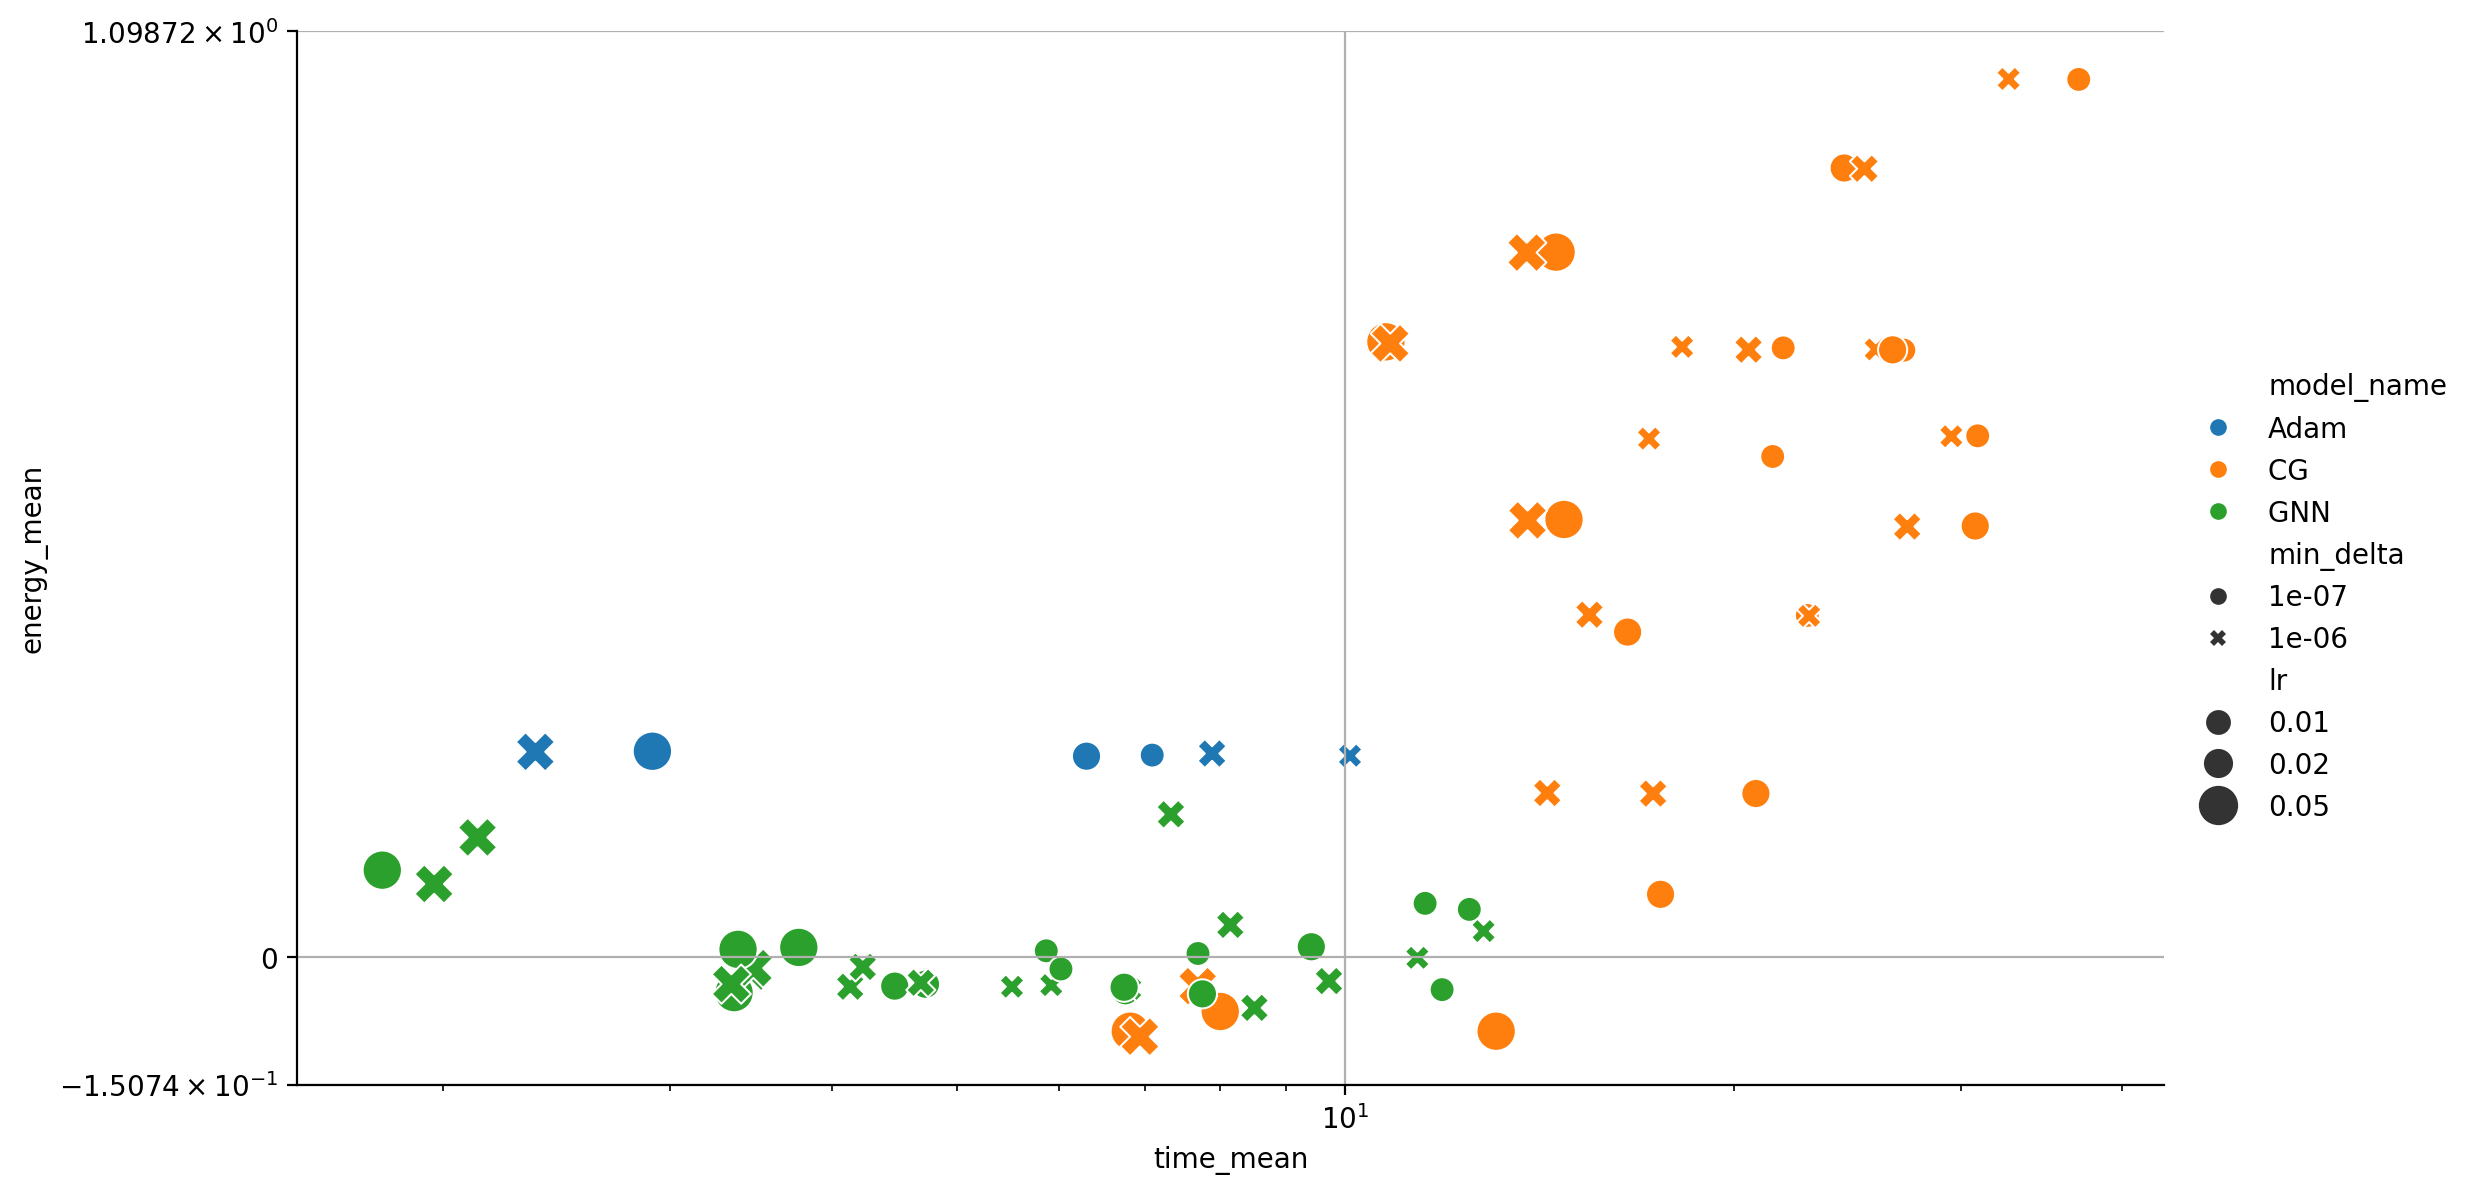

In [148]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', hue='model_name', style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

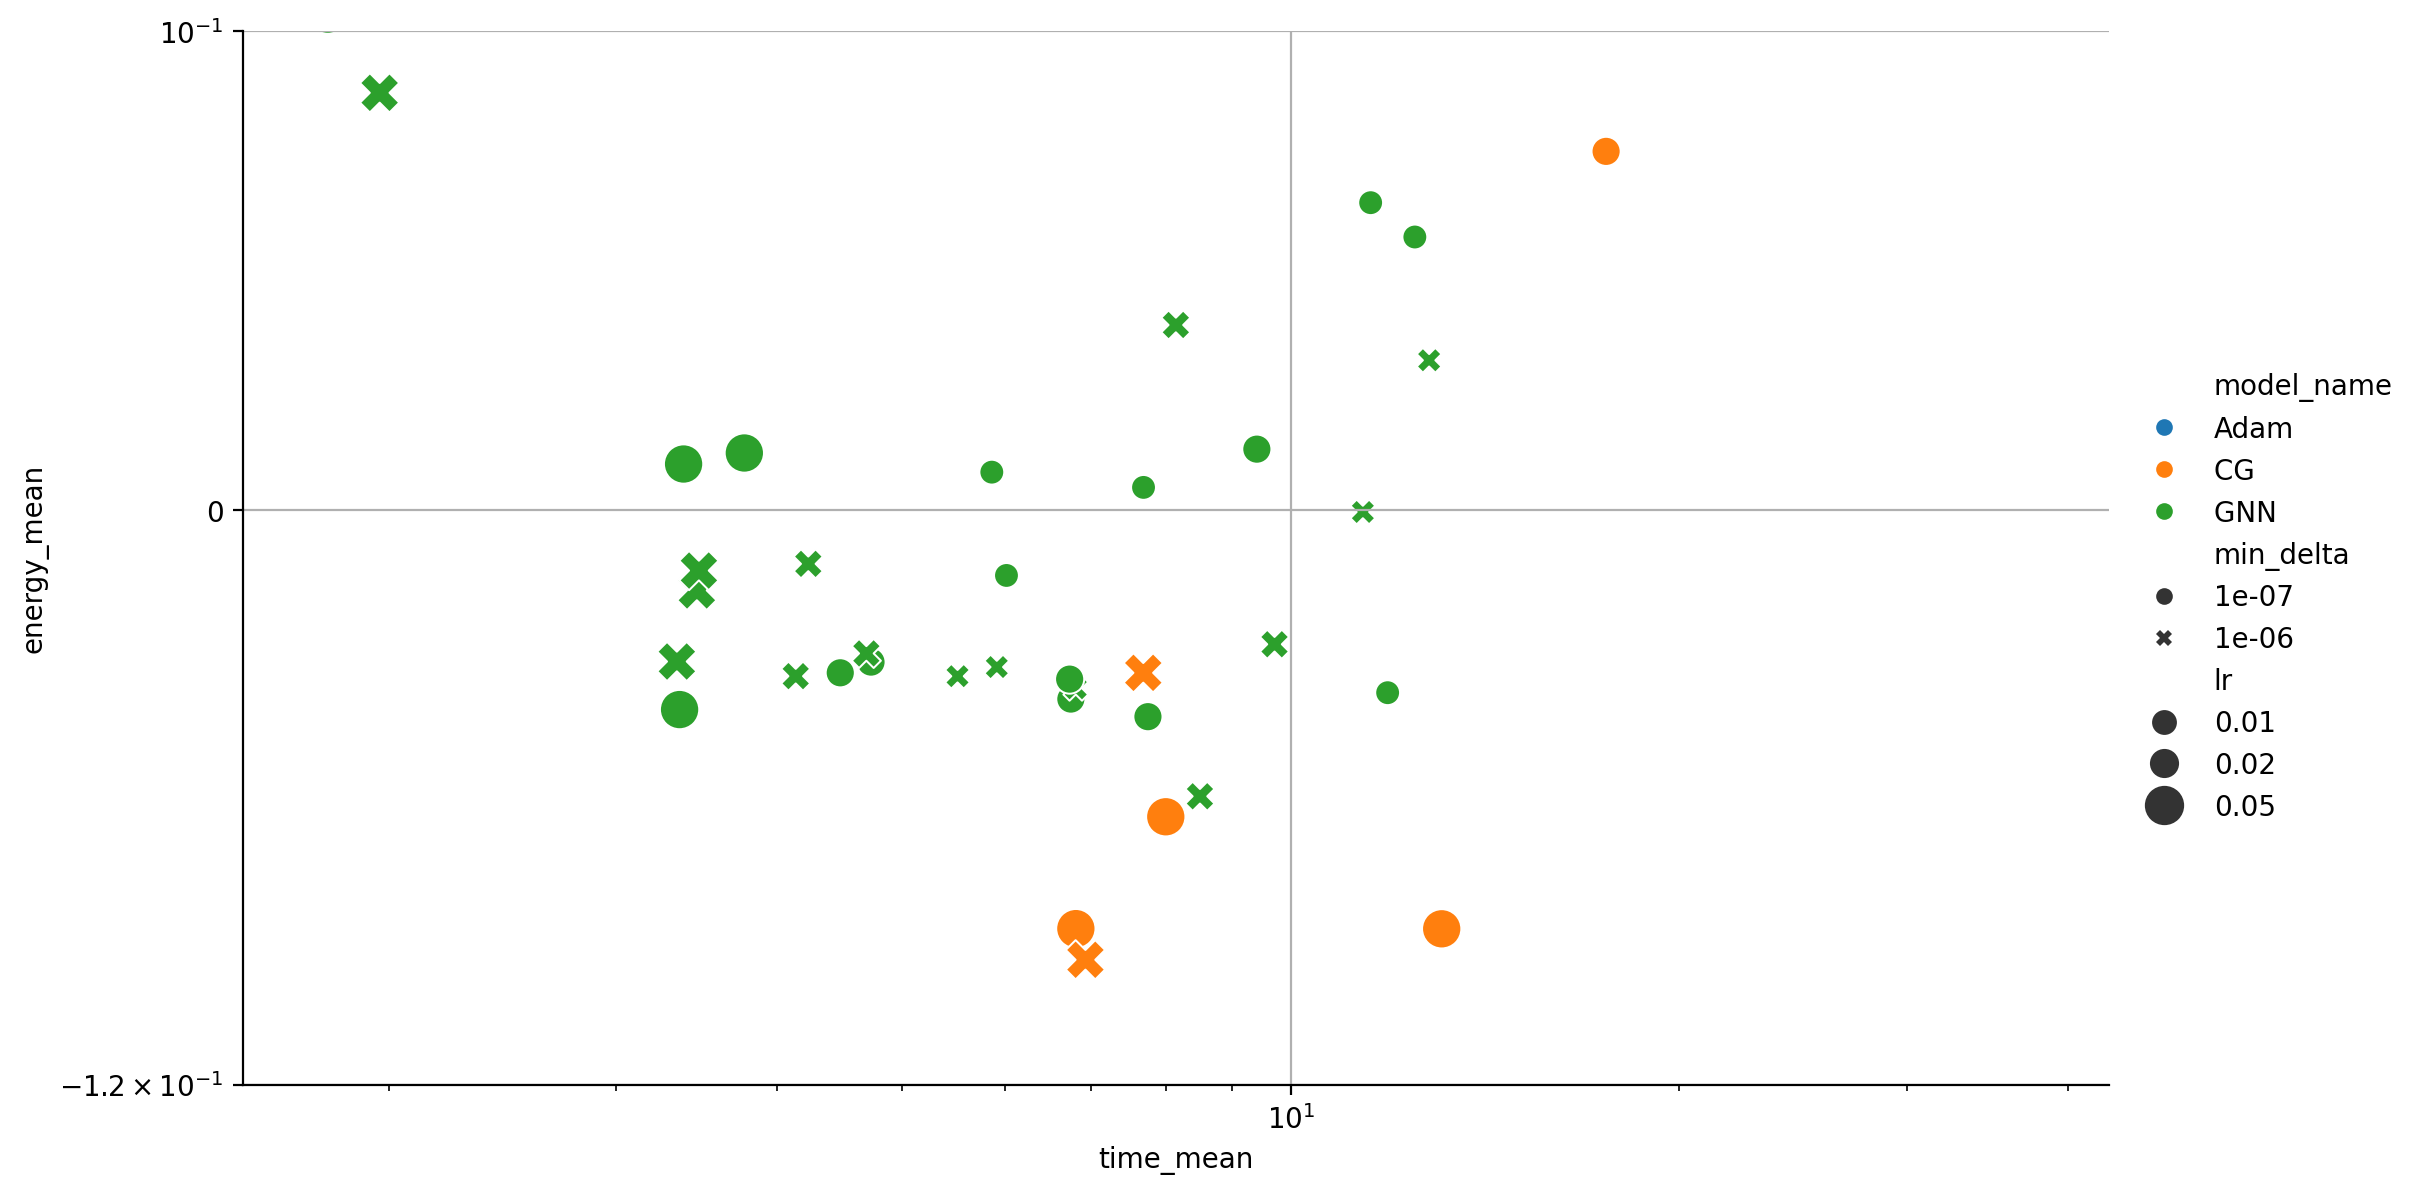

In [149]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

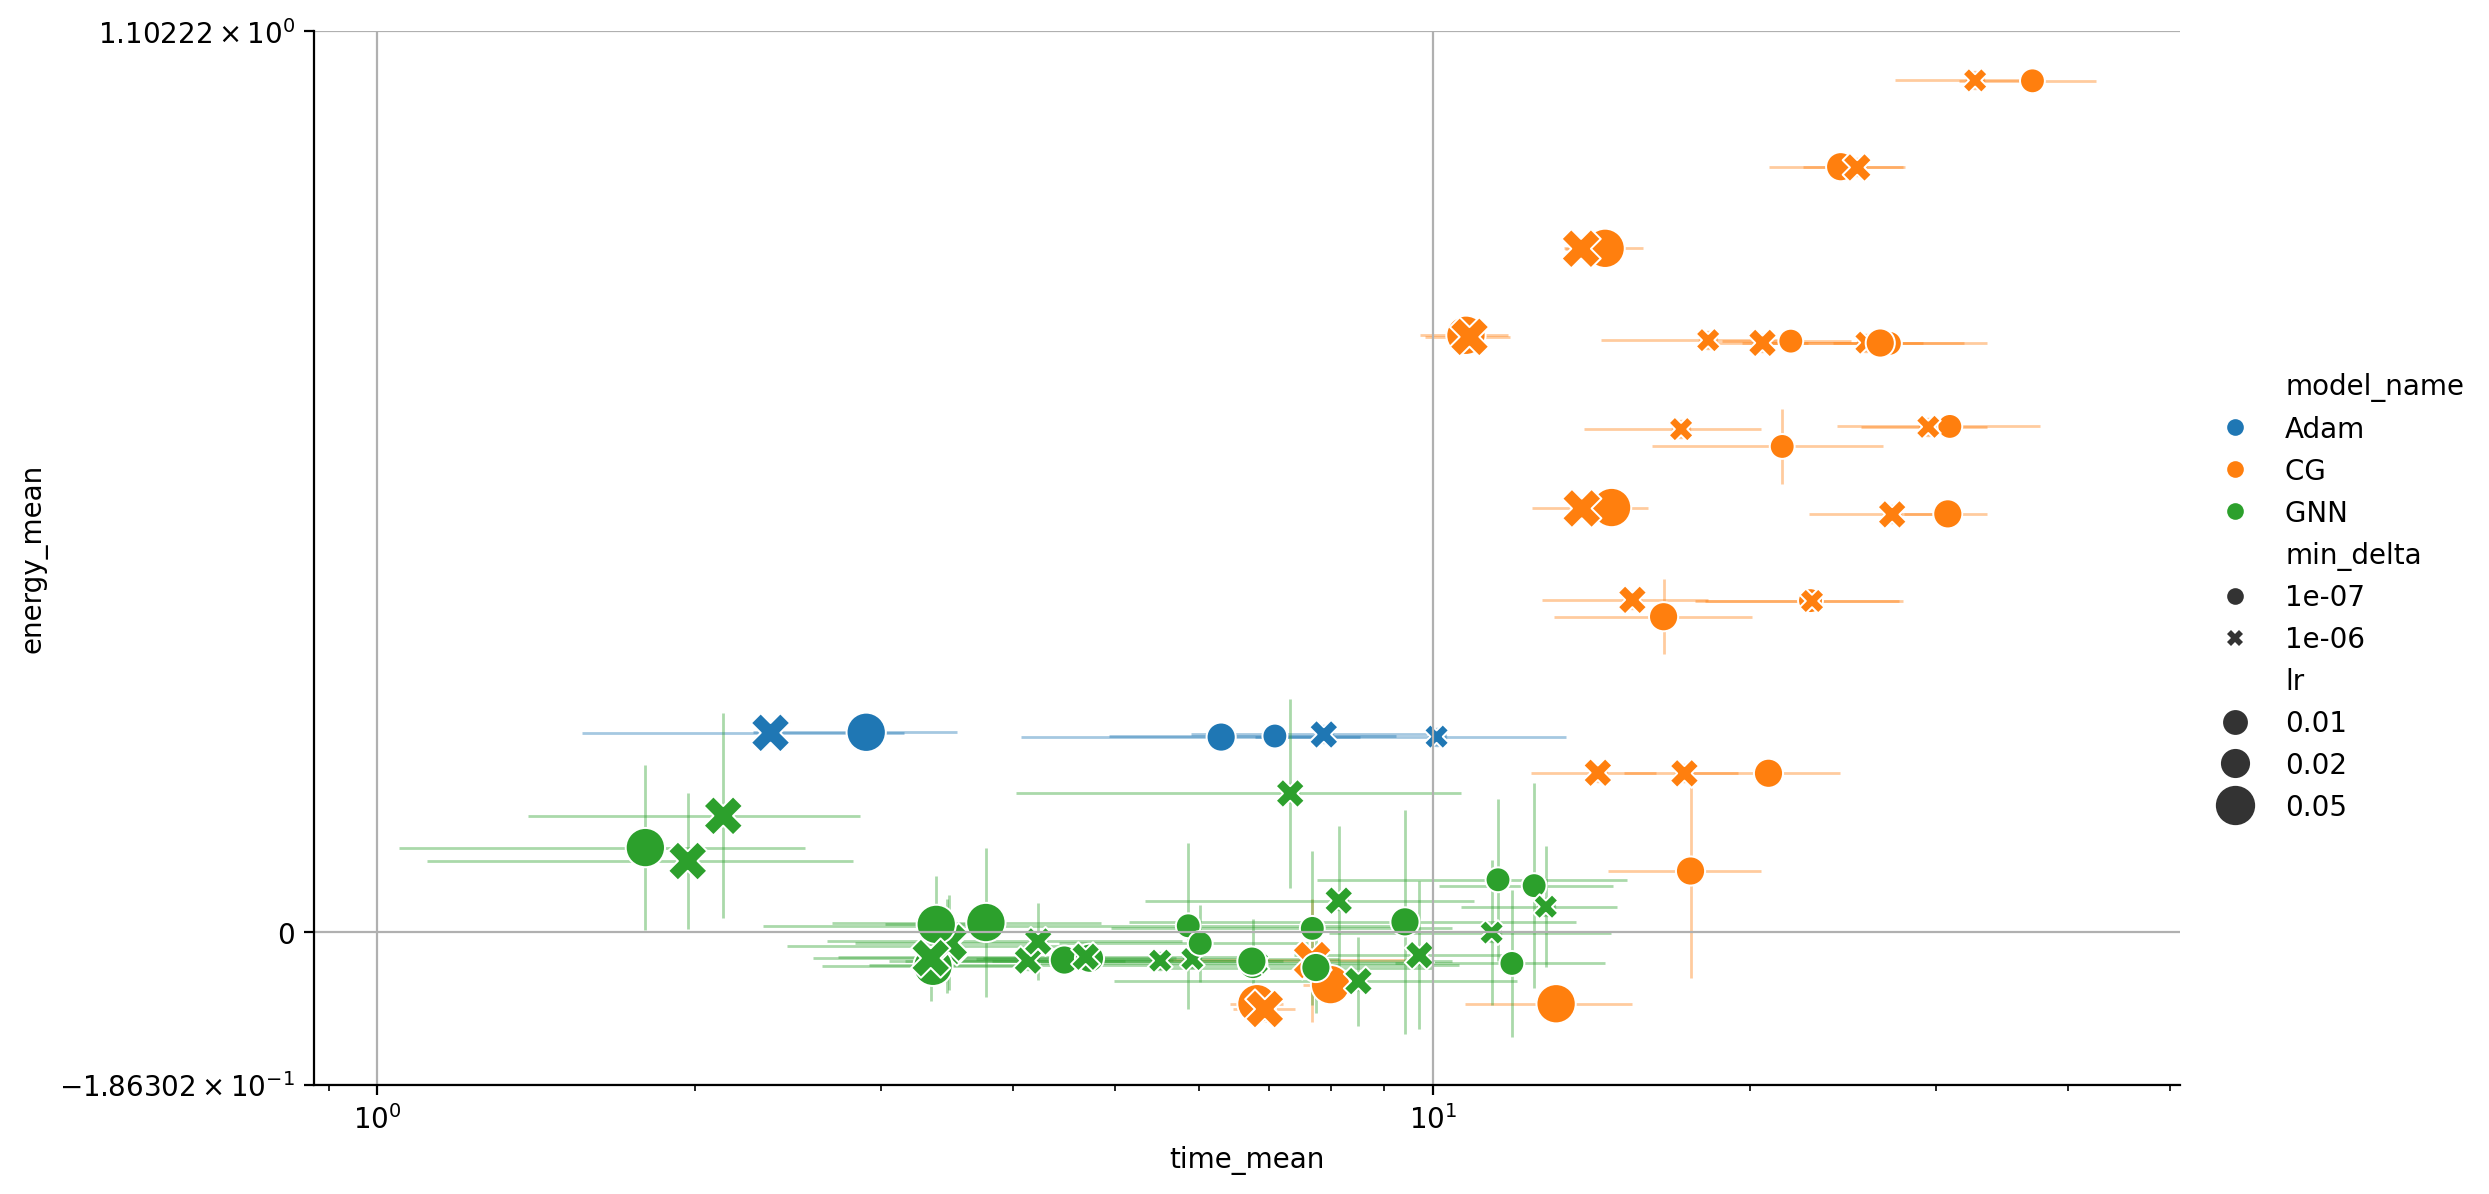

In [150]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.12, .10)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

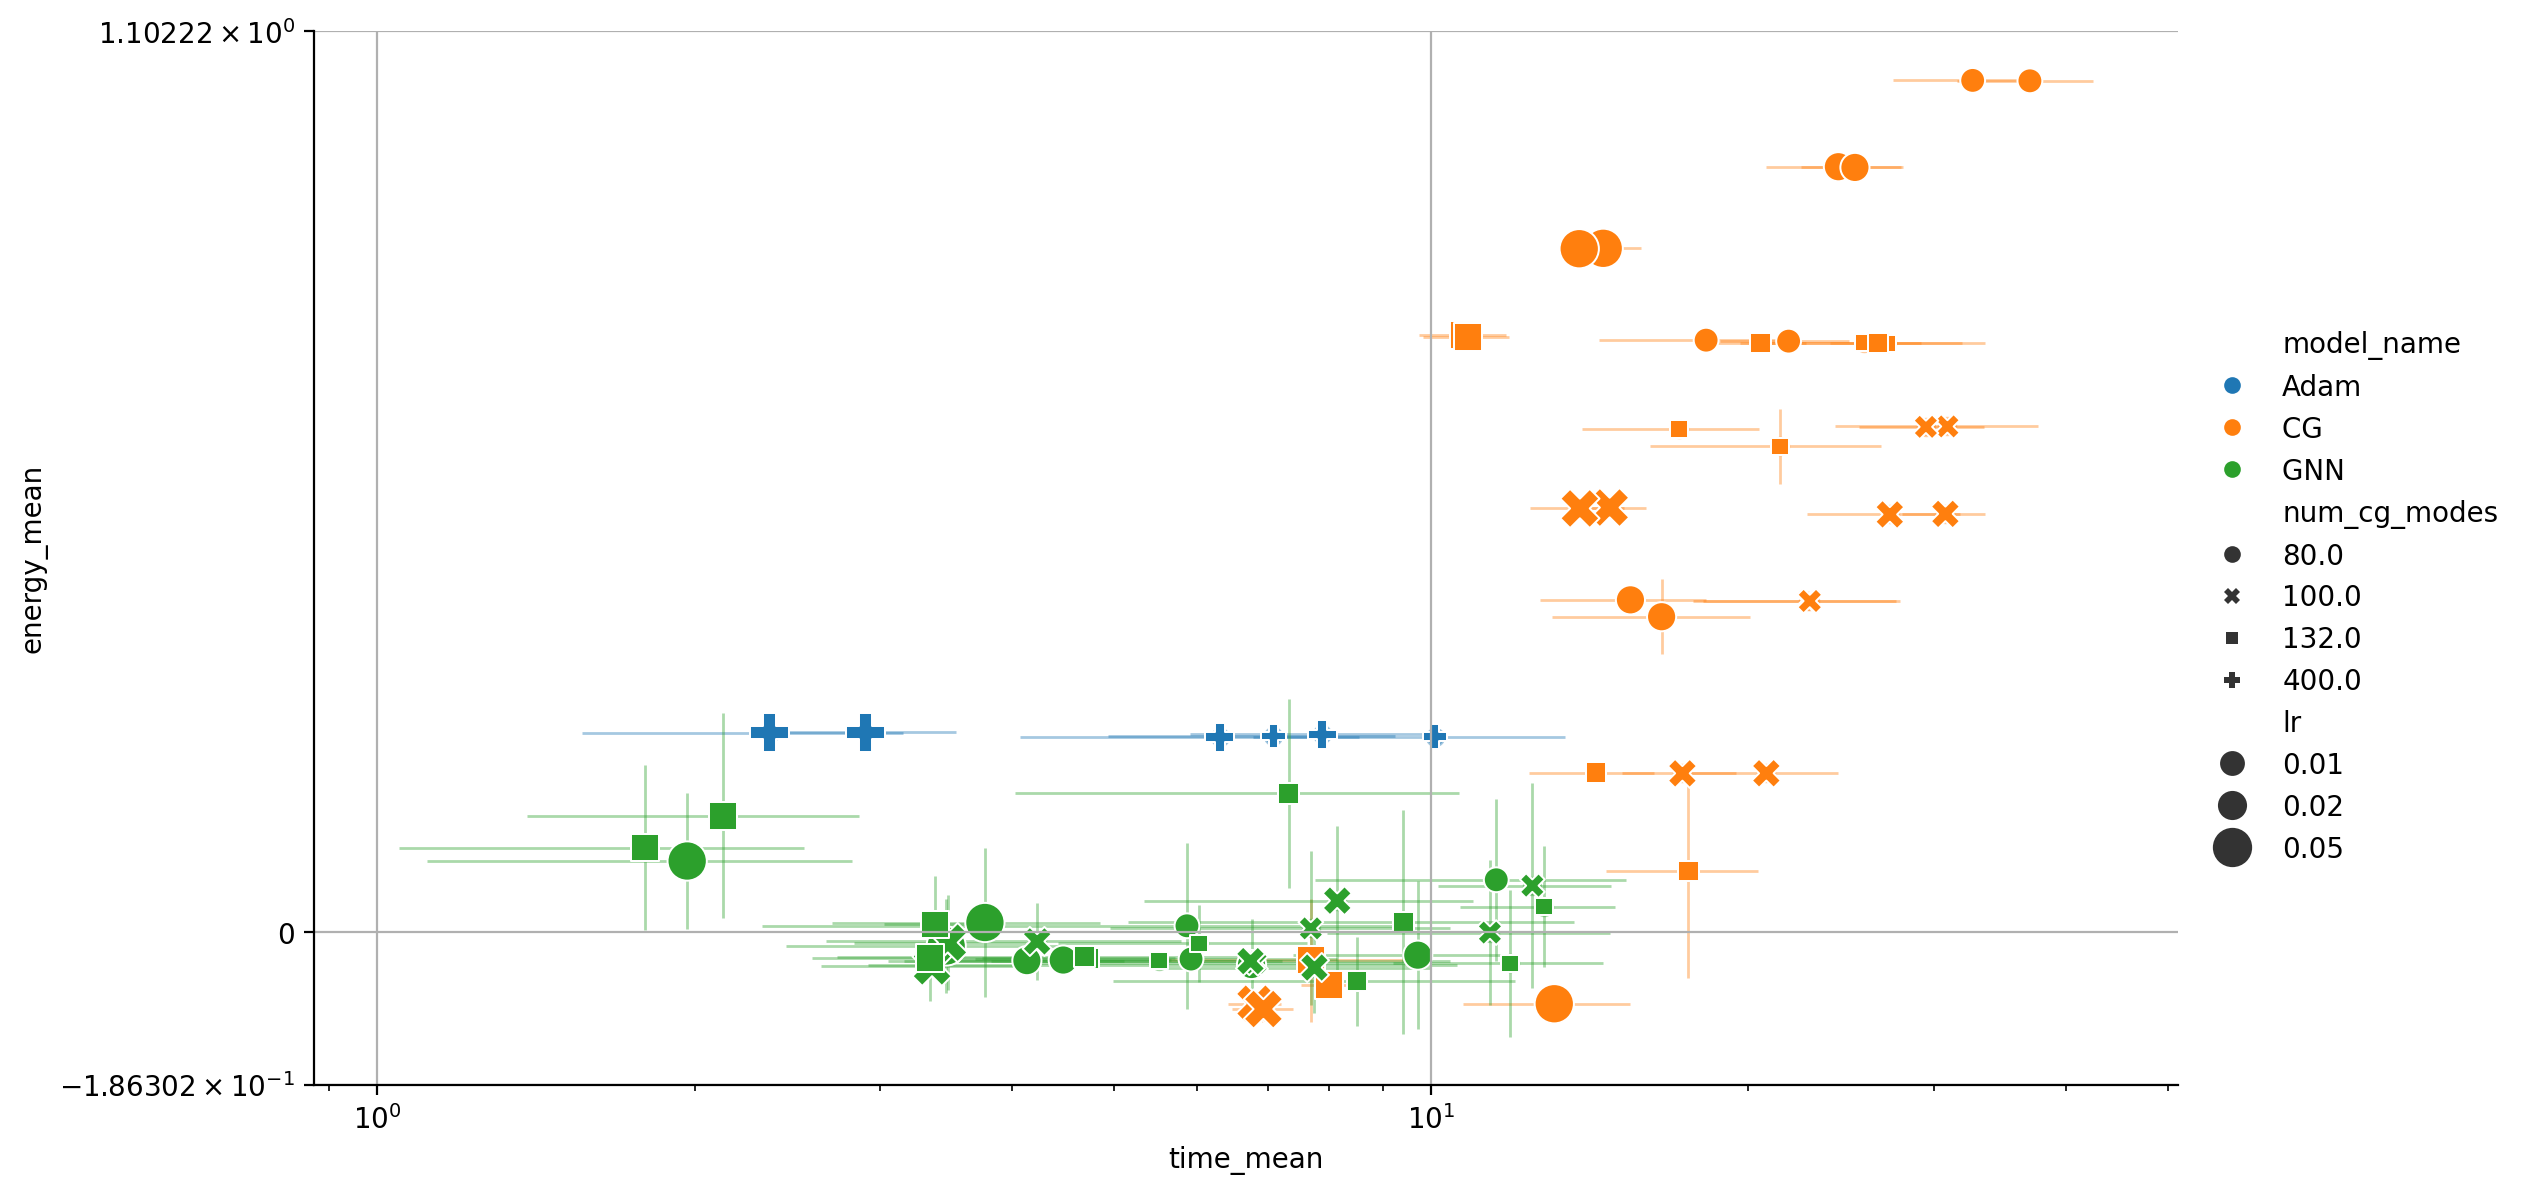

In [151]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

# plt.ylim(-.12, .10)
# # plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

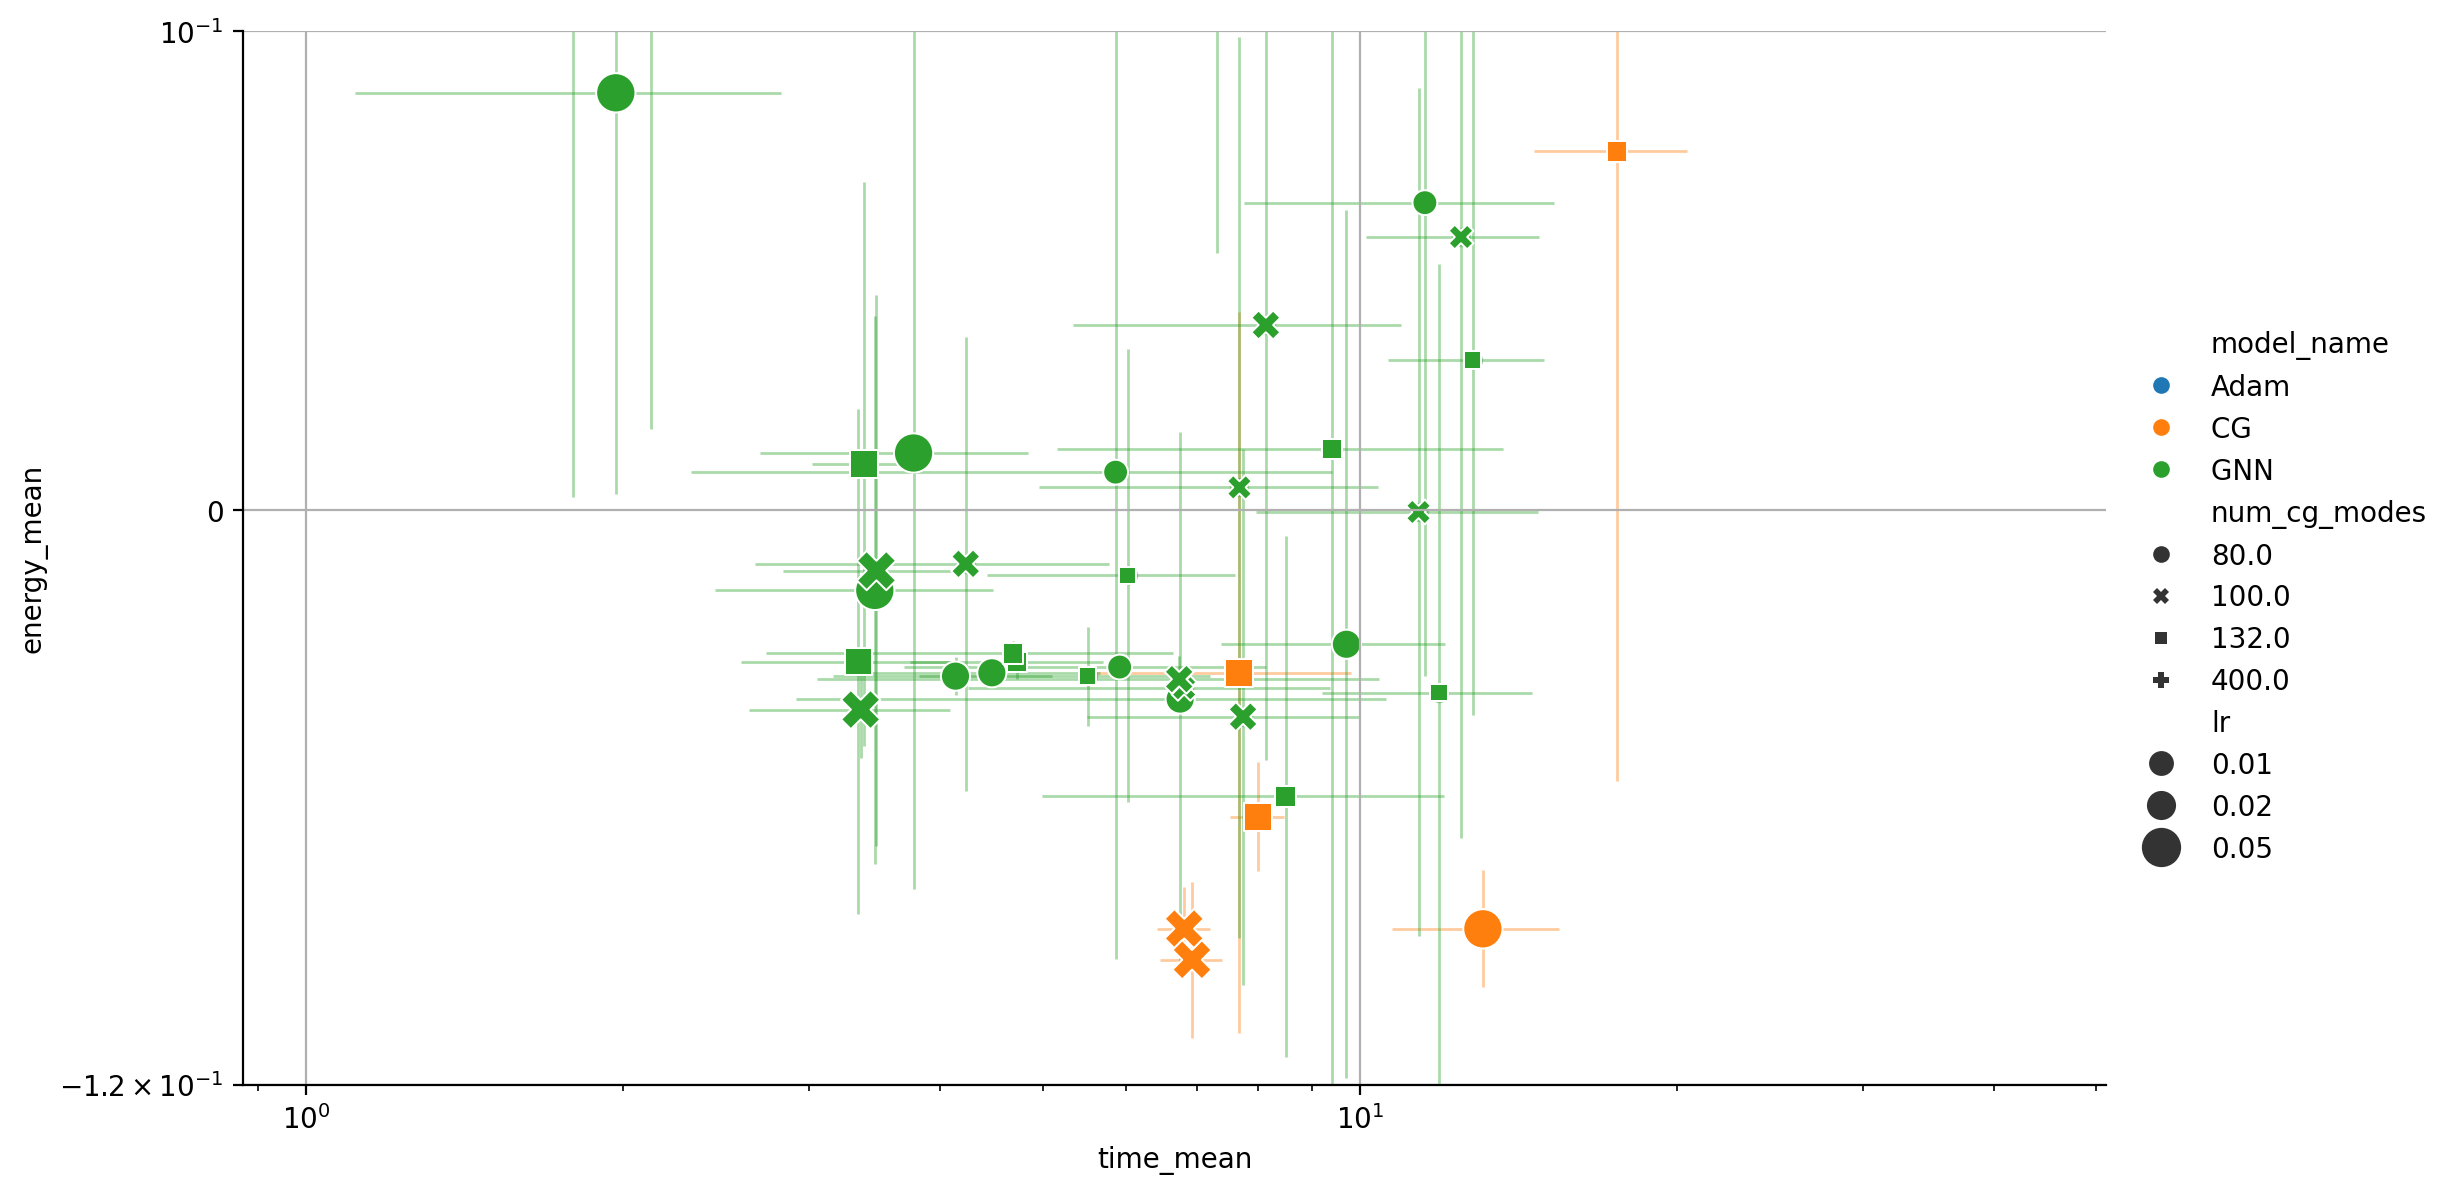

In [152]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time_mean', y='energy_mean', 
            hue='model_name', style='num_cg_modes', 
            kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

# since seaborn's error bars are not working, we will use matplotlib to plot the error bars
# we will use the std to plot the error bars, which are in df_cleaned[['time_std', 'energy_std']] columns
# plt.errorbar(df_cleaned['time_mean'], df_cleaned['energy_mean'], 
#             xerr=df_cleaned['time_std'], yerr=df_cleaned['energy_std'], 
#             color='orange', alpha = .4, lw = 1,
#             fmt='o', zorder = -1)

# we want to set the color of the errorbars to be the same as the color of the markers used by seaborn for that model_name
# we will use the same color palette used by seaborn to color the markers
# we will use the color_palette function from seaborn to get the color palette
# we will use the unique function to get the unique model_names
# we will use the to_dict function to convert the model_names to a dictionary
# we will use the map function to map the model_names to the colors
color_palette = sns.color_palette()
# we will use a for loop to plot the error bars for each model_name separately
# we will use the unique function to get the unique model_names
model_names = df_cleaned['model_name'].unique()
# we will use the model_names to loop over the model_names
for model_name in model_names:
    # we will use the loc function to filter the dataframe by model_name
    df_model = df_cleaned[df_cleaned['model_name'] == model_name]
    # we will use the plt.errorbar function to plot the error bars for the model_name
    plt.errorbar(df_model['time_mean'], df_model['energy_mean'], 
                xerr=df_model['time_std'], yerr=df_model['energy_std'], 
                color=model_color_dict[model_name], alpha = .4, lw = 1,
                fmt='o', zorder = -1)

plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

# By type of model

In [20]:
# make another df where we take the model_name column and strip everything from "_LJ" to the end of the string and replace _ with a space
df_cleaned = df.copy()
# remove everything after _LJ in model_name. Ex: 'CG_LJ0.33_n400_d3' -> 'CG' 
# this means, we first need to find where _LJ is in the string, then remove everything after that
df_cleaned['model_name'] = df_cleaned['model_name'].apply(lambda x: x[:x.find('Bond_LJ')].replace('_', ' ') or "Adam")

In [21]:
df_cleaned

energy_function model_name    energy       time    lr  clamp_grads  \
0    Energy_LJ_2scale       Adam  0.247403   1.392278  0.05          0.1   
1    Energy_LJ_2scale        CG   0.727117   9.580374  0.05          0.1   
2    Energy_LJ_2scale       GNN   0.327568  10.335653  0.05          0.1   
3    Energy_LJ_2scale       GNN  -0.053740   3.725070  0.05          0.1   
4    Energy_LJ_2scale        CG   0.518101  14.386985  0.05          0.1   
..                ...        ...       ...        ...   ...          ...   
565  Energy_LJ_2scale       GNN   0.378161   9.386935  0.01          0.1   
566  Energy_LJ_2scale       GNN  -0.035773   7.855705  0.01          0.1   
567  Energy_LJ_2scale        CG   0.723125  19.358500  0.01          0.1   
568  Energy_LJ_2scale       GNN   0.642706  10.697762  0.01          0.1   
569  Energy_LJ_2scale       GNN  -0.040278   5.829245  0.01          0.1   

     patience     min_delta    x0_std  num_nodes  lr_cg  cg_patience  \
0          20  1.000000e-06  1.838327        400    NaN          NaN   
1          20  1.000000e-06  1.838327        400  0.050         20.0   
2          20  1.000000e-06  1.838327        400  0.005         20.0   
3          20  1.000000e-06  1.838327        400  0.005         20.0   
4          20  1.000000e-06  1.838327        400  0.050         20.0   
..        ...           ...       ...        ...    ...          ...   
565        20  1.000000e-07  1.838327        400  0.010         20.0   
566        20  1.000000e-07  1.838327        400  0.010         20.0   
567        20  1.000000e-07  1.838327        400  0.100         20.0   
568        20  1.000000e-07  1.838327        400  0.010         20.0   
569        20  1.000000e-07  1.838327        400  0.010         20.0   

     cg_min_delta  cg_steps    cg_time  cg_energy  num_cg_modes  hidden_dims  
0             NaN       NaN        NaN        NaN           NaN          NaN  
1        0.000010     527.0   8.515158   0.749255           NaN          NaN  
2        0.000010     422.0   8.722153   0.328345         133.0    [8, 4, 3]  
3        0.000010      34.0   1.192533  -0.018955         133.0  [32, 16, 3]  
4        0.000010     822.0  13.196695   0.542127           NaN          NaN  
..            ...       ...        ...        ...           ...          ...  
565      0.000001     220.0   4.761004   0.396002         100.0    [8, 4, 3]  
566      0.000001      26.0   1.015844  -0.003536         100.0  [32, 16, 3]  
567      0.000001     635.0  10.377081   0.760114           NaN          NaN  
568      0.000001     398.0   8.248155   0.643227          80.0    [8, 4, 3]  
569      0.000001      27.0   1.042117  -0.006536          80.0  [32, 16, 3]  

[570 rows x 18 columns]

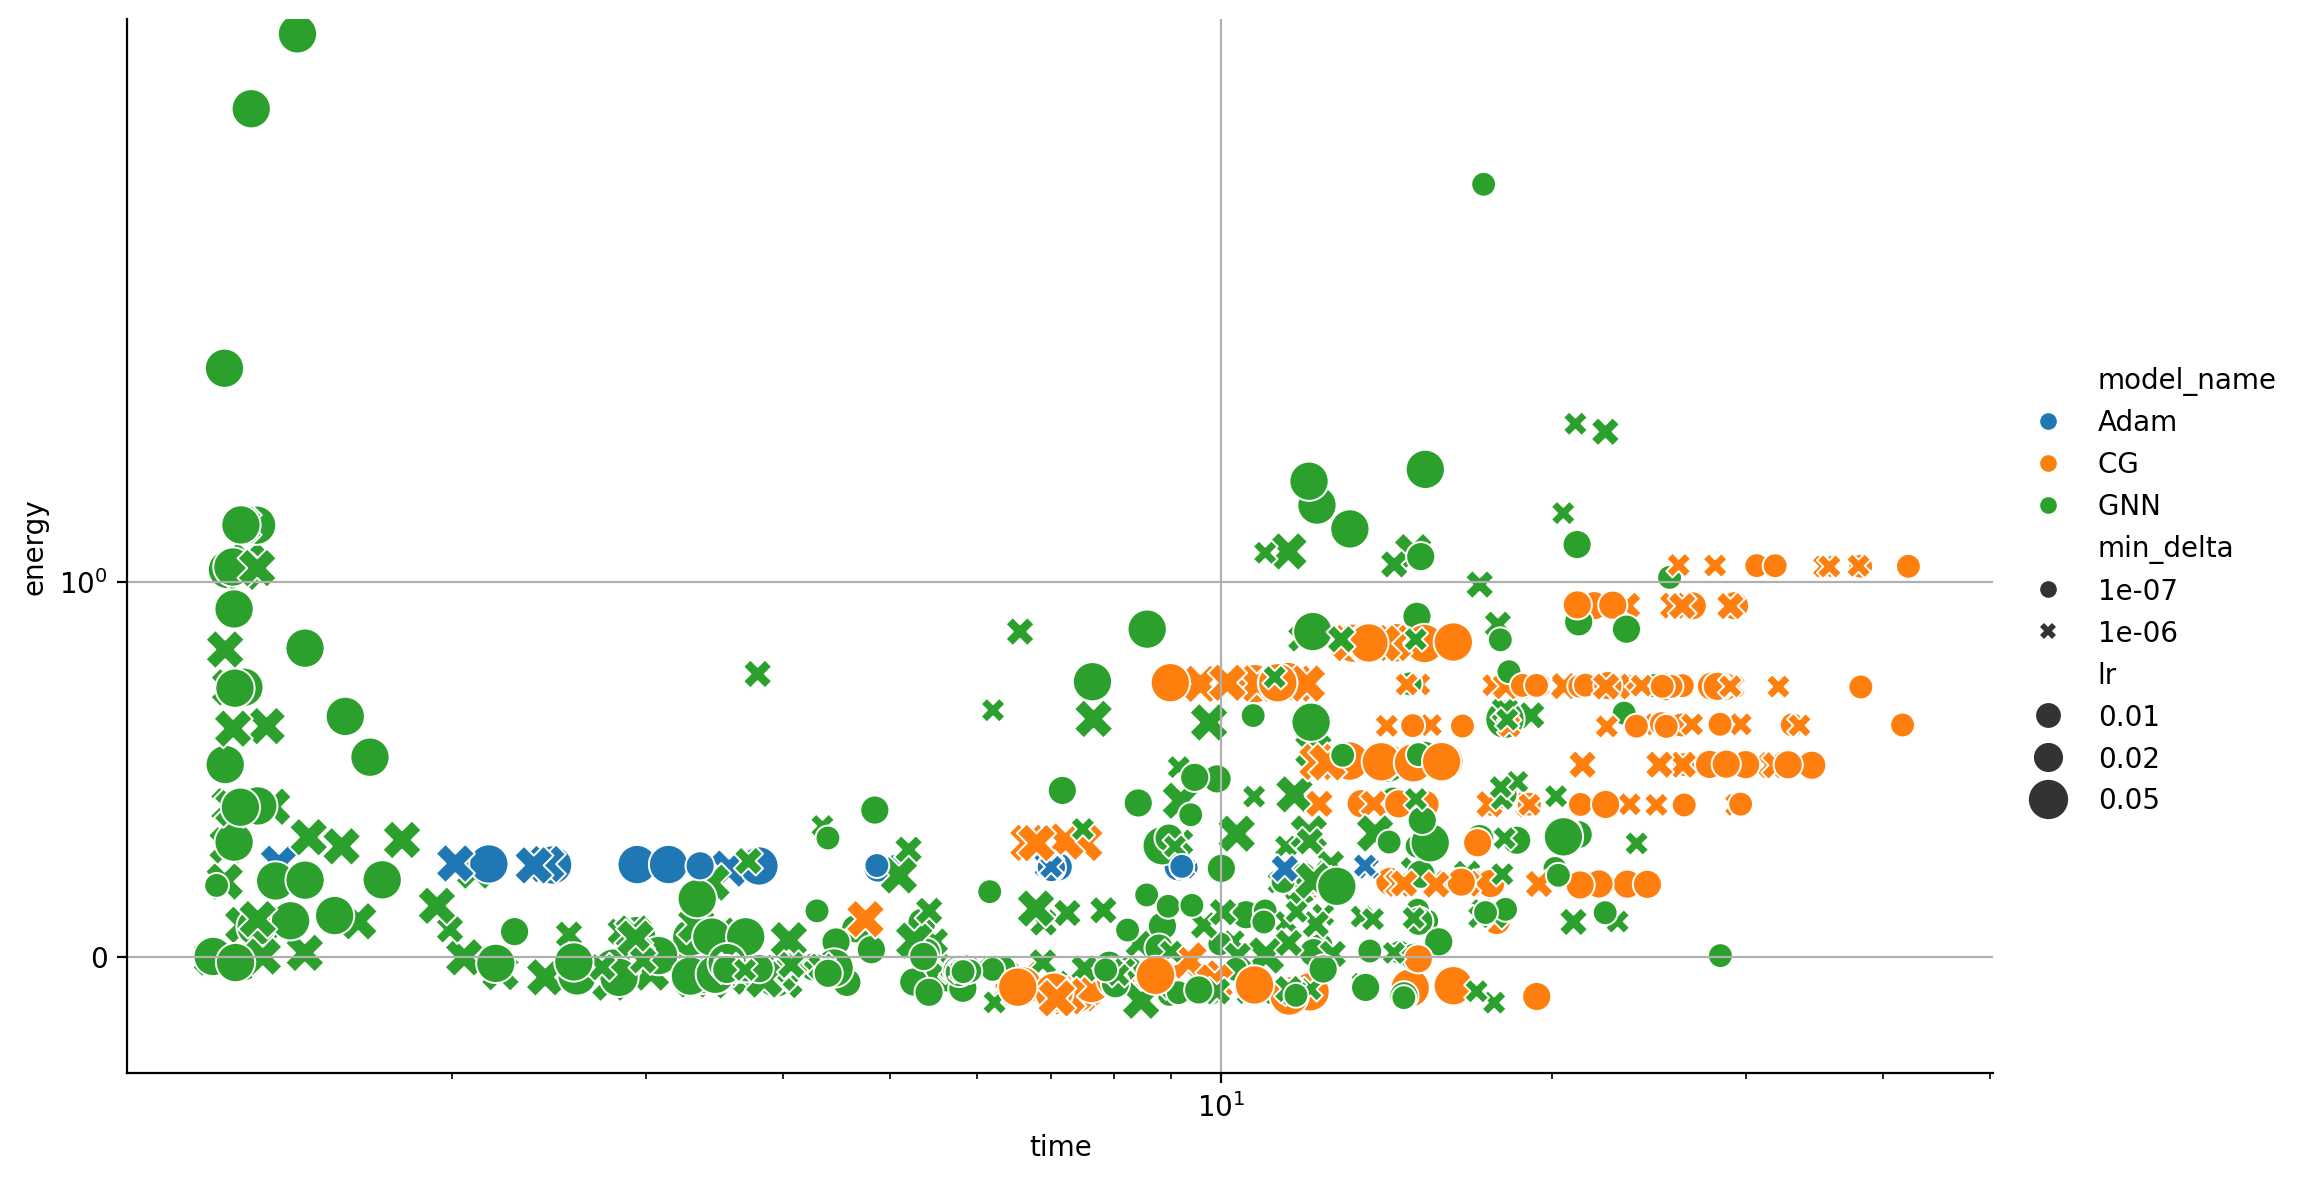

In [23]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time', y='energy', hue='model_name', style='min_delta', kind='scatter', size='lr',
            height=6, aspect=1.7, sizes=(80, 200))

# plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()

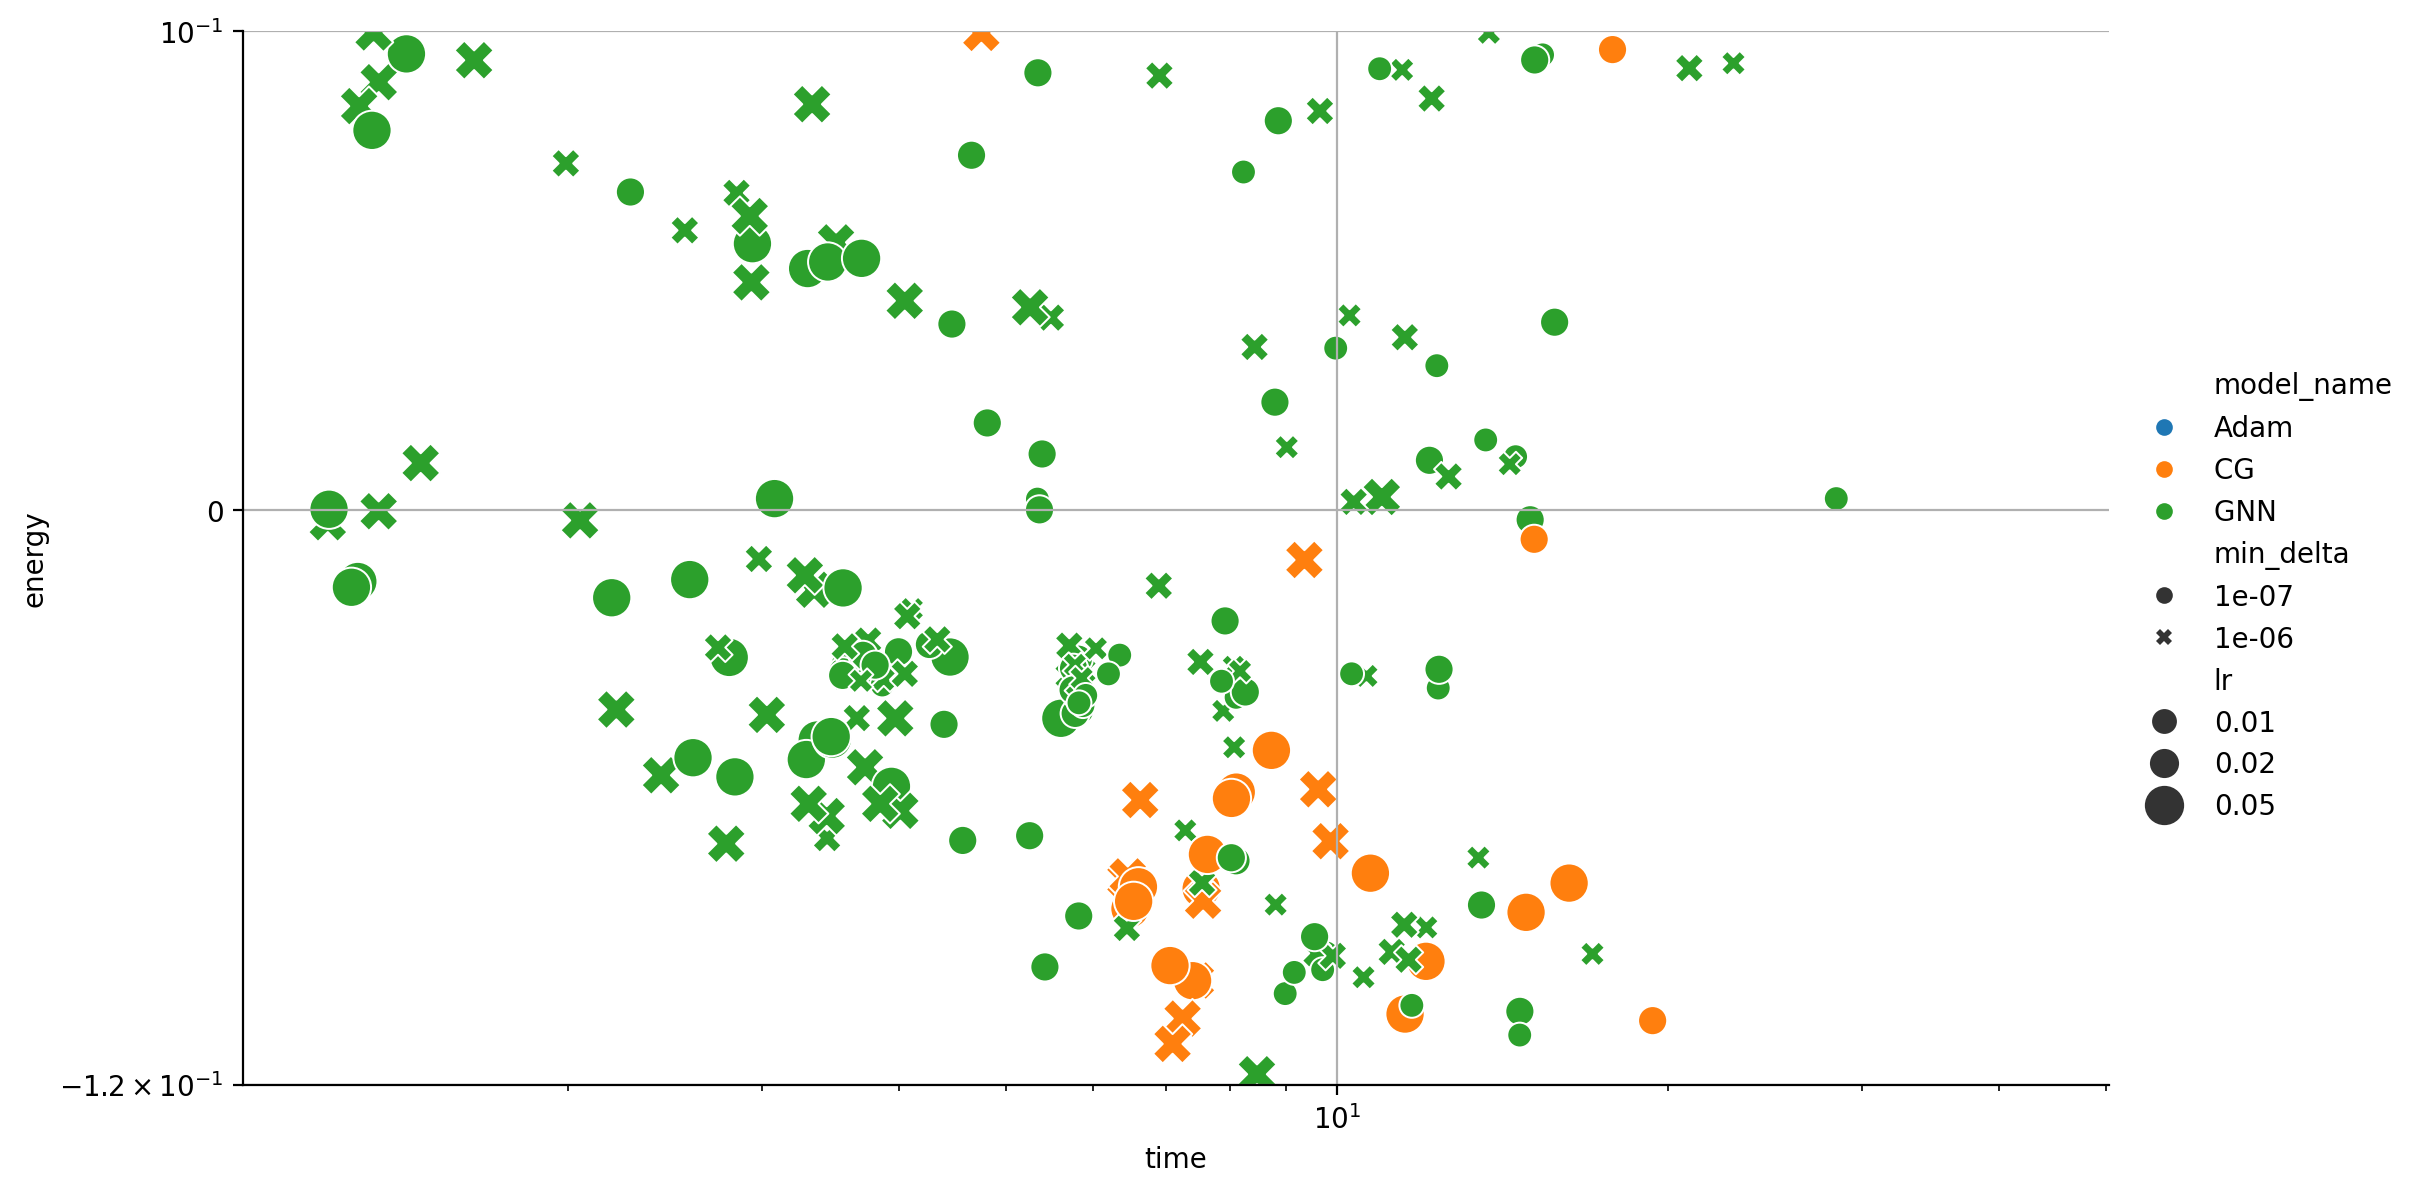

In [22]:

# plot the filtered dataframe using sns directly on df
# sns.relplot(data=df, x='time', y='energy', hue='model_name', style='model_name', kind='scatter', size='lr', height=6, aspect=1.7)
# plot with larger marker size 
sns.relplot(data=df_cleaned, x='time', y='energy', hue='model_name', style='min_delta', kind='scatter', size='lr', height=6, aspect=1.7, sizes=(80, 200))

plt.ylim(-.12, .10)
# plt.xlim(8,21)
plt.xscale('log')
plt.yscale('symlog')
plt.grid()